# **Import libraries**

In [1]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
from MRD import add_noise_artifacts

import MRD
import os
import re
import numpy as np
# from skimage.measure import compare_ssim, compare_psnr


import matplotlib.pyplot as plt
from tqdm import tqdm


## Dataset path
###  **  SOS - Correct the path in the MRD package 

In [2]:
rootPathMRD = 'O:\\Projects & users applications\\Denoise\\Dataset\\MRDtest\\' # dataset path

# Upload original MRD file  

In [3]:
# Get Subject and Scan ID

current_directory = os.path.dirname(rootPathMRD)
print(current_directory)
scan_ids = []
subject_ids = []

for path, dirs, files in os.walk(current_directory):
    if len(dirs) == 0:
        for file in files:
            if re.search("\.(MRD)$", file):
                scan_id_i = os.path.basename(path)
                scan_ids.append(scan_id_i)
                subject_id_i = os.path.basename(os.path.normpath(path + os.sep + os.pardir))
                subject_ids.append(subject_id_i)


O:\Projects & users applications\Denoise\Dataset\MRDtest


In [4]:
print(np.shape(subject_ids))
print(np.shape(scan_ids))

print(subject_ids)
print(scan_ids)

(6,)
(6,)
['1285', '1344', '1344', '1344', '1344', '1344']
['17874', '18774', '18815', '18856', '18861', '18862']


In [5]:
# get MRD file
def get_mrd(subject_ids=None,scan_ids=None):
    im_file = []
    k_space_file = []
    for i in tqdm(range(0,len(scan_ids))):
        mouse_id = subject_ids[i]
        scan_id = scan_ids[i]
        try:
            [k_space, im ]= MRD.recon_mrd_fse2d(mouse_id=mouse_id, scan_id=scan_id)
            for slice in range(1,np.shape(im)[0]):
                im_slice = im[slice,:,:]
                im_slice.resize(256,256) # resize the data to have the same length
                k_space_slice = k_space[slice,:,:]
                k_space_slice.resize(256,256) # resize the data to have the same length

                im_file.append(im_slice)
                k_space_file.append(k_space_slice)
        except (TypeError,IndexError,ValueError,KeyError,EOFError):
            # print('Error' + mouse_id + scan_id )
            pass
            
    return im_file, k_space_file

In [6]:
# load all the availbale MRD file
im_file = []
k_space_file = []
im_file, k_space_file = get_mrd(subject_ids=subject_ids,scan_ids=scan_ids) 

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

O:\Projects & users applications\Denoise\Dataset\MRDtest\1285\17874\17874


 17%|██████████████                                                                      | 1/6 [00:04<00:21,  4.20s/it]

O:\Projects & users applications\Denoise\Dataset\MRDtest\1344\18774\18774


 33%|████████████████████████████                                                        | 2/6 [00:05<00:10,  2.70s/it]

O:\Projects & users applications\Denoise\Dataset\MRDtest\1344\18815\18815


 50%|██████████████████████████████████████████                                          | 3/6 [00:08<00:08,  2.79s/it]

O:\Projects & users applications\Denoise\Dataset\MRDtest\1344\18856\18856


 67%|████████████████████████████████████████████████████████                            | 4/6 [00:11<00:05,  2.82s/it]

O:\Projects & users applications\Denoise\Dataset\MRDtest\1344\18861\18861


 83%|██████████████████████████████████████████████████████████████████████              | 5/6 [00:14<00:02,  2.73s/it]

O:\Projects & users applications\Denoise\Dataset\MRDtest\1344\18862\18862


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:16<00:00,  2.80s/it]


In [7]:
# store into numpy array
k_space_file = np.array(k_space_file)
im_file = np.array(im_file)
print(im_file.shape)
print(k_space_file.shape)

(49, 256, 256)
(49, 256, 256)


# Plot Original file

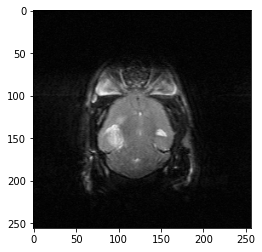

In [155]:
ind = 20
ks_test = k_space_file[ind,:,:]
im_test = MRD.recon_corrected_kspace(corrected_kspace=ks_test)
plt.imshow(im_test, cmap='gray')

Original Image


<ipython-input-156-c427b42553d7>:7: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(k_space_file[ind,:,:])), cmap='gray')


(-0.5, 255.5, 255.5, -0.5)

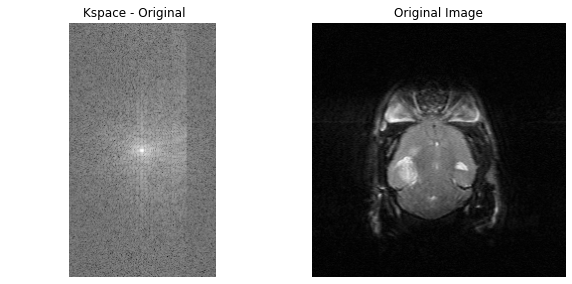

In [156]:
# Plot Original Image

plt.figure(figsize=(10, 10))
print('Original Image')
plt.subplot(121)
plt.title("Kspace - Original")
plt.imshow(np.log(abs(k_space_file[ind,:,:])), cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.title("Original Image")
plt.imshow(abs(im_file[ind,:,:]), cmap='gray')
plt.axis('off')

(10, 256, 256)
MB3D Filter


(-0.5, 255.5, 255.5, -0.5)

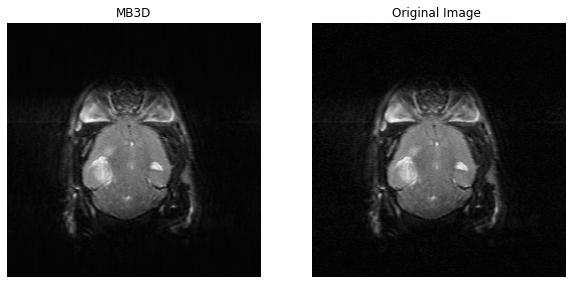

In [157]:
import MRD 
im = np.zeros((10,np.shape(k_space_file)[1],np.shape(k_space_file)[2]))
im[0:9,:,:] = np.abs(im_file[ind:ind+9,:,:])
print(im.shape)
im_bm3d = MRD.denoise_BM3d(img=im,sigma=0.01)  

# (score, diff) = compare_ssim(im[0,:,:], im_bm3d[0,:,:], full=True)
# print(score)

plt.figure(figsize=(10, 10))
print('MB3D Filter')
plt.subplot(121)
plt.title("MB3D")
plt.imshow(im_bm3d[0,:,:], cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.title("Original Image ")
plt.imshow(im[0,:,:], cmap='gray')
plt.axis('off')

# Modify kspace 

## Apply Hanning filter

(4, 256, 256)
Hanning Filter


<ipython-input-165-b3023695bbec>:11: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(hanning_k_space[0,:,:])), cmap='gray')


(-0.5, 255.5, 255.5, -0.5)

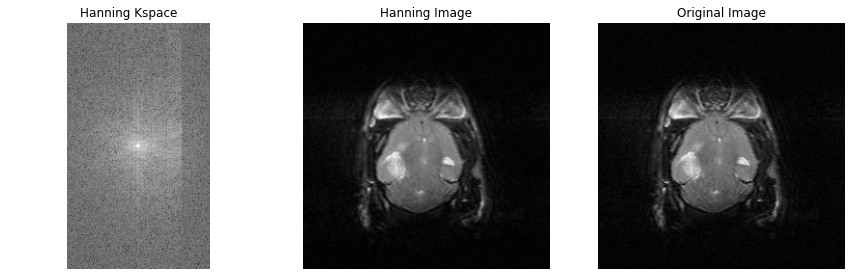

In [165]:
ks = np.zeros((4,np.shape(k_space_file)[1],np.shape(k_space_file)[2]), dtype=complex)
ks[:,:,:] = k_space_file[ind:ind+4,:,:]
print(ks.shape)
[hanning_im, hanning_k_space] = MRD.hanning_filter(ks3d=ks) 

plt.figure(figsize=(15, 15))
# Plot Hanning Filter 
print('Hanning Filter')
plt.subplot(131)
plt.title("Hanning Kspace ")
plt.imshow(np.log(abs(hanning_k_space[0,:,:])), cmap='gray')
plt.axis('off')
plt.subplot(132)
plt.title("Hanning Image")
plt.imshow(hanning_im[0,:,:], cmap='gray')
plt.axis('off')
plt.subplot(133)
plt.title("Original Image")
plt.imshow(abs(im_file[ind,:,:]), cmap='gray')
plt.axis('off')data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA1MAAAEUCAYAAADOemxhAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8QVMy6AAAACXBIWXMAAAsTAAALEwEAmpwYAAEAAElEQVR4nOz9e7CtW3YfhP3mer+f+3Xe55577u1WqyUjtWRLKmSlYoKDgyPsAkIFDHICQU4gZcq2EguZsg0Ix+W4ghASLjkBVQTYsWOc2BDATsCOQTZCcau71a2Wb3ffe177vfZ6v9f68sfav7F/a5xvn3u7fe9p7dvfqNq1917r++ZzzDHHb4wxxwxRFCGhhBJKKKGEEkoooYQSSiihr49S3+wGJJRQQgkllFBCCSWUUEIJ3URKwFRCCSWUUEIJJZRQQgkllNA3QAmYSiihhBJKKKGEEkoooYQS+gYoAVMJJZRQQgkllFBCCSWUUELfACVgKqGEEkoooYQSSiihhBJK6BugBEwllFBCCSWUUEIJJZRQQgl9A5SAqRtOIYT7IYRhCCH9zW5LQgkllNCrKJFXCSWU0EdFIYQfDyH82Q/72Q9QVhRCePxhlJXQzaQETH0IFEJ4N4TwD7nPfiSE8Lc+6rqjKHoSRVEliqLVh112COE/CCH8G/L/t4cQDkMIf/DDriuhhBJ6PfStIq8SSiihm0uXMunzIYRxCOEohPCzIYTGq96Jougnoyj65z9I+V/Ps38/FEL4r0MIH3k9CX1zKQFTCX0gCiF8F4D/CsC/EUXRn/pmtyehhBJKKKGEEvr4UQjhDwD4PwD4QwDqAL4PwAMAfy2EkLvmnczra2FCCW1TAqZeE4UQ/vchhK+EEAYhhC+GEH6XfPcjIYS/FUL4UyGEixDC10II/4h8/1+HEP71EMJ/c/n+fxlC2Ln87uGliznzfs9efv/PhhDeCyGchxD+SJyVOqbtvxnAXwPw41EU/bvy+f8uhPD8sp4vhxB+2+XnfzSE8BdDCH/+8rv/XwjhN32Qsbj8/l8IIXxJvv/uy89vhxD+7yGE08sx+t9+Y7ORUEIJvYpusrxy9fzeEMLTy3b+aAjhe0MInwshdEMIPy3PvxlC+P9c1nMWQvgP1QoeQvjuEMLfvWzjX7iUbeq1/0dDCJ+9LPe/DSF859/H8CeU0LcshRBqAP4YgH85iqL/PIqiRRRF7wL4JwE8BPDPXD5HPeMXQgh9AD9y+dkvSFnXyg99VuTFPxdCeHIpA/5VKec3hxB+8XJ9H4YQfjpcA+rep2//gxDCsxDCj4UQTi7L+sdCCL8jhPDrIYROCOHHP2i9IYR/OGx0r14I4WdCCH8jiBcshPC/uNSlLkII/0UI4cHX2+aEPhglYOr10VcA/CA2VpY/BuAXQgi35PvfAuDLAHYA/EkA/+cQQpDv/+cAfi+APQA5AK8KtYt9NoTwKQA/A+CfBnDrsi133qfdvxnAfw7gX4miyOKLQwifAPAvAfjeKIqqAH47gHflvR8G8BcAtAD8RwD+cggh+35jEUL4JwD8UQD/LIAagP8pgPMQQgrAXwHwK5dt/m0Afn8I4be/T/sTSiihr59uqrzy9FsAvAXgfwbg/wTgXwXwDwH4dgD/ZAjhhy6fCwD+LQC3AXwbgHvYyCFcKi//CYD/ABt59h8DUHD5XQD+LwD+RQBtAH8GwP8zhJD/OtuaUEIJAT8AoADgL+mHURQNAfxnAP5H8vEPA/iLABoA/kN9/huUH/8ggE9go1/8ayGEb7v8fAXgX8FG3n3/5ff/66+vW0YH2PTvDoB/DcDPYQMQP4ONzP0jIYQ33q/eS6PTXwTwh7GRO1/GZuxw+f0PA/hxAL8bwC6A/y82siuhj4ASMPXh0V++tB50QwhdbBaxURRFfyGKohdRFK2jKPrzAP4eNkCF9F4URT93eZbg57FZ/Pvy/b8fRdGvR1E0AfB/A/APvKIt1z37jwP4K1EU/a0oiubYLOToffr1fQB6AP5f7vMVgDyAT4UQslEUvRtF0Vfk+1+OougvRlG0APCnsREe3/cBxuKfB/Anoyj6pWhD70RR9B6A7wWwG0XRH4+iaB5F0VexEUL/1Pu0P6GEEnqZPq7yytO/HkXRNIqi/xLACMB/HEXRSRRFz7FRLr7rsr/vRFH016IomkVRdIqNzCLQ+j4AGQA/dWkl/0sA/jup438F4M9EUfR3oihaRVH08wBml+8llFBCXx/tADiLomgZ893h5fekX4yi6C9fyqmJe/YbkR9/LIqiSRRFv4KN4fY3AUAURb8cRdHfjqJoeekl+zO4kg9fLy0A/JuXutGfu+zPvx1F0SCKol8F8MUPWO/vAPCrURT9pcux+ikAR1LPjwL4t6Io+tLl9z8J4B9IvFMfDSVg6sOjfyyKogZ/4KwWl+7mz4ry8mlsCwVbBFEUjS//rMR9D2DsvvN03bO3ATx19Zy/qlMA/l0A/z02scpNefcdAL8fG+vtSQjhz4UQbst7Ws8awLPL+t9vLO5hYxX39ADAbacA/ji2FbiEEkrog9HHVV55Opa/JzH/VwAghLB/KcOeX4YM/QKu+nsbwPMoilQReyp/PwDwB5xsunf5XkIJJfT10RmAnRB/BurW5fekpzHPkL4R+REri0IIb4cQ/mrYJMLoYwNMduIK+AB0Lgl4CACvk0uvqtf3L8JGzyI9APBvi0zqYOOB/3q9+wl9AErA1GugS0vAz2ETFte+VF6+gA1jv046BHBX2lXExj38KlphE4bzBMB/cRnPDACIoug/iqLoH8Rm0UbYHBgl3ZN6Upf1vvgAY/EUwJsx7XgK4GuqAEZRVI2i6He8f7cTSiihD0o3XF59o/ST2Miw74iiqIZN2A37ewjgjgtjvCd/P8XG0qyyqRRFURJSk1BCXz/9Ijae3d+tH4YQKgD+EQD/b/n4VZ6mD1N+/CyAXwPw1qV8+HG8Hnn4qnp9/4L+j41c+hedXCpGUfTfvoZ2f8tRAqZeD5WxWfSnABBC+L3YWHpfN/1FAL8zhPADl+cA/ig+gEC4dEf/E9hYhP6zEEI5hPCJEML/8PJcwBQba8paXvtMCOF3X1qXfj82wvFv4/3H4s8C+IMhhM+EDT2+VO7+OwCDsEl6UQwhpEMInw4hfO/fx3gklFBCL9ONllffIFUBDAH0Qgh3sMkiRvpFbIxK/1IIIXN5FkFDHn8OwI+GEH7LpcwqhxD+JyGE6kfU1oQS+thSFEU9bM5p/jshhP9xCCEbQniITQjwMwD/1w9Y1IcpP6oA+gCGIYRPAvh932A5H2a9/ymA7wibBBYZAP8bbM5jkf49AH84hPDtABBCqF+eSU/oI6AETL0GiqLoiwD+j9hsyscAvgPAf/NNaMevAviXsYnTPcRGeTjBBui837tzbCxFU2wSQRQA/AlsANYRNofH/7C88v/A5tD3BYDfA+B3X543eOVYRFH0FwD8m9gkrRgA+MsAWpdu8X8Um/MUX7us989ic6g0oYQS+pDo4yCvvgH6YwC+G5vzof8p5PC7yL7/JYAuNl6rv8p2RFH03wP4FwD8NDby7h0AP/IRtDGhhL4lKIqiP4mNF+ZPYQMm/g42npbfFkXRB1r/H7L8+IPYROgMsDGe/PlvoIxvhK6tN4qiM2yM3H8Sm/DFT2FzJINy6T/BJlroz12GCH4BG89eQh8Bhe0w8IS+lejSbd7FxoX8tQ+x3D8K4HEURf/Mh1VmQgkl9K1NH5W8+gbb8ncA/HtRFP3738x2JJRQQh+MfiPJj4+CLo9TPAPwT0dR9F99s9vzrUaJZ+pbjEIIvzOEUAohlLGx+nwe2ynNE0oooYR+Q9BvFHkVQvihEMLBZZjfPwfgO7G5MiKhhBL6DUq/UeTHR0UhhN8eQmhcHrfgeaq//U1u1rckJWDqW49+GMCLy5+3APxTUeKeTCihhH5j0m8UefUJbFIldwH8AQD/eBRFh9+EdiSUUEIfnH6jyI+Pir4fm+zHZwB+JzZZWn2K+IReAyVhfgkllFBCCSWUUEIJJZRQQt8AJZ6phBJKKKGEEkoooYQSSiihb4ASMJVQQgkllFBCCSWUUEIJJfQNUNwN09+y9GM/9mNRpVLBYDDAxcUFGo0GlssllsslZrMZQgio1WrIZrOYTqdYrVYIIWAwGKDdbqPf7yOdTiOVSiGTySCEgMlkgr29PYzHY/zSL/0SHj16hHK5DADY29vDZDJBCAGLxQLD4RDL5RL5fB61Wg3T6RTT6RSNRgOLxQKpVAqj0QghBPT7feTzedTrm8zg2WwWxWIRs9km6+d8Psd6vcZ8PsdiscDOzg4WiwWWyyWy2ax9l8lkUCgUsFqtMB6PsVqtUCqVEEURxuMxGo0Gjo6OUKlUsFwu0W63cXp6itVqha997Wv49Kc/jel0iv39fRwfHyOXy2G9XqPRaCCdTmOxWGC9XiOVSmG5XCKVSiGKIgyHQzQaDaRSKUynU5ycnODg4AAhBBSLRYxGI2t7tVpFNpvFyckJarUa6vU61us1vvCFL+Azn/kMptMp0uk01us1xuMxoijCZLIJG85kMlgsFsjlchiNRphOpwCASqWCSqWC09NTlMtlRFGETqeDg4MDfOUrX8GjR4+QyWSwXC5RKBQQQsCTJ0+QTqdtvGq1GpbLJVarFX7qp37qdV9o+i1P2Ww2Wq1WSKVSWK83V5zxXlV+dl0YcxRFSKVSxo8AsF6vEUJAFEX2m+uZa518tlgsrB6Wx/r5GetnWSQ+w3URRZF9r8+xjSEEaxt/a1msI51OI4qil/rN5/ms1svPWbb+z35zHOLGku/oe+wP6+V7LINjqd/H/a3jpm3Vsvx46ViwHn2G8+fr42fafv1en+f4aZkAsFqtXhpv1scyWS7nVevnO1qO9sm3g2Urr+j/rJ/zpGPox9zzi/IY3w8hIJPJGE+QlId1LLXdug50/Dwfsq7VanWj5Wkul4uWy6XtIcBVXzlvOud+bXnZpLzMec5kMrGyaT6fb/EL54ZlsjySn0uWqfKEz8WVx/qvk03Uhy7nNXa8dO51zWgffBuXyyWiKEImk3mpHzpmWr62Xdd4JpNBFEVYLpcvyXAv4+PmTNcTy9J3vGyiLqRrhf2Ok/msU+UtP/OyycsfAMaDyhecE441y06n01vzqHXGySaOj86Vyl/Oqc69l01e/io/+DFW2avyJJvNGk/wO60jTjZpe9gOzp+2mXNyqe/FyqYETAl1u13MZjOUy2UDQyEEFAoFZLNZXFxcYDweY7FYoFKpIJPJoNvtIpPJYDKZoFgsolQqodvtYrlcYr1eo1gsYjKZYL1e44d+6Icwn89RLpfxzjvvYGdnx0BZOp3GaDRCu922DTWXyyGfz2O9XqNQKOD4+BjL5RIHBwfG8AQr2WwWT548MSbJZrMoFAoAgHw+j7OzM9RqNRSLRWQyGQyHQyt3tVphPp+jWt3cMTmbzTAej3F+fo5KpYJms4lms4mjoyOk02nkcjns7+8b0xKosO3ZbBalUgmTycR+ms0mer0e0uk0KpUKhsMhFosFbt26hUKhgHa7bYBmsVjg7t27KJVKmM/n6HQ6qFQqyOVyqFarWCwWKBQKePDggc1JqVSyPp+cnKBYLKLX62GxWNjC3dnZQbvdRq/XQy6Xw3A4RLVaNRB27949TKdT5HI5zGYzrNdrlEolTKdTDIdDtNttTKdTLBYLLBYLHB8fI4SA0Wj0TePZb2VarVam3OkGQCEep/hRGHMjUEWB33OzozLBjY/rUgV6nGDm/9ys9HMAW5sogK3NMpVKIZ1Om6FDFSWv2Ps6FaSoAuA3Et20dGPSzVqVf+23V8iVVFnwG6RuTNzgtE4FR3EKGcthGVq+32R9nznf+rwHjjqmOg5st/ZNlT3lN77nlU7d3FVJ8zzhn9H2xM3ParXa6h/XA9sUp1x5HvSgisYD7R95nwqsb4vvs+cx7Qf7p8qLjokqWTeZaLQkoPKyifKKY6hjrLLJy65sNovFYrEFTlgW5RTLAvDSeuL40+jplX7yuxoI+D55fzabWd/4udblFfwoiswY7Numa5J9VIVciYYz8j374oFhHL+zPPZPZRPlrPZF+8Cx9mPp61TZxLbGySYFxDrfbCsBHfmC5MEr/+Z8EQQoQFKe0PXmwbzfj1QWx61d/VvLUNnKMeDfXAeLxeIl2eSNKq+STTrffC+VSm0ZOHUulAd0XpVHdJ/StaeyioDtOkrAlBCtOuPxGADw7Nkz5HI5pFIpNJtNpFIpdDod5PN5dDodFAoFlEolnJ+fo1AooNlsAgAKhQKOjo7w9ttv4+zszCzZURShXC7j7OwMxWIR8/kcs9kMjUYDAPDo0SPM53PM5/Mtq2OhUMDh4SEymQzS6TTOzs5QLpcNcAEwYMK6CAba7TaGwyEA4PT0FNlsFuVyGdVq1TxQALaYqFAooNFooFKpoFAoYDgcYjweo1wuI4SAUqkEANjf38dwOMTe3h56vZ55kgjeqtUqptMpyuUyzs/PkUqlUCwWsV6vcffuXdvwaWGbTqeIogj1eh0nJyfY39/HdDrFwcEBlsslJpMJBoMB6D2ksCCDz+dzZLNZVCoVAECz2UQURTg7OwOwWTgES8vl0gBVp9PB22+/jfl8jqOjI9TrdSyXSyvnxYsXqNVqODk5QavVwnQ6RaVSMWCpAi+h10dcIwo0gG0g4BXs65RwboZ+g1dvCutkuR6MeQWSn+nmFOcxU0vmer22DZDtidvEvdVYFRodE24ALFc3PyoWccqCVwT4vd/QdFPn/x5gajvZR22z/1w3VYJLeoC9R4dtojLpFTmWA8DGwQOf65QxD3KVN7wC4pUclkVZo+3VenTeSX4O1PvqQYt6O1iO8pavTz1CrEvBIGVqnAKoc0w+UEDpFSxvidb2q4KnCrtv/00lrin+9p4OjkM2m7Ux17HgWJK3Ob6qJFJueNnkZYP3ZijfKv9pPdo+fq/gnXWyPl0rXiGNk01sP9ckjZ5sjwJRL7OVd6+TTcpn+r8vwxsbFNz6MdPnlYcJaFT2sF1sk4JJHXe+r7JJjTVarl+nfF55yAMclsfxVQNfPp+P9e4p4OJnun/pPqb84Pcp9lUNB75M/q37sI4v263ve9kEYKt+1qffsT1ezsR5ajOZjAFsXTs0sF5HCZgSCmETxjcajZDNZtFsNtHpdCyMb29vD8Ph0LwTnJwHDx4AuBIAqVTKPisUChgMBlgsFlubRqVSwWg0Qi6Xw/Pnz5FOp1Gv1zEajdDv99FqtRBFkXnKGo0G8vm8AYbnz5+jXC6j2+2i2Wwin88jk8ng7OwMy+UST548wePHj3F+fm4Ap91u2/9UrrgQqXSl02l0Oh1Mp1Pk83mcnJyg3W6jWq3i+fPnADZM1e12sVgsLNSNC5IMWKvVzKu2Wq0wnU6xu7trf+fzeQAwgJnJZDCfz1Gv123sU6kUZrMZDg8PUSwWra8hBJydnWFvb8+E6HA4RLFYxGKxwHw+N8vbcrnE7u6u9e38/Bz5fB6TyQS7u7uo1+s2B3t7e9jd3cVoNEIURRgMBigUCnj48CH+3t/7e2g0Gsjlctjb20MIAU+fPkWr1Xpps0ro9ZG3ogHXezt04/VWKq4Bv4l4yyw/103Vb9S62ZFUgWLbgKtNAMCWFZtl0OqoG5cPmdD2aLu0DB0XjptuUhrWo+Qtdjo+XhnWjcoDSz5P0MO+q7Lox17nQDdC9RYp4NB5UKVNx5ifKxDTNit5byf74K3Yvi1UQKfTKebzudWtXiOOrbfIqpKlyhXHSEOB/FwpoGNZyoceMPEdD4rIY6qkKhhSRZNtVKt4nGHBW3q9F4Xv8PObThwLXSt+/eva0TXuZRPnW70ZHnh50KNj6PlB+U3rIY9RBqkRQNcqn1fvPdulXh5SXCi2D39V3lWZS33Ch/UqX6oxTcdbPVCqNOu6U+OCb4MCIZW5cUCAsoD917Ghx0TXI3VFHWMvm1ReKHhQsMF5ALAFmjRySUFULpdDFG2OQfAoCAD7XA1SH0Q2qeeGdeg+xD6r4dOPhfKpGlN0XHWP4xiTV72s8rKE46gyT+vz64TzrV76VCqF+XyOV9HNl1ofIrVaLTx9+hTr9RqVSgWdTgdf/epXTXkmiAohmEcon8/bOaXBYIDRaLSFaIfDIVqtFnK5nJ2VajabWCwWqNfrCCGg3W6bd6pSqWBnZ8f+3t/fR6VSwYsXL7a8Km+88YadSyKjvfvuuyiVSlgsFvj2b/925HI57O7uolarmVdod3cXjUYDs9kMFxcXtuhnsxl6vR6WyyV2dnaQyWQwGo2MGfv9vnmVJpMJ8vk8BoOBKQxk1FarZe1S4Hnnzh07A7ZYLDCdTg3MMWyBIY/L5dLGsVqt4tatW8jn83j48CFCCOh2u7h7965tHJPJxLxls9kMhULBFtdkMrEwvBACms0m5vM58vk8hsOhtbNaraJQKKBYLOK9997DycmJLaThcGggrtPp4MWLF1itVrh37x4qlcq1ceAJfbSkls045dIr0QpGuAmoMs3fFMpUELnR0npMQasgjT+0aummqBuBKq3cSDUsUYGBKkleIfAgUev3yi7r8RZdBR7ccHRMOKbst252fnONG2/g6jyCtkkVGc4Hn1XA5DdSlkvlREGrjk86nd4Kx1BFVMGjWjvVUs2N2lvjvdWXv/XsCg1AcVZMHTu17KqC5EE5ScdVeVjb4hX3OIVHFRKdc51LVaT9+uD3NCbqWlBl09fD9cSx8so9y2ebbjpls1kz6KnSpkAEuDIWqAzg3PqxV8WURlCOP421HGfl2etkE+ulAq2yiZE0/I7zom2hAq4yw3v3lVdZN9+nbAK2vQZsH9eIGpj4NxVoGoaVn+L4WZV0/a2ySZV+lasKDrRPHA+OyWq1MoVb17euwWw2i3w+vwUYFGhyPvi3AhDKI3rpOefaHgW75EMN3ZxMJrZ2db9UOahgPQ54+332Otmke44au3TPU7mrgJx7IflU20AQmM1mXwLQCobYd6433S/oPMjlclvySdvONrHtXHPXUXLPlNDv+T2/J3rjjTfQ7/dtIi4uLrYsEVTw6SLN5XI4OztDKpVCvV63JBQ7OzsW4seQsSiK0Ov17JzSnTt3EEUb7xMtmCFsElqkUinz2BQKBUwmEwMcnU4Hu7u7AK6EWy6XQ7FYxHA4RL/fx3Q6xa1bt2yxDQYDtFot2+gJDrPZLGq1mjEsw9ZWqxWePHliAGwwGKBUKmG9XiOfzyOETRKM9XqNbreL+XyOW7duIZPJGGjs9XrG4ExgMR6PtzxZFMoMX+TmsF6vsb+/j9VqhV6vh+fPn+P27dtYLBbo9Xp48OABVqsVjo+P7VzXYDCwhTiZTDAcDrc2Ao7nbDYz4ZLL5TAej/Hs2TPs7u6iWCya94xJMtLpzTmvo6Mj81YuFgsbz6OjI/yVv/JXbvSB6ZtIqVQq0o0D2D5HpBbNy+dNgKt3gZuXF8r8zG9oumHpJq1WTq+8Ai/HbPsyVCHns2olZtlquY1rR9yGx76q0us3Xq/o+41UFQQd7zhlPm7z5SYHXMXQa390HHSOVNnQ/ulm7MfRl6VtVO+NKrnXjaWOu4bUaB/T6fRWeLYHRNoWBRHKO95Sqzyl/YoDWwpQvMXf88l19akHinPk+V4Bv1ptdf783LDuOAs7//a8u7rhCSgymUwEvHxQX+fIyyZ+T77PZrOmnPu1xTLVgxLnIVZlXnlQ1wFJ3/VrncYkNSJ5T6uXTXFGFpUH3gPBdeXbQt7Stqtc1fe1Lr/uCZa8PANelk3UQ9RTxfffTzbFGV9UXlwnm9QI7+fTK/gqezg3lE0aNUU+mk6nL3mOFMioF4Zzo/XoGuX3yov+XX3Pz5vfL78R2cQoDr5HoEq+5tyxbjVeKLj14M7Po/IsP7tONn08zEAfErXbbRwdHZnlc2dnx9B8sVg0EAFsJnM6neLi4gKz2Qw7OzvIZrM4ODiwTbXRaODk5AS7u7tbSRIYhkZgVCwWDVTM53NUKpUtC4i6cZfLpXm2VqsVyuUyZrOZARsmmmASiUwmg0qlYvWmUik7r9VqtcwLxKyBBJDPnz9Hq9UCAEu4QKFFb85sNrMymISCC3O9XmM0GmF3d9fOUxUKBcuup1n28vk8RqMRer0e9vb2MJvNUCwWbV4KhQLu3buHEALy+bwloDg6OkI2m7Vsiefn5xZOyLEGgFKpZF60fr9v1qz9/X2bC4YgEvAxwUixWMSzZ88wm81wcHCA1WqFQqGAarVqZ6oODg5eG48mdEUa5uFj7r2F0isGJFV0vFVShTnLUQXIW5tVQfSAJU551P/5jlci9DtNSOFJ6/GAj/VRjug7JG5gfkP3ipuSKn9e0db+efCj46eKubbjuvh//d7PobaFROs7yyCA83PAuvmcekp0s1VFSInGIQBbCif7yd9qmdex0bGNA6gk8kAcKPEKgI6pt5DzPfK81uUVavVuaOiUhplpO7Vtvq+qxLE9Wo6+f5NJw75ms9mWl1IBMf/XcD9+TgOrB0sa5gRcKb4aYhcHrBTcANtGH5bD3x7sa1iml7GabMMryF6x9kDgg8gm5RPfdpKeB+W4h3DlQc1ms/Y+169fO75v/pwmx0oNCPquAgY+oyBOARvbrH2lvuINIXxGf/g8jfWvaht5Q9e7AimuZeUz3T9VVmr9XtZqMihvQFB+v042qWzU9inPqmxSsETAxM/UE0XdQMfRG6UU+PEz8rSOg482UErAlBBDy2q1GgaDAWazGc7Pz5FOpy1d93q9xmw2syxwxWLRgMpoNLIkDdxc6eonYMjlcphMJphOpxaSB8BSpJdKJfMAecWGCRrOzs6Qy+XQ7Xbx8OFDFItF1Ot1PH36FJVKBeVyGYPBAPV6HYvFAqPRCJVKxRb2crnEfD7HYDCwVO/MlscsYo8ePbJMeeVyGdls1rL7AVfZiiaTCQqFgnmhcrkcer0eomjjFh0MBhgOhyiVSrYgCEyZDW86naLX61k4Is+JAbDU6Lop0R3L9Oa5XA6r1Qrtdhvj8RjFYtGsaKvVysIwCXA1JpYAiuGBBJWc53w+j4ODA8tOyLDEcrlsmRlfleEloY+O/IYPvJymWS1j+pwX7qrse6usV875mW7AarnXtvFv/a2biVfoPeBTpchb1fi9txjqxqFnMfQZP066yeiYaD98vLufi7jwQ25AXvH2ynPcGHE8tL1+Y9QN3Ydy+HGm7IsDtxxLVWZZnwfbLN9blj0fqmLC8VPLsoZoe+VT50UVyXQ6jVKphNlsZu9yfHXsvHLgreeefJ06r/yeffdKlZapCqR+p+OqwFTXpleQbzJ5Lx3wssxRj4DynP6vyp3yoDd4ANgCJDquVDC5TzEyxMs/rYdt8UCI65kgyvOahjcr8NbySJqOXMmvi7h1wjFmuSzLyxE+x1Blvx942UT5rryp5XgwoXPpE/yobKIhW+dDzxkC2DIIKiBhXV42UQaoLqPPcj48MFLQRF7SRB+cG+8BZDkK2FSHyufzKJfLdv3MarWyYykK4LQd2n/Pb34v8OtBx1fn1u9nKkf9XnidbNI5oiFT128cJWBKqF6vYzabmbcknU7buSZOClOfr1YrSwrBbHUak8w04PP5HJPJBL1ez5Id7O7uot/vI4oi1Go1pNNpAyTcFPP5PFarlQE4AqN0epMg4tGjR6hUKnafEj00DAugV4lJHSiwGApIoEdwMplMDIgAm7NHzMTHxUKGWq1WlpGw0Wggk8lgd3cXw+HQvGp6T1StVkMulzO0rzG86qIlQASuBFU2m7VUrKPRyM42aeik3ilVrVYxmUxQrVaN8ZnaHtgsulwuZ6B2sVhgPB5jvb66d4vtoneq3++jVquZcsXxKhQKmM1mHwtL6k0kWqA0NFQ3OA+ogJezV2lZqgCoAuw3WAUDXnGkcYRtYBmUIfquburaRuAqJEot0mw/N121LPuNiM/qeSluYN4y6fsRp5DwWfbLb3jaZ7+JeUWfZasSrZukB3GqXPp55ViRB1QhjFP2PfDxm60HyTo2vv9xgCUO6KrHQMGRBy/XKRPKHx5M+lAx3w4PKr1C4D1fvo18RteYX1dUrOPmmP9f53lTb4a3UN9k4tgDVzKE69jzulecvUGD48Mx1jlVr4R6EilrvPLNcvlbQ6VUNnkFXSNkOGceiFB+6hoCrmSZ5733k03slxqVvbxRGQBse0W9MUwVarZR26B87wF+FEXmCYqTg35vILEsf6ZJ+8j5V/mv4NbLJpWxceAgbh/Q/YRjz/n33j56eHxZOn7Kn2w77zfjsxwvP3YaOqxz5vnDg2/dTxX0vEo20SOobdZnvcFLeUVlE+c4SY3+AYkKNYUUw9fogQBgZ5EqlYqlH6fVh5nkeM/Sixcv0O/3kclk7DwVPVn0NPHi2vV6jWq1irOzM7vzKZVKWWghkX8mk0Gr1cJqtbJymOKbjDWdTjGZTIzp6CFaLpcGpABYyAvD+Nhvfq7W4GazieFwaMrB3t6ePZvNZu2sFu+qolud4wkA4/EY6fTmYCDPTnHceM9UrVazVOz9ft/CIUulEobDoYEujomCMaZxX6/XBmbz+byNtR5YZHKMUqmEnZ0dfOlLX8Ldu3eRyWTQ6/UMmPV6PZTLZfT7fVtcs9nMPFXkj4S+OUTh5z0E3rLlLWO6iVFQ+k1Jhb0PC/CbHckDHGAbuKkipQJdn/NKtb7DMrSfJP+3lqP94YbmNzc/rl4p5ue6sWq7dLw9INCN3IeBeAul1hM31/zbK0ZU+OKUCT9mcYDGg1Kd07g54d/eQuot0Nof72l81Xjp96q8xhkMWDfHwys8/nkdE33f85U+q/zi14zytJar46ik7dB14NfhTSXtuyqpwMvhlN7roAofn1cZwnH2BgSVN37tazt07hToeKu/lqGgya8D5XltZ1y42HVyQT3G6jWhbIpT4uNkhJdNJJUTvj0Kdthu1q3eM20z6yIpz3tDBvUTzaznZarvn5/D6wxm2s84UEK9jmNAvtIzR9fJJi/nFDR6PlfZpLKAz/ishdrPuLZfJ5u0Tj6re5nOl+7BcbJJ++Z5gvOrxoQoujJIxFECpoTosZjP5yiVSnY+RyeFl8ZGUWTnlMrlsgEdADg/P7fJ531NBEjz+dwYLpfLmdcjk8lYIodCoYD5fI6dnR2bXCaVyGazBsC0Pr7DbHXqARoOh3j+/Dn29/fx4sUL3L171zxfAMwLt16vMZ1OUSwWUavVLGvKycmJhTrSY1WtVs1z1u/3kc/n8eDBAwwGAwu7S6U2STT0/AM9CfSQUYiuVisLe2S/isWiga/ZbIZMZnPZMNsWRRsPXr/fR7lcNg8Vx5eXIjODIDPp8JyUCvA33njDhHqhULD29no9A4hcpKVSybL48fmEXj9RIMZZvdUKDGzfn6FeB1XiVfHjeteQCVUUVHHxIE3L8gDAAylfhtahFmivtHuAoO32SpRXfDg+vj8cC3/mx4+5bjx+g9exVAVMDz9ft0H6fnGcfDv9334846zUcWc+tH/eg+M3ea9sxCkufn7jvlNFUufMK5eqaCgo1HH1dVJhe9V4aZ3+/Ih+p+OpipKGeurYx4WA+vAsBUseGHiv2k0nL5v8OvH/q+eAY6/riWWyLPK0htx5Q46XTVqGrkNVJslfWo/3JCh/s/4PIpt8PxR06VipkZRlsz+aqVCJ7dS14uWNrl8NNdU7nrR/BB06rt579CqAp7JEjfQqn9m3uD3G7wNxQIrtUHmuz+n/amjxoEbXrZcZun49UPT87T2lLJ9HYVRWxO2nWifL0H4pwOG4xcmmuDlT2UNeUT1Bx9C/ryDxOrr5UutDJCYoiKIIxWJxi1kJtEK4yrDFd6j8MyX3fD7HxcUF9vb2LInFYrHA+fm5CQpg+zDxdDrFeDzG/v6+3RtF4jPL5RKDwcBC8WhRyWQyVi4FbCaTQT6ft1A+ph0/ODgwZqFnazabYTQamadltVqh3+/bMw8fPrS/2ZbJZILVapNpjwkwVqtNus5SqYRyuWyWMx7kY0pygo9cLodqtWpZ9larFc7Pz1EqldButy2EjptDOr1JBtLtdm1uptOpnXVjv1utloEr3qdAy0in0zE3dj6fN28Vx4EhfIyT5d1Vg8EA+XwexWIRIQQDlRSCCb1+8ooZP6PQ4/qgYNSNyL+va1oVZp1fBTaqnHjFVuv3CrpXmv2G58tTy69aT/0mxP99X307fTnA9kFo/17chncdGNC2k7SfGjamCrR+5xX768aY9aqyqfPJcdAyFCSoIugBtp4l0BAQ1qnKGZ/zfKXzrsqBV5TilFzfZj+ubLuGj/JZD8R0XNiO68JadL4AvMT7PlRJecrzLuvVflynkOj/aqG/yRQ33142+CsDdE5UsdPU4Pyec+NlU5wFX8vX+vV9zo0q9sC2x98r6TTAkhf1Gc+vvj26dlmHpk7n83ppq5ffCuCUPFCNGwvWy35qCKUq8QStcUYHLUfnmG3QdcZ1p2tF583LCK5tXXfsswK9V8kmlWV+zJTvWJ7vjwdtOncKNDyI8en32T89q6VlaN+1fzo+fg5Zrx8jL5cUACove8OAD/ckKb9fN/82btd+8y1ItB4wVfnFxQXS6TTK5bJlvOOmv1gsUCwWDWTRW8WQr2q1isPDQwAbhb9QKKBWq9kFuoVCwRIZAJtJY9Y9erl0k6TgZRIKgq1UKoW9vT1ks1kDMCEE8wil02kDYAQPAAxk8FwTcJVNhqBytVpZMgf12pRKJQuDJHhh+4j4S6XSVhpyAjeOEwErFxjbzrHmgmMIItvebDYRRRFOTk5QKpWsnMlkYparEIKlNmcfCNjU2pvNZu3yYQI7npPifM/nc0uxTq8iPVfpdBrj8RjD4fA1cWhCSrpRxlnW4ix2wMuWPn1fLbr6vLfmqZBWxcBvbl746obhwYlXwFVJeb/++w1SN8I4RULfVSDJMlSBi+tnXP2+Dbr5cKPSv/0myc1XFRAtR0GBV9p0s2af4ubAb976vt904wCYByraTgBb8+Xn14Nr337gSllSo5uOv39OeVaVKz83cfwQV78H4Dr2/Oy6MfSg0s+tfqbKqueJVyksN4U8WOVnr5JNalTQ9ejnXOdQlXSdI1VwPZ97XtKydI3FPaP6iPdS+nUGYGtN+rGJMzbp98DVUQTtEw2g/EyNNXGyg895oKYKfZwc8DyrwOSDyCaVd9oPn7WPpMYmP5YKDpQ+DNmk46h91/ll+xiN48dX2+wNUDSyx/VZ58EDIC8L4mSFB17Kw9Rb/fxct2/qmvPPq257HSVgSoheJg4YPTrj8RipVArj8Ri9Xs/ABs9U0TrD+6HG47EBJ+CK4RiCx7ueGJLB7HfMEMjnJ5MJoujKK5bL5dBqtZBOp9Hv9y3MkFldCIwYJ8v6mcKcl+zxHBGVDnrTxuOxJeBotVoIIdjZJS4sepUIOtfrtZ3DYnuZNp0eIaZBJwAjwCFo7Ha7GI/HGAwGWK/XlmiDgIxeIi7w3d1d6xvvxeKCIrApl8uWaU9T2jebTbtLivNHQczL9Or1OgqFwlZSA41rT6VS1v58Pm8XBif0euk6hVE3AVU6/cajpJZZvssfDVfj+7pR6sYDbG9gWi+fVfKWsjhFSTdybb8Kea8Ye3DIv7n+4saRY6cgwvfbvxdXh3+O/dLNkf1Tq2XcmPl59nUreXDhFUm+p9Z4/vj64jZND8hVKdS503FRcKaKkG7cHgR774IeCNfQubgzKXFzoF4sVViu4xf2zytmuh5Yro5LHPjWNnoDhAdyyu83nVTBA7A1fx5MxQEXnVc9/6GKIcvVOrmns16vFCt/eD7yfKiKqLad8kjD8hQEsmwFMAqYvILM/vC6F36uv4GXZRPbp/3RsdCyfb3ewOATGHhDdlyb/Zxpuf47bYMHZDo3KptU94grU9/16073E/72IIGfe9nE8tXrpG0k0cCuySzI12oo0PWtdQKwpG0qH9Qz6ueQn2k0hc6HXiOkY6PzrHyt+7fuUV5HIDh7FSVgSogpuDVlpZ7NYZIDDffibyaB0LNODKnj+7PZDPV63TZEejoIqjQ5AwURmRW4cnsztI0heaqMECToGSt+N5lMLHyPZ6bobSNjMTthoVCwrHkA8PTpU1soDNnjvVH0ctEDlU5v7qparTZp5nlJMb1azKIXRZtzZ0+ePLEyAFi9k8nErK3M6Efi3V1M684U7yFsMgkCmwVQKBSs3WyjZv+Logij0cgy83HOM5kM5vM59vb2LOQzhLA1btlsFu12285UJfR6ySuDcYquB1qk65RFtbTxOZYTB5K0bK+M+rJ101MFl9/HKfVq5YsT8r7dbKsqL+rpeD9gwjo8uPSW0eu+043Lb6QeQPj+XNc3fZebNr/TNvN/VYx08/T99hZoKi8659pfvqP9uU5B1f54MOPbrmMSN27sU9z8qhKlvKBzpD+qmMS1U+dEn4kDffxclW0/pr59OvfpdNqMhEpesbuJ5JU8byHnM54fgO3LW5W8bFIAoyCUfMxyPZ/GGQ7U+8FweZWdKj9Yj3pC44xBbKt+pvOvICpONvH9uHM5caBAwdV160rbSGIbfTn6Xhxf+33nOtmk4+NlE9ecL8fXe51HSOvQ8VI+UYCo61v3oTjZrrzrx5BtYp90zV4X8qmy6TrD13UyWJNlxAFGlfEKkPiMNzCQ4mQT+YHGch3jV8mmJAGF0Hg8RrPZNCWbYWiLxcLuGKLynclkzEuzXm/SbVcqFbsXiYCoXC6bZ2s0GqHVaplnivcY0bLDVN+j0QghBKsPgKVYJ5M0Gg1Uq9WtA3/D4RC3bt1Cp9Ox81KaxQ6AeXtUWZzNZhgOh7a5AVdhM0zUwN/sN8tjmCKTYjCBBL1P9JRRQAOwtOQMAaRnp1wub927VSqVcHh4iPv379uCIliq1WqYTqc4PT018MpFzMQWrB+4yi4IwFK+M3xwOp0a8Do9PUWr1cL5+bkBqel0ihCCzYF6ysbj8UuW/oReD5EH/YakG5NSnPWNv1W599Y3FdyeKLC9YI/zGgDbIOQ6wcz3ryMPtgBsxamrAqNKkm6qlCPANvDjRqybL9sUZ42NU7C1DTrO3uqsY6Vt5riybR50eVCrc633zeg8cnzilMK48feKCo1d/N7ziCp3PjzGAxqS9uc6xZrPaTuolJD3dA4UePLvuDGMA6J+DjzIjTtvEde+uD74seAYeo+GX383lcgTyo+6BuO8QCSvvCvIjTMKeGWc5O9x0jMryickXVceLKgCrpnZvGKqCjL3XvVQqXKuckh5le8oeV6JAwrK51wfcWuOUSY6jh4Ycqz8ZcDaH9ap46Cg1s8Vo2B8m2iAJqjUSAjtI8vya0TXbTqd3pKz/N97kxVAe0CtbfYywbdf26LzQz7T0LjrjI9+P/Rt4XdqaNLffp60DvVmxvGC5yWV35osRHn7Orr5JqAPkVKplJ2DordCN2FgsyAYAkZrAT012WzWsv0p5fN5Yw4qWYVCAa1WyzLD8XwOALu0l14jMhkBQiqVskt0OcF6Dqter6PZbKJer1uqb+Dq7BbbTKHA+6IqlQpKpZKBBmbPy+VyaDablkBD72Iql8uW8KFYLFp9pVLJgM9isbCxBK4uhBuNRshms7h//z6WyyVGoxGiaBMmyD7zUl6eiQI2oJfz4EEgY5MZ8kigxLNmnA96EjOZDGq1mqVhZ8aZdrttKd8BWFmqjBEoXqeUJfTRk7dSxVm1VMh6RZd/azl8ThV63cRUiOvmf50i6kkVijgrGRUB7QPr8G3g31zTaiTxoMVvUl7J42deqfKeFT+urF/HXcc4zhOi1ki2Qdum5fE5tVrGgRLfb+2fyl7/rldcvTeKn8cBdbVok7zX0YNQzq9XEK5TZr3yoAqKKgTcF9gWBdjar7j588pV3Ods73VnL+IMAJ5flXT+Pw4ASkkVMPKdXyM6/yFs3/kEvOwxppLtDScsT/ldjR+eH7V+lu35yD+vhgSdf5VN2nZtP/WkOCXa87+XsyqblFdUDvkwMTUkUWaQN7U+lqnfaz1qIFPAy3BE7Z+XTXFgQ2WgX9eM1PEyQPsTd/6M/ODbyDnxnzHy6jqZqN4qH1bJduteon1QAMu2XSebstms8bt6xbSfcbzv5YSXTRqSqfLLn0X0cx33uYZYan+uo8QzJcREEgwdWywW5uUAYKF6xWJx626h8/Nz5PN5S5c9Ho/R7Xbx+PFjDAYDuxuJQEZBzGg0QrfbRTabtVC3KNqc2yG6Pzk5sRA6Lh6e1crn8+j1ela/eqqq1SrS6c2FwAyJ07ulgCvm5fmiEIIBpvl8jkqlYuGHzGZ4enpqHpp2u21nvuj9efHiBT7xiU/Y/VzT6RTvvvsuHj58CACWqny1WqHT6SCVStmluEzvy+eY7OL09BQPHz40cMmLk3kOjcpkuVxGpVKx81fr9RqdTgeVSsVCMulR7HQ65r3K5/M4OjqyhXx8fIy9vT1b8ADsvjCCTYYvXue1SOijJd0AvEeCAlyVawUaXgFneV4p8MApTsH0iqhXcPg32+QTPuhm5oW3eoqAqw2Sn+l5Bd1E+L4qFr4tqiywz2o91wsd4zYd7YOWyQ2bB4D9eMSBXL6rHmyvoKuCpWeHOG/834fExVnhFRiqAucVNtZLWeyVFq1TDWb+OR0DHQevyMQpU3HKmfKc8oXyn/cSeSux8gvbxbbr+Ckg8POu8s8rxzpv+tvXqUqX8uNNJq/kecOAB8vAy2elAGwpkZ7n42QTcHWpbpxsivPuqDKsofRxRhblVU3NDmzLJq5/8o2Xp3zeyyIaqb181XHhe+RVL5s82GK/GVHCM9waBuYNJMr/BMEa/hhFL5/b8bKJfddjIz6Kwnu2tC2ed3Sc/LxpCnfvIeSYhhC2+q3t8vXpvFBHVF7kPkYeVX7RseCcqmwkj3qwrmPix4d91AyY/J5AXeUPn/dg71WyKY5/WJaeebyOEjAlxPM8URRZGm+elaKQYQY8TgpTkKsyx7/pySAjfuUrX8Gbb76Jo6Mj3L592yaSXip6RZbLJbrdroWY0ds1Ho9xfn5uHicmTGBWQHpneFHwxcUF8vn81p1RwIZx6f3i+Z9ut4t6vY7pdAoAW/coMcyx0WhYWBsz7u3t7ZmQ6Xa7lqzi+fPnlmUQAGq1GiaTiWXV4x1b6unjRbqMUx0Oh2g0GshkMmi32wA2C5aZ954+fYpWq2WeKAWTq9UKg8HA+kpwCGwWcrVaxRtvvGEKIxdNLpdDsVhEs9m0cEumvE+nN9n7CoWCgd9CoYDBYPCaODQhJQp/Xv6swl+VDJKG3gHxykvcb7V40oKoZSjoYbv4HcvQd/ymqAr3dZubB4S6cekGrhuFV/j9xkKFRzcMkrZPrcp+49f6WGdcmArlgHrtvRVb5+Q6RZPPepClRiRfhv/cg0xtuwceCjBZrweRnnQOPXjy/eYz+q4v1ysKNPgwLEizVvmx8uWrsuT77xU69fKrUkPS9aRj6oGX58O4deEBxE0nrknqEQoQVDnlfMTNg+dlVXL92meYmFcoybMK7nUN6xrza0afV6+L7wPbFQcuyEce8HgDjAdL/pJbVb5VvtD4rOua5NeNKvPaZ4bf+Qtu/dpWcHrdM5RFuv5UNmndJA2H83uXglcFNnzvOi+R91zqvHgjjH4fx4t+PvXHn9mn11R1WQ/qlce9bGJ5fj9SflEvl+rYKjd9qnM6AvxepvPt5zNOnr4qCcXNNwF9iHR6empnmBgexsXBMLFisWjJGXiXEUPvKFyKxSJarZadNaJS9PDhQwMK6/XaLttl5r90Oo3RaLSVop3eMDJPpVJBKpWyULfVamXnltjmfr+Pbrdr3rXnz59benQCPYIihs+1Wi1ks1nUajVL0f61r33N0oaXSiWcnJwYwHzrrbewXq/NK0YQVKlUcO/ePbugmJ6xvb09S9dOhmy326jX67bgms0mWq0WGo2GvUOQlk6nLWuhnsEql8u2YDi2bLMCYb/IJpMJKpWKpTZPpVIG3ObzOZ4+fYp0Om0hmLzbKp3eZG3MZDKoVCoYjUa4uLj4JnBrQirg9bJSWg995jofL04BqcYSfq9WSG4atGx68MOyKeS5MbJ+v9EB20DHn+NJp9NmoPEHwZUUtKkixLbQWKLtZHnr9dqUB18uy9RxI/iiHFKlQp9XZZ9jpJtYHKD0n6tF27dJrYs6lnEAimMYwlU6Ys6fWsy9988reaxDlTJVTDScRtvAOaC8U2VE+ZdtUCWRn/nzKeRhnjdVpdnPm58blqf9paLB8WF5lLc+cQlJ518VU31W51SVLlUYOQZqWY/rw00kKn5U+MmHXA9+zQPbyjjnhoogy2RYO3mSvKNrUz2GXjbpGmMbFISoB9OHJvLMtO6rXmlnGZ43vWzyii3LI0jyWfRIcbKGkTMqV1WuANshbMAVKFMDj1/7qpDruHmDkZdN/jM1lIUQbAz5dxRdpZvXZ/1aVfCte0+cN15Bmhrb+L/OwXWgS/cQv2cRvLNueqoIcPz8x3mGvGxiPboP6lkz9lWTnmm/Vab6cdc5Vb7VM4Vss5dNKreuo8QzJVQoFNDr9Qyg9Ho97O7ubi0KKtvz+dwU9lQqhWq1ahsGwRDvP6JlZr1e4/nz52i32xgMBtjZ2THry2w2Q7PZNOYul8s4PDy0M1X0mmQyGYzHY1SrVXQ6HQuX42bYbrfx8OFDPHnyBP1+H8BVfOrFxQWazSZWq02yi9lshhACGo2GtZverfPzc0tBfn5+jlarhVqtZorl2dkZ7t69i16vh1arhSdPnqDRaGC5XGI8HiOEgOPjY1QqFbz55ptYr9cYj8eWIr1QKGylKO92u2g2mwA2i6JSqWxZTwgg/+bf/Jv4rb/1t1rK+vF4jKOjI5TLZYQQrEzORbFYxMXFhYUr8twYsyau15tQSS5MesgILvW819nZGR4+fIjBYID5fG4AdW9v75vArQlR0JNUeMdZGOMUXio2BAtquaTwVXCk71N4qzXNt0U3E698xm0CqmipkqXE59VKxs90A9E6vKVSNxy+50GJPyekih5JQY0HObr5q6WV/6tlns/rfKklH4hPr0wlhJ/7+VGlx3vidMP1ni7lJc6DWqTVkkyFWa2zaqX3m7zyL8l7oxQMq8KhypXOpfekURHluwroWJaOkfbbrw8FnxomRsVG5yIOmGq//LrhnMZ5D24yxZ1F4Zx52aRKu8oTKvrei8x1uF6vtzy+ytPAldJL8nOiyrH32LAtnq80pMqfT9F59ufGWW+cByAuA54CcIIgluHXJ/vB9aH1xYU1apnkQT6n3h5+r+tEQ/jiZJN66vwY6TrWfWe9XtsREy+bfJg1SY07bCef0z2DOg/HmDqNzpcathRI8X+VTbpOvdfJjwn5RKNGUqnUVg4BYFs2sc+en3Rv0z0tiiIzpOp+QUOkymyV/eybl2F/P7Ip8UwJMWkCQ9L0/E65XLaLfOkBevLkCebzOT7/+c/bOaB0Om3pwAl+mNDi5OTEstQRcNCTVa/XsVpdpQ/XO68Gg4EJRoa8lUol7O3tYbVa2buz2Qzn5+cGMGitAWBnsIbDod0nReQ/m83sfikyG7PlAbDU46lUCmdnZ5hMJpaxMISAbreLvb09W1wHBwdot9t4++23sbe3Z+GJuVzOQM9oNML5+Tk6nQ6ePXtmQJZJIM7OzjAYDOxs1GKxwGc/+1l893d/N6rVKrrdLlqtFiqVimU2PD8/x8XFBQaDARaLBXZ2dl4SSgS6g8EAg8HA5pzWra9+9asoFov2biaTsTNXzWbTEnKol1DPzyX0+oibovfeqCXKu//9xsHP/KFitdjq/7ohc/P2lksFQx5g0ChCAa6HcIGrzE5e4fEblJbHPqpHSIEA+6jKCvldPTVeyVErsrcmegudtks3Jt3MPFiLAxmsUxUolqVKjPaZZXvvCt/hWKhieV1Yprfg84dyQ5UmVQY0zJv1UH7oGTmdE99OHWflIVUklNfUE+EVII6V/0x5SflTn1EAyTJ0HXnQ58GTjptatv1vBcFq9VejxE0l5UkdZx0TKnLqKVHln+/o/Ut8RgE9/1d+4XhSllAuqSKtcwXA9AHyPtcT54Nyi5+x7DhDjT7jZZN6S9g2D+AZVZJKpaz/yhf8Tj0OHHP18il/8xkFA6o4e/5nuRx7vetSU3WzXWqU43OcJ+pWKrtUNqn3UmWLykCWrbIpijbXxii40j4yMRr7xXpUNnmjH/ukY6J7o3q3tc18Xr2kXAveiHSdbFKKA878nGGtmoPAAzn+r3uprhf11HN98EfPxnEtvV+yscQzJTQej23weCmrXtjLkDwqz+VyGel0Gp/+9KctsxyFEEPfCoUCnj59ilu3blnmuLOzM7z55puW4IJ1l8tlmzgCLG7ih4eH9r9a0HmWaW9vD1EUodfrIZPJ4OHDhzg9PcUnP/lJpFIp9Pt9DAYDHBwcYDQaod/vG+DjQpjNZphMJhiPx8jn85ZyPISNC342m1lYHYEUE1cAV8rDYDAwIEnlkR6i5XJpmQeZdIJeI3rIhsMhqtWqZdxjGx88eIBqtYp8Po9ms4mvfe1raLVaBljn8zna7TYmkwm63a5lB2Ta9l6vZ2fLcrkcTk9PLXU8x+iTn/ykJb44Pz/HvXv38OjRI3S7XTsrx7lnGGZyae83h3TDUw+IbojAtkdIlT/1OGmZGhKh1ltaurgZUiirQFermm7+cQorgJfOOdAgw2f05ni1crIdqoArgNLn+BmvLVAviyoKrIfjqqGTvh+euPmohZtzooBHN2ZVzBR0xVkl1SqvSgjfVwVEQxn1kDX7zjFW/lBFQOvwyhL/94ev/TyQF/x8KujQDZ+kFlzlbz0LqkqOvk+Lr/KzvhvXX29sUuXOe0WVbzk+CvoUyKsRwoM3HWtV/PSzm06q6Hv+1zGJ8yiQf7j+dT3z/BWwnS2NCam456qSSFCn76lcI3nZpAo+9QP1VlMP+iCySXnNGx0AmGyibqPf+6QYi8Vi6xxfnKzXNUWDsgIA9p/1sf0qm1SGKajyBg4PFLxxRmUTwTXr5PsMm+QYK/9oOaxLZZP3uBM8sS26J+k+RV3Se3U4p7p/Kfj065vvauITbzyjbFKPpZdN2maWwX1LwRAdDboHcI5UdnP/UiOYlq1zpWuPfdHvdRyvowRMCTG8j0kfOp2OMbkugvV6bWeHyBCnp6d2Tohne549e4ZWq4Xbt29juVzaWaT9/X3MZjMLF5tMJnZZ7nw+x+npKbrdroGNxWKBZrNpVohisWiLW5NknJ+fo1KpWHa7x48fWyhbJpNBsVjEycmJJXOo1WpbMdHL5dLOLXW7XazXa0wmE0sScXh4aPczpVIp7OzsYDweo9fr2R1dFxcXlkqdqcdns9lWnHU2m7UwPSo+9KbxzBYzJrKPxWIRg8HAQGUIAY8fP7axPjs7w61bt7aUqOVyaWcLeGFys9nE06dPMR6Psb+/v2X5azQaOD8/x2KxwMXFBdrtNsrlMp4+fYrBYIBWq4Vms2mAk8CalwAn9HrJZ/CjMFaBD2zfZxQX9uEBEgBLasFNL5vN2gbOegBsWf28YuI3X32P7dI2U3j7TdAnt9E4d6+Ic9NRpUKVeVVw1MJJ6yb7pAoggJf6p0pGXBs8oFMlyYe+eEVL6/SgSedMlXOOl47parUyJVNlnAICGoqAl71VXkHjO/QqqOLB8eTfGvKigJXtUuVAx1DDBxUs6TipIqdKEoEUeVIVAuUHr7iEELaUKm8Y8MqR98ZqP7VtnidUEdfxZJ185uMQ5sfQJr/uOJ5qmFErO8dHQ59UNpH/stmsGXFouFUDQBRdJX2Jk01xXgHvEfEKahyI0DrYJrZRlXPyjBpyvGKr9alxh8cRQgimi2hbgW0jjAci2mYvm3iune3WeSM/6tlSfVfH6DoZxrVFmaHgmUZiPuc9dOQjjh+fU9mhdfI5bygCsCVzWRbbw3F9lWxSua19VQ+WygsFSuR1GtKpc3nZxP6pYYfvk6e4F3Mv9/uUemN1LBQI6vheJ5s836qx8zpKwJRQo9Ewj816vbZ7m8jQw+EQ5+fnlkiBbm+ed9KU3lEUWba4Fy9eoF6v4/z8HIPBAI8ePTJPTLFYxHA4RAibcLlCoWDpvoErSwfD+YrFIg4PD3Hnzh2MRiNUKhUcHh7iwYMHxnjvvvvu1mFOXiRcqVS2ElMwdTkP9JFZKMhTqRTq9TpOTk4QQrAzXuVy2cL9arWaATwCwpOTEzx58sSAXaPRALBZ0MfHxyiVStjZ2cFqtUmAMZ1O0W630Wg00Ov1jJFLpZJdKBxFEW7fvo3RaIRf+qVfws7ODvb39y0kkoksgI237vz8HPv7+xaS1+l08Pz5c3S7XYQQ0Gw2zdOWzWZNQLfbbQyHQ3S7XeRyOUt7f+vWLfT7fbz33nt23ms6nW5ZbxJ6vaRWW1qW1DqvngkfJ+4Vat3IKUC54enGwHXlFWzdyL0SCmx7jXQjpIJBYvvYL81CRGuzWtEUaHADoVdBNwivoLJPGmbENqsSrm1V0jAlrwypEsVyPbjQzUrDYlTpY52qcPo+KBDVsBqdS51jHT8PLj1fKEjzipJauTXMyVtkVWlVBcS/yzH3467KiCpBqrxwLahVVcGXWoxVydJ50rH27VN+pFLlLbU6jh4oex5UpUWTxXhF5iYTjRMcr9VqZXoF1zEBg3pZdJyBK+WS80O+o5GRso3rRy36XsFVY5F/zhsEvEVfDRXkK54Xp87AtaVggnVxjvmMeo89MFLZpACMdXlgpuvKK90s3xuxWI9fL3plDEEry1Yiv3MtaCZAkoZfcg1zf2I7+bffr/ije5zuM/zRZCUcF/YHuEq4oyG0nHs916kgimND/uTeyblTOUJAqJkXdQ8hf1NmMdJK+drLprh5Im+yjWo04jNsswetOm4eqJF0LBTIss26j19HQTeSb3X60R/90YhM1u12DaDQm3JycmKX4nJQR6MRqtUq+v2+AaqjoyNUq1W0222MRiNjXp6XyuVyGAwGFprH8EC1LHJR0/29WCwsdXur1cJf/+t/HT/0Qz+E09NT3Lp1y5Sufr9vSS/o8Wq1WpalMJXauIF7vZ55iLLZrGXMq1QqODs7w3q9xu7urqUAj6LI0o9riAvPVbFfBIEXFxcWghdFkYUw0pOj1hB60gqFAs7OzlAqlZBKpSwJSLFYxHvvvYff9Jt+E379138dDx48QLFYxJe//GXcv3/fLvVluN5yucT5+bkt1mw2a2F5vHi4Xq8bGF6v1zg5OcG9e/fsPi5gA55nsxna7TaeP3+OO3fumOAANguY3r5f+IVfuPkawA2jbDYbKUhQYOLDwrzSQIqL2/fgQi32fMZbgBVweWXEWxu9dYxKhYIJtoNKBT/TTfNV5JV3VYJUSdJ2K3DQd9hm7ZsqaN5C6sdI28Px1HMilLGcN1WudMxUAVRFieWwHv72IEuVED+/qhh5xV6Bnyp2CqpVUVUe1LHTECJtXxyo0TlS5Yjv08jHchSw6LMeoCigZ79VCVcAyM8p79SjooqoAi5tq7aN5VHRUX7xyv9lkqcbLU9zuVykY3GdbFKruhL5kQq+yiaOE+WF8iXHkeuSe6wmqKDSrnOua9bLTF1DJOokGkbr5ZjnOS1TjSu6DjlOLJM6C2Whyr4PIpvUQKG87WUT+U69GRwzlU1sD7C9VsnXqVTKAEackUnf5Xxqn1SusM8cb/6vBhoFVb79Xq7rXsU1rfzEOuPGCriS1d5To7KLfBEnm7wcUx4hvUo2qcGG/Dubzawf6hlNp9MWxshytX5fJwG+GhJVnvL9y1DMWNmUgCmhH/mRH4mAjYfq5OQE9Xod2WzWzu1QWWeqcrU4HR8fo9Pp4N69ewA2iJ3ZAJ88eYJms2mLQRMxZDIZiwEluKFVK5vNot/vYzaboVar4fnz53bxbRRFODo6smx/TBjxzjvv4NOf/jQymQyePn1q56zy+byF7A0GA0unDsAu9T07O0Oj0TAP0Wq1wq1bt5BOp+3OKjLaYDDAZz/7WXzmM59Bp9Oxu7IowAeDAfL5vHnddnZ2bCMeDoeYz+eoVqtYr9colUpYrTYX+J6enqLVatldWvQE0vvE+OfRaIRf+7Vfw/3797G7u2ufFQoFOytFoMax1JTph4eHyOVydh9WCMEy+J2eniKT2VzQe3p6ameiUqmUAT96Mc/OzvDee+/hF3/xF2/05n8TKZvNRipo4xRpr5R7C6gq/V7JjwvhU6ur3wS1fAUvwMshIXxOMyJp2dp+VZRUgeLmyHJ08/EhF/xMy1dwpv32h2917Dww1X7qZ95yzP+5KenGDeClzdKPkx9f73FSgKIbOEmVNuUHBZz6rM6V8pEqfR4o+nH1ln8dD61L+6uWVVW6WQ7DTT2g1/AWkvZN+xM3xspXOlbK++w/eSSOZ/mMV8b0f64HBQJ+ja3X6xstT/P5fEQe8MaJOOMDgJfWpoIC9WQxXIrjqb8VuOua0bXEushfPrSSz2p4m5eT3jtE3iUAoh6gYFC9UToWbItPSOJlMpVZHUO/xoDrw+9UQecz7Ic35uiZHG9kUJ7XcVWgyLlQeeoBpF8vCoKVR7xsUhCuHkPqlyq/Wa8nH4ap48F6SOwvw78pm/gdy8nlcnbswhvrOLcsW71cXibqfuP5yhvjdE7YNu7bPgpBx1r5xtdP2eZ5kuWsVqsETL0f/cRP/ERE5ZteHYaYMakEPTUEWbwXamdnB1/4whfwnd/5nSgUCvi7f/fv4gd+4Afwuc99Do1GAwcHBwCAs7OzrQxejUbDvDWDwQD1et2y2gGwC207nY6FF1IA5nI5NBoNrFYr9Pt9A0ipVMrOBX37t387Tk5OAGwA3snJCaIowuPHj7FarTAej01IEVTV63UUCgUrM5/P4+nTp3a/FoUF2817sniua7FYYLFY4OzsDN1uF9/xHd9hGQ2HwyFKpRJKpZK5TxeLhYU4clFyjLrdLqrVKkII+NKXvoRPfvKTqFar5mXa2dkx5YLJOJbLJS4uLlAul7Fabc5LNRoNO9fG8M1UKmWetXR6k4Xx6OjIzncxVvv09BS5XA6tVsve5WJjqN/P/MzP3OjN/yZSJpOJ1DLqFXBuSqqEAC8ry8D2uSrd2LwF2G+MFLIU4NzEuMnFCWvfTi/UdZPxMeyqGPi+avlqYVTAp+GOmjpWN1xu1H6j043XK2CqAOhY6qaqZcZ9p+WotZNtjVMM4pQ6fu4BlfcIqbITB4Z0DNVyS15SEKBnjmhk88qg7xvnScvnPHmLMduvSjD5Lg50qVcsTmFXxU8VZSosCrJWq6sMcqpceCOE8j2f8byuPObXqQOCN1qeZrPZSCM44owQBBzcS5TndXw0FBK4st5rqBMNhbpGyIOswwNvrYuk61fbrLzNdaOe1utkU5yBQ71ifJfHJdg/nothe738U75W+aEeBu2T93TQqwa8HNKrAAV4+R47tlFlv64lD5jZF5VNauDQOdb+cH75nJdNCoC8bNL507Wp8kIBOuuIW9MatZFKpbZkscomH4qdz+e3whS1/3xHQaqXTXrOSQ0E2g6CLPZNeVjBuho1tL9aH3lB5/DrkU0JmBL6sR/7sUjvHqJyP51OLR06PVIc4Hw+j36/jyiK0Ol0cPv2bRMKqdTm/iku3NFohMFggOl0ir29PRSLRSwWC0urPhqNcO/ePUP+XIClUsnaxAyD/X4fOzs7BkKGwyFqtRouLi7QaDRs8kejEY6OjnDnzh0AQL/fR7FYRAjBgBywYS4CHQKs/f19jEYjc9syXI7gjWeOGPrGLHghBLszimnKqSB0Oh2k02kLlST6L5fLGAwGtkjS6bR50pbLpYGgfr9v6dyptPBSYV7AO5lMTCgqUKQH8OzsDNls1rxfvEuKC5vW3xCCeSV571alUgEACwWdTqfY2dnBn/7Tf/pGb/43kdLpdARcKfma5IAbrgIBFaBAfOIACk8VzKpUUJirJ8CDORW+XkjHWen5nFc81NPAOtXqppsKsJ1O25NuStpXvaeG/aUCAGyflfCbj4IS3bS8wsLfHhwCV2fcaFhRwAVsh88p4NJx8RZknStvofZhSVqG32BV4VRwrW30ZyV041dljHWrQqH1skxVAlXZUAXB85TvM9up3g9VItgmr6Cq0sV5YXaxOAUojteVx7yiroqa8ig/0zbd9DC/dDod6Vwp2Ob/ccYIr48pb5E/aWhVfuX+SmClskN5UXkB2D4LF+cl4DPKczRu8DuuA4I2lcH8TBMOaDnsB3lDx4PvatZA4Co7nzdosD0KMvi3/k6lUpYynFFG6vlgG2k4ns1mL/Hn5RxvRQQob+u8+DXMdxU0U+/g+Ol69c/qWmWZGhLO8nxGTi+b2G6VTR4UqmwgCFM56o0x3iCg/KNRE9pvLStOhpDfuAdSV5tMJlteSD8mujexbraP+jXb52WTylQvH5Mwvw9Av+t3/a7ozp075hmhZ6rb7WK53GSGoxeq1WoZw6ZSKRwfH+PWrVsWrhZCwGQysYxzqVTKUo6fn58jk8ngwYMHmE6n6HQ6KJVKW1l5yDBU5mu1GoCNQGHiicFgYJ4Sjb0tlUro9/t2MS2TX3S7Xbzxxhu2YXOjpCeJ2QZD2NwDRW/NxcUF0ulNwox33nkHt27dwnQ6Ne8YLwh+/PgxSqWStZvCbDgcotFoWFr19XptgC2TydjdWgypKxaLAGAhd/SIMQPg/v4+MpmMtYtesRA2STzG47EJkkwmY2ejVquVLcDlcmnhg1EU4eTkBAcHB3ZmilmDdO7peeOzk8kEqdTmTq4/8Sf+xI3e/G8iZTKZSBUGrzh6xUGVYt2Y/GbsFcTrLLf8Xy2CwPblsvxfLX8a7qIbAYX7dQKdZXHDYxu1Pao0sSxvKVaro9aj4Vs+JIVj4Td2VVyuU9xVsdC+6Cbp54qfaRlqufRAiTzglTICQ27ELM+DQM8Dfq51njWdPQGQAnLfXr7rQa4qIp5fPHBV3lTvlPKyGhE0JEat1L4e7acaI5Rn1DvrgZCW6xNTKNDTcdW6uXdpHy7PO9xoeZrNZrdkE3DliSSx30B8Jk4PdlmGrnuVTeR/n/0shO3ECroGKXcU/HDO2W6fQVT5iWV5PlZw78EYf6sc0f5o5jnWo14a763nu3zfe6v9WmAbtT1qhOA4aTu8d1mNNwomdF61Pg/UWIcHmyrbFSDEySYdA46NXt9C3Ug97yr/WY4CcdJ1e5nOo5e1fF4TosQZUygv1VCn5apMZvu8p1INiMrvrMfjmnw+vwUUfYSD7o/8oQ6pvHJ5FCcBU+9HP/zDPxy9/fbbWxbIKNrktacHRFN7FwoFHB0dodVqodFoWBpyPaMEbCb84OAAz58/RzabtUxw9FqNRiO7+yhOqaMwPD4+RrVaRaPRQKfTQbVaxXQ6NUZ55513cP/+faxWK0uGMZ/PMZ1OzXvjD0WrwCcwe/78uWXX491bxWLRxuT58+c4ODjAbDYz0MVww3Q6bRkRAWyllNZbvufzOYrFop2vYvsODw/tfNO9e/cMeH3uc5/D22+/bW3d3d011zLv6qrX61iv17i4uEC32wWwWUSXB5oBbITCYDCw8EBazjlnmUwG/X4f1WoVxWIR6XTa2jeZTCypCL1ZHMuf/MmfvNGb/00kgim1bCowUO+KehSAbcVGD+OqRY7PAdupjjX0Sa2Vuul5b4UqGN4iedkXa6uCHL7P8nSTUYto3HvcbAFseTy0fd7Lws1Dx8mDKeDl+5B0I+P/qsCogugVbpbtFS5+7vutG54HCXEgWcdE26Cg0YNEX78qD3FhW6rcEJQoaPWAOQ6QKEBUvtE+aVs88FWAre2/bo/XtaM8wfKVxz2oiqKr8FkdMx0b7dt1deua0zqjKLrR8pRgimOm/eW5aWA7qYEq7JqFFMDWulTZFEWR3T2lPKZlKmBjWSRValmmN+roeSLfBu7Bfh2yD1SeP4hs4jNsH/9erVZbiq3yoJbnw89eJZvUk8M15o0BHhReJ+O1DO2bN/Rom/iZX58avqcAjPPiAaSOG40o2gaVHwQlei6M7SBgVjnjy1bZpCDayybyDIEtQZ3uiXHk9zztrw/J5Lrh2lJQpc8rb+scsCytW8snn6lBjfy/vibML0mNLvTWW29ZwgPGe1LBjqJNGF8+n0ej0TAhxwUxHA5xeHiIvb09pFIp88w0Gg28ePHCQgHPzs7Mq7VYLNDr9ZBKpQx88e6lvb099Pt9a1sul0O73baEFUyOMZvNkMvlcHh4iP39fQsFXCwW6HQ6ODk5wXd+53duCUGGydFjRiWKAoshdbxz6fDwEAcHB3b3U61Ww2q1ssQMDPMjOCkWi+ZZU4vJZDIxJqVXhwuIgKtSqeDZs2d2xol3Vv3gD/4g1utNRsTJZIKnT5+iWCzavVTL5dK8cev12tpGQVCv163O2WyG8XiMTqdjiT9YFu+PoqVoPB6jUqnYPJ2cnBjYI4jTzSmh10vkIbWAqTIYZ1HjZ16x5aajVn9mZqLFj5s7Nwy+qxngNH062xCn2HuAFQcQ+J5uLCxTNwzd6DScwofVeasfDTUKLjkmOrYsx3uDPOjUzVctuBwvDUXUZ9g+9l/nRsdEvRhahrdK+o1bx4bKpo6L1q/AhOOoyppaTD3QpCxTUE/SMpVfdZ6Vr1mGKgk6FtoOzpUq3x74ep5iu+Os9KqUeYWKffXnq7yS6HldgbsqYd5y/nGQp+wHx1IVOl2bfFbnM4q2z1CpfKBSSp1hsVjYsQI9m8MrQVimrkGtX2WHzo0HuDq/3tCifMD17RM6kA986mxv4NI2ZzIZ65uGFSrPxckm9aZ4ucT2K8AMIZhuoyDRyxL+HwdYVDaxfdcZbAgAvOdGgaP2k3JFx1j/5nxrn1U2sewoiuyMOGWTyimC7ziDiMoMlcH6t46zynWuZ/aLxzg4NnGGKdalhiKOnZ775WdqFCAw5DjrWCpgVLmnvK7tYTZMzr8CTU8JmBLigFLpPj09RTabRbvdRgibM0bMMMfNZH9/H71eD8+fP8f9+/dxdnaGWq2GUqlkXhNm2mu1WqhWq4iiCC9evEClUjHAQSYiwj4+PsZqtYldV/BxcnKCvb09Az+LxQLj8Rh3794178twOEQ6ncbZ2Rm+53u+B/P53BJYjEYjO4NFwTYej7FYLNBoNMzNT8/RYrHAnTt3UK1WLeRusVig1Wqh3+9jOp3aWae7d+8aEKIXjIxfqVQMDPX7fVsgL168QKvVQi6XQ7fbRalUwoMHDzAajexeqSdPnqBcLlsCjkqlglarhRcvXiCKIvT7fazXaxtbEhcBz6rxkl0CUIb18VzWF7/4RXS7Xbz55puYTqeWdp6JKKgoMasNF/Z4PP6m8GtCLyuofvNThU43JLXix20AfEetqlQSVGlQpVqFtN/I2R5to1dIvRXRC3EPmuKUYPZDU9b6zUqVGw018+1kP71CosqWB6leiVbFWPvjFXqSKpDaH63bvx+3mWsf2SY9KM7yVYFRUMK69JxAXKIHBZUeLPqN1/fNz6f2UUPDvAVaeZ91KUBR3lVljf31wI1EQK0gTfun/dC15BU4VWZVgVWAq+VSIWKf3s+CfRNI++XPdQDb4Bu4Gvs42cTfai3nGucYqzLMPVe9ATonmiRA14hGrbAcfueBu5c5/gyK8rauFbZLx0n7qvJWs37ye/KbAjLWqWvnOtmkCrN6O+IMPH4Ne+Cknh+Or86PlsO+av26hhTkcoy9bFJw4OWGT/SgP4yq8vIgTqbqGKkM1X1OPYkkeqA4TmrIiwPr9Cxp/dRHPbEPeu7Qg1V91u936oH0QIrt9YYxlqsePDWKxFECpoSePn2KnZ0dY1x6V1KpTda3YrGIVCplnpDJZIJyuWxZ8CaTCXZ2djCZTHBxcYF79+6h2+0ik8nY/U28aI9JIghujo+P7dJbtTzT48KzRMyKR49JuVy2c0whBBQKBVQqFTvXc35+bguVIIB3Yx0dHSGKIhwcHGC1WmE4HG4x7HA4xHK5RKvVwvHxsaW+HA6H2NnZMWCTyWRwdHSE+XyOO3fuYDabYTAYWDhkPp/HaDSy5B21Ws3Oh9XrdeTzeQNSHFeeU+KBw36/j3R6k8BiNpvhrbfesqQezOC3WCwwmUzMMsxFQE8cPW96US8PoE6nU3zyk580YEarH8crlUphNBphd3d3S6DM53ML90vo9ZNurrr5+dCT6/4mKWDhM7rJskz+r8qEkt/4VXFVgBHXTq8AqPLtQ7h0M4n7zG8WbLffkDzY9N4pH5qm5QDbh9t1c1NFgcaZuHAY9knDAnWMrwMb+r+fAw2zUyBCY5P2z7dDy9fxUV5QxZ9jwnBhKkY+c6QCOV+OzqHOiypDOrfeyurBEfvM970nzIMlLUMVUVXo/PuauESVRb/OtD2ep5XvaUT0bb3JRIVf1zv3pVdZ8181RnyeexDHljzvgQ6wfS5G+TtOsVbQ68/R+GfZRm2HluPf9SDbK/FePqgxhWvIr0MdHy+bNLRZFWQvm+j9+qCyifUStGodCqS8J4M6mIJEPqvebC/n9f848KjtVo8g54ZHLbR+5TmVTepF43zyt84L51KfV0OKela9UUXnXvcm1qNjp7LN8zuNkWpUpO4G4KULgnWulOf4v/KizhkBle6FcZSAKaF79+4hk8nYPUhMQjGbzSzcj1nrmIGOguPhw4c28JykwWCAUqmEFy9eoFgsYjgc2lkm3nO0u7uLEAIqlYrdt0TrETPjNRoNS5TQarXME0Khcf/+fQMsw+EQ5XJ5664on9Kdi+v27dvm3SoWizg9PbVzQe122xiRoX8887S/v490Om3gZzab4e7du+j1ei/dJ8U+hBDMxcz7oCiMCoWCeduePXuGZ8+e4eDgAIvFAi9evMBbb72FcrlsQJJnuVarlaWcpwu5VCpZdsTpdGoXJQPAZDKxu614kzqTU/ByYHoRF4sF2u22ZV9cr9coFApbscUElWppS+j1kWZmi1PAuLnpBqR/q9LpgVOc4qqWQ3/WQBUE3Xi8Ysm//TkF/fEKpcbWE/B474yW7duvdaq1nO3Wekm6QfnvVNlWAOWBpiow7JMq4f45bb9XtnQsVXHSsefn6k1jPzSTnj7vPZseuGh/FXDoOHlvj869AlQCDy3L91fHVtunvEue8GFC6inimHt+9nPp+U/bEUWRZU3VOfKWa6+AANvJFXyfdc3o93HhpjeVNLOdGgQUFOnaU0VclVW/hggWOP8KqgncNMxJDQoAthRmYFsu8X/1aHmDBOee/3vDh56h8vzN3/xbZRBwdY+Ueui819ODIi/jlN85B7qu2R4NyWVdmj2Q86FyQOsjn8b1T9ukniaVS/wOgBm72VYFJAo4vGzS/sTN3Wp1dW5Y5ZaOE3VIAg+S8qz2j2OrfKB/s17qgCozWK5GY+h4qscpjlTuR9Emm5/KJjU6kD+810pBu+cdHXu/n/P+LI5XHCVgSmg6naLRaGxt+NPpFKPRCMAmwQHvcuIiOT8/x3A4RKvVwmw2Q7fbRaVSwXg8RggBtVrNmI3nnAhu+DlD6kIIBhgY/8xFrhYNJkOgNa/Valm8Lz1euVwO/X4f7Xbb4qdPT0/t8mB6ZJglb7lc4vbt23bZbi6XMy9Qu922+65CCJYwY7lcolaroVAoYLncpC9PpVJ47733UK1W8ezZM9y7dw/VanUrM87+/v5L2W0I8AqFAr7ne74Hy+US4/EY5XLZ7rKiZaVarWIwGFgZ/X4f5+fn2N/fRy6Xs2yAw+HQ+gfAElGUSiU798TDu/RIMlnH6ekpyuWy9f38/BzAVTrU6XSKZrNpqegTev1EpUStYnoQ1W8IJA8EvNKuRhFVYryF0FvrCNJ1oyCpousVFFU6vOLCv1Xh1/f4N/ul5aiyxu9VsdXNkORDO0heaVCQyr/ZZj1XFgcC+IxXrKmMKZBQBUKtw9f1VRUNVRjVu+bbr+BFFVudM69UqbJLWeIVG99unWsdc37GPYFleSOBHrBXxUD7yzaotZlj5PlMPUkeEGn5GsKjyr9alf14e8XXj0ncHKlCetOJBjbKojjZFEc6lipbSDrmqpQqf/I9rmUNF1NDjAc4Kps8LwPYAklap8pHBVZeGfflsI38XsE/ZbueF/RgxLdPZYmuNeVzTUmvfEYgkk6n7dy1N0TwfZKXTeR15Wn9XCMbvJFLvS4aMqlyyI+nAiLdF3Tt0gDu1zf7pXzG39TzdNxUNpFPFARrhlq2z5+F1LLIvxwjbX+cbNJ55mfka00pr3PmPZyeX5TP/HzpGOuYvko2JWBKKIoiS79dLBYNbNDSQ6W8WCza+Z1Op4ODgwPM53NUKhUMh0MMh0Pcvn3bUqATZHDBrtdry5K3WCwsq59arLgACLKm0ynK5TIymYyF+DGZBb1O5+fnqNfrFvLWbre3QjQqlYoxcbVaBbBZiPQwrddXiRs4HkyvzvDE2WxmZ48KhYK5VWnZWK/Xlqac3i2GwTHhBQW7Cqf5fI7VamVnzQikqKjQMsC7v9jufr9v4JNAiONRKpVsbJn8IpVKWYZDjjE9jEdHR3j06BF6vR52d3ctLIjZlxgKyUuVqTgzEUVCr5dUeVDrmCrc1wlD3dS4mZE0REEFsQp63UBVgVAF128kHpBo29Tap96OOM9RHEjRcYizXHrFQDdOfq7jqsoS+6WKlm6EpDiLuio6XumhDODnuiFzLuMUL7/Zap06DvxfQ/5USfAASflFFTHPb/o55YkqXyQ/BmpQigMw+p5XdLUcvqfWdu+l4jjEeUi9suB5zAMzXVv6vJ4H0jZ7Q0FceWyfhtDouN904phQiSawUdnEcfVjroDYny3R5z1Q995yYDsjpBoxlFf8/AEvyyYN94yTTTr3qshqHf47z//XySb+1tBZtkHPNLLNevaLpEYaDxR8X4GrlP26dgmItX26FnW89T0PUL1s5bpT+a9riO/oPuPBgvKN8gP1Jg8mPB+obFKQ7Otn2/3+yh/yn0YjeLAHvOwh1THU9aFjqfUruNW9iOtMw/K0Di97/PxrCLeXTdr+OErAlBA3RWbM4wSpd4Pggoo7zxsVCgVLolAsFtHr9VCpVHB8fIzd3V1bhJ1OBwDQbDbtPBCFFSeYoWqcONZHYLFeb1yl9XrdkD4TRcxmM0u9Pp/PUa1WTXjwEjoyHMuiJYICZzgcIpvNYmdnx7xtBD2NRgOTycRCHev1uoUd8u4pgi2CFCZ50A2F2Wf4eSq18fJVq1UDUxxTFUwENly4PMdGwBlFG/fvYDBAu91GFEV2FowXHnNBESiz/mKxuOUipieLCSzK5TKOj4/tXT6T0DeHvCUS2A4FUE9HnJLmU8Hyb/IDLW4kFbpaVtxmHKdE6vP6jNbNz1UJjgM2KjM8aIrzgsQBurj+eK+Bhu/FgQX922+A+p4qeixXPS1czx5keIU8ToFTBVI3WG2XvsvPvUKj8+cTb3i+U2su+YzkFdrrFFcdd1UMlaf4t4Y+XQfCdO48kNJyScofcWBQ++7XkB6GV7Dgn9M6dL0q33il5uMAplQpU35V2XRd6Cnw8qWi5E16MPQsloIUrYPEZ1QZ9+PNv/0c6bvAtmwCtsGTlqXh8MpD1HH0Mw++lIf8+2wTx0j740nlRpxsYr8IWmkcWCwWL51xjAs51B8FAypzKQt0DegFxjoncZ6UV8kmrVPHheWoZzJOVvp59qBPx9EnNPJt1bb4uVAZo7JC+d0btnSOtM0eZGrZOk4sVz2Rft7YfwVRukdwvHR8EjD1AYn3NRUKBQsR46Wt5XLZGIqDOp/PsVwuUSqVMBgMjEmKxaLFc15cXFjSglqtZvcYAdspxXmGiCF0ZBoCF1q4isUiRqORAQWNn06lri4EXS6XdgcUgctoNDIlo1KpIJ3eZAmkN0eJdykxcx4AA5T5fH7L+jOdTpFKpSx5Rr/ftzNOFB5RFJk3Z71eW2w0mTWfz5sni2GHIQTzDjF1vCapKBQKuLi4QK1WswQWTEBBTxc3Lf5wvigsOc4Mp1wsFnaZL+d5OBzizp07SKVSdg6OyuBwOESlUvnIeDKh96c4y1scWPCKIUkFtG7qanlXKzqf9Yqj1qnWSw9EVIZ4HlSFJq5vHgB44OE9KbpR6MbuNxNVkvmsV7Di2qOf+Xap8uPDBym7fLsV+MQpSFqfKiPaN384WTd8D6JYpx87HVNfpydVJiiH1VOk4xOnQHilz7ftuvbEWYh1jPge++9BtipYrxp7BfDa5+vaqPV7UusxsJ2whcqmTxRyU0nnmaQGBfUwXLeudHyUP7mfcY9jllnlUz/PCpQUoHsDkIIG5RFvNNCylT91fvVZ5TMPylWR13XjvTzA1VkiL5u0HVov+6z/6zpU5Z79pMHWr7frwKr2i+ufvK6ylPPGSCQ19nlwpWV6T5+CSN3XtH0qcyibCHT1XW03//bnQOPq9eOiAMgb5XSutH1eNvl+qlGM4+nHheOtYZce+F63xytxz2C7/V5PT991lIApIYIUAhCCEobFMdSvUChshYDN53Pkcjm7oyifz6NUKiGKIuzs7OD8/Ny8QjxzxQnTEBGeB2I4HCedCzubzaJWq1nu+4uLCxQKBdTrdWOEVquFTqdjCS8AYDAYoFqtWl0qfJkmnTdl04MzmUxsEdLlzXuYKBTOzs6sbobNaVsmkwkajYaB1PV6bUDz9PQUpVLJ0rWrYOt2u1tCO5fLWfgl25fP502464KiIsWzUMD24XPOLcd8NpttWXeoMNfrdUtSUS6XTRC1Wi2cn58jhIDJZLIFVhN6/RQnpFV59hZATwq0VDj7Z5Uf1fLHNrAsfs/PvOXQAyN+znUZBwpZJjc4Dd3VPmgbVDnl+15p0/q1DB1HD1g8IPXt0DpoyACwdSCez+o5Ab0UWTdaJQ88/KauY63zEgecr1M4vcU1bk5UGfCWbuUN5SNVuDww0vnSw9E67tr/uOd9KCP74MG30nXzzvI9ANS6VUHU9ngFTMcgjmd9m9injwN5gKAARr8HXvZ6e6DglUOluDAkHzLl5Zw+EweINPw3zhuqffMyWEOrlK6TTTR6qPfjOkOBKuuqOOuaUTnJsqjLsG4FhtR91EDM82XUu7zxS8GCjruXC/zOr924Nafvez5Qz5UHKHHrUmUR6+D/cbJY981XrUtvrPOyScGYglO/N3MMde7YljiQ7MfTy1Pto7YjDpTqPOoYaV89+ObnSQKKD0jVahXD4dDOE0XRJnseE1HQm0GgxbM6BCnZbBb1et0mi9nj6OWhCzmXy5l1gACGSS6iKDJwphkD6RWix2Y0GlmYG4EY03nz893dXQAwEMK7nlarFU5OTuw+LC4EAkcAqNVqVh9D7ihkstmsXWR7cXGBfD6PQqFgF+q2Wi0MBoOtmN1isfjSIkilUpaFUC/QXa/X6PV6KBQKKJfLWK/X5gFiHRSqbCdDC+nd4/my+Xxu4Gs2m2GxWNhPtVq18zLFYhHj8XjLW0arEhNeVKtVFItFS0l/dHSEZrP5klcvoddDXvnwAlm/B14+yK2bOcvjb24c/vyUKs1eoL8KrLFclq2WMlW24t7X39oPv5H7cnRjjgOUvr2q8MV5TbwnwpejmxSf1/AJD/rYXlUqdTz4nG7iqjh6EP0qxSRuc9U6dWx9m7QO319tk/bfA97reFUVsziFixt4HG/68r012Ldbx4XKju8L31Wgq33y86ljq8qr9iGuT35cvcfqppPnlzjZpN/pHKl88OFVUXQVjaLXDahRUflCPT8K2LQt+jyNkaqYKk95PvHrTQ1Zqrz6MdH3GQEQ5zlXLwP7rn1U+aB8dd168+GpbJf2wfO0nuW8TiH3wMYbm7yRLm6sqIOFcOU9ipPBHsR5wKCyWmUTARFDSLUMfUf7xrbrulSDE8EFnyFveh73Y6P8EMf/nmd1DOg90s84T7o3e2OSzq/yBevyxijKQA1NfBUlYEqIDMEEBRx4eqNSqZSFrjE5BUHCeDy22FsmcaCQ4wW3wEZYHR4eYmdnx842ZbNZu4Gb4W+cXAIwMiqz8FHoEYjxfW9toveJ1heeyYqiyBJDkPkGg4EdCi+Xy3ZZLcHCYDAwppxMJpZ4g8QEHMD2YXECQWY4YvZCeoiYdIKev3w+bwuVZ69YPoVDKpXCbDYzLxQX2XQ6xWw2M0DMTZpn1XgejuCP/ZtMJra4crmcnbMCNov76OjI5oZer0qlstW/hL45RGGogtQrDX5D8AqsCnMFJXGKkApq3fD4LsvX9ulnvky/get3KuDjQJdXnJV8//zB8ThPgY4PjSvcULS/Woe2wf/N9jIEicqhDy3zXiV+xnZ55Z+yUcc7TnnSdrC93qLOuvw4aR917lQJ8RZ07XPcGbA4XtR+6TkH9pN1qxKiSgLnx/MN26jeEO2DBzA6d5S/bKt6vpS3vIHC857ytSpoXunXej5O9EFkU5w8AOKzacYpz/rMB5FNcev1VbIJeBnUqGHJK6M676rM+7XjZZPyrV87qvSyTBqoNRz7uv7qWidxPjQluupefF4NaizPh0FrPwkKFdBovzmefv61r+ynl03eM+mBivKEjqfKOcp276HzPKdyDbg6q+UBWpw80r9pDOKYKcBUwx3brL+98eu68Y4D7XH7pPc4xe1bfoxpbH0/2ZSAKSEiUJ65YXgXQQu9PrqAeTYql8vZWRomoUin03YZG88V0eOUzWZxcXGBXC5nZ27o7i4Wi1sZBJmYgeCL7WFGQV4oTLDCtOonJye4e/eupWpnHbVazcIZNUSPjMkMeOl02sAYzyTNZjP7zbYul0u7Y4reo2q1agkhmIGPnh4m7+C40DsHwDyDBE5kcHqQCG7b7bYxOdPQ8y4w9onKApU5JvJg33kn12QywXA4xO7uLobDIRaLhSWnOD4+xt7eHlKpq7NfwAYQ1mq1l4RRQq+fvOD0imoceTAR92ycAs7PvcVLy40DRtd5ObQtajXVPrA+r9B7a9t17/rnPQBh3Roew2foKfaWTK9wKdjRMeHm7ceP9fuQHC3Xj7Eq4lqXVx71M+8h0rKV1Ersx0o3ag84/Wc6/qpQeWVJn/XfeSVUx0znP46H+KyOmX6nvODHhbReX4Vnsp3aXz+GXrlXxVX7pgqkKpp6ttX39aaS8hLwsjfTK43KF7oGlZf0++u+U9nk16wm+tBy/Nr1fOWBkPaDz/uzb9dl1POAQfkxDlzR46BgiURjrCq5cbLfyxk+o4YifqZGHm2DX7c6xlqnjiXHQsdA9Ud/4Szb6nlG9SAdK46/zhOJdcaBUpapoaB8x8+zT8DAcVH54QEY1zHrU172xpvrPvN7jM6P3p2l88G/lR/9GSudE+U/BWrKg5RNrPNVsikBU0LMLMe06LzPqVarYTQaYb1e231LVK4BWJgYM80xxI2TxMVDJmWWOp4x0nNTBF/0gOVyOezt7QHYpBZnprq9vT0DZQR6Z2dnuHv3LqLo6qBjCMG8MQR9TERRrVaNwfL5PJrNpoUYerdpqVRCKpVCr9dDuVxGuVzG4eGhtZkLLJPJGBhkOcD24Xpm7CNjzmYzjMdjlEol7O7uWr08r1QoFFCtVq3vqVQKx8fHdvHwaDQykDefzzEcDnF0dIT79+8bqCoWi3b/FEMq9YJAXkpMQEbwxUXJOTg+Pkaj0bAsgnw+oddPqgx4AEGKU1pUyfWWKW+F9Gdf9B0PnLxCFPd8XJu4LrwlUvvIDcBfhhinrMcByDhlC3g5nbla0anE8D1VyrXPHCeuW/V4eFDi584r2nEbKOtXw4UqX+pxI3mlhH+r0hc3Zh6geg+Kn0M/T0pxAFPbEgc2tDzts+dZnSuvvCrIua59nj/Veszf11mMvfKrvO8VS5bl69R2xXkVbjqxL35vUMVfwQXnX9eO93r6s0gKfFROcC78315JVV6MA+tahz8Do2Vx3evZIgVL2l5th283gYau67h17GWTrhWvEPM7jq32Qdek8ru203tbgXjvD9urxhsvr7zhSceE/KBjogYHDy7YFw0D9XuaBzn8TtvAcVADh/ZR9x6dB31PZRP3Mc4lZRPHR8dfx1V5zvMFZRPLUYDo14k3ql1Xh7ZNx8fLzA8a4gckYGqL+v2+hcBls1lLOU4wREWeZ6d4bxND3YbDIU5PT1GtVrfCWvh3rVazckajEVqtFlarFXq9nin8DK0bDofmJeKC894cH2OsE18qlVCr1TCZTJDP51Gr1RBFEXq9HgCgXC6j1+vZhcMMrUun0zg5OTHBWKvVbCzW6zVarRYmk4ldaJtOp80rNRwOEUIwYFQul+1MVa1W27qYuN/vYzgc2mW8zP43HA7RaDTQaDS2vHoMrZtMJgYYu90uZrOZAVPOQzabtcuJCXjpKczlcuj1epaJkeF6vASZc9/v9y2hx8XFBXZ2djAajczjxnkhkE3o9ZNatlQZvW6z84pHnKLJ5wgO9LM4sOQVYgUZ3oqo1j1VdEhqwdN+aD9Jcd6SuD5y4+TGoQq+gggqRT6ci2sqTuH3m7ZeSgpsn2/SsbrOkh5XvgI9fcZbMOOST6hCxHo4r/xfy4lTEHQePejTdurcKyDVd+MUUp1P4Mo6zP74kBo+S55fLpdbWdy0LM6FzvV1wN4rIGyD5xftu++/fucVM1Ve9fm4A/NxxoCbSFQAPV+TVIH14+fL8Qq7yiZg23uhHii+5z2NHhADLyd3UDngQZSuqfV6vXXuVMPSFADp2uGaIBDTdOS+DnoGGNlC0BEnm7yxhz+6Tjgeeumx1qnj6O+G0zFkO1SOq2GA/fbKOOunEZp98rJJDWccB/WqsG71/qsMYnv955SDKh9VNnlPnMpB5Wntq/IJdWYdcy/XdS7YTi+bFNzqswoy2QbvKYyTNcp7eq+k36PZF/LHB5VNL+d5/RYmhuwtFgt0u127iHY0GhmA4WDyYtxcLodcLmdeqf39fXQ6HZRKJZydndm5pPPz8y2PiHqOms2mZdVjwgkyOC+cZWgfP6cAms/nuLi4wHq9tnZS8A2HQ/OcMESQ//MMWLlcRhRFuLi4sHTgBB31et0WNd+nl4gpwqMoQqVSwWg0Qr1eR7lcNsB5cnKyJbx4Z9PJyQmATcIPjkEIm/C9TqeDbreLwWCAEIKBqIuLC/R6va1xyOVyOD8/x6/92q/ZQmPfmP680WiYICY4TqVSdk6LQvXi4sLOrK3XazQaDbRaLazXa/MIAsDt27e3LmE+OTmx83AJvX5SgeoFnVck+ZmSV9jVu6KCnt9zY+AG5QU1y1AlOq5eKkY+Ta3f0OMsgtpmrk+vPPA73ZDUSqoKPq28Cr74nCoqHAP/vY6HprJVCzv/53x5UKKgSDdu3fy40fuwEa9AeeXmulCXOKDngZVXShQgeiVDAYR6iNSzpKBJn1Xvms43+UlD4JTvFLT575VXNDrCrxOdJ7ZX55hj7BVIDXcnkZ+8gkQe0HWjbfbt/jgQ502Bux97XaO6dnUN8zfHlcrwdbKJMkzngGNKwBLHZ8rLDPGPM9h6T4rWoXzPPdqvZb5Lua0AieucPKvJujimwHY6c5VNPhxLvVv04miInfIg5yvOYMJn/HqnHsg1wnJ5LEFlpMofymMFAjrv3lihn/k1qXJc31cQr4CEY6KyW/lP17iCCeUT5ScFRvo8Zb62XfeC62ST7rtqRNA1xTJVdul1N3xOk4PFySaOnerVuha80etV56YSz5QQL+flBnZ6eop6vY5MZnM3FAeSdxsxMcLh4SEajYbd7bS/v2+C4OjoCI8fP8anP/1pHB8fo9/v26IjyCBgK5VKKBQKGAwGBlyYoY9Mls1mjVnpXWq321itVrh16xbS6bR5fOjdmc1m9vvWrVvmhclms2i1Wlu58xX8hBAs7Xc6nbb+rlabS4q5YOj1ymQy6Ha7FprHsEEuNnraKpWKpSRnOGCv10OxWMTt27exWq1wenoKALh37555kThWTBDCNPTcjDk/7BvPddXrdSyXS8xmMwOB7Fe/30e1WrVzYffv38doNLKxLpfLGI/Hdgkz20JByUQkCb1+0nhoFdyq9HmLoP5WhYOf8zvyvw8D8OXGbXjKi7oBqRVQgQD/1nboBqeblZbPzdNbB7U93qKmm7laTf3GS4WG4xwHSOMsil7Ro+FIgRQ3KbW6UqYpWGEZCk5VMfXKSZyiwPKoQHnFTpUEABZerZ+zLAVCcZ/rGKqC6MdY26y84fmUbfIhfBrtoAoP69X6WI4qBep5IE/zXVVWWbbyqI6ZV8SUX7Quzgnbpu9pvz5OnikPenUOVYbo+PEzPqd8oWPD9cCICPVi6rN8nuVTnvF7BcicFw33pI6id++o8r9eX93HxO84xzRK8t3rZJMq2CxHQ021jdoutkE9f36c/Bhw7bC+fD6/ZWDV4wWez6nfcI5UvrF8jqGuSc4PwZqOIZNg0YDPvqdSqS1ZRT7K5/MGwNQApxFJKiP4OUnlkYJXjlEcwNX1z3Yrf6oeBMAiheKAmwJMNbKovNA6OSfkI92TVaao/Pfj4MGYGt9YPvcGvbhZ+8t6+M51lIApoRCC3Y2kCyKfz+PWrVt21oheHYbsFYtFu1uKE8izR0zJ/cu//Mt4/PixASSCHp7x2dnZwXg8trTds9kM+XweAOxuqePjY3zhC1/Ad3zHd6BQKNj9TI1Gw9J+93o9NJtNHB0doVar2d1Q6XQa4/EYk8kEFxcXtnCHwyGGw6EBB6YVZzpxgqOLiwtUKhV85Stfwc7ODtrtNkII5kFaLpfodrsmIOhRS6VSloiCXiBVdgm26vU6hsOhKY+NRmPLm5VOp1EqlXBycoKdnR2EEAzEUHATFPKCZQLgKIps42EqdQLnvb09e45nrp4/f45KpWKhi6PRCL1eD/l8HlEUWQbGXq+HUqlkmQITer3EA8iqLFAYchMnqWKopEomNy3NYuctadxodDPQjV7r0/pVOVdwQoEOvHw7PdurG6sqYnHhpd6yp/+r4sGx0/7oJqJtiAMXvh4PMDh+ND6wv0zi4jdPrzRq2fyfpMoUN2ZV8vi9erC4idNiqf3UufMgTxViBSB+jFRB8dZZHSvd3GkI0r5675X2Qa2mVAo0DFDbTMVDwZUqeB6Iki/UIMH2xIFor8x6BVlJFWNdL1q21vFxAFOMqNCxoPWca0BlAZVYIP7Miyqv3qqv8kHDl1QxVCXWK+mqkHIPVVkKXK05bQ9lk9bHtlM2ednqZYfKXPKnl00sR+W86mevkk36LNcLgQs9Sly7nBfvPWMfvIFMn9V+e0OBGov4rKb3ZjvUC6fgkPXGgTwv5z0PUBarV1PBsxq/FDAUi8WXjFfaFvbH73kqcxRYqoylt5IhgSoXlGe83Io7z8x6lbfZNs6zjmUcP7INGimiezyf1XmJowRMCWUym8ta6R0qFAqIogiTyQQnJycYDAao1+vm8VELYbFYtDNXp6entnHncjkUCgXcvn0bk8kEz549w8HBAYCrjHDtdtsmfjKZoFQqYTweo9vtolKpWPKFSqWC7//+78fFxQW++MUv4tu+7dswnU7R6/XQaDQsU52G+dVqNbsram9vD91uFzs7O8hmszg/P7czWmT8nZ0dLJdLCwdMpTYpyHmGqFKpIIoiHB4eIpPJ4MmTJ3j06JExLzPiAVcX5KZSG88bFzQvJeYCYlbDw8NDNJtNUzB5B9WtW7ds/Pf29hBFmzSmx8fHKBQKlsgjlUoZIIyizZmqxWKBN954w8IUT05OLHU9sPFM8S6rXC6Hi4sL1Ot15PN5HB4eol6vo1gsot1uI5/PYzAYIJfLoVwub8UDJ/T6SRVU76XRzY7CnEJThaTOHYW5B0fqTaGSwTJV0CooYvmsSzcKFejcYPXiZ/1evVL6jrZFlWs+48uPA3p8LpfLmTKnKXOpZHiwpUCIZaiiAVxZ/XQj07L5W4GD/o7riypUHmDQ0KEAiQod2+mtruwPlVxeLeGVMrZLN2vyhyoNceBMlVLfB15DofVo+SpbWKZXoHRsFZyrUqUhnOw7+cqDRz3DwnoVyOv48CoQVe6VFOCpIqx8qCDAg7abTGpUUPDIowPsM+WCl03A9rypbFJlWutT2eSVYHoL1GsZJ5uUWA+Nlsq/wJXM0s90TVAeauge26w8r2BOQWUURQYw1MCla1iBj64hDRvTcDv2nTKP7aMnR/cL7/FTT1McKGX5CjiiKIqVTVz7nC8q8WwH6+IYqmzyc6FGP+UtPROmdes40DOj+2UURaYX6jyxPcp/lAk+ekH3RSYBo5zV9a6hdfSM+2gjtotRWSqbyA96Bo58Q7Cmc6j7lRrGlIe1/dpWXZtxlIApoVKphKdPn6LRaBh6pkLDRAyFQgHj8Ri5XA4vXrxAvV5HpVLBdDpFs9nEr/7qr+LRo0dWHsHO/fv3LaRsNBpZCBzP3/R6PdvIeCnsYrHAcDg0sETGqVarloRBLQ9k7Ha7baFz9Fg1Gg0718QwukwmYx4xClwAODo6wnQ6RaPRsLuUms2m1TccDlEoFLBarXDv3j3z0KXTaQulWywWaDabAGAeNoIjtpeZBYGNsOBZJxI9e/Rs7ezsWNpyerzS6TT29/cNMPLM2Xg8xv7+vmVfZMZE3g22XC7R6XRQLpcxn88tYQfbslptElMcHR3h4cOHSKVSePfddzGdTrG7u4uTkxPkcrnkwt5vInETokWRyh03ZeBKCaUgpFD3gMtvJixbLbK6SfrNXMvnBs76dUPyilDchuOtdGqFZTl6hkaBFT/TMeJGpUqGKtKqNKh3wieT0M3Nb7S6yVJ20ivllTsqM+ynPqegQZ/3gFIVUQWCHDMFFd4T6IGcV2L5rFo51bLsrbPKB3pQnuQ3af2cIMVbm3VuvHJIme/bosCaz6lHSAGxKvU6hnEgTBOXaOIjDcNim9kftlHHXvvAvnEMPUC76UT+UzCjCi6wDbpVKebfuta84YHjFCebNBGMWtM5/uoVUb5WHlSgxggTlU1q5dczmwyxB67uJaIOxXYqH7M9qliz3VxHPK+uYWsqm8iTGlKoYV165oqJtmazmfG18ncIYSvyiNfGcJw0xMzLJr6jsonz6MP24kCFB0PAtnGF/3s5pmuPPMOxUrmsoZdsixp9lP8UpJL3/Pr188Zy1JvOMli2htJx31bZpGBc+d2DK7aF96cqH7ANGumhnny/Djgfapzy4Hq1Wpnh/jpKwJRQKpXCwcHBlht0OBxiuVyi3W4bM0ynU+zs7ODWrVsYj8em8E+nU9y9e9cYdTQa4fT0FLdv3zaBOplMjKl5Tqff76PRaADYhKgx9G46nWI4HGJ/f39LKSqXy/jSl76EW7duYblc4uDgwAR1uVzGL/3SL6FQKGBnZweTyQTvvPMOHj9+jNVqc2aJQIEhB2dnZxbyNhgM0G637QxYt9tFo9HAer22S3sZZjeZTJDL5dDpdLCzs4OTkxPMZjPMZjM7N3Z4eIhWq4UnT55gNBrhrbfe2rKiNJtNPH/+3M4/0aKwXq9xeHiI9XqNhw8fIpPJYDAYIIoiG9N6vQ4AmE6n5l16/vw56vW6Zd3r9XqW6KJYLKJSqSCfz+PFixfY3d1FPp/HeDxGKpXCX/2rfxU/+IM/iPF4jN3dXcuy2Ol0UCwW8fbbb+Po6AghBPNcEngn9PqJABm4sohSOFOQK3BSqz5JgVYcUFAw5C2WLE8VdtarVnhueKoQ+JABfueVJm810w1RNzBVor0VjZuPbrZeueZzqiR5RVeteRwv1q/v8DNuWgpyqUTw8nF/pkLbxLHgZskNebVa2eZHpUNDqlUZ9/PoAaAqIiTtoyqaLM8rlDpftHKrJVYVI68Yc+Nm/314aRRdnV/ldz4sVOdNFQo1FLBODzJ1XJXPaAFWIKR9Vv7W/ZL1sWydJ/WecWx0nJUHbjoxFBy48syQFHQqL+r46Rr2Rh4FY1426dks1uXDuNTDye94tlGNEuQbXiFC3qZSSj5gHXrvk86lV4x1TZJn2T/lOT2jpGOgYEGBuZdVuqa1bo43dTKOQy6Xs2RTmv1QPdg0DPs5ZHuXy6WVyb4QnPGsOtugskjnhMDHG5H8eo6TbVxXHBv1qtBoxbVMb7yuN5VNNLr4UE/lP7aTMoyZlZUHVI5r2X6+Qri6QJmgRQEqx0zrU9nkowo4d3rumWMHYKvtrI/l0ZvItupavY7C+z3wrUQ/8RM/Ea1WK0txHkWRJVdg5rpCoYBsNmvekslkgkKhgFqthrOzM8vKR4WBYOXx48dIpVIYj8dmMSCz0SrNxAhUPM7Pz1Gr1VCtVgFsQtLS6U0iiG63a54lMkK32zWlYj6fW1gagUQ+n8fp6akh7NVqhVqttnURbzqdtnb0+330+327WJjep2azaaGQZPx+v2/tYTKJ8XiM9957D6enp3jjjTdw7949jEYjGzMNRykUChgOh5hMJpaqvdPp2AXC9GLdunULvV7PQg6n06klmJhOp+h2u1iv1wa0VFHhpkDwFMImg+DZ2RkqlQq63S7u3r27ZYHgHVitVgudTsdc0K1WC0dHR7bIfvZnf/bmawA3jFKpVKSWO27yXoirsq4WRFUEgO3EFRTM3ADUe6GKqoYeqPXOW+y9IkurnCol3JxIPvzFex60/HT6Kt6bG6AqzfSkqWLDDYheCvVs8TsFeDqGailVkEhAoR4bBW9xCj3XKNt8ObcvbaqqOHE8GDLM8VKLNS3QVPIINIArWaCggmWoZdVb6clvwNXhbSosmhhAvZoKir0ywnlQS68HQhqi4i2tXtnSceIYaH2+HQp+VBGhsuXn3lukVWlV5VjboLys7VHgrMaByzputDylbNL1wz1fDQVeNpGv+cx14ZvkNzUAsSyuEXpheMWIyibPR1SEKT8u+7ClgKr1XhVU73lQrw3XJI2k9DJpX1QfUqOAGiY0ZJAGCvaf8kANIxwThglSNulYeK8M1wD3eC8b2Qb17uqaoyxhe/UKG4I1XfPMrsyx1QgLb/BQfniVbKKs0DtQ2R72n2OrfYnbO4Ftr58CfI0eIK+oXPTzoIBP9x8v7/gceUHnRY2SPJPovU/quVTPk/KVlqnAm+3hWKpx4YPIpsQzJcSQsxAC7t69iy9/+csolUrIZDKYzWYoFAqWha5erxu4mkwmtmkzkcJ6vbZzTtz09Z1+v28bOr1a8/kcBwcHmM/nmEwmaDabhvR50W86nbaEDNVqFV/84hfx8OFDALBzQ1y4JycnuH37tjHMfD63sDZgAxSYRZCCNIRNiByBDYXsdDrFbDZDq9VCr9fD06dPsb+/j+fPn6NYLOLu3bvo9Xr43Oc+h0996lMGIuv1Oh4/fmyhgBSOTNBB8Ller7G3t2dgs9frYXd3F/1+H2dnZ7h//z729/cBwDLsnZ2dbcX2EuT1+32Mx2MTaAS15XLZUqLTfZ9Op7Gzs4MoigxI8czb7u4uzs/P8cYbb5hgrNfrODo6wq/8yq/grbfeAgCcnZ29fmZNCMB26ltuzGqZ0s1OFRuuAWA7RSqALYWAljw9H8J1qJuMWvfVY6HgjeUpoACurMfsiyZpYDt0w9ANjRsEgC0LmyoZLEvDWbwHSjc1Vdg0PEI3WFV81NrI85a04K5WK7vagaHBPnRGlRmODX9UgUmlrkJ7aXFkal4+u1qtTIYouNNNXZV/ekyo8KlipJu6gjeOjXrRSZwzPfugwEiVElpANVSV8+mVEYI0teYqoOE8kof5vyq5qqywDAXQuh7W600yAlX+yA8e9PN7XQvews1nvGfVgwPly5tMajH3Z35UAea4xskmnSs9O6N/U4dYLBZmlGQGYDVS6FpWJV2NAAxvT6fTWx4bb7zQtQFgi8e8gkpQMJ1OTYFnRIGujdlstiVXCGL4o14cfqdAzHsbtJ98b7FYoFgs2lGC5XK5ldxqsViYsVc9HRp+pl4qlU3pdHrrChvqN5Qp1OMGg4HtG7ouKdMVvHJOebzEhwpyzdGYRbkaQrDn48omD6k8pMxS2USDt8omvZiZBgKOrRoQOfeez1TGXSebyBf+DDLL4Vri8wq0gasEF9xTuLa0bN2fOYeU59wn1ZjB71655j8OguvDoj/yR/5I1O/30Ww2LbMeQ7iYQIELhgkfBoMBKpUKMpmMKflcTFxk/X7fst9xgQ6HQ7z77ruo1+vodrv4xCc+gX6/b6FuTP9dLBbtct/z83PzyKRSKVxcXBj4qlarePHiBWazGR49eoTPf/7zePjwoaUIZ8IJAqfhcIhisWhhf91uFyEE1Ot1E0x8fjweW3bBZrOJZrOJ4XBolxiv12t0u120Wi0rj3d1ZbNZFItFADBvGoVyOp3G3t6eZQl877338Oabb+L4+BiNRsPu3yIQHQ6HBmyZOl7DDzRs6OLiws6sFYtFDIdDpFIptNttu08riiJ89rOfxfd93/dthRbevXvXFng+n0ev10O5XDaPGjPdnJycmEL00z/90zfaknoTKZfLRRSuwLaFUYU+BTwFqVrJNVQK2E4f65VvtVzRa6KbqgIdVQC8gqibTZyCr94rbXdceIJaFL3io+CE6w7AllcshKuEMGrt1M2EGyo3Tx8ex7rZNgVGBIrFYnFrnNkOlks5yz6oMso2qTKoHpN8Pr8FVCiTNIRQ54LtoTVYQ0bYPp0X9lU9e5wLDS9SMKPzRX5guQra+Rnbxf+1vaoMq+cOwJb1m2XreQw1LMQRx4frgmMOvJzZMA5Es3ytU/nPe0R0frxSr+N90z1ThUIhAq48BMrDPhzug8om9eZ4mcA1SSLgUEVTZZOvj6SKrCqerIvzzPJVUY+iq/OSjHxhOWq0ILgkv6knRj1HqVTKZJOuA/I7eZLgjECG9QHY4kMawRQcEGCxDgBb7VePksof1sV2KiBQpZshfgynU2+H9snLSgJiDcPTfUj3DDX2qPxUOaXrGti+voCfq/wioPfl8DkdB8peGljIF8wtoKGnlPOaxY+k/VSZS57XPczvBeQr9kuNVuRZRgyo10oNmt4QpPygsmmxWCSeqfejd955B7u7uxYiNxwO0el0sLu7i/V6kx2P4X7z+RyDwcC+S6VSFuoGYEtJyOVyFloWRRHOzs6QSqVw//59EziMp+XiazQaOD4+xnQ6xYsXL8yj1Gq10O/3cXJygr29Pfzar/0aHj16hE6nY9ZQMjXDAtPpzSFvgj4m1GB4nrdg8H26U+mNogBkSN3BwQHOzs7Q6XRw7949Sw8/Ho+tnHa7bbG5FDSlUgnlchnp9CbkbjQaYWdnB7u7u/jyl7+MN998E7VaDRcXFxiNRpZNiK7dfD6Pi4sLS3BRKpW2hBnPkUXRJjzz/Pwc1WoVrVbLrCsUeG+++Sbm8zm63S7u3LmDBw8emCAZjUZbIJF1UcATCA8Gg9fBngk5UsCjSjeteipICfCBl7M9eQVflVdgOxQC2A4V9BudPqNleyVdN28tW5Vokgp39bTweQU1Go7Atusz3NC54VFh428aB9g+TT+v48Yx55hxXaki4pVAD0q1Dx408Y44WgU5zgR5ujH6jY/EPqqCR9kOYMtDRsukykLdkPk+sJFrmtZc514todoe771jnapUeiVJvQZ8XxUMvqfvq3FBx8p7ErQezXiloTKcC+4ZakBQbwrLVV7XcCStk+1Rjwyf8+vuJpOe2/OyiYZEri0aA4H4i1JJNNByXtTwovxBpTPOIABsn0Ei6TNquGBfPMDnO/ye8keBisod5U8PAPV9etrYF4IfXaPqaVCDkb5HHYZAS0MeNXrBZ0ulMYhzwf8VrOjZJ15zw5Ty5G/2hRFBarRQWa3tYhKuEAJGo5HJuGw2a7JJgRLbyHWp0T6UoSQ1jOm8a1k6Dxqe6MeW7+n8Adth1j7UWfVijivHRuWAyhKVueQDNb4wCoL8wHXFsfeyieOvPOoNE7rGVDb5vsZR4pkS+uN//I9H4/EYz549MxBApuJEEUjU63VLX/7gwQOMRiNLREEmOj09RbVaNYbd29t7yeLBjZCLnguKKc05P3r3ArPifelLX8Jbb72FRqOBw8NDK29vb88STxwcHKDRaJiXiJ4VupxDCJYBr9vtIooiVCoVjEYjfPWrX8XDhw+tD7Tm0hNFi3WxWES5XMb5+TkqlYp55/gdARQ3YSoxDIFkiCMXaq/Xw+3bty2xRCqVwosXLzCdTvH48WMAwMnJiS2ExWJhiUNSqU0a9pOTE7tAmSGYnMfT01PcunUL8/kc4/EYjUYDjUYDURQZgG00Ggba6O7mQuLFy0ziMRwO8XM/93M32pJ6Eymfz0dqIdeYfwpv4OUMesD2JsL/1cNEQeyVYlX89H9vxdW61OvD9miZajH23gB+roqRAiEFJdxUuBGp8qxhRFqvKjYsQ62HlFe60apyyA1JN121zhLMqFWSYc1URvi5nsXReVsul1uWUj6jnhK2nYYuPqtjRw8955gWZ93sFbjSmq4WXQXWcV5M9ThoH9QLyfHm5uyVWuVJlqHgXS3gCuhVefBAj+OmiriCV/Uc8T0qtj6UUcGiEpVYBQH6m+3zfK+hWqIk32h5StnEfpPXfIiVGkn8utS500Qe6rHiWge2PRf8n2XrPLBur8SqsqiAgv8rf3OeFGR52aR8EiebVJ4owFEPgfaH4AOAXU2jod3kZzUqcQ1TDvEz1kUww2tweBcnw4c1IYLuESqbOGYKCAloOVYcZ8o9jhPHjpE2XNdMgOCBDHVHBToqwxQ0AdtJanyoosqm64CDl01enqghRz2CbIPyuZdNJOUjb7jzsontUdmke403fKqM8YZBLVt5V9cU507bfJ1sSsCU0O/7fb8voreDYXadTgetVmtLUWCCBwq50Wi0dQN0vV63hAmFQgF/42/8DXzv936vnQ+6uLjAer1Gu93G+fk58vm8ARW1FjMzHi2r/X4fhUIB8/ncXMHp9CaMsFKp4Pz83LxOVDZmsxk6nQ5GoxHu3LmDQqGAr33ta5ZYY7VaYXd31xQWlktGG4/HqFQqBsBGoxFSqU2yDAKwVCqFL3/5y5bJELiykDFpBGOG1XqSSl1d6EuhQ2/Qw4cPkU6n8au/+qv4tm/7NhSLRZydnWEwGFimQHq01utNpkEKTSpNbAsvEV6tVhgMBna2igKMnsFisYiLiwuzmOzt7dnFyBQsvF9qMBigXC4DAA4PD/HzP//zN3rzv4lULpdNYVFBD1wd5lavhQpEtf7yf1UIdINnefxNYctNyCsYXkGPC7eiwPchcwqCdOOKq1tDFbiJ6gbNsjQchWCTlkOWrdmjtG4Nx9CNXeuhpU+trCyDyqNauymbmCyHll22yV/qqHescMPjemYbNOyG61WVPN101QOi1mXyCH+zvVT2aUzT8E714uhYqHKiio6GdrEeVVRV0SR50KxKCcvi+JLIUx5Es2wPaDhfCpB1ztVq60l50gNpvwZZB3mfCpjy3WXW2xstTyuVSqR9ViMGcOUF5DMKJhTkAldJAJSX9F0vm/gMn/MH8WnY4Dzrd37/1vmJ88Sr3OT7Gm5PcK3ncRT0+bBhygGVR3GZ7YAr2UTZRv7TdtErxFA+6m1qIKfXg2NNzzMV9tlsZnoLwRzlkmau4/gQ5CnYYLn8XoEBZTfrV1CribriZJPKUzVI6xyot8jLJs6XyggPjrmmvbeGfOv5gZ9z/1NDNMtcrVZbbSQ/eNkUB2rUO04juQ875fvsk4bIslx6x3SvUNlEvtB1dpn9OQnzez8qFou2QLhplMtlEyrp9CbpAzea6XRql+wS0DQaDQuP4yR/+tOfRqvVwmg0srThvG+p3W5jPB6j1+vZPUuTyQTD4RCr1QqNRsOAGhV5tpNMznjV3d1dfPWrX0WtVjMLybNnz7Czs2N11+t1vPXWWzg6OrJDnxQCZHoe8p5MJoiiyA5dn5yc4Ctf+QrefPNNlMtlS5CxXq/xyU9+0sorlUrodDqYzWbY2dlBsVi0xB0ELvSwpVIpHB0doVAooFqtYn9/39zUi8UCn/nMZzAajTAej5FOpy0M8+TkBO12G1G0yagIwMoOIdjluiEEnJycmKWpWCwik8ng4uICy+USh4eHdo/Uixcv7D6xer1uY8M0t9ls1uam0WjYubo4BSOhj57U+u4tudxwvBKqmxjXtBemunmopdZb2NQDwfWjCi03aCW11OlGoSEY6hVTBcgrM2zfdVZT1hcH1rhhU0HwVkRVEnQsdfPmsxoWwTXDNUnZlU5fneWhEkNFShVuJoxhGLCGSVNJUa8YlRWuT447rdjr9Rrj8djeA/ASUFCeifOOsf9xyp+3sKr1U0nDXVge51GtqKrEKEBXT6daUqmAUA7pmPBZ7Y+uBw+kyB/8zb+pqGj9PKdG3mMf2S6WqWd1yAdcT/q8BwQ3nVQ26dk48k3cPV/eSs7oDr7rZZMaBxT0Ay/LJpVzIYStBDxemeVaZz9Yrg//pAzRtaT8q2d+uPZVaWfbtFyCTCbXoJGZ7SSv02Os4J2f+SyUXLOUETxyQWCUyWRQKBTMmEsdgR511juZTDCZTFCtVq1tTOKlclj7lU6nzftO2RfCJsoniiJLSMF3dDw1HJs8w7Hk2lPvHT1vumeQaDQiKFfQQtlBPtL9kPOse4OeeeO8KS/pngBcXROg+x7HR98lX2nb2FaVTSr/9UwZy/Tn1BScqmzStcXv+PxisTB99oPKpgRMCb148QKf+MQnbHHwfiUuIjJasVhEr9dDv9/H3t4e0um0LcB0enMOaDwe2yQ1Gg2zjC4WC1MYOLG8b2o8Htt39+7dM2bhZ0x13mq1LCFCt9vF3t4eTk5OUKvVsL+/j/F4bBbhZrOJfD6ParWKdrttC6XdbiOdTlsiiUqlYmnA0+lN+nOG9zGkr1qt4tatW9jZ2bFNkZcDc+NniGC328Ubb7yBTqdjlh6Cnel0CgB2Lo3g7+Liwso+PDxEOp22lOntdhuLxQLPnj1Dq9XC3t4eqtUqBoMBOp2OpS/Xu2aY4pzWHV643Ov1kMvlzFo1Ho8RRZvwRgoWgs1Wq2VKJ/kCAN577z3cvn17K6QgoddLVMgUHHAuKMwVaOnGwOc90FKByQ1ZQ+BUMWSIx3UKkbZTAR7w8t1QGtLAOrgB+bbp5qBlaV/9e7o5rtfrrZBfr/SqMkelRkEYNyIajQiCePk3+8N31ECTy+VQrVZNfhAk6Rixb5QZHEMFnT7UUK2uGppDRZAWTLabc6t3AVFOcXyZuUy9Mwp8WD/rBrYtsjpfqjjHWV79fGkInz8XRmu9Am59l+8R2LF9vj7lC+U/VViohGt4kHofvSXYg0XP4xxbVbb4zMcBRJE4RlTiyeMcP1UuPYDxYMd7qoArsMZyqHiTqNyr8qoAnfXEAV+Vj8oDWr4aDciHrEvXA+thvSqblH/ZZsrbarVqkTwcO+Dq3BgTa+l5SvaPkSlMFEXZpHKavxeLhR1LYIIt8nmv19vKmKhriToF6/UGF64pNUazDn7G0DMFkDpH6qXKZrMWDUSdUA1bwNXZVQWQBG/eyBK373Gu9Ie8ps9p6LPKJvIz+0R+UkMdx6ZYLFo0lPKQb4uCN7aFcoTzp2OdSqXsrJgaLwhC1RPF8sgL5FO2l5+pTqDyzlMCpoSq1aoJMSaT4LkBLh4q3wwR07NAq9UKh4eHlmWu2Wxa6nEu2OFwiHK5bHckUaAx7TewERi9Xm9L4eIlutls1tKhp9NpdLtd7OzsmKDm/U7AhkEqlQreffdd7O/vY7XapA1minfeb0U0z/ZlMhl0Oh30ej3cu3fPrBq1Wg3FYtH6fnR0ZAj+/v37eOedd9BsNhFFkd1/VavVtixsGmagITP0+rGNDx8+xGq1SZFOIBVCsIuKnz9/jlu3bqFcLuPevXtmBWPSDaY65Rk0LrharWZgLpPJ4M6dO/jc5z6He/fuoVarYb1e49mzZwghoFqt2uW/s9kMlUoFy+XmYmQqhwC2Dnom9PqIFi+NH1dSZUUVWm42Gm+v1mONu1brp7dU6pkdFbi68ZDf+ZkHRl7pILFMbuJxyrbvrypjumlquCH7WyqVLLyNwIPAhhueKglUWthn3VzojaZXn+PJswMM8aUCoVZhygFmDCWgIVBVhYVrmuUo8KGCpUq6tkfHRnmDRi8qBZT/2WwWlUrFLNKqMFAm+4PmasFUK71aZH0IHOfat01JQ3p0r1Egz+dUgVAgqG2LM/5wDNkuDSmiwsY+s60KlNh2b50Hrs7jaXlsi7af7XzVIe+bQrzQnvOkwNEbPlQ2aTiphpnyOQX1ClxVNqlnQNcq8LJhR3k/zqDENqvs1Pq991Rlnuc5lYX8nHJA+8uMw1rmcDi0UDtdXzR0ks/5PeumbKIeF0VXoce5XM6ALlO367UOlEOj0Qij0ci8+PSMqbGLSbB4HlRlE89eqTGOwEw9SDq26/Um4Rnnh+2Oosiu4ImiyECiypX1em06iZ6155j7CAb2QcG6GgY93+r4UgYp/1Cv0z1CjZ4EuOpFZNt0j+S7mrBGnyfwocFOQ/28oZUgVGUV+YN1e9mkfVev3XWUnJkS+kN/6A9F2WwWL168QCaTwd7e3tYBQ15kS4HHsK/VamXhgCEE81gx+x83436/j3q9jnfeeQfpdBpvvvmmWQ6Aq021WCxuWWsoMGglqVQqOD4+RrFY3IoFHgwGOD8/x4MHD4xJqHAyaQLvnaKHiJ6cer2OdDqNTqeD1Wq1lbWuUqmgWq3i4uLCLEIEkU+fPkWz2TTlpt/vG5DigmK6dVqeKEgoKMrlMhaLBTqdjoU1chFRcRqNRqjX6xYa6C1EBIYcs7OzM7MCqdWZChTHlV7BVquFTCaDXq+HRqOBz3/+83jrrbdQLBZRKBTw/PnzLctFsVhELpezc2o/8zM/c6Nj/G8iZTKZiIJdLUsqjFXwX2eN47oDXrZm8TPdRChcNQ5bScMVqAx4JUqVad3EvOLPtniFWzcF3YRUYVHZrlbmfD6PSqWylZFuuVyaB55KC8vRjEnewq3eBq5vP85sE5/VsVCvhSoY7C8VEfaBwNkrD7oufUgRZY8qj7QGq0y65KmtsEXOEWURx5rWTVWAdC5UEVHlUT0Fqix6BVa9Xhxv5WvlS1XKlUcAvASM/Pf6HtcRSduq7fd90jYr/+m4KPn1qOPI/5c3PDV6Npvdkk3ANpAErpdN/nuVR/7vuLI0pFbBLb/T8EoPonQdANsp1b1M9Gs4TjZ5oKW8oWuJa45RNAxJA67uqlOdheVocijWqx4uKtF6ZoftYdk0iJC43nzYIM8kqVdQw10pE3V8WQ5BnYI91YX0TJLPAsjx1UyDlE3sr8omeu+88UaB2weRTXEecb6TTqe3PGneQKOhp0r6nMqmOADvZZMCJTUw6BpSoK395mceFKp8ipNLbPMHkU2JZ0ro4uICrVbLJmwwGJh1lSm82+22uRLJ7J1OBwAsAx9D14iW6dmil4qX2nKRn56e2oWxTGjBzHhcyPSmhBAwmUws+QEFB4XVo0ePMBqNUC6Xzb1cr9dxcnJi53y4QKvVKqJok8FuPB7j/v37BmxouaYwOD8/t7A7LvizszOLT6WFh54gABgMBubZUWsI+0HBw+x+FIxkeM4Hz6kxVXqz2cRgMDDgxfNqw+EQ3W4X7XbbLOX0InEcacXLZDLo9/uYTqc4OzvbcgFXq1V86lOfwq//+q/j0aNHWC6XqNVqODk5sbNvenEyLVkJvV5SYcuNQDcrv8nrJg5spynXjZieK/7PzYJrTBVsbQPrIDjgs6rUq6dArYIKsHQD8nHprEuf8yFTBEdcl2rdzGazKJfLloKXSgItqjz8zTARjq2WzX7pxq6GC6b55XPq8VCARYWHY63hfgpGSFQoKJfoJWE9mtiG6Yv1LADH2IMLWsH5jCo2eqZUwzp5eNpbUeMAuv6t/eP8sv1qdVUrqCrU6lVlG1Ux1X6SRxW4eeXDK1eqoOhckxd43k15VxVDluU9YhwfLZv1eSVH19NNJe0H5RBlk86Rggwq4zpPKk/oNSY/agIG8gHXOT0TqrxqWcBVYgDlH69AU86QP9UzqfJHeUllk/dkk68JnNjv1Wq1JZtIPJdOoyoBBfup54Y8CIiiyEIGFXTw2gWOJcfGyzvyPQGKjqGGZZKHKcsIhNgWesHYDnrZ2BcFB2p0ppxhZI3KTJ7/Ul2U71A+apia8pqudf1bvYbAlddJz7WSn1U2ccy43+gdZ5xbD7wB2BgpSFK5o/uAfqbGNMr9EMJLeqbygbZBvVl+fSioVMCp8u46SsCUEC+zrdfrtlnSksMQNCrRmUwGlUplC8h0u100Gg20Wi1cXFzYYcXRaISDgwM8evQIi8XmbieCBwB444037EwUABMo3sL69OlT7O/v22FJ3m+0Wq0sbJAhfuv1Gu+++y4+8YlPYLFYoFqtWnsJImjx5eIEYBkIyVBRFNkFxUzJXigUcH5+jtPTU9y+fXvrTBQvyh0Oh5YRh1YTChWmO+90Oltgk6FG0+nUYp97vZ5593hXlmbkWSwWuLi4sOQfvD+L6U2Z/p2KXgjBACDPVVUqFZTLZXPrz+dzC13kuKbTaQOwzPiYTqetXQm9fooTwN5SHmf55Zryln7dLPisWupI3isTJ/h1w9D2si1eGeEP+ZTrRZVffV8tc97aqxuIAo1cLodCobB1pkg974VCwdYm16p6cHSTZ5lcR+yL90Z4QEVlThU5/Y4gj9cWcAMjKKSyoZZgtpcKVhRFdh8gPeS8A4+KDnCVOUuBDEN6NXyI7aIs4/fqZdDNWvmN88ZNXs+scP4IMv05JO+l0E1elVB+7xVXlqXrxANw5SH1pnogq8lU1EihvKlAiTylyqc+q+1U0KUg/SYT+6hzpgqhN+wA29Z8L5s45pwHNe7oPHAtkre9N4IKpO6Hugb5PGUQ16omdaCSr3Oocph1ednk5ROVbp5vYqIGtlO9yTS0ansUOFIesM00qlDGcQzZL46ZyiaOA0GjrhXKj1QqZfqNAgjqTGyz1qPjF0Kw8GGCO0YK0BjNtcywZcprhmFzXLlWaPj2solrku/4/ZGkXkjPp5Rxeg5J+VUNKhxDynbdk+OyxSp/kGc4JyyLbVBjpOd56oNevikY0jUYJ5vYf9bnjQssU2X+S+N47TffglStVrFYLNBsNk2pZhgfsBl8Ji8olUoAruJ+j4+PzZ1LJm61Wuh2u2ZV0klj+BjPCKXTacvgR08MrYBk5Pv375t7FdiAv+l0imKxCAC4desWisWiZeFrtVoAYMCCVozRaIRKpWLuczLX2dkZAJjC1e/3LQ382dkZ9vb2jJlzuRxu376NUqmEk5MT3Llzx4QZUxlrGnemHifDE/AA2LI2rddrvPPOO/iu7/ouzGYzu6eq0+lYSGC32wUA8zzxni+CRibS0DMtVM56vR52d3dRLpexu7uL4+NjrFYrOwe2WCwwHA4NZNEyNplMbC5oKYrL1pbQ6yX14uiGfh0govCMs8gr6Yai1lq1GCupYqHASq3McWXwGQ/yFJDxWVVYPWBRDzUFvvaZmz6NHrPZzCy+6XTawlZZlp5Z0vtPNO0v+63rjHXRIEHFjkoBlSKOBcNkBoOBnRHI5/PmAedGyc9msxmGw6H1j4e6eS6Td9PRGAZcKQvqiVLFgn1V6zTl8ng8NmVJUyMr6NVNm8qfzqv3uOhvVS51zjyAVgVcrbsAtpQN5Qk1Angrq4b/6LqhIqGWXfWacDwJ5DzgU6WN3+laUmWKSiOwfXFwnMJ300iVNuDle5qA7YQ2Ko+8B1HnSi3mwFUCAB3XuHFn2cpfCthUWdXfVNjVgBQ3z8qf6iniOKi313tAdB1ns1lMp1OMRiPzNJTL5a17ujzgUG+QAgcdY1Xe1TtFWckEDwoaaXTt9/vo9/um05RKpS29jOesZrMZBoPBlhxkYjK9W5Pem/V6OwEOQYfOL+UoFXl6nfr9vj1PXdJ7PgnuOA6UcRppofOt80GiTqfyRPlI9z2CSD/+CqS9nCPvab1sc5xs4vPkez37TD6isc3ztzdmKt9rnzmG/v5DgvfrKAFTQoPBwNJoM1SODMuFsLu7u6Vw66W02WzWwFMul8PZ2Zl5PQBYBpZarWYMTUDTbrctTWa1WjWgRctwJrO5symKIkvqcHx8bGep2u22eXJ4GS7bShCoByvVS7S3t4ezszOkUins7OxY6B0VneFwiDt37qDX620tVCplDH1crzfnkThuPISbSqVMweE4EGSxDIYWrtdrfOpTn7KQwhA2aUQfPHiA58+fI5vNotFoGBCbTqeoVqt28TAFMQHVzs4O+v0+5vM5qtUqUqmUWZnT6TR2dnYAXFlFQgiWXZCCSw/Fc2Pj3WIsK6HXT1wbXtAD8a55FehxgAXYjrEm8NLNkc/6uOw4az2f5eca5sY2MFRQ26ZWPvZTQaBaz1Sp13rUIsgzT1Q8WDbXcKlUQqVSMQBDwELgxHfYV00dzE3Ne4s43rlcDs1m064c4BodDodbYXhU8BXAhhBsnRYKBcuKmslkLFQGuDrnxHIIvLgJsk1UtNgODUEhz2jdbBOBqCpmGuKnIdhxfKJeJJ0n5RO/6XtFQMtSvlMlQy3zanFVxVcBtnoKvOLiLbn+cz7PupV31evCdlwH7jRcyK/Jm0zXJWcAsLU+1cBznWwCrhRLnv8NIWyte5VxjGghL/iQUJJ/N0428TnvseC6oUKuSQJU6eUYEPyoIYX7p3qWgSvvLcP+mNmPXqHBYGBHJHSt0kvDc5Yqm/x5p9Vqc8Z7Z2fHUp0DsPJZNsePxirgyvjL8LJisWhZf3nsgLJGQ2Qpm3iuU0EqAY3esafGCg3N5BqkfqgedAVQHEvPQ5wbykw19Pv9UuW+7q0ktp1lqXdbdWfvdVLvkF8LKj/UuKBt4vdatpdNPrkE61NefpVs4v6iRoRXUQKmhJbLTVapwWCAwWBgFoV0enPXELPC8K4hWia4yWto3mq1MqWcll9agunapRCii5juaY1R5uZPRhwOh7YYuZCYFp1eplKpZF4uLkyeG0qlUiacQtjEcdPbQmEFwEDaeDzGwcEB1uvNhbWHh4e4desW1us1isUiut2uuahpIaGSNplMzLJLi9NisTALL5UdegS5qBuNhoUAELhSgaLQBsAL1Cz5BF3xHH89j8W2URD7Q6tsYwjBQCvniYuWXi+OMT1ZKrwSen2k1mzg5QOyPqZfLWP6PPCyB4BWKLXGA1dWKlVK4pRotd6RVAkiqUdHlS2SF+S6WegmouFROi480E0rG/vAswQALLyGHiaGH9Mrr2uOIIohgARo9P5SceF6ZBZQgil6j9brq5TFlAetVsuUCLWE0+JKA0+73TavMRVKjjsT9FDeqELFRECcWwWnVJYoBzTkkm1R5ZVRAZTLBHmU3ZRdqiyxjcovGh6pvKQKhioccfzrrcfqFeNzcfzjvZ1arwdkHLc4IwSVJwUMuqaU172ixh8PfG866XkQJcoWTcDkrfbAy4k9/Ptx86jJSnydPiRVvRJqYOBaVxmqHlcNpfVGJS+b+L8aIRjyT9lEucD3uX7q9ToAbJ2ppFEFuLpSgWucPKgAjWuZMolHByjjcrkcKpUKarXaVoZjeqUHg4EZzHd3d7fCnWkIoh7T7/dRKBSws7NzrWyi4YpeLJVN4/HY+q5rmWCOZ1kpp6mT+FBflU0AzNN1eRG2/c+oAd3jvGzyvKjyRAEsP/P8yzZ6EO49kwps9DtfH//2gIxy23vZVDapV+k6Q4Ufe373QWVTAqaEGLpGrw43cyYn4EG/2WyGvb09Ez4MnSM65yLm5s2QObqHuXAIpPQeKSr5wHYsKM8qMaQvnU6j1WpZ+nGClp2dHWNija++e/eubf600rJuAo7RaGR3LfT7fRM6BCXz+dzOL1GYlMtlq5t1kbl182U88GQyMXc+k2RQsWIYEBcDs9Iwnfz+/r6dm6JQYAiAZgHTjGR8hhZ3egmZhnk8Hht463a7W65dHsxXgU63P4WxtwQl9PpIFQS1qlKgehClAlKBDvlNFXjgahNRQa0KZ5xV2JfrNw211HpLlyq1unmoFU/f9XHhasWkMkFLKOWGZrbiGSlvwaPM0nhxbZtu5iEE8zxNp1N0u12MRiNkMhmzBtNLHEIwg1IIYetspu8D20BARpnqk2MMh0NrVzabRbVatTONCmJonWd9eq5Ex5hAke1gmC/fV8WSRjbdYPmeB0Gep5RfdP4VVKuVlz8qa8jnanG/zqrs69C/PQjS+SYPqCdCjVDe06Ghlfos20n+VECgPOVDGG8q6ZryfEbeYX+V/NpXsA/gpfnW5ABqmedvP66qOCoAVtCsCqm2Q2WN6hE6v+ynAigF7ayX4cM0cgIwXQSAhdOpDOIer7LJG5v4OQ3drVYL9Xodk8kE5+fnBmQJiHiB72AwMB2Heo33mhLYADC5Stmk4cZc6zRoc5xrtZrJpouLC+MRDUMmgFVP+6tkE+++ZPtU56NsUlBBHlP+U6+WN+SQFKAAr5ZNCpp0T2E/48jvyboneEMP2+plCGWz7ue6lvQaHhq7VG9Qb6TKO3WQvEo2JWBKiDH69CRRGKVSKbszghvLcrm5b4gAgQo5F4Tm+VdBQgWHQIvghN4VxgHrQVLGxQJXlho9N0WGWK1Wdp6AaTgBoNvtYjgc4r333sPOzo6F06nFg2BIE1GwTipHpVIJg8EAp6enFmPMcWNyihCCPZ/JZOzcFs+A0bJNTxm9f3yeXjRgI1CZqS+EzbkJegoJ2HQRMYOf9x7QQsTFPhgMUCqVLNMf+81LACeTid0pRYs4n53NZmg0GkinN8knXiUgEvpoiYLNKwBcowqMgfjMVnHuf1UedXPkGlZlRoW+/0yBnf4fB/goN7yiz7L4P9ulwEaVcAVRGlKiyi2fq9frqNVqAK4UFQVb+jzrYAgdsJELNLg0Gg0Lr6WSwrONVIrG4zGGw+GW91uTXHBjZNtpdeXdeNzUKEuGw+FWGzhP9DJRDnjDDgBrJ+dVU8FTWQOugCnPaXBcNCSJ9wVyc1bPkFdMlJdI+ozyjn+G71NhUE8AeVlBlAIkNTzournOI6IKiVem4wwRat1WJUqf9z8KDPxauOnEPup5IeBKNmn2S2DbGKRyQOc3Tjbp/uPHT3lOw5mA7XkFrpdN6i3iPktFXz1PVOT9514J97KJ+gDXD8ejUqnYnZXqDdIseRqGyHXO5A48klAoFNBsNrcSYU0mE5yeniKEYFmUh8MhhsMhJpOJGXoYWsi6AZjsI5CkgblWq9mc8ezUYDCwaCOCWuqI1N98sq8Qwlaac8om4CoqQGUTcJVVFrg6D6ptofxiX1QWqrxgeSon1XCoc0le4FiQX9STyc/iDC9aTtxZJG+w1O/j9m41Fuh68GV5+cL1pf+zTF1ruu9fR4kmKMS04PQy1et1Y0aG+HFhDIdDm1R6KcbjsWWbS6fTlughk8mgXq9biNvTp0+xt7dnrmCCJVXIqNhTuU+n0xgMBlt3JQGbxcOU5wxtofek3+/j4OAAOzs7lqacmQLX6/XWXQ70dFHIttttU6x47ouJM9599100Gg0AV+Efmm6Uz7FcurWXy+WWd43jxDC8wWBgIDaKIvOO0ZvHzYMKVCq1OYu1Wq22rOFUzMbjsY2rHhadTCYolUq4uLjYApWtVssyAHKBEvhRwPCMlnoYVFFJ6PWRegvUckSAoWEWuhHwszhr2HUbjVrGuO7V8+WVD75DPqGyrpY0fVfbp8qUKqcs0yvSXgHKZDb3LfEuKW6+4/HYzioSSHH9aVs5XgoOufbYdwUoPFtJ6x9lAQDz+PpyCHh0c6K1mh780WiEbrdrFmOmEw7h6u4YngcDrmQRLwLmbxLXtA/V8Yo9U1Bzk2dkgipyrIvjrfJAgaHfrL0XyPOUbvbqeVR+Jx9ov3XD5/dKqqypIuKt0/xRwEb+JF976y3LUf5U5Zz99hZw31/y1cchsQ95iGPBufMJB1RJ1fGKA9YEJ5QxyguqeKo8oZEmTjbR2EDZRIVbjQAKcoErRZbGF51D5XMAL/En11SxWLTQY64leqXK5bLJJvIhx0vT/LN9NFCrJ4znNIEr4zC9VZRNlCHn5+fGf5QXXL/UT4Cry3957nowGFjGZoYbEiBTNlGOKZBkpA/PxOv4UH5qkh/2SwEYdUqVceQvjifn0Xu3fEgwZZyuWw+kdN36/ZTkZZP35tBB4A2Qr5JTyufaHz2+Qt5W54OCK/ZZ1wXHQ9sSt6/yXbaTR1+uowRMCdFTxEkKYZPGkgkSaFGZTCbodDpYLpdoNBp2IS5vwdZFRKvC0dERms0mRqORLbbj42PcvXsXIQRT0jU5A0EVF121Wt3KLkirB+uit0eViNVqZYv48ePHJkQJ0AgeW62WMRBDAFOplAEPLobJZII7d+6gWq1iPp9jOBzi1q1bWwoEM3ZxMTLkjgoUlSIuVGbxKpVKFg5UqVRwcXGBe/fu2VhXq1UDgScnJ8hkMrh3756FIVIYpVIpO1TKxce/U6kU9vf3UavVMBgMLHSTCtNgMMDOzo6dcSMQ4yZfrVZt8XLhfhw2/5tI5FcKWW4qannXjYqf+U2Cn+v/cYqLlqdCWBVUBUe6KamQZl2qcHpg55Vx73VQsKPtpoJBYKLnn3hWsNlsotVqmWediW8A2DrgGKkCrZbVEMJWCCG94r1ez4wPenUEPcqUD/ycQISygeHPwEa5qdVqW7KDRhFunjrvTDGs5wioJFI+KMhmWDEBGg0rbBfXN//mmU22DbhSTgi2OFbqcVHwokqLzrXyCflPgQfJKwA+bIyfK9DnZ6r0apne66nl6nPKY2yXKlgazqZ1cx74vF8LagBRkHCTieCFvMPzLargeau7l01xhpIoirbArIavcj2QVCn0YEvr84YZ/V6VSW0P++gNTzqvcUYCjc4pl8tm9KSxtNlsYnd316JM+v3+Vmgdx43rH9g+z8o+UjbRCE7jMr3iNIjSUMvxpf5HnlSjC/UM6oF6hQ71LwJNjYahB4vRLjTKMBKK4XgEAVF0lURHz9myHfyhEZ+ySTOf6j6juhnlu/KK31fiZBN51gN1lQm63vk850f5XXVD/77KHMpe5VWOBWWz8rrKHV1XyiNeNnmwqOGJXFuU9Xp2OI4SMCX05S9/GW+//bZ5O6iYA1chLbPZDN1u1w4S0p3M1NoUdHpmh4vy+PgYlUoFe3t7ALaFAwADZSq8CHhWq5V5hwjYyOi0EvE8Ei/OrdfrCCHg+PjY0htzcTHdN9OPk4FopSIzaf20ttHqQzcyF1WxWNxy9fd6PbRaLbtkWJNO8KAnQRQXNy1X0+nUQgRXqxXa7TYymQw6nY7d5UXFiv1iOBAXUqFQMHDGsyG0CgGw81PMcnhycmJZ//r9PgDg+PgYOzs7lqhjuVzi5OTEDsiu12uMRqOPljETiiW1XKpVXi1UqkyoBZ+f8V3gauNQj4la5b2llrzMNa8bvCot3Bz8BZOqaHhSMKcCX4GbKll8noYTbrQ0AhDElEolNJtN1Ov1LesoravpdNoscFzblG9sD3CluPDMAzdMni9iFi4+yxBAGnv0fOR4PDYj0Wg0Qq/Xs6sJ2A8qMtxI1aLN8w4aAsO5YxIdevK9x02VD/ViUfbRWKWGF44nQ2rIG1QWOX8KFAlyPWDWTZ3t41xqGCKJPKzWVn6uyq1XGHQNeGVDFeg4bxPLZr3qhVNg58fXK0xqdabHQJVjLePjQAoyqaipNV2BlYZF8V3lGS+byEeUO2pEoVGAPKoGB+BqfLUNGirGclmHziHf07Anlalq+KEyzLIomwhGVGYzo2i73UatVjMDTQhXXmh6nfXaBZWPbAv7SkMPdZherwcABoKAzTpn6DHPP3nvOM+4D4dDdDod062uk00ETZRNk8kErVbLDAYcY4YDajZQBavr9dXZc/WIcG6p0/R6PYzHY5OHjEagfOd8sM9eNlFH5V6nIFt5me8RMKrcUG8Q26eyibzgZZD3bnrZpGHtceCNxgWOi8oR/c0+qqFQ1xHr4B5KWUcDPUnXgacETAndunXL7jFS63E6vTlo3O/3Ua/XLZMbD1KHECw9OL1YBCpU3EulEvr9vnlkdHLJdEwrTqWi3W6borJcLi1zHhWk4XBoG/3R0REePny45QXiAqFnqdPpoNVqGdDgIqXFV7MHEiTUajXzxg2HQ7vFezwem5dmNBqZx+ji4gL1et1C5c7Pz1EsFjGbzewcFzf9d999FwBw7949qzOKIrNKlctli1ump44K0+7uLs7OzrZitEulErrdrgFKzhvd7wS5VOBodVALEgEuD57XajUDsWz3eDzGaDQyj1eSGv2bQz48QkMKVBiqcKZQV2uuD33wAMdvKrr5cDMibxD0aPiEWs1UuVDFVM8Mch2opdWHH6rQZ7sYilIuly00N4oiAzgaqkI5o+G53Cg1RbpujOv1euvwNr1PqdQm3LbZbOLs7MzObfI59XoxzJjrWM84sr08W0nLLOdHFTYqVsViEev12uQYcKUMqjFLvUW6uRPceTDAcjKZjIEtADYurJ9zwMPmACxE+zoLbJzXR5UYlqM8qPzsPUsKnLyXy4Mm1qUGAq84aX3eu+HXHpU0DZfk597S7OdRLeYKHuKMCzeNdF/XsFcms6HcUA+2gg8CorhQZWD74m+VcRqFQZmohhg1BgFXRihVlgHYmoqiyNaIpqHmPkq54z1U+tlqdXU/E40sPNvE0GOus0qlYsZVZuyjvkM9gEBEky0AV8l1CBp5RKNarWJnZwdnZ2d2ByfDhikPWDdlTiaTsSghAOZFo9GGZ1F9aDTHlOAwiqKXktRwfgBsZf1jWSrfVPboeLIeGo+Bzdl4ynlmaE2n05YwK5VK2XU1lL2cX865eqc9GGHd3nvlZZPnBQVOKot03ZNUNsXJEP7vPfJ+r6U81YQdlFHst8pRL5t03bEdcWe7lBIwJdRuty0NN7ABN7SgNJvNraQJDJPj5NCyygxx6XTawtJevHiBe/fuIZfL2XmsarVq2WC4oLlgydQERgQji8UCZ2dnZt1R9/SdO3cMWKkbmMrlYDDYSvsbwsaTRKsxF/xoNMJkMkG9Xke5XEav17PFzfAcJnAAYN4mns+gcK7X6yZIarWapR2lwOZZr8lkYpcD09JyeHhoZ5WYppyCodFomOVaPWhMb1osFg3sRFFkbeKhTgAmXDjP3HSYDYw8wHNuz58/x927d9Hr9RBFkaW85xk4Wr0Ter1EAE4hqsJOFWcS+ViVXB+GAmwrnQQY3OTU0qcKuJbHNUmhr0JaM1IxqY0qBbpRsF0EBjTWsB72RfsHXB1UBq5CLRgyt7+/j3a7jXR6kyWT/aAcoleP98J1Oh1TSmhk4PjQS08DU6VSsVBltkVj2TmWrI8KH2ULz1LqOQRukpRntKayv6lUyizFjUYD1WrVFCEFcwpMaURhexmGxbI4B8CVh7BSqRjoOj093Qrpo9efewHPbWobtQ0KTji/VAo83yp/xikVrwI6nqf1XV0XqkCQ+KwCH35OgKr8zs89KFNlie3V+tVaH9eXm0oE8sD2WUwAW3u8ghyCe+91Viu8GlNUNgHbHi4/f+QztkW9Czr/DJcl6KNsUvnqy6fCz/WaSqW2zmqq4sz9Xw1g/3/2/vPH8S277ocXQ0WymIuVO9zpGyYoC7IFCwZs+L+2X9mAbUCCR5ZGmnBTx+oKzLESyedF4bO5eLr6Sr8H9h30uA7Q6O4q8hvO2WeHtfbehxbp+/v72t3d/QCcQDcBaDYaDW1sbKjVaq0cc+Kyd319rW63q06nEwEcR7D4OlB35DbBuypTz04TLFgs9Av6wQ82d/28tbWlarUauimXywW4xTM7y8M8F4tFlctl5fP5yMApFArBtruN2dnZWcmu4QxO7AbnjqKz/BkB3lMbxGfwF9GjzJ/rH7fBzCs6OwVzHIRhuHx4gOZyhk30z7jc8nnWzOWaZ/L9xn09EEuDQIJMB3keg6l/5cCwS4o81NlsttJE4t27d/Hv4XAYwgp6I92fOwWCwflU0j07BXvS7/eDeSF1BOSYdpeLxX1XGhgdNq2f33J7e6tKpRJBFo0hCA5AkmFdRqNRKHoPBDl3CsSZYAvFLSkO6AW94WTuxWKh0WgUARXBGcFXq9WKVDnuQQCUIk3UL6HQoetBWEql0krzC+YNRe4oMx0TF4vFyhkzBF6dTiccWtqnsyEzmUzMb6/X0+npqRaLRZw3AeJFW/zH8eMPinnTgCl1NB3FR14xYI4US6uBFIaEPYABc+XtAYGnv5C/7s/B/T3Q8DQVN0COlHmwxrP75x3p5B4evEn3hrher0fqLwYaNJbz12CrADtyuZw6nU7oEwIqSYEeDwaD2N+wwAA9PuegpjiM3gqZPbpYLIIRw/HCWUsNIek+HKC+u7sbjXNglkmjwZm9ubmJwzo5PD1ltXCm0qCIzmCk/Pg8E+gBGKFHPQhy1it1Rpxh8M/5/Rl8JkVTPbjx9HE+7wi0OzwPIcB+T38mEFp3klIQIv23yzyOlD+7s4bSsr7hUx6kvPvceFobwKavq7O/AC7oF+Y+BVc86OKz0nLPEWy4bqK2B1mRVlP7pCUIgnPKM6cAkTvTZLggj5lM5oMjFlwO0bme3pfJLA/BLpfLuru7P8MJH2k8HmttbU3ValWZTCZ0E74K3fjQQb1eT7u7u5G+h35zvU5QhV9F0MS1ZrP7WmrWBmaaICXdj8zx7e1tgNh7e3tqNptRXgGIDEBPcMtneXdnNSWtgGoEgpJCp+GLAV5x5A66em1tLUB6r4HyDJ+HdBPryVo6eOIgiOsf1ps5QQZTthUbJq0GPWkqaaqb0gAO/47hgKcHdB5Aucw7AMXzejok7/+x8elrrf+D4/T0VLVaTRcXF/ryyy+1t7e3UkRHvRCTvb6+Hrm12eyyZodAwmna6+vrOGuK72WzWb1//167u7shUPn8fTtxP2yWTU26HnnXHBqbzWZ1eHioTCajVqsVgVC321W3240aJ5ifxWKhbrerVqsVzhXdCTl7BoEneHvz5o3q9XowUWlbYq4hLesNnCInSKKGgQAVRxaEBCH/7rvvVKvVtLe3F0Zhbe3+dPFCoRBdeOgMxLWZk36/r0wmo3K5rJubG3W73QgC19bW9Pbt20ClcZpQOrBWIEgcctzv9+MgP9IYh8OhisXi70dg/x8fD6UCuJKW9IFylFaLWfmMtEx58RQCWAsGiCMDA+LOSmp8MJRuFFyhI5MYbp7VkTmum8vlVhhsnB0v6ib1DgdEugdyarWaisVitAF2lm59fV3lcjmAkEwmo0qlEg0dut1uMDTMCXPLfJFaSJBUrVbjQG8AIi+2dsMpLVkKDPBD7A46BaBlOByu6BNAGeaS2kycOoLERqOhXC4XrDIOC2vkrdJ9HZhn6ihSZoq5YZ0x8PzbGQIPhFyWH2JzUlTWWXn/P99Bnt1pcGbDHSZPG/LB+rjD/TGQImXG0j3pz8nPCax93/k7fsrD01uduUuDX9gkT4tDp0hLuWSO0CP4F2ndsKPprptwCh/STdg/lzPWwZsg+NEv/Mx1AEAl/0c3AYh4HSWZKovFfVr//v6+dnZ21Ov1IgAB9GXPDgaDYF3QZXd3d+p2u6F/0HvoFXRmqVTSzs6OJpOJrq+vtbu7q0ajEXVLvJun2Dqjjh5wkERaHn0zmUwiCMSP6Pf7GgwGOjg40NraWjQfY8+hQ0irxvdrNpuROeDBLXOepv4hTwSM6FrXTZJCN/E+vJ+Ddy4DqW7yYCsFLF1G046V6Hq3m54G70GTX5vn8qCf33mA48HQQ+z2Q7opZYldz6L//7/qpsdgykaz2dTd3Z3q9XowR9ISTen3+5EP2263Ax0ol8vq9XqqVCoR8b9+/Vq7u7sriwaCcnFxoWKxqIuLCy0WizjrhRbisCHZ7H29E51a6OYHIrK+vq69vb3497fffqv19XU1m03l83ldXl4qn8+rXq+vbAJQW1CGq6urQC02NzdjwzMcJev1erq5uVG9Xg80iFquxWIR9VV+wnatVgujQDDm6A3vyfv3ej09ffo06H2vn6I9fK1W09/+7d/qT//0T1e6A+IgnZ6ehtNWKpV0eHgYOdiZTEaNRiPqniRFFzJJ2t3dXQmwaJEPM+UsXLFYDAX/OH7ckdbzEMQ/VDPF/6UPO/84I0nqA/Lv6LK0TA2RVgu4CbIeyqF3g8Jwx9YRZowMz87/HWUjPYYADmeFRjL8zg3tfD4PtNUdMAeLnO0ipaNSqYQxGw6H8Xt0H/rk+vpa5XJZW1tbUY/F4Pnu7u4CKfeWvv4MpP/xWZ6ZOQfcASFn3qgRgHVz5s0dRxgsQC/WC71AkOYHZIK4S/dsN800uB4px5zNl8/no0Oisy4YaV9Pdzg8GH+IYXUZJPXSWQAYP2+QwT5x1Jif8T1Pk/LPId/uQLhzzzo5y+UAhb+Ty76k0NcAhWnKzqc+0gNB+T/pWCkT6c6a6yZYJU9DZQ1T1sJThtP0SRxZR/3ToJvBvV1+peUZRgApnq7HM1G3hF5iT/Pc1JF7ut9sNlO73Va32419xbPyfJnMfaYI4OdkMgkQ+uXLl6GbOJqGjBxqsrLZbHT3Q2c4GALQQ2oeLcrJMMJHASRGdwyHwxUfBtAGX4LrOaiOzHM0BXajXC6r2WwGgI5+TPU1csAccb5nysRnMssmFd4EbDAYBAvmadOe6g0AiH10O+IsVhq8PLSn0QOAKgSE7BMP0L1OEL8WHcO6Ic8O1mDf/b5eM+jgpP8sDaBdj9K8LM3y+Nh4DKZs4FBMp9PYYDRmwGEn0CHlo9fr6f3793FGE0hHs9nUxcWFms2mqtVqGD9JevXqlU5OTnR4eKhc7r7OiZSTwWAQeb7z+X2KHB1sJpNJ0Ndra2sajUYqlUoqFovq9XpqNpvRcQZhxxnie9PpVLu7u2o2m2E8KQpHuYG+LhYLvXz5UrVaLVIVF4tFBGs4LZPJRBcXF9rf3w+26ObmRqVSSTc3N/rnf/5nbW5uqtFoqNlsajwe6/b2VuVyWe12OxDky8vLYONAe0DfUDrb29u6vLzU9va2fvGLX+jm5kYvX77U8+fPJSlqvmq1WswpHQa9exmBHMoU1LtSqaharQaTNRqN1Gq1tL+/r/39/TCCBH7z+TwUw+P4cQdoL8PTj5BtabX9Kb9PmZGUEXFFnKYkYIgxQjgqGAr0BKl+3qDEAweu6+i/K3p3VB5CrXkWjIsHADgCd3d30f2SfQnixh+cAPayH8aNYaxUKmGUmXsMH0dFUIOEXiQ1BmcRx9Db/hIYYCxBaqlL9FRCD35gpWg040HFYrEIfQu6ncvloiW863PqGKRloECAx1rA9uHk0WiH1GkcRe/4ye94JlBh7uGyyLq7g+uMncuoOxTuQHgQw79h8ZzZ833BtT34d1YpdZw9BdUdZubKHQ/2kQdoPKezNFyX+U9T3z7V4YyfB/PuuPE3OsJBlYd0E3sk1QmSVjJbCASw5awjATYNsnBWXc74Ds/tOo49RYDF3uP/rLMzOexN0vZx0vEBaIVeKBQ0nU7D9+CdqFWkIye+AX7TYrGIQ3k5/oH5pn7x7OxM29vbKpfLajQa6vV6arfbsT+QZW+nTqDhh3tzZM3Tp08DcKL7KDoM/7HX64WuZC946qW0TFMHpG00GjHP+Xw+DkL3tfGazEzmvl6K7KJMJhPBHb4TQRfzAyOIjpcUesv1gMuq14a53eP/KYvkGUcpEOO6yQEXB2XYE+hLzyrhvsgf/2d/YZOQdZ43JQfwEVgzZ6YcyMS24+f9kG56DKZswJawSebzeaSJoaBgaBC0SqUSqS04In/7t3+rv/mbv1kJZBzl+fzzz+NMqo2NjUj5y2Qywfi4Yu10OpHKxkagO87NzY3ev3+vZrOpVqslSdFYYm1tLdJ6UEIEOJzhsL+/vyIkW1tbIYQcogfbhGMBGk2Th3w+HyhRPp9Xu92OAGw+X57dRWvhQqEQzFWtVovAhXqHb775JrqOocBBrG5ubnRxcaH19XUdHBxoa2tLz549i7XiurPZLM6Suri4iAJQWojidK6vr0d6IsqrWCzqt7/9rV68eBGbaXNzU//9v/93/cmf/IkWi4X++Z//WS9evPiAxXscP96AMXbnzJ1FR9HdcXXENmWP+DnfYQ9KioDbWR935H3gJLL3UdYuK1zPO8qRDuFOKfuVZ+OdcFBIl3Kk+erqKhhUGPNMJhNdMSVF0wcKrB08QA86m+utdjFcINGTySTqG+v1eiCkPBPGezKZRPqKB38gsewnUqFBM9Et3ItAiMYXnH2H80HgSGOgYrEYzTe8SxfrR3cuAjwcFmokmCPmljbLrBHXYK1w5jw44NpeM+DoqKdqIcsux/zbnY5UjlP2E5lKGSjsEvKGnLkz7Q5O+qwg8O68OJqdBk3OGiP7KYDhgeanPpBh5iBl5xxUcTYq1U0pe75YLOuCPQAHPEF34AimrBP3xBdxx9gDXnweslW430O6yZkIZBiwhHmQluzpeDwO3bS7uxuMF7qJf+N7sM8Hg4HOz8+D9SG1jvsBgvh8ZLPZSC1GN1GDxTsTcIxGo2CBvH06fiGfpykFfpADtJR4lMtlFYtFFYtFHR8fh27KZDLht8Ga0Xxjb28v0qxZE/QuupJgmn2IPwgoBJjPmrDedJ9mTb17MzLl4An6wpkbdHaqm5zp4+cuy74PXE85GAorBaDiTD76OAUH+Ez6rH4kiKdcfyzVHrDdWWPmH1/S3+dj4zGYskGwhPJCQPl/uVyOxXJqlHbci8VCxWJR//bf/ltlMpmVA2EvLi50dHQUaSvT6VSVSkWLxX3OcKvVilQ3BB5BghZHIRDEsLFoLMEzX11daWtrS6VSKc4ggIFqt9vR2YazHEh5kRRKAgrb83E5J6tUKoVwgXBVKpUP6HVpuZF6vV6gIzhWnN0Cy4byODg4WDHAf//3f69//+//fThhu7u7GgwGsTGLxaL6/X44pzi8NBCp1+srXQxpUU/Hsnq9Hs99dnamnZ0d/eVf/qVubu4PNP3ss8/icOLt7W1dXV1pf39fo9FIhUIhgrHH8eMPR3rdyfQ0BA+mUsfNHQ535nBeJIWTj2FzRoB74+h4vRXfxShIq2yBB0SOCqaos6fo8BmcHLp98h4Yyl6vF7pKUoAhlUolDBdGltrOarUaDWbevHkTAQNOhaf13N3dBSNDcNFut7W3t6eDgwNlMhmdnZ1FbSE6DJYdHUHXqnK5HAdrUvvIM5bL5ai1wLhhKHO5nGq1WpxJR7qOO1blclnPnz/XwcHBSldRDCzpuoBK1FxSe5DJZMJJYt6pm6I7K0EpIBMMQIr2pyyOyxmBB38IdNCh7uggd/we2eM66XA7hi3hZ+wJZMvT9viup346Gs3zOJvCd3gfBxycWSS49/33MXDiUxw4cp6e5XqGd3XdhHPqyLgHYs6Opwx4oVBYYZNcB3rg5EE9wQ5sLusOu4Cu8HuzttIyNdf/T7ABM+LXur6+VqvVCr9jPp9HHTR2mowRGsGgAxqNhjY3N/Xy5Uv1er2QH2l5iLaD3qVSSZPJRO12W6enpzo6OtLJyYny+fuOwZwlyX1oGEZ9e7lcVrVajUyVdru9krVECUW9Xo81xlawJo1GQ7VaTdlsVv1+P8Ad9kGpVNKXX36pw8PDAMDQszSn8E7Jd3d30WHVmTDm2UEOT32E+WP9AUFYF+aOn2FPPKB3/UTQQwDiTNPHfo9sum1DZtATyDtBk4ORKTCEnwwLRrBEOp7LP7oL+XYww7NAXBdub28H2IGt+SHd9BhM2WCT5fP3B6GRoifdN1HodrsrSA1Gtdls6vXr14FwPH36VIvFQhcXF7q9vdXr168jyCHo4UwWBHZnZ0f9fl9nZ2crh9Vms1nt7e2FkQbNkBTNEA4ODvQ//sf/0F//9V/H+U83Nzf61a9+pWazGY0vhsNhNNWgExYddFCYvV4vUKFKpRLpLAQsBF7j8VjlclmdTieuORqNtLe3FyjSb3/7W21tbenJkyd69uxZoEUEg2welBk0P4okm82Gw3V1daXz83M9efJEt7e3ajQaoSzy+Xy0PcU4c+YC6ZegG2zmarUaKSpcZ2NjQy9evFCn0wmkulQq6fXr1zo6OtLz58/Vbrcj4K1Wq1Fs+jh+/MH68W93GAhAcFS8boThrJSzWZ5ag5LGaXSnCNlzRzm9tiNbGDr/GcYMQ4lB4LrOUEtaSfMgHx+WmkAAloixtbWlZrO5cqg49wPZBFiAXWo0Grq7u1Or1QrjhqOyvb2tUqmku7v7YxXYw8wHc8e9SZ3hHuPxONJscBp3dna0v7+v29tbDQaDSNfFaeD7OHQAMIvFIoKc9+/f6/Xr1+Fk5fP3DYNOTk5UqVQiVQg5gbGqVqtRqE13ThwZ5hsDvbW1pd3d3Zhf6llxHGDHkSVPq/S5cSbV54u/MfwE1gQa7oi4Y+DrzTpICn3nx1L45z0YIrXJkWieifu4U+MOHZ9zx9pZGU//Yc1JN4NdxUn/Q2D6PQhJa1NcNzlTyc+lpRw40+5MZC6XWzkrib3vwTD6Rlo9/JTv+72pOfQUV8AP1goWCqfd5RLwmH0DgMLh2+hOmi4wtre31Ww2Y4+4/I/HY9VqtZXjCzY3N8PfoOYce3x9fR1+C/4IusnPhGMtaLblqX2j0UiXl5cxL2trayqXyzo+Po5268PhcKWW08/0y+WWDYJgqPP5vN68eaPvv/8+GHWyhJ4/fx7NNWDVsQN0OSTovLm50Xg8DkCX5jv4o4VCIYDoTOa+IRjX2traUq1WC4AaHce+THWT7+HUBnmaKTbyoUADG+OAJ8G7B/OecupMt98T++O1nuwF9prrVddNvAO6j73mz4D8seewA5AavMsPsVOPwZSNtbU1HR4exiaoVCqxUV+9eqVsNqv9/f1IVZnNZjo8PNR0OlWz2YzUvd/97neq1+txNtX5+bm2t7f1P//n/9SzZ8/05MkT3dzcRK7rr371K3322WexSRAConrSTAqFgsbjcTwTG2kymeiLL77Q3d1dBBXD4VAvXrzQfD5fSX2ZTCaBBMzn92dbtVqtELBcbnk+FS00aUXuxaMbGxt6+/atnj59GoXi+/v7khSH3dLZB4Ynn89HDvTFxYWy2azK5bLevn0b13769GmgOLu7u7FxcQg5A8tTqHC6QJgpEJ3PlzVnt7e3uri4iPzswWCg2WymSqUSiPJ0Oo3UxsXivi39fD7X0dFRpC4eHBxoMBioVqtFV79Op/N7kdf/14c7nNJqQwWUKMbem5lg9Jy5wsCi8NmDKHl3ZlMGjACLNBYGAToK3IvS3fgQ7DmbAprmLBloKLqBFDeaOzgqOpvNwknFoSHo2t7eDvYKxh2dIimuDZA0GAwioAFdhi3BcE2nU7VaLRWLRR0eHmo+vz+PDtS50WhEXcB0OtU333yjd+/eaTweR+MG6hx3dna0vr6ufr8fTTBOTk4iTbfVaunVq1fqdDp6+vSpnj59GnuR7AGcloODgzjnDnRUWtYo1et1HR4eam1tLZgmjCYgF46YO5noYy8SB7RBNzH3BNLIpbSagurBOXLjKXRu/JF5vuvBELKN7ibwQf74251yntcdTd8/zgJ62pDvLWep+D1y6undnnLDvuL/DN/Dn/Jg/h2pxxFM057SA7Qf0k3eDAD59HqOh+pF07XEn+C+nhrnNd3Id6qXnFXg3+5Qu24ig4WGVtQe0cjJmXSCLrr9XV1dqd1uB+iMzpGWuqleryubzarX60lS3Gs6nQbDDDtD0LC1taWTkxM9e/ZM4/E4atUbjYYajUb4dr/+9a/16tUr9ft9dTqdaFpTq9WiyQ7sUKPR0LNnz+K5u92uvvnmG52dnenFixf68ssvtbW1FR1UAcEqlYqOj48D5CGbBqA7m81qd3dXT548iSwbdBPri3+az983vCA7Kp/Pr+gm2DB0DmvF5wnWHtJNaZooQQnXBmjzFHjklL8lrZxB5unf6De+j37yIMiZeX4GAUCQz/1cjzk4wfs5cEOaJLoJ3YluQralJZDhoFU6HoMpG9DfOEBra2vhKOPYt9ttra2tRaCE831zc6PXr1/r9PRUf/mXfxkG5e3bt3r+/LlGo5FOTk50dHQUC3t3d6dvv/1WP/vZz9Tr9bS+vq6dnR3d3d2FMjk5OdF0Oo2zVFC4dLcj7QJlB/VZqVSCQoft8c4onAPz8uXLSHkjj5kiSBitTCaj8Xis4+PjD1DPTqejxWKh8Xi8wr5Jy1a7pBih3Pk/m3lvby/qzkjxOT8/j/OzvA0xGw2U5uTkRJLU7XY1Go3igGQOJgXh2tjY0LNnz1YUBggWjBkKZ2dnJw4SZnPV6/VwxtfX1/Xu3TtVKpVwYB/H72d4WgLBjDuLBFHeNcjRcpSwpx1Jqx3zQLRwVrwo35kCEC1P68PY4ARhLAisABeczXDWyh1s7gMbxedxSHG4nS2pVqv64osvdHx8vNLEBkPnHaSc9ZYUKSakvfnv0CfUIZGex/5h75+enq7USJEauLOzE62JCdRqtZoymYza7bYGg4EymYyOjo709OlTnZycaD6f67vvvlO329Xp6akkRbAzHA4jLXlnZycQahg0r4eAscJAj0ajaLDBvFSr1UBNmVtQZ5Bo9AG1KtSaYrBxoJ3BYyB7yDB6xmXTAzgcKA9cuD9Gn3uyPsiLBzyeeodczefz0MnuwPOcPpwtc4cH++PBqqe08Vn2KQCHB2x87g+BmZIUTh7INul07G1qigH+WCfqnZFHdBy6iTRWfAxH/nFa0TnOqFOz40EUgQyOLM8N0OndeReLxUpNo+sm5Gp7ezvKB7DlPDtZKdPpVFtbW6pUKvrZz36mp0+fajQaRUMZnoU6R4IR3o25IgOn2+1GwIRu3d7e1uHhoZrNpjqdTjDSdAS8u7vT999/r263G/NLKl2pVIqU4Lu7O21vb6vRaCiTuU9dptPykydP9MUXX+j58+eazWb67W9/q8vLS719+1az2Sx0U6fTUbvdlnQf9KHrqMen3EFSpC2je9rttur1eqxzNpsN3waQHF2xs7MTILakYOtgV7yeSFqmr+N7spbOELLezq4idzBF6KwUFEkPmHe2i89wL5ehlLnlPR2g4b1TIMd1E38AgxwIcMbXAU7ug9y6f+e+70PjMZiycXFxsXJQ7bt373RwcBCULkyLszqFQiEctaOjI+3u7kpSoCb7+/tRL/TixYtQbvP5fS3UH/3RH0XL9c3NTbXbbd3d3Wlvb0/ZbFbn5+fKZrPR3Qp0FoWJQs7n8+r1ehoMBnr27Jk2NjYiOKlUKispFSjD2WwWXW7YvHxnY2MjWqqjiHEg6Ka3vr6uarWq29vbqGPyDQfVDoKCs8nGJTXm3bt30Zii3W6HszMYDALFIUcaZ5nUIJQnRarValW5XC4K56GgQZg4hwEGjzziRqOhi4sLScu8/rdv3+rw8FDlclnfffddOHTUpGUymUCqHsePPwh+QDwdYXdUGKWNs8JgH3suOEE7Bgf03u/J3klrHqRlCg+KnODI2Su/F8GE57DTgMbZCtAzrru2thYpMBgcnJ67uzsVCgXt7+8H+ul1FtwD1mZjYyMMBsZGWrImGxsbqlQqUdxMIIXTDVLszWJKpZJevHix8lzdbjca+5CiglNFCh81TLQvz2QyevPmjb755htls/ftxy8uLpTP5/Xs2bNIqe52u4HWcjgxZ851u111Op3Qn6RESksAjQODnTGhFtWLyjG4jUYj9Nvl5WXUvuFA4qA6U+UGHZvhLYLT4N7TAD0NDjl05xs9hwPgwZIjyQzkEZmkuQhBjbNQnq7j+4dg1IEFHBUP+Pw+XgOGreDzrMUfAjMlKYAI0pjQTayzO4/O0HmRv/sbAKUEoc4k4rSyjjiw0pJpcHbUGS9nmQiC7+6WTWVA/7PZbDTVcufZ0+dZx0ajEcDwcDiM7n2z2SwaLjx58iQ+gw9DMHFychJNILwhg8sbbAy6ZzAYaLG4rw3P5XKR0fP5558HIDuZTFQqlfSzn/0suv/d3d1FjeRsdt9ReTKZqFAorDTSIoXx4OAg6tO+/vpr/cM//EMwLpSJfPnll3rx4oVms1lk/tTr9TgsHCC83W7HETaVSmWlyx5yQSAIsEdtPeduFQqFKFuYz+ehm3q9XuhY7Nn29vbK0TVea8b6k5kFYOcBFUC2Ay6eveHy5YGMp5aje5FRD3akD3UTwTnBGboFwMFl2EEkgm9vSIHcsq8cvOGd0Wt8HhuYplOn4zGYsgGzghJ8/vz5iiHq9Xqaz+cRfAyHw0itu7q60tnZmZrNZjA1w+EwHA3yZiVFa3GKl6FZZ7OZ9vb2JCkM/M7OTgQAoBigyAQfW1tbKx2nQBtAaNbX1/X69etIv4FtAhV3Roguf6A0bFCCnpOTk2iBzoG6HLaHckOxUH+BE3VwcBDKC8Rekg4PD0MxMH/T6TRayr9+/VqFQiHSdWaz+zMZFov7urTxeBz1S158yLqBiJFyg3LsdruaTCbRCCSfz0cdWC6XC4eu2+2Gou92u1EMT6G50+CP48cbKHtHtd2B8BQVlCbKGMNAhyO+60GQswTu2KLkCbrdeDgSx3NIy85XklYcShQ5/0ZeMV6wq36AtDd+8AARxxrAgjQRDqj14MzrBTBIBDgYFU+J5A9tigeDQTBA7E3mU7p33A4PD3V6ehpskne+BPFDH9GEgj3M0QWj0UjdbjeAGpDrg4MDHR8fhx5eW1tTs9kMw4dxh7FmbdADgCmkILmzXy6XY+2r1WocKUEmwu3trfb29nR0dKTpdBq625uMcNgxaTaeOuKMFHoQ5Bf5cSTYHQjYHwIy5MwRexwdAn5njDwtkP97hyzu7wyt1/74cGff01PdKXJgwlPd+L0zZc7afOoDpxgHkPWXll08XTd5OhVygl0mEEsBGn7uTUFcNwEwoSOc8ZS0Iks8J+wxz0zQjo7AZwFModyAdFx8C+oZWUsATpz/Wq2mp0+fand3d+XZpGWXUTrY3d7eH0fD3gXA5rrMIZ152+12dNNDN1Wr1QBM0E3ff/+9vvvuu/C1XAfjb6ErOFqCWhp8sU6nE4160E37+/s6PDzUYrFQp9OJ8hH0C8Dy5eVlZA4R/Kyvr6tWq0XqNLYAuaAz8nw+V71ej86I/X5f/X5fpVIpGm1Qm57J3HcQJE2Qsg1JEagicwRw6CaaE/F/2Hnkze0jdtTrzaRl9gR6xoPnNB0ZeUMXALAwD2n2CHKQ+mHOPHmtp+sW3wuuq/k/z+C2Ht390HgMpmxQ1zOdTvX+/Xs9f/5cmUwmHBkKuEnl8LOGyIf13GIEC3Rnf39fr1+/jkYQkiIthiDh7du3Go1G+qM/+qNwaEjz4zMEDhcXFyoUCnrz5o2urq7005/+NJQFdRGk7TWbTTWbzUAJ1tbWIjikIxid9gguptOput2uSqWS1tfXVS6XowCSjj1c4+LiIpTvyclJpBKwMRBGDCxNKjxP/B/+4R/01VdfqVQqqVAoBMqzt7en09NTVavVUKQ3NzfhCHI+hKRIb2RNSGVCOZMaA9JXLpejXTy/+6d/+if9u3/37zQcDvXy5cug6kHRfvnLX+qP/uiPAjH5Q0FSP7VBoOJpCaTZuRGXlmcHefpLmu7k6LrvZUmBgqWsDUqXa3A9ZAI5k5ZpCsg7aa446GmKhTvQGCCejVQ/Pu8o98bGhg4ODvTs2TMdHByEnmLfS4o9j9MGIwQD5mllOHJuCAn6MK6gn/P5fQoxjXn+zb/5N6pWq3r9+nWk0vKcR0dH2tvbi1qHi4uL0Cu0+81ms7q4uIjzU2Ctnzx5snIoOkdHoGcIfKjFxKkn5cUNMWweTiMDRwKjix6T7p2QWq2m58+fR00t9mN9fT3qFPguwaPLG9ckyERWcBhwVp29cTSXZ8ZJ93RBR4DdUSfoIlUn3Ud8jufASfI9wnUcIWYvuYyzFvwhAHCG1pkVnuGHHJZPZeDAAcJJy/R2D9xxXAnGfQ2c5Xb94yn9MOUEVc50ORiE3LCezD/OrAd6+Xw+MnS8noe15ZmkpUNLQEZdZqFQWEl1Rk42NzfVbDb12Wef6eDgIPytbHZ57Ar+SzabjUANBz5Nqff5pdECDFQmk4lyCOZuOByGfvxP/+k/6Z/+6Z/03XffhRMt3ev6Z8+e6fDwMFKI37x5E/VaNODJ5XK6vLzUaDQKv4rOodSPS8s26+xjr8/GL4HZholDJ9CQh/n3gBtdmbLZ4/FYjUZDP/nJT3Rzc6Pvv/8+Gmfl8/lIA0c2AK+4PrrJwULsIWA0pSBei+XBvdffIlfIFnOFrKKTJK28n+sH1zvILPoS2+RyD3jkugld7pkBnkaNbmJ/enDozODHxmMwZQNU5vb2Vk+fPo2onc5WtNL0iS0UCjo7O1M+n48zomazmc7OzpTL5XR2dqajoyPVajUNh0NJ0suXL4OKJVXk7u4u0uY2NjbU7/djYdno/rtKpRK1CBQpgkjf3NyfxUTb9p2dHW1sbGg4HAZilc/ndXl5qUwmo/39/TBioEkgPtDH/L5YLIaxnE6nkfLUbDZD4YFesWlQ/BhwTzdYLBZRaP7ixYuVPPq7u7tArKvVaiDNhUIhzvTq9/uBkpPmQOoN3Ravrq5UqVR0enoaNW7r6+txWDHKBQXxV3/1V3r37p2Oj48jPeD58+f67rvvtLe3p5/85CfR+v329jZylB/Hjz/c6fdgBkWJcmYvOUqL0cDQYYyQS2e0SFHFKXelKy0PYfV8bpS0p8PkcrkIYnB+YYEdQcMRcgda0kqHLvQTqQmSQo80Go1Afj3ow6lxgziZTKJJAJ9xZNKdegySgwgEVjiIpB1yzXK5rM8++0yTyUSdTieY3nq9rmazGbq01Wrp8vJSlUpFu7u7KpVKur29jWBoPp+r2Wzqiy++ULVajQYXGxsbajQaUefU6/V0eXkZTWncSSBNhTmlAxnorTOQBJyAKHTQkhRo9ebmplqtVtTWLhaLOMjXMw5wADxocOQTR9WNvzNVOArMNw4xKdXOvCK3KTILEOiy4KAC98S+pYwB+4rfc11nV9w5Qta4Du/mqTjIu7NefwjMlKPZntrnto2R6iYPwnFOcVwdnEQusMUABVzPmXhpCfBgk52xhJEm3ZY9QmaLf9ZTMWGEJK3sU+yj6yYvH0A3SQpwlICyWCxGUAGITMAmaUU3wW7gLKf7BjCaoGWxWETq7s3NjXZ2dvTFF1/o+vpaFxcXOj8/19raWjDPABvv37/X+fm5Go2Gjo+PVa1WtVgsAtCdz+c6PDzUz3/+c1UqldBznJNFw4xOp6PT01Pd3NyEDvZ9hM9EHS2sV7FYjHeX7oMUWDcYFRoFUY86Go1UrVbV6XRCbwE8YzvwPQHCCEpYZ/YmfrG02qkSOfUgBTuJT+X2x0Ee9IKkD3ST6yi/BkAQIKAHmOgmrsV8+f4iGEM3YdulZZ0p90Y3Id8Ovj40HoMpGyiizc3NoFzp0JfN3tctkVdLesh8Po9GBOSjcgCtpGiiAB37x3/8x5Hz76drgwqD9rqjJN2nDaAw6Fi1v78fVO5kMtFvf/tbffnllzo5OVGxWNTXX3+tfD4fqYEEF+QXgwpXKpWguWFnQBDm87mKxWIgHjgdFM3SfIP2xIvFQq1Wa4Xq50Djy8tLPX36NM5UIC2I4Ia6qPPz85hXuo7BSBGQUc/AZkcJvXr1KtIzSS0gFYGic0nRCdHRas6RwIjgaH711VfqdDr62c9+prdv366kVXoh7uP4cYcXhnpNgqNu0uo5UChnFC5KFeTS0wP8fDfuhVJ2x9X/76k20hKZcweE74Ey83xpcCYtkXpnLVJn01PBisWiDg4O9Pnnn0eXOgIs7yzIvQl4nG1yZspRbdh4Wozj1MOcY5hg6QuFQuxDdA7pKeT802hiNptFavBisdBvfvObYJIzmUwUa8PW9/v96JCFEYWpIQ338vIyUp1J7WX9Qa9TZxNDnQbdBGUYdQKt7e1tHRwcqNVqrbSqdqcFwAnnC2cWHY/z4k0AcLCYA3fMUwABueB7jrI+lIbq84U8OkCIrGFvcNaRS4I4dK+n0Dio4fPojhQOEPLl+4prf+qDtSWIxU7AzuKUfUw3ecBALR7rJimcePYwc888+hryf9YlZcxcFpAfwBMHV1lbZA2d4GyBO5voTQI/Wnd/9dVXOjw8jGCHvcI7w46TCsk8uc/l7+Pnv9GRk89Np9M4+gRmCpCWuW232+r1elosFjo+Po5MlMvLyxXgmBqnv//7v18BhGu1WrBi1DcNBoO4F7otn89HOvTZ2Vn4EJzRKSl0tHf+Yy5x5n0/eRAJQIeuB2xut9sRjJNhhQ/nRxngY6LTnT0nRdL1Dd8lCHSwyINZ11MeDLGGDhQ5mMf/ySjhew5Kul/KeqCb3DfzjA/vzuvghjNPzLWDXbzDx8ZjMGUjm81qNBpFnRPnOkE5U9CG0SOomc/vD9OllTbKEVaElL69vb0IVC4vL0Ow/ORslAJCxCYvFArBSOGUgUCTv0v7Ywb1X3SiIcCBwkUhgKo6coPhY/PhSL18+VLPnj2LdqU4CBxEzLXz+bx2d3cj0JlMJtE1jHxguoWxeYrFoiaTier1ulqtlk5PTyMV4ObmRufn5yqXy1FAORqNdHFxoRcvXujm5kaXl5d6/vx5pHoh+NDYFH1yaDGoNMqEeg3Qd0nBLuIAzefzcOjy+fwHHdAex483WDeUpivuh1BZHA5nnKQleuWBDEi5Mwn87QYtDdgc9eXnGFQCPndy/buAOaRJOJLMc2FQ8vn7YwZIb/XajL29PX355Zd6/vy5FotFNHJxBs4dDXc8vBMnaSQEAzwP6b8gvJzHUalUAhShGU4ul4s6zHa7rdFopPX19WhlzPyiX0DBCbxgBNnzOHmwe4BBgEVra2tRQzCbzaKjH3Vg1HzRFh4km/mezZYdzjznH/lg/fguxd+lUimemaCK9SIQ4XfIoKcHcz0PeFz++FtaPVjXgZw0AERmcFAcEOD67sizT9xZxTFxds9lks8yV96ZzlN5PCBwZpNrSwrn/w8BnOLdvL4xDXZSJjFl+dAdKYDC+nkKlM+zO5bS8nBnaclq8nPkHoDS2UjYCvYZuslBIE97IkCDXSJVkDKJbPb+aJmf/vSnevHiRTSHkRR1OfhWHAROUDqdTle6uuE7oC+Y7+l0GkwMzBYNMShL6HQ6GgwG8V0yWQaDgTY3N+PcOWdXYa2pLWWN/Vw6UvdgkTjugeCF4xva7bZub2+jSUcmkwkdhm7C4YdBQ29TF+9pcOmeJMiEEUM3cS3vasr8enZBar+wN6muYH6cZX7ob57N9Q66C13nbJAHys4UEdyzR1LdxPMxD6mMknrtwRw2x4N+Z46ZZ9i2HxqPwVQytra2IjghWCKgogDy4OAgnJDr6+v43M7Ojs7OziQpAixvyoBiYhMjSIVCIVJW6M7F37BVV1dXOjo6Cqes0+loNpuFM8WmBUW4vr5WrVZTrVbTfD6P9pwUsKfUKAOmRrqngCkKR1ifPHmygrCdnp6qWCzq3bt3+ou/+ItQJu/evYuiy36/H/VOGFpay19fXwf7B1VNN6+9vb2VYJPgbDabqd/va21tLU455wC8TqejV69e6fPPP19JRSmVSioWi+p0OisbGlQun8+HwhsMBsE2Xl9fx6GCk8lEn3/+uWazWdRZgQw9jh9/eNoQcpymD7mzzv8fQvFdFvzznvIlrXa7c6fHGSYGyt0Dc+7LtVD+GAQ/Z47P8H/qkkC6Pf0WOV9buz9kksMeSU0m+ADAcafIAwBkXlLUPZICRCAB4AOLjrN4cXERRd/Svf7o9XpxQO/6+v2ZdTgezAk6B4cbg86+Z7/i0E0mE11dXUWa4P7+vtbW1jSdTnV5ealOpxOtyHH06fJJUEfzGRwH3svrTzzAdafSO+/h6BKokSngRdvMMQGNo6zIh4MAyLLLJvLkTI6nvYCcIu8uo/5/ZMaDNb+u1/f5fsChctbIkWVJ4ZA484Ej4mg6Dg3AnwdWaYD4qQ5Qe97ZdRPz7SCetKxDc7QcWYEtWiwWK90QYQjQE+wfZwBdN/kzSKtr6Iwnv2N/4ti7s+qMJql5nvbFM3hKIkcxUHYgKcBqGAjvpCYt67Lc4QcYZR+SjoxckWHCfj09PVWpVIqOnDSPaLVawV6T8g8rxHXRAQR68/k8dBDzRwdBmLF6vR41qwAqFxcX6nQ6EeCxvrQ67/f7ury8VK/XCybMARd0jJ+5xV5GBzhLyVoTMNBJFd2EjCGflIl4XbGXfiCzzjBhI535AVBkPbGlfM+BHNbXdYYHacgfnyO49eAKPZ0y9K6jsW3sL65BMMn1kV/8arcPaUZIOh6DKRssPgLpG4eub5lMJmhkR3gLhYKur6/1z//8z/qP//E/RhE2wcTGxoa63a7K5bIkheOAM0TQg0Hy07Cp7/Hv5fP3rcHpJnV9fa0nT57o7u6+E81gMNDu7m5sjnw+r++//161Wk25XC7ags7n85XzJLLZbHR7IehyRCqfz0dXmNlsps8++ywKKbPZbAQ3NLtwCpm582AGxQAVLilYJDaqdzQCDaKbH8i3N9b4yU9+soLo0VlrPB5HLdru7m7MMSmPPFehUFCv19Pm5qaePHmid+/eqV6va7FY6P3792o2m5KWDsa/hFg8jv87A8WLwfEmASlC5Ug+Togr27S+AefZUWCUPZ/FAfDCb2QBQ+PoGUaF70gKHeEI3e3tbQQsGALqf0C7vTOco8mkoxEEUfvgtVbsS94V9A29wh4D3WVfcUAwDhdGGQSZYxD4HKkma2tr4bRQQ+Bo58bGRpyPcnt7u+JwUIPK/HDfnZ0dVavV2NukA1O/tFjcdxn1DlzT6VSnp6e6uLhYaYZBygjBFAGApGDluK+0PDusWCyGjOXz+Wjcg+PpSL2k0NX8HPnAQfCA2tmIFMXFYcABllYdcWeN2CcuI+wRro1M8Fl39D0N3dk0d7h9ryCTvm/8mXlWtwEOaqSf/VSHr687b6y3p2V5HQlz5mnL+Bkpe8U+xyknEHHkngDA9Y9fl/8TAPEdaVnv9JBu4mgQsjvowEcdMn4N70Rg47VQBH4EBR54SlrZc16vCjPuHehoMsWeBgiiyzApgDDiMDwbGxu6vLyMDBxqxggo2NfVajWyX+geiu7xAAFdVqvVois0fsfFxYW63W6A5fhctGJ/8+aNzs/Pww9CV1AG4Q20mHtnpiRF5k2pVAqZA0zimsylp59SG45sutzhQwLUe+DkNtJ1EL4a9+SaBJF8lvVz3eQAjoMxnrLq4AIpoimA5LrH7881eL+USXP96LbeSYeHxqMXaIO8VxQWgQQB0HA4jPOmSE8DUcD5+Q//4T+o3+8HKsDmvLu708HBQRhxz3PFgOKAeFca8l/ZQNJ9Wp53t6E7IM7J+fm59vf3tb6+rn6/H8J2cnKykkoBHU2aD5G5H7I7Go2i2JEUmsvLSx0eHoYAe3cWR1ZR2qTvef49NVOj0UiTySQQbc7RwnmdTCYrtTA4eyDoMHsgVRRs4rigVEChuf9wOAwqn2t5txuUP0EYCsoP62R9OIX9cfy4w41uitqDbDmai+y4UnSn0GsMHPlHuQImOIuFs8wzcF9H4R3h47vuUPHMzk54YJamFToCi75wh0tSpN/hmMG8kuY2n89XztTwAJL6ImQcvYSD5/Uf1DY48kfKbqFQiGMkcrlcsEUEpLybN7WQlvUgBCWeRgs4QnoMKcmz2UzdbjfSonGW/PgH9JqnGGLoScVx5J57UzvLmtEuGVCKui3aYSM3HlA5i4mTmcqyI60uJ/6HNfKGDTwzfzOvDgg+9BlngjxFhntLCsQXeU5ZCZddT431Px5YcS8cc2SKveodDz/l4brJAwt32AA1YA5gYFLnzueKvYLtBQQhyOHe/nlfX9dnnlrl8vUx3eRsE7rJ0zf9fb0+G/2U6ibkCTAD9sTTeJkP9in2Fz+KpmH4PnTZY06QKQe/6MbH+XvoJvSk+y+eQo7OdN0E6MK7AwrN5/Oo9V4sFur1euGb0KmULsnoEAI3tzu5XC4OQmbkcrlg7QGs2Gech4dvNRgMdHd3F+zffD5Xu91e0U3O4jgT7vYqtS/MEXLD56XVznv8DFlLf48cuu10IMmDLWyvg1uABdTT87weRCGnXqvp8+vMOHsL/xO/AdDgh4Dzx2DKBkaXxVhfX9dgMNDt7W2gEzBEk8kkBJBgS1q22cVYg2yiIDzSRTmwkUAynLHxGp5CoRAteT31bn9/X8ViMdgUijs514EAEMcpl8vp4OAgEF1QKc5xAgFZLBZx1hLpjrPZfYc/z9cmKOn3+3EoHYfvohBBsXFqEEpva351dRVpiNRWOD08Ho8j1S+bzarVakWKJegbXRM5pJNuhiDwR0dHgYxBvzNfbG7SLjFi+/v7scnducK4/CEgqZ/icPnCmX+o25yvjzuDjvQ62st1U9Sc73Fvd5KlZSMID37YRziT7qy7/KBzUOQMZBLjAbqLQ7C2trZSS0B94WAwWGFOcA62trbCcSF1hcDI0TccPP5G9kkhJjijCYy0ZJcdtQbUQH9yHdh9TyMinRCWiOYNPCvzhkMjKe7BeVTX19fa2dlRs9mMmgS+T3CHrFBLiWP2UO2j15qAeBeLRe3u7kaBNzUhXlMJS0U9BY4f64u+Yd6cKUQeUmQV5BVZcQYI/UTARiCcyjpyyc8dWOAefA6WDufcQUb2FffGCfF6BP8Mz+JItiPIyIE78Z/ywEbBKntXyo+h6ATJLgvuxDqD5LopdUTRAz6XXCdljKRl6jLX8QDbAy1PO+PnyAvNWLCN6Cbu4Wlo/X4//CieA522tbUVOhwAZzqdqtVqxb3o3um6CfYZFsNbhjtgyjNSxz2bzVSr1aKunOY2ftYfZQWAyjRowNn2eXNW7vb2/nwsAGiym/b397W7uxsAdSaTidpL5hjdRJ0PDSF8EBw46FWr1aKzMu/B9fwzgOY0/SEdkr3ousmBL2ePkFPSxhlcwwFJAlWel+864+rD2SHu/VB6fS6XizX3FOQ0qHJG1vcXvnnKfDEI0giqfkg3PQZTNthwGEEYjLu7+8MyOcmbVti0/QVd4lyj4XCo3d3dleJBagVoiXlzcxPsFsJGri5oD0I+m80CcQH1pe353d1dBEEEYPV6fSU1yJUm6Kkbwp2dnRByDuLEQXWqFfoZgfP8+kKhEHQ2+cMoRQIQNj2GAwdnY2ND4/E4GmiwSUi3g86u1+srSoK2oHRRJGDa3d3V7e1tHIjnNO1sdn/gb7/fD6cXBq/RaITyopgctIj5c4cJRfHYgOL3M0A2HQVPkV13Hj0gcucOZzB1bj0AQtE62uZOLPfmPtzDjQXBmiP/7ANkyxFmZA35QqkTDNEogVoGnhOGtlwur3TUw1kB3CiVSivfuby8VKvV0mw2C+cIOcfosu+vrq7iYMzt7W1dXFyo1+vF+S68G+AN6X6gxdLyHCdnWaRl7Q0OFYEIZ0nRHRSEm9ThbPY+RbnZbOrw8FCVSiUcLmoqMIak39Asg32fyguF+VynXC7ryZMnkWVAtgJINYEtTXkIYF0ekKuUTU1TTvmDLGP8XWaQC3fouB7f5b3TlC1nZR3x9c/5fdK0LXdM+Dcsp+8PD/RAgnFgSIHk+jzHpz7IovA5cNlnLX3fAhxKy/VmvlgrbwxAgE+g4gwkMgTr5zrEv8taIes+/8gZesmBXdhKfA4ycwBC0E1khLieGQwGKpfLUQNJMIFuYq8vFovQGefn57q8vAxmidIEQF4aOqCb8CeKxWLUIdFdmHkgYKLey30ogCuvZ5MU3U8JnNBNdAekUQaALffM5XJqNBpqNps6ODhQpVIJ5oug0UE56k1p9OOD69G0B91UKpX07NkznZycrOgm1omuhpSkuG7CB3Xd4Gm3LhtpamOqm9xOes2pB+keZKdst8u7s2N8Hz891U0enPE8KRPsOi8FkviOp8b7+6UBWzoegykboLZ0erm+vlalUolFAE2hjon22dJysfL5+0NmETzyeVmIer2+kgYoKdJlQK6gyZ1ydEElrQQmCkNOIwdJwbAQcJFiQ2tO7iktz3mQlkEWwRCKg9RDAio2NMqc+QIdYsPgLA2Hw6DeSZEhcEQpZrPZCACn0+kKcuS5xARfzBNKmxSRbDYbbT5hBL3VPN/j3TudTlD9KHCC1adPn8bzoEAxDpIigHwcP/5wp9LT6Bxd9e5rKfLqylTSipMLmiktu0fxGUYarHFNT1XCQIC6e7qM64DUiXZWAaOEIyTdp4rAPLlRhd0+PT1VNpvV06dPo1MU+9TTV5x5KRQKqtfrkT6L0fK6C3fSSGGm1uDdu3e6uLiI+qX5fB4HeTrrJ2nFifb5BnmmZvL29nalrlK633OdTmdF90r3x1A8efIkOnfRtZN5Y654X/R9sViM+jB0H/ONE8FzAehcXV3p/PxcFxcXcRYOABY1LOghHDxklPvgaODQpiCAG/FU9pxt4vtpwJYyRNggT+/y+6bBlAdV/izu4DOfyK8zIPw8RXMfCgZ5vx9yVj6lkaLnvtclregmbL7rpjSgTMEfBzKR0VSf+BzjS8AGS0uHEqDBA7iH5Aa95AGdpNBtPGOhUAhA1QMrmja9fv1akvTs2TPV6/UIZthzXgvFc+/s7Gh/f3+lJAEfxgMbn39A3kqlojdv3kQ78m63GwAR/oD7Xd4RmbXwAApwFYaKf8/ncw2HQ11eXsbn2ZM0pOAsUtL8CILROVwLMAvdRGo2tog55xlh60ql0opuwh9Dj7recd3EHnQWPdVNrgNSneWgAe/juuQh3ZTKK3PoP3dm1VlthgM1fB45cJDOdYv7Aene9CCS/cX3nX17aDwGUzYcufQ8XGqOCBK8lsHPW/Luf6QIEjh0Op1IfyF4YHFAX9hYGGZqeEAS3AAiXOQWU8/EuU8wSShzWC7QaYKV8XgcqAYpQwQ50lKJk86HY0WAglHgO7wvm5dUkcFgsIKikVLpOboILIjJdDrV7u6uMplMsE0gfhwmPB6PI0iD7s1kMitGw1MrUI6sHes4HA7j87BbvBftVqHIF4tFHEqYz+fjXJvH8eOOtKbIlTgKHAXsyt+dl9TJwbBKS0XNPnTELg3a3NnxBgPc2+XcGSscfYAXQABkEeecukBagJObj4FEFxBITCYTvXz5UovFItJTtre3AwVlv+AcUbuI3nD9gMMAws33WAPmhp/hkLh+w5gR9DEPXJc96SkVzD1NJCiOh/1A96HnKpVK1EEMBgONRqPo3un1OTgEPDspRjg0sPNeU8Y9s9ms3r17F4dvnp+fBzOGI+BpXOhudKXPpbM77mQgp9KSBUKGUnlHv3NNl2n/v2cnuBORptm4Y+Kor7NbAA6pg+Vph/6MXMODKn7vaYHuxH3qwwN4skNS3eRzJmlFJj2IJavDwQDWxs8t474PMYbIm6dS+t/uVyATpPuTvgl4w/PipxQKhaiRxJcol8vhmEv3+6DRaGhzc1Pj8VjffPNNgK3sEa/phI25vb3VaDQKO++6aTQaxX7iedBNAFC8AzKL/vRzndAP6Hnpw7bffjwM+8PPkkOfsk5kBMBak0qIX0hastecI/vIgXeV412o1weg4p6s47t379Rut/Xu3TudnZ2FnyIt/VWesVgsxpzmcrk4d8+ZUvS66wXXTfzcbbGzrqmucnv7Md2EH8x90+CH/3umhwMEbpf5g57BzrhuStP3uJaDzQqm5QABAABJREFUBKRI/pBuegymkvHmzZtQWuVyWb1eT+PxODYRmwpkg3SZ+Xy+Uk9AdHt7e6tXr16FIur1eivoS6/XiwN+YXb29/eVyWTioFlHU0FtJUV9hKRgqHK5XPyM9EKaOIAModBh2nCocFY8fYj7UOjOdzCAMDYoI2fkhsNhFGCiJEDI2Qjz+TwaPhCkwRLd3d2p2+3GSeHz+TxSk1DSw+FQ2Ww22tcvFgv1+32VSqWVNdre3g6Eqd1uS5J2dnZCgdOmlbMg6CxGvRkb8ezsLFIuJa0wlo/jxx3IRIqiuvL2v93RILAHdZW04mhI+iAlyR1aZ6MwLs6+uHONvHINromeQVe43kgdWUmBKhIYYRyn06m2tra0v7+vw8PDYNdbrZZ+97vfaTqdqt/vBypKqg21Phh20E+vJeKP5/KnAAtsrXfqdNAEJ4R/swZpUTDzyvujK9BZBHK5XG6ldS3gyevXr3V2dhbPiY5CH5KChJH3wm53ttALqVOL09rtdvX+/fuo0fLgCV3HvFBPAADDunvNgd/DAxQPyt3p8EYQyFnKauFQeKCUorjMgzMbPD8y659xJ4l7pWk9Hni54+F7jbl2J8ZBCp7vUx7eWVRaZegeSsfzVE2yI7Crkj5IU0WGAF2Z93TtPbjFQeee3MtrRtj/ziCnrAPX985s6CaACIBOzu08PDzU8fFxnMf5/v17/eY3v4nDvAm0SFFGNw2HQ7Varcgaubu7Cz8L3YdMpboJdmc2m0X2CGyQM2H8G2bIGSDfm9w/m81GvZOfaQnDUywWV0CHq6srvXz5Uu/evYtmHOhAgkE/M4tAB91EcEstGvPrQSLy0G63dXp6ql6vF8BTWnsEIw+ILylSJR/STQ8xnlyLgW5y/eDP53qNzzqjzv9dB2IfnMBw3cS8eJdcZ62cZU2BVWekANi8UQrX9Hf253hoPAZTNqi/AW3A4HsA5QZpfX1drVZrpWEC6AxtginartfrymQyseGazWacAYPySg27tGwJilGmDTuGjUYPo9EoNmC/3488XhQeSsQF3c8pIFXFaWSKyYnI6SLI/KDIORRUUhSNg6ZzL85+mE6nEUhiINygoExQTgQybCAQLAyzCz/K0XNj05QBjHq73Y529NfX19rf31en0wkUnXxq7lOpVNRqtWL+3OD8oaSmfGoD1C8NnDy/m72KnDkqnBoAUkpgXzEmXkCOAfIAC/nlmhTYuuPh6B1opBsA0C9+544pe5B39AAMXbG+vh6IJWkzvV5P3377rV6+fKnf/va3UaN5dXUVhzhKy8NkpWWrdlIuYNphf1IdCOpH2qA77iC33iKd+0mrxpN3885k2Wx25UwUDzjQBTc3N4FSU6uAbgN1RkcQzEmrgSD7HRDImUnWAaZKWqYZ4qBxOGm329V4PFahUFCz2Yzr7+zsRJ2XM3meaSApHB/Xi6lj4j9zo897Ig9uQ6RVNsvl0pkQro0zxd5g7p3N4m9HkFOmFhTY0V3X9TjA6Tz8IehTavBS9N3ZPebf1xoZ5/eemgT74fPlddjoJpgK1004sTDZqW7C7vF9lynWGN3I83jTCH5PQOI6lfRj/KO1tTV1u1395je/0ffff69f//rX2tnZCfCT2kt/ZoBsdBNzxcHhHpx6IJ/qJt4F3URnvRTESh1pnsOPYXF95U4864S/NhqNIlUPkIjacEAf6iuZW840BYRBN6UBOenWfvRMp9NRt9tVJpOJ80pbrZZGo1GkS3rq5fX1dTTkSv1cafXgefcZkSuXXZ8/fC9kI9VNroPcFjrr5EEP8sj/3S6kACb/duDoh3QTPQrcD/U9wt+PNVP/yjGb3dfn0A4cx75arQaCCwNDoLG9vR1sE04OSCybha56oLPekpv8elAnP3PBDQ5KmA13c3OjVqsVUbbn+ZZKJfV6PTWbzRAW8mN5ThdA0BXQ2NvbW52dna3cT1q2C4Z14vlarVYEXJ5zjCOGg8BnEEzOLNjY2NDZ2dkKNU4qH+1Defbr62udnp7GQXf1el3dble7u7uxCff39yNQBV0aDAbhUFC8KikCTw45pfYMB4O6MdaLRiKFQiEO1vtDQFI/xYECZKDcHYVKAy1p1aFxo+9GxFE5V8LuQKbDHX6eR/qwVawj9366vSvwFMFzdBjHl25Mvk9BiJH14XAYzBNMFsZNWqYzMzcwzdzDgzueGSMmLQu1AYJAZmn+gMPl+tDnxB33u7u7YMEWi0W8B5/3NXWGnWfDeBOUwG67YXcnwQ849UDY15Z5J817Pp9H+iP3wfDPZjN1Op1oLkSROefvwPL5SJkkd6iRKUdUMegpkyWttql2Z5D38HQu5szl1q/JZ1wW3Klx5NrZgPQ6BAVczx0wd56cWXHH9FMdMJbp/Du77U6ozxky7oFUGkSnusTXEHmVluvPnvW1kJaMoV+POiICBXSTM5XsZXe+3emmMYy0ZPhns9lKmi0gCKloBKCAH5ynx3s528z8ENzh03AfSQEw0WQhk8lES3T8LII8BxHQNa7nPJhCrl23uO3hmZwpQc8C1HGkg//OU4l9HjxDgvXiGbz7tANf3Bu/c7FYqNPpaDa7b8BVrVaj0/T29nboJreTyBrBE++U6gQPXgksXWfh4zpw4nrYP58GQalu8r3APT3Achv+Md3keo89wmed8fNn8ayWj43HYMpGPp+PTjB0k2GDYJjp5MeEc1YTgolAbG5u6u/+7u/01VdfaX9/P+jmfD4frbcnk0kEHjBBFG9PJhM9e/YsDuDlfAVQoGw2q1qtFgxQtVpVr9cLpIJFxyk5Pz+PjVMsFgOxIWAsl8sRaIE68X1HTyQFioLjgUKC0cK5Q2GAEBMskU5E7Zgklctltdvt2OTD4VBbW1saj8caDofBshEEtdvtSFu6vr7WxcWFjo+PIzCkIUWtVguUi9o3AiY2FrnWBE4wXJPJRHt7e+p2u+p0Otrd3Y3nRoFKq623H8ePOzwtAYfMES83iI5yMdxB9Gumw5U0ip3rPeTcuky4A4Mz4kxC6gR4ug5KHqfGr8e/Yck5Y4SAn/cHBErZ3Gw2u9Ipyp1tN1SOokvLhhykixA0gUBXq9U4B8pRcuaRZ0iZLpBmGsI0m03VarWVvHg+VyqVojEM92UeSZfGmXPWC2cBZsrBLHda0hx8b6dOEPsQ+yMpnMSbmxvV6/XQ/XyPmg3QUV9PD57cCfWA2VOr3GF3p/YhOUzl1p0SR2G5vzsljji7M49j7OubsgN8JnVy3LFxwCPdo5/iYL3YP17r4Wv5Q7qJ4brpoTSjNND1verBta9TysAw7ziTvkfZVx68uW66ubkJ0NLBAZ4XwAUnngyYu7u78AUAlpD1XC4XoAXPDQPlAaLvVebRGTNs+cbG/UHf9Xo9SgXSGnh3oHkWB50Hg4Ha7bZyuZz29vZUr9dDNz3UIp3A5iHdhN5lfp35z+fzAX4T9PmxCq4z0Iew8uiYFOwgQJxMJtG5uNFohP86nU6jph6QKLWDHtynAZ5nTyEb3g06bS7h13YA6Yd0k2cypIAnc+EsL7KaAgqum3xPeDCXAkseYH1sPAZTNtjUtC6HTfGAgIAHapXFyeVy0QaTU7efPHki6b7LFIJM+8yrq6v4+fn5uZ49exZ5/NJ9PQ8NK0gnQcHQ8nNra0uj0SgCmHa7HdQwNU6Xl5eS7tGPwWCwwqRdX1/HYbrQ3gghXcEIHu7ulmdnSYoAixani8UiuhvSPn4+nwcqTVqRbwQvNiZIAnHx4JFB63na0aNs6K5zfX0dARjIILQ3zwvl3+v1QslLSwaLdMjZbKadnR21Wi1tb2+r0WgEzX13dxcH9brhehw/7nhIkXoqkht+hht6N8zpZ1HejkD6d51ZctTMjbM7B25o3bHHqIBYAkhIH3bwQqETvBHAoJ9AlQF80loe3hNHJg1ovDbGAxd3MgBjyN2n5hAnhkY87F+MPIwMRtpTWjB4FJkDfjgj7wyepAigPEXDUWRSGSeTiSaTiQaDgfr9/krraVKOPXXFZcvf29P/qNnAQfQWyQR43iiD9CbOFGS+CHBhBh1hdUbOZdkdGZ43Dcic3fDfe4DI3EuKOeFzPBO6OE2/ccc83U/YUJ6bwc8dcXZH3lH3PwRmKtUjgJQEKmkKE3PqASXz4+wRn/H0pDRoRg/CpLKuPAeBxMd0E7+D7fEucLA4Dzm7gD581vdFNpsNWw3IityhP0nVd5bedZP/8aCQ5/WaIv6QtoxuqlQqEdzQOpyAjndGN3EvSaGbCO5qtVrMa1o3iV5w3eTrenV1pX6/H819OJ4BfZDL5VYymbyulD3J8yI7+E885/b2tqrVaqzBzc1NNPXyIJTyEo624X7u10pasYMO9rHXkWVPP/fg2keadfGQXkhZJ9dNrKnLiLNbfl/sjfsErpt4FicQUtCSrCh/7ofGoxdog1onScHewGS4Y0TxHmkz1NpUKpWoaSoWi7q4uIigBhS4Uqno7u4u2qXP5/cHWg4Gg5WmD9wfIYM18fSY09NTNRqN6MZydHQUtVNcq1arhUF8+vRpCATBFIwPzBrBFQrLjWO5XI6ABrRhOp1qe3tb3W43DAbIKwoUxItaK+jp6+vrlXmGzaJ7EbVhPA9s4bt37+LcLzrw1Ov1UNzz+VzValXSEhUl6KRoFNQIxxNUh/MqCKbZxASCBG4EbKCPj+PHH+58ENgQLDvC9BAKy98EMO6s8DsUuSt3jEmaqsRecaeVvUrwxP5w1JbrOMORpiGAVNZqtWCQMSYADzs7O6pUKpHCCqNN2h3Oy0OOd8oOOUuB3kNHACzs7e3FuU/uYHtdkge7FBPTGc+NHEhuJnOfllipVFaCQne82WsEN6C2OAAM6hLoUFgul7WzsxOsP+t2c3OzEtg6msvffj9pWdvE/DMHHkhTI4WTN5/fH2qO3fD0JZcx7o/sOXhFwM3z8H1nGplTR18ZXI97IrcpyusMkjOarKM/K3L/EHPh2REucw5IcD9P8/tDGKQ3SctGUR4UpY0BnF2SlgGvp++6fHjqrbMUrI8HJD6nfN6BB+yY6yb2Kwx36hy7PKATvFlWGuDAmG9tben9+/eRRUOjJ3wkTzlOdRO6kufGlwBU2traUrVa1f7+fnQn5p1wlrk+e4d3wC/weli+R5v30WgUTDP+hbOrrjPcb+JarAXgNYFPtVpVt9uNmkv2PrqJ93cQxYMzbwRC4AuYw1mcbqNoSHR7e6tqtar5fB4AO+AP5wr6Pncd7LqJjoD+nKyVpy66bkptresk1sWBd98Tbqd4HmSb36egEz6orwVr5fbdgyzXTV7u8rHxGEzZoIi5Wq1GyhlCBEog3StHDtidTCaq1+vBXBWLRV1dXanVagW7k81m4xA5jCApfjAt4/E4Uv0oiHTUCWElULm6uoo0t1arFc7CbLY8rVtaIqwcwOkOZyaTCeWB4HEfFBHpdrBk3W43nLtutxvBDI6Kp98gmJPJRMPhUAcHByvpTDgWpOYRNOXzeb179y6CKs6wIs2y2Wzq/Pxc+/v7EQTCFvI+BIyeF40ipUkIG4SaLO7VarWiDSnt7ZEHR9MGg0GgP4/j9zPcQSSIcSXs1D0K1fOiuYYrT+nDJgluKPg/SpZA26/N590RSa/r6L87DI4k839H7vg/srizs6OnT5+GHrq8vNTr16+jC6kkDQaDMBywutyDAAAkmmf0OiVSiXd3d7W3txf1QMypO304e34IprOGnq4C0o3TQNoJ9/ZUHO7DepPG56k8zgo+xJ4wn36WljuqyA8AT2r0WXfuQcMJ0GicZnQsa0QtqT+jOwnOPvFcDJwwD875vsuDp9SkjlD6PLwLLInfxwOhj7Fh6XOmAZynSKVpSemaeOesNPD6VIfrJWe2H9JN7H93/v2PszDpz30ekUtklCwYAglPoeJnvqaecugd0lz3pcy1B2e+1/l3qVQK3bS+vq7T01N9//33sW/oykfmC6BPym5i59Ev3ulte3tb9XpdzWYzdBPz4nuRfcY9aTLF/iEoub29DWZtsVhEeQOgiAMmBLDoC+aRmm1SoHkOvufyAVCNXHiNtgdlvI+kqBdLgRDm7ObmJhpOFAoF1Wq1qHFDFnheT9d2+yWtduSDdUp1E+tDkO2AEDLDd/1Adq4J4E6tmd871U383oNk3sXZUgK5VM9Iy7ouB8gYbt+RefcLUoDKx2MwZaNQKKzkp1OfJN0LXLfbjZx3SVFoTEeUi4uLODj35OQkCipns1kEUqDDXkh4e3sbqWteEIlSwVCy4YfDYXRpmc1mKpVKOj09jfQ/UBuaZDSbTUkKWrlara4ENThXCDk06nA4jOfmOUGBnDKlyxnnSiGABFk0eEB5INSkFdIBEEcJpw6k++uvv9bJyYmy2ay+/fZb7e7uRsB7fHwcjhXdA6+vr4MhJPBk83rNCGmVIHDlclmdTkfValXT6VQXFxc6ODiIVKW1tTVNJpNAzC8vL7W7u/uDG+xx/N8brkzdOfQggb3jKVTujPr/3VFxxsuv7ykJ0lJBpyyVO02pwkYWUdqABhgEwAXfX6VSSTs7O4Hw5vN5tdvtYLsPDw/19OlTDQYDffvtt/rmm2/iYFvYGXQKxoR9xn5wwygtnYVyuRw1ArVabaW9MOedcF0GzlyafochxlmRVgMfWr5LWtGRGDcYLJghd/y4B2tQLBYDRBqPx2FkKYamdsEDAq6Dg8fw2gAGqUK5XC6ALcAV6kHOzs6CHfTOoqC/BF8e+KRMtzuWXoPmTgHOiCPYyKWkD7rApexQyuB61zbk3kEI30M4o+548UyeLsqc8fysVZpu5gzNpzzYv8wvzp074B4A+bu7PKdBlINHrpvctkqruikFF1IghXt6QDyfzyMjhgCd4Ix9t7W1FWfeVSqVqCM6Pz9Xr9eLg7SfP3+uwWCgX/7yl/r666/DlyLDQ1qeE4VO5LldnmneRbpdtVpVs9lUo9FQrVYLMIZnI7Dz909TLn19AKwJnFwX0yWVtfUgF8CJgCJNZ/ZgIZvNxnlR1M/Typy67NFopH6/H7rAQQ8yaLi/p42ybugmdMvW1pZqtVr4ROPxWG/fvg39TjBEqjKZQ/hhKaPp+oOgnK6LzDn6xvUW4KJfy+vmUuDLwT1+BvCGvsDWYBN8D7EGqb1IAzUHJ1Ld5Hvih3TTYzBlA+aDNpE4ZigU78QEa0U3mvPzcx0eHmo4HGo+v88Zvry8VKPRCDYE47qxsRFnSVFnBdWOg+F5szBVl5eXkZ5HzRUdBUGlOZuKdDlai5OOCHPGxkFQae+LAnV0JpvNRjEodV4oMwQTNMUpZ+qlQEZRVk7N393dqdFo6N27d0F/n52d6eTkJN75s88+UyZzn5v87Nkz9Xq9cDBfvnwZDNVgMAglWq/X9fLlS02nUx0fH0tSBFWVSiVQu+FwGA0v6vW6stlsnG3VaDQ0Go20ubmpL7/8UoPBIJpYSNKLFy9WEPLH8eOOFKEFmUpTBZwlIqBw9oEW/55f7kgYwwMkZ5+cEZNW60OQd3eUCFbYJ56PzTX4Hal1tNiu1+va2dkJfYSsdrtdbW1t6Xe/+53+23/7b3rz5k2wrQA4GDw/boF5cEAAA0U3LQ6cxFmBYQHlxNi4sw2Q5MgqwYyzV+gGaTWdz89fITjBIAPsOBvp6CNBNcAQgR/sWqvVUrvd1vr6enRq9XRurosz5ayRtEz54zvtdlvz+X26NvfmOugbalxhqDhOg7XAGeC+7lz4vLkD5Ug0n/GaFq8x8ZoH7uepLswd+8hZKn6PjLpDzvw7iu77woGHdO/5uvE77vOpD2d5PIB1x5CfSUu5xXkn4KfWhfpsgnzXTcw3+zCtIZE+1E04ta4z8XXYX8gXzirXQrY58oCDd1Pd1O/3dXFxoeFwqG63q3/4h3/Qf/kv/0Vv3rwJuQKkRGfgB/FOzqj5vqbUol6va39/X5VKJZ7F9zxzgLxTR+2gKrrJUwxhxAkyfJ6w9+VyWVtbW3H+XQpyODgAc861JcWh45lMJvyyi4sLXV5eBkBDEMbcSMsDoUlzRMYI0NFNk8lEl5eX4WPN5/M46w4fhtRwdDqBJEFuNpsN/eu1Rx6Qe2MHSSu1X7PZskOeBzw8p3/f54n7eDopn3U96Cnj7AueDzlync76cv804EM3ud+AT4Bd/Nh4DKZssMEzmUywTRTzzedzNRqNONyMTYIBJshYLBaqVCoaDoeRCyst0ehyuazJZKL3799re3s7DPDt7W0ENHd3d9ra2oqOf81mU4vFQgcHBzo/P4/vsSkITPL5/Eqqmwcv8/lcu7u7mk6nkXLIJkTRwpz97ne/09rammq1WrA8OB6z2UwXFxfa2dnR3t5e0KkbGxuq1+t6//59oFO9Xi+COmoIOBD37u5uRanU6/XI4YX6pYUpayDdO6KVSkXn5+fh4JEayfve3d0fXlcsFqNQlLoyUvdIX/TmGawzAfF0Og1EmRbqfgYOji7NKB7Hjzs8Lc2DF3fuPXUKR8aNgrSsP8GB52cPoW/ksXNt9IAHWpIedGa4jxtbPs+7eI0OzvzW1paKxaL29/e1u7sbQIt079j80z/9UxwMfnd3p8FgsFKTkaKlnspBILNYLCJA4nuwxTgQOzs7yufzK12yYDEIOrgW77e9vb3CROAwUuvF7z1g8VQR1ssDAPQeRhDjjP5lzdCruVwuahzoWlUoFNRqtaI5jSOQH2MZ/QwsGHieicYZ6BGcmVwuFw5MqVTS/v5+1OVimEn74V6eUueMDw4C32E42+F1Osyh2yt3pn0PpGyRI7Au23wO24FceWDlgZgXrXvg5A4UjQ28xuJTHwAzKVPHunjKnOsmPsecIl/IjDuJ/B+bTzaK1wbxGWm1FtPXC/2GHKMnJK08M7ID40wa8f7+vo6Pj7W3t6dsNhtHntzd3env//7v9c0330TGDG3QXc+hD5xFmM/nYfNxxAkScPDX1u47Cnc6nUizpSGO125Np9MVpxlWgpbkznRzFhQNLNAHvLcHB+xZwC50O3vwY7qJPU1X5N3dXWUymSj92NnZ0cXFhVqtVuxzgl90lesDgl90EwC4g3ak/JXL5agbpU4c//Xw8DAOXmf/orvcpsI6MQ9OOvAevD863cF0B9a8/srfiXVyvePBFbLpNhf96ZlU6BNnafn8x4AdDzapxQMgewym/pWDeimc5dFoFCld0v2ZRFtbW8rn8+r3++Gcs7lbrZYqlYomk4l6vV6kfsxmM7169UonJyeRJrO9va3hcChJwbpAr1IP0Wg0VtCTu7s77e3tSVpuyG63G9TnL3/5S/3iF78Iuhm0A0aqVqtpY2NDvV4vTh1H8LzG6vPPP49NwZxAmb99+1aNRkPb29taLO7PSxiNRtrf39fGxkac94SyJBgZDoe6u7uLlsl09cnn83rz5o2azWawgtvb2/rlL3+pv/zLv9Tt7a3ev3+vJ0+eaLFYBOJ+fn4e7CBdCkGR8vl8tCemCN8Ldil89XPD1tbWNBgM4rC88XgcjBlFtKenp+HU9ft9HR0dfYASPo4fb7jCdaWOs8dnkMeHKPvU0Uc5o/QxYo7S8V1Hyfx+DE/TdcfTWTOQV5779vY2Dnd158AZChwn3v3m5iaMrzut3BuDTmdMUji432x2X1O5u7urUqkU+ovnx3FxpyBtiMD8OTPIv0H0vLsWBdA4J6yDpwUCEKXF9ugsOnGxn7PZbCD71AA4K0O649ramhqNxkodEam8BLqpgUa+PNDAwXMGC0eNP+PxWP1+P5rt1Go1NZvNYKVcTnh/Lzp35hAACsYH2/BQAOJ2g2CMOcTpQ44ZaQDpeydlLhl81tfdgy7W0+uGkCH/Lk6sMzmf8vAzdZhv3svZPGcCU+An1U2ut2BeCGoAUj0w8EBOWk1vxunnd6D3OJvOdBB4cUxJPp8Pn4AAg/dxVpp17na7kQ7LcxDsAQYTuODk53LLc662t7e1v7+varWq8Xisdrsd+g/d5DLrDRH8D/Pqco2upRabRhCAWOw99hs6AP3irAe+hc8VIDSArqRgqVlL6pvQydSXZTIZvX//XoPBIIB9358e5LpdkRT1+LB/vLcfYYOe39/fV7FYVL1ej3MJyQIgQENmvCOztGSMaEbmugl21XWmZySkAKKvH5/l556m5+wTwVjKnqNL+H9q/x3sIXByGfLvDofDf5VuegymbGxsbKjf72t7e3vlYNjxeByoidPjnU5He3t7Wltb09/93d/p5ORE//k//2d9+eWXevbsmUajkc7OzrS/v6/PPvtMZ2dnur6+DgbEqey9vb34Pw5Hp9OJjlDcnxQRgoWtrS29efNGT58+1Z/8yZ9E7QWtyT0P2B0wGkqMRqMIvObzeWw0BJ22vtIymJzP56Hw1tbWtL+/HykvoEkUoJN2ks/nox4CgQSR/Oqrr9Tr9cJxu7291Z//+Z/r9vZWv/3tb/Xs2TO1221lMhnt7u5KWiJ/5Ei/fv066qq8RoNcYZxUSTo/P49DNVkfaqaKxaIymfs8Yrr9ffPNN2o2m9H2GUcFFM9rRR7HjztcMWKgPWUIBom/3aDyfXc0UdweVLkh8KLflNl1RxIjwoG2yJ+nQNAJy7/vTrsjdVyTFN9+v7/SlY7vSMsCckkrh1p67YEbDVI7QA/7/b76/b7K5bKePn2qZrMZHfYAfnhPwIUUCXQUlsE8pz/nWQhIPOjLZrOhfzzIYX4BediLOIfezplnwxnxLp2k0ODEAVrhEKKjeF8CGkd+nYFJ5W4wGISOaTab4YRtb2+HPNBFjOAMpoFgi/dO2R0MfppK5zVM7gT4dfz//l0P/p3ZY6+kI2VfsI84faTsOBPl7JunwJJh8YcwPBjn3XhPgmXmy5u3MCcMvsNae6qrB1nsH+75UHohP4cJojkBzrzrJrIuWHtPc2OfE0x5iuJ0OlW32406GL7r9X2wOMyDs07MHXuPzsiwA+12OxpuPX/+XIeHhyqVSuEPcKwCOh+WxtOdkXsPMt3p92wC9jxBhAd9klZq4fke6Xc7OzvB1BGUSMtOwDwbqdez2WwlOEQ3keJHWQRsEbqJNec5kRUHgZztZr673a7evn2ro6MjHR8fhy3ggHF0EI258At5BvY6gRHywzp74MJwRjxlqRw4cvaNNUKnetCFfLpuROYdUODZPT2crCQCKtd/KWvmJTgfG4/BlA02hSR1Oh3V63W9e/dOzWZzBWHCeB8eHsbGajabyufz+vM///MVR+WLL75Qt9vV+fm5Dg4ONBgMQvFUq9VIkXEEcDKZaGdnR4eHh5pMJvrVr36larUaG/fq6ioaTjhqDAPE5js8PNRisQi2DJYtm81GsIUjxUa8vb1dQbhoKY4zSPEiRgImKpfL6fXr13r+/HkowbW1tejqx5zhHN7c3AQDJCmYvVKppHfv3mlvby8O/+QZz87OQlFMJhNlMplIGzw4OND19bX29vbU6/UioER5olD8fC9XSKQLYnQWi4X6/b6KxaJ+8YtfhKK4vLxUqVSKe29sbOjw8PD3JrP/rw9HcJFZDL+n4aHAcXqd9peWRfc45Bg6Bt/HwLLH3UkBkUNHkMKGY49SBzQA+WQ4c4XxwlgMh0O9ffs2ABRPSSBIAI0EQfQ5cSCFeaBDKUdCnJ+fB9BSrVZ1dHQUB+eSEsOcOBjkTpO0RAc9bcs7ajH/bvCc9cKx4Hs4DNznodoaDK2kSBNOkXC6nfL+pDKj+66vrzUajeIcQJw7nEae1RksD4ZxDkkN4diJu7s7vX//PmRgOByuyBHyhQPJvDBwLnz9kHlk2wNY5sXrE7gf88d3PB2QeeEdXO5ZT5xUXw90LAGhOzbONHI9b8LkHdRggH8oleZTGg4cYG+81k3SB3sSMFVaMleSIuD2FFP2n+umlK1wneMpysViMewo9pln5dwhnGUcWJq1+PlH0j3I+u2336pWq4XOQ+/g23A/rz1PmRP+T52Y1xb+3d/9naT7JmGNRkPHx8fRAh1dTb2N66bUWfag1FlsdJaklQ6jyKnXKTlABVjA3mLfetDmc4XuhzFG11cqlZAB1o3uwQ/pJgIN2H5sAGxTqps8WAMUxid7/fp1pIfShTAFTtBNXMtZVk/1ZR0dzHEdhx7yYIkAXloypACC6DUPyL0jqgOQDiKy9zy13gN/7pUGbF5PTPdr9h5kw8fGYzBlw2tz/viP/1jT6TRqmjKZTNTNSIrAhI2F4aRleqvVihqr7e3t6O1frVbjwFjqigaDQXTiY9Gur68jLW9/fz8ia0nq9XqhdEA4Op1OnPtycXERnelgbmCfFotFHAhMsISx7/V6kfdM3cV4PI5TsYfDoY6OjrS2tqZ+v69WqxXvS2v3brcbtVYvX77UZ599Fvdnw4zHY00mk0Bg6RBER77Dw0O9efNGhUIhAtBKpaLd3V2dnZ1pd3dXh4eHarfb2tvbC5QEh4e55ZDkwWCgXC6n3d3dQF04xBhFjBIk/fLt27eRCjgcDnV9fa3j42ONx+NItZzP58FkPo4ff3wM6cUQeIqLp6PxJ3VMcUY8vcwRRw8k/Pogde6wSquILIreHSdQVO5N5z0QfeolMF6kNbgxJphK03a4vyPJODGAE4Ad5MmTGgNrS2EyDgjzyxxwTRwuHDzQc37GOxIEYdAAfbxuAcebbqWSVupCpSVyze/dccQhAzn2lDsPrmmMwzWZIxyUyWSibrcb9aI4WzhXNzc3UVuJDnFnkJS+Wq0W+s1T6zzg43us7+3t7co8u7PG9z0d0Z12Z8p9fjwgc1lmzv3dmHPmJWW+3HHi+RgPBdYMd/Z93QiuU6b3Ux6umwAL0k63aWow8+H/d5ZhfX09ABgYA+bMEXvki0CV7BPu5yAGexfQgn1NwO8ptaTM05gGdgAgqtPphB+AbsKJR6Z9bdFb1BsSaADEDodD9fv9lX1RLpdVrVZVKpViXyI/zvBRPwYYjN82nU5XGEHkDT8O0IfOx8wr+jWbzUbgA/DDukjLoIXnYK7RgfhcrAfPQfAhaSU9Gb0DIFQul6PTMIfsMj8OVPf7/dBNyFqqm6rVatR1SkuQBVn17zm7j1y53veACb9UWjaAct3kOot39OCK6xGMu27yd/VmJQzmmrn33/l7SPpA3zCXrB0ZCA8dZ/HQeAymbKAgCJooJsah5gBcDDBGylMzKITs9/u6urrS5eVloLs48mzSVqulX//61/rss8+0vb0dFO18Pg+DDnrqxnY+n6tWq0XwQTevQqGgu7s7HR4eanNzU2dnZ3GdNB3NN+j6+rqePHmio6Mj9fv9QIYGg8FKHRcsFPQvRd1XV1dqNpsqFouRjgdjA+LhSCeODAgRBZzZbDa6FkHrF4vFQGVI2SP1hw1WrVbjPCjSHCVFiubNzU00FEFhjUYjlctldbvdle8Q2P7kJz+Jg09vb2/1J3/yJ/r666/14sULTafT6ODlXY4ex487HN1HcaJMJUVKHMyttESqPMXWGRRP0XMDiCNE+hcGD3nywmmMNc/nAZ4jpaDGnq4FgkswR/B0dXUVDg7GMJPJaHt7O2ojuR7OgXenWywWgWJ6GgyOA41iAFro0EXQxbt6YCcpAAyYBU/ZIT3CEUuejfmVFIg7KcSsm6ekgFDi7Lmz7ug8aCZ73VlJvw7Dc/HRz3d3d+G0Xlxc6OrqKlLzAMaoAeV5kBOC8bW1Ne3s7GhjY0Pdblf9fj/qQT2AZq1xJrwZg6fD8HmcGPSpt452pNfZBuYHZ/Oh+XPQwedMUsyPB3WebuYoO85RyrZwr/T6KbvCXvjUh+smZ+6YRzI2CALQRWnQ7oXv2Wx2ZZ8jNzh7o9FoBblnjZEnly9pmQ7sIBF7GVYYR5jsDbfbDj5T/10qlaLpU6FQiBpMwANJAdJ64EEqH+/J+/X7/QA9nSFnL6YNGHxfkfrn51htbW0FW+Y+iTNWDqA5k7dY3Nf2sXbO0DnjjV7wANdTkAGgmF/kwFPgPHiRFGnBvEc2m9X79+81nU7DBnBeKfWuyA5gseskmntdXl6q0+kEiOaAme9tnhe/DB0Kk8zczWazqKfHb2ROXDcRcDPPBDIuEw4ipHrDsxR4RgfzmHvssjP7ri95zzRDwBl/Bx1+SDc9BlM2SPegjSTnLCEk0+k0hKnX660Uh9Mil3QzjARtuTGixWIxOqg0Gg19+eWX0ZmPNpvFYjEWEGZosVgEIkTeLgoFpiWfvy8y/+6776KYnADPo3QQpV6vp8VioWq1Go4GGwrn4f379ytpflDHl5eX2t/fD7SEtuy1Wi1aodbr9UCZut2uBoOBTk5ONBwO4/nJBZaWKCa/98CMTUADi263q3K5rMFgECgVOcYUt+Ns8t7uaJF/TaohnQpzuZzev38faQbffvut/vRP/zSK+1G2rAX1a4/j9zPcKXOFDWLF71JU3tE06eGOZe7kgdoxUmXMd3B2nXHxgCs1rl6jw/uQegJggF4C0cRRYNCoxju8gUp6sxj2MPoHWQa8YW5owc7h1jgt7uCT+uB6BafREUbmydNocEQKhUI8F0APa+LpGh4QO6vIGhKQeOoTdakEDjwbBhwDTVOK2WwWCDZgzeHhoY6Pj/X27dvQKTh9oLNpMOBpzfl8PtKpHf1GJtHX6GNpmRbnrCfXcibK2SSOsiDQxTn0dDuu7ewp8s5nnNnwfeGBogdAzL+nF/qe8+uwZxykQLbdaXMw5FMfPg84fTi1Ps+uS5zBZrhuSutGYBvYW+hBZxN9rtkPXpsiLZupsK+RceqpGIAydANGp1Ckj25CDvb29oKFZwCW7u7uRpDCdQgYvI6oVCqFzJXLZTWbzTgfEv8CMJQ96HuNeSOwwqdA73gQM5/P492ZS5gubAK6dz6fB+DtnUYdnMjlchH88A6w7gR5rjez2exKzajXR1FPXiqV9OTJEz19+lTffvutWq1WnPeFzue5nWnhWqxTuVyO9Ud3AC5tbGxE/Thziey4boJZ4zrMGTqIemHmnZ+jV9gDBLAOAPnvkXfknJ8BOrK+zLEDOqyDfx89xPz4d9GbyBSpow4MPTQegykbBFDk/i4WC7VaLd3e3mpvby+cCJAAurx1Op1AfSWF4iAgAZWkFml7e1udTicO1fXc0L29vUAuOHiWwkNqJYjWyZVls7VaLc1mMzWbzch9Jfgiz//y8lIvXrwI1mc6nert27eq1+va29uLzbG+fn8O09OnT8OxOT8/j65ZBFg0ruh2u7q4uNDm5mawVARfBHvNZjOcN29DjbMDC4TiKpfLK/Q792Te379/r0ajoYuLi5gjUggXi0V0Otzd3dXt7W3MyXg8Vrfb1fHxsarVqn7729+qXC4Hbf/u3Ts9f/5cs9lMf/7nfy5JocgwdtSPITeP48cfnj4B8yCtttJ2585pff8ZxtSZKZxiR0ndSfWceH7nLX5RumnaAkYDUMBTfmAeSOHh3I+1tbVA+TyVEQXvjhjI3Hx+nzPfbDbDaI5Go3g/0hJpLEEDhkKhoEqlEml+BDykbeCQcT+cOQIUr8Fxwy2tNqAg4CLwJJhh3tBDXhTPc2DEPUDjms5+EGhgRJ2JdxQUYISAFSRVkur1usrlss7Pz9VqteL5AZxYM6/94jmn06lKpVJkLaB/CKA4YxCj7ois/4x3JgD1c21IOWT+nOXinZ1d4L0csXVk1h0Jd/IcMccGSR8eNoueBhXnffxzBIOkjHmdIUHVpz7QTegabxRAMbvPrcs+coCsOmNHzbKDAgRnrL8H3hsbGyvsDPvGQQvXCblcTrVaTdL92nJ95JzUXFKFASO9bpt9iR51BxQAplgs6vDwUJVKJfYGYFS329VisQg/DJu+tbUVeqlWq8U+QpehO0nN8qYT2G38OoINTx1DNtkjzFu6Pu6LcC9AH4Jld+T5m5/BdgH4eEaD+5DMMymWrVZL0rJ+rl6v68/+7M90enqqVqsV92FfIYcEQexb0sk5CB5yQFI0zRgOhyvdWtOUPn4OKEdLdzIi0Dd+nAQBGHrH2R/0ADLn4Cf7Bt1KqqFnWzmYwHAww8kIgEcP2FxHsU8ob8G+edD40HgMpmy4YeUMgFwuF8wHE0tjAmj39fV1dTodlcvl2AAoS5Tcb37zGz1//jxQc1Lgbm5u9PbtW81mM33++echbIvFIhwuDotlk56dnYXCgyGT7tkvno+zrmCgMpmMLi4u9MUXX0T6GofcNRqNcAzS+oXb29tIG6hUKur3+0G3I+BsTqhzjChslbQ8T4KWo44YTCaTaKuO8yTdKwLyk2HooLuLxWLULu3u7kZghUP17bffarFYrJzjJSmCNIoLLy8v4zo4tS9evAimr9vt6vDwUHd3d2o2mx90+SK94nH8+AOAAcbQ0Ul3zpwxwjGXVruw+b+dufIgx50aR5MxNJ5OyPN5ipynCngRs6cWeJqUs00eyOOsoOA91YUCZeaj1+uF8+ZpXgRSh4eHK8FlpVKJtseenshnUoSP9EfeDyPIXHvevQeboNfMAQho6tzznqQnEligC0Dc+TmGGcPtbCXOAIDO+vp6ZB54OuPl5WU4qhSnw3qzHiDL29vbKhQKK00ruA7BsNfHsM6bm5uqVCpxra2trWgGgEOKPPP+yArvgmPmToOzGHyX9SNjgp8TILnT70Enw6/Hdz8GSOC8sac8CON7DmikcsLe/dQHMprL5SJllbl3Rx55dIAC/YKzzpyw7p7WRCDkcuc+BI4h8uMOvacD4qeQyiwtU69wch28IviSlqleHkhJCt3E/qGRgnevRBegmwCxqtWqjo+Plc/n9f79e81ms6hB9I6Pzv4jg7y7n5vngAcyx/MRJDKH6CYPyvBvMplMPKOkFRCJa+BjYJf4A5AO4+cH/bKuBD40Abq+vlapVIpMmbOzs2C0yRKiZTy6CSYQ0H80GkVwRmpisVgM/9KDa/RPvV5XNrs8duZjuknSSuYCMox+5JrOMKX6abFYfJCZwffcFjoI44EY1/Xr+7Oge1P2HjlwveS6jYDLAQrs9kPjMZiyAVOEkh8Oh7q4uNBoNNLz588jwKnX63r79u2KAiGKbbVaQYNzXgFnLVH8iCLsdDo6OjqKXFeEbzgcam1tLYIzNhr/5tn+63/9r/qLv/gLFQqFaG1KrvLa2pqazWYESVdXVzo4OIjInlRCUmikJaMGOoAilhQKe39/PwzAbLZsRUoQSo3VdDoN1IPNx+bMZrNqNBpRQOgH7qIcobNRxOQ6kxbAd3u9XqRDzefLcydo2oGDdnZ2pu3tbR0eHmo0GsXnz87OAh3joL5cLqf//b//t/70T/80zoigwBZlykGAnAX0OH784XVKGCT/P0aVfztq6GigsyGuZGGCCQBAeb3mhz/SKirmRgEZxLHf2NiIa7FnkfnZbBZOOE6Lsz3O7uAAAez0+32Nx+MwGrAW5JDjUOTzee3v7+vJkyfa2dlRp9OJ9yedpFQqRYoaz+8oqhsgT6/z9/c18TQ6HBmeibS6xWIR3UjdqHmXPJwBSSu6i3ui3/x5MMRpoItTu7GxoVKpFJ0+OWul3+9HQTxpL6yBpJUCeNcBsAeXl5fa3NzU7u7uCkq7tbUVCDC6EnlwZhNHwINCBo40joI73C6LzqB6m3L/fSqvvraefsfnU1bWA2l3zNK94Ck4/nlJEWxzzU99wFzg/DnQ4IEk+8ODC5x+dJUHq2n6OvqB8gPvSOuOpLOKjsQDQrhuSg8pBcRAdpF1GIJcLrdyDpK09CGQc5q5EEyhmziOABnL5/M6OjrS8+fPVSqVdHl5GXOIf0EDCvwX10uegSAtnetULplT3p1jH1w3wUjUajUtFgv1er3ImnFwGL8De7FY3J+/6bX1+Hz4OTyT+z38HNCe59rZ2dF0Oo0Dd0ejkbrdbvyOQ925l7RM28xms+FHsU7Ut62treng4CBqclnfSqWitbW1AIi8hbjbS+b/oXRv5pdnInBkuAwCCrpuQob5LDbb1zZtgsI7uvynuslBLUYKFGGrHUgliPoh3fTpa63/g6NarYazzAamcxyKHkVHe+3xeBxIY6FQ0NHRkaRl7vP5+bl2dnb09OnTSLOB5UIpwcwQzGxubkb6nKNXdI9aX1/X6emp/sN/+A8qFotRQFitVtVut4ONIRWx3++HkHa73QgcQANgdBAaEI/ZbLZyxsPl5WVsNGmVtiY4q1QqKyex4yTQljjtjIVz2O/3o8bLFV02e394MtdljkhJIABFeW1ubur8/FyXl5fRfAOlvra2Fuj4dDoNZVQqlUKBclL4H/3RH+n29laj0Sgo883NTfX7fS0WCx0fH0cqj9eqPI4fb6DY2JOOgEurh/I6o4JDgvymaLn/2xkAZBol7k6iM604QBhwN56OwLsRxZlhr0sKViSTyQTbLSnAEZyonZ2dQDW73e5KSgdOKqkbpJqR1pvNZiPFI0XhnGFwpA896HOdOmo+b57ahbOCcfOW6zglOIiuH1PknvnmuRz1Rx7S5jD+bwJAaelobm9vq16vR+1Gu93WZDJRpVIJJ4I5dYR+Pp8HU0bAxHUvLy/DKcVBQ3dh5JFd3g0ACQALhwAknbVx55Vneki+/T0dmU9ZVtbN1xY0m2fyPeLOvQ93rDyNzJ0xR6d5DmfXPvXhnfGQkRR48cCUP+4YproJZ1JaPRKCjpyADVzrIQTe2Xqew3/utZH+DpIiAFosFitnUG1ubgZoC0DA3sa2wpKzX5Ej0voHg0H4MY1GQ/v7+8pms5Ha5owsfoo79ZLiPs7i+VyibwGKSV1eLBZhw5FXAB7P1KEDMuC5N4VgfnzP8fNUNwHMuWPuQYIz0Py9vb2tRqMRQO7l5WWk6nEt5h4dDlOOH0hjH57x8vJypRU4jUHwvVgf3hl96uwi7+l2kQwJ9Ai+NPKdBlUONvhaOrCAP+120rPA0LEu98iI6xPXh+g1103YhTQzxYPgj43HYMoGiqTdbqtareri4kJHR0eBHkL70nEul7vvvjUYDKKzniuf8Xis4+Njzef3eb3lcjlSxyigJLWQ7n/VajUieadOuffW1pam06l2d3cjqIEWX1tbU71el6R4B5Bp0JJs9r7JBMoPlFe639CVSiUEsF6vhzFYLO7PlILiJuikGUYmk1lpw07hKYJ6d3cXqYnujKVKrlgs6vLyMlit8XisRqMRnbBwJHG4fCNMJpNIYWRzEyRyXhXB2P7+vobDoXZ2dkJJgEyDknHdwWCgQqGgV69eRWrOeDwOI+WMxOP48UaKduFY4migkBnuQHhKFA7FxxxER/X9Wvw/vRbGx4ME9oyzJPwfR9pRar7DMztL4c6KswYEdW7cPc0R55uag7W1NY3HY93d3QWbjeElfdIRPMANruuOEesBAORGygNJ5tmDINghgBeKuo+Pj+M4hO+++y6QU4y2O0roKa8lcrAHFo9nhW3zwJPrwUKhAzh6AZDI2RN36jgvBqTX54OictJHCCBIJWSuvJaUeUbO0DfIuWc58HMPyjzwZe1cznCEnMFF1hg4njyro/++/swH13IHkr3iwMFDw1myT33gL0irTXLcMcVpTlObpNW5cN3k53Dxc5ctDzrS70tLeYUhRmb4HSAEDiSOMA0b2EtpgIacUb/kGT6uo5EPD+gIbMj8oSEWHTNpilUqlT5I72WgR0m/d/AF3UeAiI73oMu7Gjo7QuAD6zQajZTP5+Mw89PTU3399dcBQrtuckDJdRN2yVOfYd1YY/wWtwGSIpOH3xMwcfA4aZMpAw2jh27yWjB8uMViEZlG7o+hJzkTlHlcX19fqVdz+cX3IjB1P89lxjM23K6wRg6S8hnXt6TCpp0R3T58TDe5nf9YGl+6n3i/h8ZjMJUMEImNjQ3t7e1FygcIABGx09KgQqenp9rY2Fhp0Z3L5SLflPxTOt0hcJKijSe5+VCzKDVJ0fr8+vo6UtMIAijgo2CxWq1G4aIXWEvL2irPbWVDo/C9ayGOFkEkiqhWq60IKoLc6/VULpcj6OFzfvYALBFIByk0nktcLpejm6B30fPUpUKhoH6/HwoGh8kRbvKGKZSlruz29lY7Ozt69eqVDg8PYxOioNbX1/X27dsIAvf29oK6J20Hx/Zx/PjD08vcOEurh406S8R3cCJRuG6YU0cE9B75dqPndS0p0u735W93mtKAAEXt3wUUwNB4agpgA4a63++HA0LjGVrhwrZXKhXt7e1FCh+NVEA/YbncaeZ5+dtTiRxd9QDK2Ws+hxHDiWPuCJB4bzoINhoNnZycKJfLqd1uq9/vr6CH7jA4igiIg4PA3DoD44EuBeEEPcwbzg6/Y89PJpNoQ42zJd2fNQhoMxgMNBgMdHV1tZIeJC1TprkeDipzhd7i+ZBPd8Q82EamUjlyJ92ZQz6TBi3sI+yNM1r8Xlqmwz4ESHiAl8qFp+/4nuI+vlc+9eHpRqyZ7318A+TZ9wjy4QAKc82+Ym8iG54ezB71OmFfO9cvzL8HbK6beA9stwfkXjecps3h4J+dnWkymWgwGGg4HEY6I+USNLC4u7tTuVyOphTz+Xyl9IEaH5h7AiAHMxeLRYCczrDz3mS2/JBuYj4BbgqFwso5cqTzNRoNPX36VLncfY1lv9//YG86EEUTIW9ogK/F36y5NzwilRL/ixISB3s9QKSzIiCOM4bUXpGphE2gSYiDe5lMJnxRt3Gedu66iQAdmfKUPGTX5yRlXVm/dN58XdBNfC4F5XgGD5i4rz8zP+c77C/+z3uyN3x/eFp5Oh6DKRsIhXfOIkcf4YPqht7d2dlRpVLRaDSKdEDOppIUB91tbW3p9evXOjg40PHxsTKZTBzYW61Wg54vlUoRKPkiwlR1Op1ItZtMJqpWq3r27JkuLy+Vy913xJvNZioUCmHMa7XaiqPG3y6oFDgOh8M4qNOLGHO5XBwSV61WI4+3UqlE1zxoYurHMpn7M2xo/e6MEu1LYX4oeCTl6Pz8XGtra6FYudb19XU8B+e/LBaLOI+KzjGz2UydTkftdlu7u7uB3uFk+qnWx8fHcdI6DCOB0pMnT5TP3zeZaDQakXbAO/u5HY/j9ztcweNwg265k5Y6pfzMjZsbApxwrxuRVlFfd1bdiXVU2n/mjqzfFyfA8855H0+34uw4OsJhSAEc6BxKsISDy36ez+87cLKX2P8Eixhh9gjPKSnQQ5wGDBhBlKeosC4+N+54S4q0EWnZfQrQyDsFehDlRhtdKS3TQ7iWO3/O9PDs7igSxJFmzZoQRKfF6qR+M7c4fjTk4ec4twyvEXHZc8eWYMPT8twBYL6d1XR97k5D6ji444zDjFPijowHPs4oYiddflkD5pnv+99pcJeCH+5Y/SEMf1fXTYB2AK7Mr6QVWXdAA1l3JjLVTWlQRMAkrXZdTHWTB0///+gmwEuAXcBI2qWjryhtQDdR48mz0iEQEBdfhJpz/4ykAHX8WT0bxZkoAiz/bCpvPr8wVc7iwHDlcrnwXwgq2UOexu2NRRaLRTDvvg/Rl6RY+nPwt6QI7OhkDDjvLBE+1my2bAHP+wBQ07EU4Bkwm3Vn/jw1VdKKLHpanmceeNDk8oi+43opOMO/mRPmi73AtRxUcF3nINpDusbXzRs+pToslYvU3vjnHhqPwZSNra0t9Xq9KEYej8fB6uCA4Dz4gkJ3ViqV6J41Ho8jxzaXu8+V/+qrr0LBgCoUi8XoDojSYcGlZZEfNDvPA+OTy+XU7XbjHufn5zo8PAxBp1ECgoljxb8JVqhdgGLHISO9jo3u3WgQRtihjY0NXVxcRPDEu+PooRzYzLBQw+EwqPRqtar379/ryZMnkhSoAiwSz057WEdRpCW6mslkAmUH6cFRwImB6WM+OfgYp4HGIGyu2WymwWAQyhMD4d2FHsePN1gTR8Id6Uax8/sUseJvR+DdYKBAWX8PuDB2qVH2ezgCzO889cKdVX6HwndkX1qeRYMBBpDgep6y5oEKBrdQKKhWq2l/f1/1el13d3caDAaxF0jxY8+wLzyV1tNOcKCcQcE5SwdGnqAkNXx0yvLgdrG4b0bx6tWrKF5HLxLEeCBLUMR1pGUHRDIK3DFI0524bormE7zStIa5SllIL6znnR09dVni956Gyfqn6T2pIUdG3NHyOXeQzJ+PZ/DAnt+5I+HOuAMLLvcp2OAOjqPGH2O/3PHiGd2xd6f3Ux2umzyA99/7eqZOoAfB7li7zHAd9Iy0dMQ97epjYAZrnQb33JPrEhgAurpu8iCD2in2OwCCvzv6S7rXTfP5/Rl39XpdBwcH0dF3OByGvcZP8g55pMUBenpNC0GXp9Pxb5d3wCJ8E6+h8fVwnTKbzaJdO2c8TafTAFRJ03UQzNMjPT0YP8vXgs+im3h+jq5wxlBSpATi8zjr5s1BSA9FLt2e8HnWh/niHQiu0E+uS3huZMTT9JA/1yPMIf/n/ZxVd5l+SDdJqynn/B95cZvqeoZ7+75y/cQ9PdBi73pmysfGp6+1/g8ONikoAuezdDqdcPZBHtbW1jQcDqNOByWDgw4aiaOdy+V0fn4ewQCKi7S16+vrlTxqlOZ0Og0nn3a6Tu3DbuEwPH/+XG/fvo3GEQQenppEITuNKkBdERyQDpovoCQJgHCyQJ149ru7O+3t7cWZEHweYYQxwmFA4WWzy0NISU2sVquheEF4SFfKZDJx5sp8Ple9Xl8JpmhXz/czmUy0B10sFiu0fbvdVr1eVy6X0/HxcSBONKjwe8H4oQRpSPBDaMXj+L83HnIO3En3QMqDLUfJUJooYncSGc4YeKpAmibjTm+KSnOdFP3152dfpd/x5+KefI49CAPH5/g/iFw+f3+4NrWV/X5fvV4vjirg+QEfnJXCkEpL5gfHxB0yWHuMUZrq5YbVawU8KEJfLhb33bPoAMbvQfO550MjDejQH6TE8GyOoLJWMNfUSbnTkrIH6GCcKUfBce7ojohTw7MznzwTadUeSFF/IWnFkeEdPJB0x8Blyn+eorEu2x+TU39WBxUcPEhH+jueke9+jC1JZf5THx5YeoqStHQy2Tf8zHWT15g5SOhz7gCK6yYPUD3YSp1Hl4eHWAN3er2uiL2D/KbpvgAy6CZn1NARsM75/P2xK41GQ2tra2q32+p0OpHl40E3sk9w4nWZHjC5TuH5Ut3BXHraKs/FPkvTNRmdTicyZZg3Lz8gQPjY3uLe3vgCPeG6ybv9wU5Ru0Sw4/oZHepgumfPeP0YLF8mk4ksAGdL0V34WQ6kpOwqsuiy46DPx3QTg3nhM67XuKbrJK6fptmnevEh8NT3kF8zZeB9/zoI9LHxGEwlA4NFWpe07DhC7Q1pgOPxOAKVSqWijY0NDYfDEHK6raAw3UBT0wMyA8pCYJHJZCKwYFPTdhyH5/b2/hDeRqMRSgOKHDQ6l8tFi18E21uUUg/lyIKn5Pnzb2xsqNVqrQRdCGLaxnw2m6nf70dxo59VMJvNIq2INEDSZK6vr/XkyZNAYhqNxorS9dQQSSsK17siUgBMsEhhOCk9IFz1ej0UH6jSbHZ/6jps22AwCFYsk8lEExAU4A+hFY/j/+5wtMsdeNaKwMADIP+/tOr0udFL2S53JNK/MTLuuPhzcZ8UEUuVvDsAXDs1OtLSCfdaL57P2xRjXHd2dqLmsd/vq9/vazqdBkgBYEB6nzt9zjLzfJ7b78bL94J3MvOg1RFngJx0HWDkU+bDHSif8zQNg8/7vaRlAX66lr5ufj4LnyPIAUjhfan34B7uXOKUuAPBtTwNCWCG+XUEm7kGLEqDfQ9SXBb8M6lD5w6Fvz/Pls4jv0e/p4hx+pn0535Pd+pTJstBhj+EkeomZIL39SYQfB4mQPqwUQ5/2IuSPlg/7vUv6SYP0vg/tpnxMd3kgAcBlQeB6AXel3XPZDIraXOSgnEitX40GmkwGEQZxdbWVnQs9fv6/X0+mEdYJubGWXFJwQC5nPr+Qb+luok59XdwXQO44oD4Q/aGz3MfSVFXyVp5WjnvQpofvidgB4E5jc3QTR6M8Yd0Zd7ZA2GAIIJJ100ub7w3IAHz7HveZTMFrTxgcn3k9tkBTtbsY3JJUOnAxEO6KQ3IUnDB18fBiPSdHhqPwVQyYE9IgyFw8BQQhBLWhs41HJZJRxqU5dbWlm5ubqIpxN3dsusNyongCzar3+9rNBppbW1tpYMVhZFem5DNZiMdb7FY6Cc/+UmcQzCbzQLxSIOq+fy+s9fGxkakzVEfhSLjAE9qKXq9XtRWoQCZAwK/brerra0tdTodPXv2LIpOQZQQeJw5R3FwQHDCQGd4B865ODs7CySFjcFZDFdXV3r9+rXK5XKsDV0IeWYcFH7PhmFdLy4u4nOsH6mABHgEim6AHsePN1xZoxRTZw5F7EWmGDJ3KAmeuJYHUKRqkDbm90idFuSckRoYf24fKXIMm4Qh5Dnc0MIKP1RA6//nHKXt7W1dXV2p0+lE6hz3BBjwNrvsL2kZjLgDgF7wOcMIkrtP4OCH6rpjlxpRT2fKZJYMmxs95oq0aGec0kDV0+h8jX2e3Jnl3sViUaVSKQ67ZP8ToKMPvS4CY849nY1LdQTP6MGXrzFz6c4C8uRzldYm+H08iGU+kHt3SNgP7sjggDPc8fbA2K/Pdfy+jiynTFnqoP7Q/vjUhusP100Eov5vHN5/STd5qjLr42m4abDEPLImACXSas1aKgup3KQBMPd1Zs3lHpvtzQtc3nlnAkp003Q6VbvdVrfbXTmAliDBdRN7Ulo9+BzdRK27yzOf8bO1bm9vo8YrZdx5bt9vvDM+Sprq7aA3Da/IuvFUbN6dve66yteD+8HyoJs4KsZtgKSYI3QT+xZAmgwm3s3ThVNAA5Dd9SXP4cCaByz8nACPd/XAmv3xkG5C3phL9Cdrgo/ogI535fPA2IMgD3Yd/PO94Oyb66Z/rX/3GEzZ8Ch9MplESlexWNRkMlG/39f6+nrkxmcy94yMpOjQt7W1peFwGMXMi8X92U6O3mB8J5NJ1C/ABM1mM3W73TDi0LseTWPwJ5OJ9vb2PjCq1DLAsOXz9x0Hs9ls1AQ5auoIGkFUsVjU2tqaarVadNEZjUZxftNoNIoaBVD0Vqul3d1ddbvdaL/OfLohyOfzK+g5AR/Pwkbj3C86FcL8ccAnVPR4PFa/34+25e40cRYUg/coFosRWNLMglQ+Ni5t5ovF4gqLCLMHwuNOx+P48cbH0lL8D7/z36PcU/SLfeHK1vcdhsfTBh3t4jPu3LrSfsiJ9989hJ6BWqKbSFHFqKRIIe8oKZBF9qJ0z1oNBgP1+/0AQugUxZ5gP7txdEedrmHeyQtj6Ln1OCvu+DA8cMU4e/DhwYS/mzupfjQEz+aBl3eX8vlPZcYNMEbcuyH6+XY8L+/gDGI60jQVX3NHjNHnjlID/vh6pkGMOxweELrT6+/oz+LfQdYeYoU8uE/Xw/+kz+qf8eAp3VMp8uvv+SkPd84YacCEHKfgh9cwscYAC77mHqzxWfQTz8Dn/Z7oFddxrpucGfBnTHUTQQIgE+nCdImTPkyj4j1hw+mSLCnqp4fD4UrZA2Atuop3Yl4AwOfzeaTMEjQ4CATw4TWgBCS+t1y/43cQRLgMe5DMeqWsI2sjLfWU/951iYMuKavmsoBPuLOzE2dHOTPJ3kc3+fy7jcDX8f/P5/OVIFVaBmg880O6yZltlyXXx84a/X/RTf/S3w8x5f7H2Vr3Bbgf4yF7n+qm9P8+HoMpG34IYrPZXDllG4ceoS8UCvF7nBLS1ghcdnd3VwxoPp+PLnjQ1plMJtpZUry5WCxULpcjCLi5uYmaLYoQ6dbCwtN2nWeg5klSBAD1el2ZzJKmR6jn83kc6oZRf4ieZqOlOfRu2EFPFouFarXaSpqPCzVzQe0EKXgc7McGhp73A9iGw2EoGRw+r3Hj2nwmk8moUCjEtXEuU6obapzWozs7OyvpAF7fBrP1yEz9/kaaL+17LXUMXFnzO2k1PdBl1J2A9FqOnEkfOpCpEXdnHYPrKT08H4yHGz3fO6T4+jkiKHzuR0E1iC9pvLzHzc2NBoNBHHK9vb2tWq2mRqOhSqUSAYg7Q8wF7wWT7oYUfeE6lJx9nhGwiDQgRz3TFBsCDmcCuZevpTuF3NsRVEkrnQBxSFPGkHXgXQhEvdaA++VyudBb/I5/s5buXDnS7Yaarn+eDpn+8Xf3gJPhoIA7vsjNQwyJD2dJfK+kAZI7mKkTyTv5s7EX02DB96s7L+lafOrD97nPqwen6c/djkrLeXhIl/i1Qf096Pbru4OY6iY+76mnHoAhWxzR4E4wjvNsNlthYdBN+EuuG2iwRWqfBw23t7dRAw4YzeHi9Xo99nrKVCNn3oXUdQugp6f1uW7ClhM4cQ9kl3dh/tA1Phf8jgHYw7NwnI6/w3w+Dz/Hg67UYUdGPCMAW4BdkJaH0KKb0HfMFdcB6EI2eG7WnLmhlITrua1KARjXOx6wk+WEz5cCMHzW9UgaGPE913H+bp594M+Tyr3PJ5/hHdKgMNVV/OwhHcp4DKZskIIGOzMYDKL+x88V2t/fV7Va1Wx235wCgSFtDOcfRbOzsxMtQAeDgZrNpm5ublQsFiPK39nZkaSVuirvEkeKGSlnxWJR2Ww2DmqTlvUNCJok7ezsfGCwUHIoSL6LI8G7sIGoC+N8AtqWE7ChjCiOpNsNTgbd8piTTqcTBxRzJgsKh7annU4nDrNESdAUYj6ff9A8gy5AuVwuFDabEITF03MkxTxzFhdIFQomm81G8LS9va1+vx+bz6/tjuDj+PGGGwkvKH7IIXAF+hCqmDo+KHFHvfi87yW/tnfh86AMBY1h8uCDz6XBnafBpO9M+h3v4cEZKR88CwwLqLGfjVYul3VycqLDw0OVy+W4F3sfBwU94Ai1p8P4M/GOpCxjnN3w+XdT45ym5blxAz1Naz0wsKQ8OXv0EPKYriHD9aMHj/wh6MlkMpF2jGywbqC6/gzcj2fn9zTW8DRI5srTaFJ5d/l13e4BmDs6vLvPpaO0HuD5HuHzqfPkAav/Pp3vNIDz+U9l2vfADzksn8rwgBSZfoiNcjYjZaicqXVw03WT9GHdmusmZ0LcWU6ZKPZtJrM8BNgDbWkJXrluSgNpPzeNPeCpq6lu2tnZidIC72THkS/Hx8cqlUpRn41jz970oI338XQ9voNuIv0OUBrGStKKXnKmhU6G3JM5fCjoZG7cFrlfhR51PSTpA9lIAwuulx5BwDxSbw6on5ZSSFppgZ6ynpACDOrX8ImYZ3w4hv/b5S4FU9yG+HvxPA/pknR++Fmqm7B/fl3WiXl1/fUx/ZjqIX7ugJ4DWel4DKZsUKM0n9/38GdT0sjBldDFxUUYPa+vosXw1dWV3r17p8PDw1g0hJ3gQ7rfrGwAAg9J6vf7ku5TzBB6Cp85EZw6J+n+QFkPjkajURzQdnt7q3q9Hmc07e3txYaCocGgS4oAEoZNUgRTkoJupxPYYnF/WJ4f8EsQgvC6sJIe4AWOBFyNRiM+VygU9P3330eXPQwKaYcMFB2Ghs+i3AhU8/n8ykF0GxsbWltbC5SHlAOv20JZFgqF+BzMIIbh8Zyp389AIXqqBMOVLLLwkEPuSt0H+woj6Yi7f8eVa6rwcXq4BsbElbqn7LjxfUh5w7bg1HvQj5yiK3BcNjc3A1C5vLxUu92OGkZqO6vVqgqFgiRF2ks2mw2Wypked8L5vxd2w7hQ/Mw8eTAmLQEdvsNzs/e8M1cauLqDkTofMFrSEjwh2HvouujBFGmlTqNYLGp7ezscFg8yYahwKgm6eDYPLHhWjHwadPh3XRZTh8AD6DQYdOebe6bP4oEdn3sIcU2RWubWnVj/jgda7kymzFV6D18HX9tPfaTvxB7xYMYZoh/STQ8Fs/zcZZf9iIy57kBfuC32veHpza6bUrnzgENasrL4TQ6ieB0g74IeoSsw57mdn5/r8vJy5eeVSiV0Ez4GWSHsP4LElAXGp0k7EKKb0AcPrQe1jwAdPDdzhV4hEPE96brJARE+h48Fi8bP0LepbvKmC9xnbW0tDu8tFAoaDofhj0haAYZTIPljexHdmIIdzEvaiCOVTZ8D1wHOfrmtdhvJ/RwQc93E9VIdzfe4D/LAHPN97uXMrgd7D82HP9u/Vjc9BlM2Li4u1Gg0wgEnH5WzlTY3N9Xv9z+gW7vdbrAxNJkACb67u9O7d++CSYGV6vf7ury81NHRkba2tqJzFF3+YJ1werLZbARPpBdyzW63q0wmo06nEx0Id3Z2or4CR4AAYTqdajqdhgPljh9BZLFYjM0M2nJxcaHd3d1g2hB+P+SYxhM4GiDbrlgIYnCmCHK2t7cD1ULJQjW7sZjNZlGfNRgMtLa2tnKQb7FYjGCXlvUgTO12OwK+q6urCAAxNu/evdPBwYFyufvzuzgz6/LyUtKy2JUaKw42fhy/nwFC6g7hQ6xSqoRTx88VvwcGrohd+TrT5SNNIfAgjOfwn6dImKQVkMZrpbxGiOdnb+EkUT8g3YMVjUZD9Xpdg8FAFxcXOjs7C/1WrVaDkXLHK62D8qCFPevOGe8E8us1E8xn2vHSUXje37tI4XSlqTS+XiCeXi/yEBvEOzia7x2o+J4HW8jO9vZ2BFPZ7LIpB/MBMJSy0zi5jrr6vdyBlpbpV6wfaX+sN+/n8+3OnP/eZS2VzYccE59P5sy/4061B8X8LL2OO7W880PBpf9NEOBr8ykP3mtjY2OFIWIvEPBIq+mR/Dt19NKAysEITymUVsEJdwBd57gOYqRAh68xA8cfhhvQgX3g97q7u1upW3SWO5/Pq9lsqtFoqN/v6/3793r//n0AqvV6XZVKZSXzgz3MNZ0x8qCNvZOyatPpNM6UcvDJa4ukZeqsZyv4eU783ufI95Df0wNYT9skUGMN0O8EV75+vCcBJNcH7CFzByCJNQJ894Dbnyu1Scypp1Ey5wRj6CbXB+iMH9JNaXCf6gO3r/6sqW7yeURnsDc8KHZd5e/iugnQMR18x1lH0j89UEvHYzBlo16vR31UJpOJznxMOAHVbDaLuhrYH/5PO/RcLheMy9HRUZzmTWOL7e1tnZycBGtyfX29cjAkSsORo8vLSzWbzQjScOJhgW5ubjQcDsMRW1tb087OTqQvLhaLOAeLTQsSRCcvGmF40STGjYYc4/E4uhGCFNF0AoGmxgvmhmuwUWezWeTlsll2dnbUbrejXmxjY0P7+/sh2H7o8Pb2drwrbdCZewI9UCmU1t3dXQSgdPuRFG2hh8OhGo1GHGZaKpXCoSINB6XntWWPaX6/n5EiX9Kq44msORrlzjg/Q1akD89tccPgKTkPDU/BSR0kL77lmtwPY+lBlV8H5Q5o4QigB1ReY7i9va29vT2Vy2VlMplgjgE4OKCXdujMBc/JM3j6BPPi9QeePkjTHNgpdyCdNXQmMXU0HEF1BBt9CCjiSCGG9KG5BZBxtJc18c/wvoBH6Ae6hwJM3d3daTQaxbvjTDInzmR6XYLXakn3AcN4PI618/d39tFlCdlM5SINnlyOXDc9tBdcTh25dRngGX2u3UlyNs6H38/XxvegB7++9/4QBvv0Id1EnctDuon3d7snrTrnfBZZcODFnVjuAeDgKYc8m4M0vn/Ya/4z7utNaubz+265LiMOGjhbRtrxycmJarWaMpn7MyB7vV7Unlcqlaj39KMa/BzOTCazEizwLp4CTQbPZDJZYcxI+WMPeQol+wX77qm5gMDoidlsFj/Dx8F38jRuD5r8LDrmxdeQNeIz+FOkQZINhM9CXWculwvmjnfnWZEN5MfBGubD5Y6AgWDEMxD4Lj6l2yP/Gdkgbi9TO5DqJv5O9QbPkOoF3s0D4zRwdLlNmSmCKZd731tup/4l2y89BlMr49mzZ2q328EO0RZ8Mpmo1Wopm82Gc0Ja3HA4jJzffD4fwuyNDBAUr/25vb3V/v5+1BihNHzx+TmtyEnXubq60tdff629vT09e/ZMlUpF5+fn+vbbb/Xzn/9cm5ubgTgToHGOFc4KLdihg0Ey/LyTi4uLCMhQPH/3d3+nL7/8UplMRq1WS5VKZaW+yh1HT3Fio4O647BsbGyo3W7HIb3b29vhnFWr1RWEYT6fx3xhjKQlBe+HKrMW1G5RbE8QyBp5+sV8Po8zpbrd7kqKpyNsZ2dnur6+VqPR+OCsn8fx4w0PilIUX/rhglFHMvkeMuBoJ2CCo8rsD3dC3aGlONkZDtJhMFruCDs7kTagcGOYHrwIaOGIMn/QWevr69rY2NDFxYX6/b5ms1mk/pFy7MYDEIZCcvYp9Y3oC69D4Fw3bxGeBi3eIYp7OfrHuzKf7vgB/HBfd0oxnKxXmn7mTkzqNKb3cGfe6x8IqjY3NzWdTqPugt/haGSz2UiTZD3dQWZd05QZP88Gp8TZCA/20/dy9seDwpQN8/3ibJ87kmmxuq+fp7in+ysNjt0xYo7dGXJ96QzMYrFMh/vURxoUoVtSRD7VTwQFzlw5sMl8eroc10sPz00DX0kBfsI2sMedcXSnFfnj8w/pJl83Z0b8MHB0FoDD+/fvg3G/vLyMemw/747n4D63t7eRESQpwNjd3V1tb29H1g3OPoAFZ1b580rLuhp8CdJ1+YwzF/gIDnow114jKn3ILjpw4+mUOOiA2QRzrivYT75n/BoO9qS6Ke3GxxlfyFAKcGSz2bAxBEKASMyFp0e6/vJ0RNejfM/ZJJ6L6/AcfP5jusltvAOo6Zwx9z5XD+km5NZZXnQg6+3X/Jd002MwZaPf72t7eztoPYSdzT0YDDQYDOK8pUKhoEajEQYZhiibzQYD5EoK5MTPe1osFoHoFovFOBCWwAKH7O7uTsViUevr67q8vNTz589VKpVCkNfX11WtVvXu3Tv99V//tTKZTGwc3qnX62ltbU2NRiNSV/L5vIbDoSaTSShW6qwQcBi4q6srPX36VIvFQufn5yqXy5EWCNOUydx321tbW9P79++1u7sbQdpsNot28aAp1GH5uVsXFxfhlDKvW1tbMUeTySSMCCjQzc2NyuVyGCN+Tjv18Xi8gpyhbMbjcXRWhJkaDod6+vSpstmsLi4u4gTxWq2mu7s77e7uBhvnCuhx/LgDVNzTvNx5ddTMAxfWP02n8dooaTUwQ97SQ225vqQPjAHGEQOTFu/6d/m8GwGMvaOUGHAcfoIsDA9Gczwe6+LiIuZoMBiE81EoFFQulwMkwRhhVOiyxbltX375pQ4ODgJRH4/H6na7arVaarfbsb+YS18HR9dhvT01DiOFwfUaB67hne4ctGHOHkp3Qpfxf/+er4E7+Dwr1+NYBS9Q554edJBC9LFUUH6GUXfGDLCM93OQKHXG0PWeWoOsO2slaUV/+7U8wEPmXXaRV2fy+Kw7P4y00NsDLt7JHS9sJc/kgBtz8zEA5FMarIXXDUrLIMuZcJ8jBzY8hRdfgjlyOSMtzBlmD+DcMedPygh63Y60rBXluT1lyvUmn/PUQLJyAGII/qizHo/HarVakhT+h6cMVqtVlUql2PvZ7LJ+uVQqKZvNajAYqFQq6ec//7lOTk40m800mUw0Ho/V6XSiPrTf70dwwfO6k09Ax/NSA45TTf03Plaqm1gX5p15SMEer3FlzRaLRYBWzL/rJvQYzTK8rpLjGtC73M9Tox3ccdviAXEKHnqtGSnOzpDxnugv9j/zxLN4qim2k8+ypq4jCPDdtjrg5ux9mkLosplmQ7Am3MP1ZcqMpUwbusnT7n9INz0GUzaur6+1u7sbiow0uuvr60B0arVa0LsEFeStIoAwQjBAu7u7cU7VP/3TP+mnP/1p1Pj0ej0dHh5qPp9H0wgEBSfj9PQ08mOHw6HK5XLQ4CiRxWKhX/ziF+r1eiE00+lUh4eHcR/QInJ/ESBYK07uJoijsyAoEQZgMpmoXC7HvLFR1tbW9Ktf/Uo///nPNR6PVSgUgjKez+dqNBrxvGxegiOeGaWKAp1Op+p0OtEqlRo2afVMCJCpbPa+W+B8fl93RVt57idpBUWu1+sajUb67rvvtLe3p06no1KppM3NTXW73egqSA3dfD7XxcWFvvjii7j+HwKS+ikOV34P1Q04uo+CddReWqKeXI/gDOOGXHr3thRh5ufOyiIXIHuOyDmix/1SJoB/+95KUWZPr8KI4NzjYCHrNF3Z2tqKQ8D5roMBBIvT6VTr6+v6yU9+os8//zzAGNJ3JYUx56w3nA7e7SGj5c4ijoevB59hDd0p9GCIdXMU32slHI2ETYOhd6cdnZGmZuKcMl+z2SzqMx3BBq1NAx9Hp3l+ZIn7e6of9/fjF3xdkXX0sq8Za8g8cx93Rnger0dKAy0PUlP2xFF5fu/7i3ukqXqe8pMyxSnL4YDIpz6c+cHh9rSrlL1wFs9ZXZdPgmlkmXXGXrNHXDfhQxAoYWOl5Tlsfk/WCADRa2gcdOLfXufnuhbH2PcUc4Hcw/IDRGxtbalQKATbi/7k2QBh+v2+8vm8vvzyS/30pz+Ns/NgtXhHwBAYGRhjdIAf8+K2Q9KKLmFgDySt6OyHAgLWzZt8eKDjKXOUfngwTFCTzS47qvpe4/xADy7dV+P7rJ+DGP7M/NuBEL5HNz9kAR/LM5E8DZsSEHxjXzdsV5pm6kGVdxN0fcB8ezqfg1kpA5vqJt93D+1RBw3420FRf8ZHZupfOSqVik5PT1Uul8PQTiaTWPxGoxG1AZVKRb1eT7VaLVpRfvvtt3r+/HkUUl5fX2tvb0/ffPONTk5ONJlM9Bd/8RfK5/M6Pz9Xu91Ws9lcoURRKp6bypkMd3d3ke53fn4ewcl4PFa9Xlcul4vaHgTXUcNCoRDXITgkuLm9vdX29rY6nY6y2az29va0t7cXjTEQzvfv3+vg4CAKUDc2NvT69Ws9ffpUt7e3qlQq0Xp0NBppf39/pbAcheJoBc+J8pxMJqHwYLIqlYqur69DeZyfn6ter+v169f67LPPNJlMom08B21yXgXK+fr6Wu12OxD5arUadVgnJyfa2NjQ9fW1Xr58qa+++krX19exvoVCIVjFg4MDjUajFcX/OH78gdFyxsadNdLtpCVL4EbFESiGK2T/jl/DfwZqiLzCwLojj9OQPgNGwdNj0TWgtCBiIKP+HBhM0nd5Z0lR84PB8w5bHoQ5Gsgez+fzOjo60u7uro6Pj8NRd/0yHA4DbPCzkqR740MaIMasWCzG4dfoHoIyaRmQuuOGDnYEk2flPdG9Xl/0kKMDwktAgCH1dWEO026AmUxGzWZTV1dXcaioo7JpIMGcpoGCB9zoQBw+R8vTrAACZK7lbKIjszjfyJzLCzbBnSbknT3izD176iFmIw1y+XeKyiMLPLc7gw/VVPBs7vR9qiOTyURaO0CrM5qc6cj6SUu94HPrzREcxPHvuF7CUc9kMtFsAT0Cy4rc4wg7uODMMPuPesVcLhf/52gW9j2y6zoOP4PnBlilPhtZJw0P2WH/pfWb3Pv4+Fj7+/s6Pj4OxgtHfrG4b8h1cXGhi4uLyGLxpjHT6TQAEM7jK5fLkUqcz+dXmnN5ihuBDMGEA1jSsgY2k8lEjfn19XXMOUGaM0ncw1MmCVCQGeTAa6IIjvf29qLmnmNe0E0EeegRP26HefXgBDANAAr/l/2K3nWgx1PjpCWQiK5AP7IfSD1H3z+km5gfZADdxLPxPK6XeE/WLQ2SfO9g+xjMM/YxTfn+1+imx2DKBukobghhOKCoF4tFUME44rPZLJpN3Nzc6NmzZ1osFnr9+rWur69VqVSCxSAlrVarqVgsajAYhDCPRiOVSqVgiKjZ6vV66nQ6yufzK2cuTCYTdTodHR0daW1tTd1uN9JxEJazs7NgfjjXCgT5/Pw82CveqVarRUqOpECdt7e31W63VSwWg6kDNarValFf5UjB/v5+dDlMETE2EYyZp+tx9hQKyLvt5XI5XV5eqlqtajQa6fj4eEURc24XTAAOy2w2U7lcjhQ9nI67uzt1Oh0dHh5Kum9Cwlp1u13l8/nohoY8EGx7t8fH8eMPjBusjaeh8HMCBIyJG3xPJ/B0B+nDNusepKHAHUl2hiJV8NzDDSXXlZYNKtA/zpDhrKA7KDj2AClldnhHN/hbW1sqFos6OTnRZ599pqOjI5VKpWDCce6Oj4/15MkTVSqVuBdpyDh77AVYZYrPQVA9Tx0jhEMDok5A5GguTkCaCsZ64Fx4KglOpetr/7evNUHqQ4wmssNazOfzQLUZm5ubqtfrweLjNPgzeG2HM2b+rjSxweHFrrhz7Y6zzwE6kRRuDzp5D0/147ncpvEzd4Cc5UcmcZLTACr9g9z6XvIAy2sk+IwHrOle+EMAp9gvGxsbHwQbyB/v6vrHU8akZetxX5vUCZRWD+B11gg9AuiDTvLrpbU76LP0WWlZzn529gPgkyZWDt44qODvig7d3t7W1taWnj59qhcvXujw8DCyQySF/3B8fKyf/OQnqtVqkT44HA7jKJSdnZ3wpwBU0ZucWel7nOfjeWGS5vN5tBVnn7Lv+D/ryTWc4fBA0pkUZ/RSts99NoJbPsO8sc8Wi/t67+l0Gt9dX1+PrCrqtxwo4hpkTD10piDysra2FvqNdfRMgxQAQa9iuzjnE92EXXTgHP2V6ibXafzt8s9nkTkPoFzv8GzswZS9ct3kewaZ9gDW2aof0k2PwZQNnGzODoHJmUwmarfbK2cqUZRMRxrqEfxwuGKxGPm40+k0kIOvv/5ah4eH+uqrr1Sr1TSdTtXr9bS3txebyHOm6YrHppnNZup2u3r+/LmePXsW7dm9tsARgHq9LknBYo1GIzWbTRUKBY1Go0jpQbliAPr9fnSMAY2l4JGgc2trK5xXlB+0e71e13A4VK/X09bWlt69exctz6GjyVPGCSuVSpI+LKaV7p2ZX//61/ryyy/17t27YOZQOhcXF7q8vAxWjPQ83h9knU2Rzd43FLm9vW+ZzufY7ORid7td1Wo1vX79WtVqVWdnZ9HBi/d9HD/+cIWOQ+kMD5/x1AtHdPm+o+Qo/RRQcSbJ01lSpMuVrSt2R5wxYJJCobuxgiUmjdfZZmfa0mdikL6DE5TN3tdfHhwc6NmzZzo5OYkGNTx/qVTSF198oc8//1z5fD5qDTB6MF2DwSBqF8mnb7fbMQcYP5/jNKgk5QmnA2fIHRXWLnU6GaljzvclBQOVduYDHUVvz+f3DWdg9mCZ3cEg6IIp5KgFD+QI5PkdzhlyyDWQiWw2G+g8zzYajSK11ANAD3a8YYAHXh7YABw48vvQfsG2+Gd4RuY6lW10tMu3M4XOSrmseiq0/465RkZxcP4QmClnd1gzadnkgM8gIw/ppoecWGe1pWXKHXLjOkxS6ET8Bp7JHXvkAAABMIT6Rlj3+XwemTE06SJgYZ+6bKWyvFgsVhoacP/t7W0dHR3pxYsXevLkiXZ2dmIvX19fa2dnR7/4xS/0s5/9TJJ0eXkZDruk6G7X7XY1Go0i/W0+n+v8/DzmAACUeUe/eFAJWwdAR621dy90wIF5SVOZYcsplSB9l5RGwCWyXpjbSqUSpSS9Xi9sATX8BLE+f+gm/C+v8WF/cRwMgVaqm9i32Ar8PHxW0o4Z7GHW23Wn2xX/PL/Hj/ZAz5msNJDi2ZzZY70IgL15jq8DgbFnA6DPpaVucrvuAZ/PEYzjx8ZjMGWDM6RI38MhXywWwT6QHuZODxtnb29P3W43NhdB0NbWltrttubzeRRNzmYzdTodVatVzefzlbxnNu9wOIxNP51O1e12dXh4qNvbWx0cHGgymUS9FrmtkoJWhmImwGs0Gspms8FuDQYDLRaLlVbuvCOKlcBqfX1d3W43PgtlPJvNAiGh/fvm5qZOTk7U7XbDUel2u+p2u9rd3VWhUNB0Oo0znxDWarWqfD4f6AnPcnFxoadPn6rb7erFixfKZrPhDL17907Hx8fR0r7ZbAbjxTv1+31tbW2pUqnEhuz1etrd3dXNzf1J35xxxTP+5je/0c9//vNgtX73u9/p6dOnwVD2+/14hsfx+xk4447ce0DiihBFm6Y1MDx48hQBlLXXPWA4uIcHSjg6KdLuTQwymdU6JdBdlDh7F2MEsIAB84DKa6PQG37kAQgu8s9RD24cd3Z29Nlnn2l/fz+QSNBngCPAHLp7Mu+7u7vq9XpxTRwFmCZpiZr7nElL5sSZGtBxD3Y9dcMRX0+LQufyXJ7uxHXK5bIajYb29/dVrVaVyWQ0GAx0fn6uTqez4th7Co47GoVCIVKOSSvCWYWZAlzhXXDKANU8lQp9jw3xtCWcDzILmEuYfHc6eGZHdrk+c+eIussmn2euHHX3IM1lO0WacdyctX3o3rwX7+HMTMpKfsoDYJWBbkKPpGyfz5vrKl8XBg4h+x3kf21teXQLoKE7vFzfAzDfr8gwAU8ms2wCxboR/BNwAbY6K5rL5aKpFc+YzWYjjR7wFpZrY2NDpVIpaqIBJubz+6ygL774IuqZpWVmS7/fX2HTtre345zQxWKhg4MDDQYDnZ6ehl4YDoexj52tcOdZWgILXl/K/KasC+tLhhKsBg47QRwpj+gL1wGVSkWNRkMHBweq1WrKZrPq9Xp6//692u12ME0AKilrlc3e15/XajXd3t5qOBzGc/kB4/h4NJe4ubmJtQKsZ18StHnHO0Ar3t19NddNDjSmKXnItgf3HqT6fLp+Q748OHZwBp3jGQgEQaluYv5YD89iIWhKdZ0TDg+Nx2DKRrPZ1OnpqXq9nvb395XL5SKFBSWBAZ7N7g/NhWpG+KrVqu7u7vTq1Sv97Gc/i8VE6XQ6nUBoBoNBtOsul8sri8+/ORD49PRUpVIpWrHX63UtFgu12+1IXZvNZqpWqxG4bWxsRKpKoVBQv9+P9yHFBHZJUvyMz3OYMOxMqVSK7nbZbFbD4TAKPqV75/bNmzf67LPPQqgJ2jhbi5qtbDarw8PDoKVhAGGsQEF/97vf6fnz5+r3++Hg/eM//qO+/PJL3d7eqlwu6/LyUjs7O7FhpfvAmGATJU1twnw+18HBQaRPYoAIXgmEO51OpAfCUtFQZDwexzuPRqPfj8D+Pz5SpgLnw1lSkCx3ShzxQqG6E+lIqwcC/I7PY4gxVmkjC3eCHkrFc6QfdHo6nQaKid4hBRamm6CB73k6g6ey8H7FYlEHBwdqNpvRuAZQgdQ16gdhr72D1N3dnbrdbsg/hhd9wbNlMpmVA7zJz/daKvY3fwh40BVpZ0KMOXMjLQ/OJgjFEBPI8H/WGIeuWq3q2bNn2t3djU56R0dHajQa+vWvf63T09MVHYLx9rRACr2RL5yp1AHxdBtkFecWBxYnDSbLsxGQFzIT0F28OzLsqVgecHmtijttzgp5OqZ/z2vJHHR4yHlBDkk/Yn9IS4Se7+KkeLCA/KZtqT/1gY3zIIbAmTpgwAd3JlM03tO/2H+uF9jvzqxzf/Y36fPoCWRIUsiUD/ScA0AwIrTgdpAJgAXdBFDD2rPXkA13fEulko6OjrS3txdn32HnNzc3tbu7G6UHgBLUgvEerVYrMorQTaSbZbP351dyYC9OMQEgTnYmk4ljWdgT6CbAZD84Hd2QplzjlPMzT8t1hiS9RqPR0BdffKF6vR6ZAMfHx2o0GvrHf/xHnZ6ehpx4yp+n/vV6vRUQyzNmvAEGgSh+C4E468xZhIvFIuYbe0Wg4iwWXZyxHylD6r6zp5y6bkK3sAfQTciQg/ve8MQZWmy8B3vMh+831pv19QCK4UwZdWTsoY+Nx2DKxsXFhQqFgr766qtwxMm5HQwGkasLm0QXPc43YuNls1n99Kc/1XQ61XA4VLvd1vHxcQgHwQvdcmC9MpmM3r59q5ubG7148ULj8Tg+f3R0FAEWQpHL5XR2dhaMy2AwiE5Po9FI+Xx+pWUv6UIYLlIZKSjv9XrBEIHCcJYWrdErlYok6dWrV9rd3Q2HKZ/P6/379zo5OdHa2toKq4ZDgEGdTqfxzih86FjqxTKZ+xbpn332mba3t/WP//iPevHihd68eaM//dM/1fn5eRR4ekEoNRw06GDOqtVqHPLLHJZKpUDxcWAZxWJRlUolClgvLy9Vq9VULpf13Xff6eTkJNCuH0IrHsf/veGpb650HdHFSDiDxX7wdBNHKRkoePaaK15Hvtx59N87K5amOTG4BggwzhfgCk4Z9+NnpIk4A4FjhXEloCHVtV6vByvNM3N+0nw+j7Pg6OKEUcZRAJXGMYEB5BmcyUPf4JR7zSNrgmEnWISVcHaemgZvZoHTLykcOlKzNzc3NRqNNBqNVtBy3qXVaimXy2lvby+COMCoXC6nN2/eSFIAUTS2Id0Jp5Z0KD+PK2UiPCBH/ujCBavPe3pAxXdxSDyIwplBX3lwhFz7cPQVJ8jTY9yhRE7ZB85a8ZwOKHjdBYwb90DuvXsge4TncoDD6+n+ENh+BzscuXcmgSYMqW7i965DvHGBo/I+b57yylo5K4V8sE7ShwcrO8PONWBsuH+lUgkGnPdj//J5HGbmAvlCN8GYwKbU6/VIPQbAYt8BdOKLAHYC5gBOw1rgB/l+ZA54J1gz5hB9ydw5a5f+jGfHv2LfwryNRqNw4kljpmbV/axMJhMA2e3trb7//ntNJhMdHx/HMzYaDf3Zn/2ZcrmcXr58GedlAnjBMDWbzWDz0ON0XHbdhE7ib+4zm92nelMri+6BvQJUT3WTB+cASYVCIUAk1/EOoiB7zpIi5+gaZ01dNzmzzT14ZnxjfFwCbNbW2WB0k+sh9oCz954a+hhM/SsHQcXBwYGKxaKkZUTM4b0EJM1mU41GIww56Rg4Qe12OwopDw8P43u0C4fahnrGGaAonKBse3s7hJW0EtpPbm1tqdVq6eLiQltbWzo9PdXu7q5arZbK5XLQ4uRjI5R0I8Qxm0wmsSmhztfW1vT27dsVJVCr1XR+fq61tTUdHh5qOp1GgwsCOpwLqHSQq1zuvqWvpEAzxuOxSqWSWq2Wtra2AnFvtVr67LPPVuYKxGd/fz/Oj+A+v/3tb/WXf/mXuru7U61WCwauXC6vtEilBgVGzzvsbG9vR/dFGDvQNOrZvFMWTp6nYz2OH3ekqHrKMLkCd6WNEXGk3RUqg585Q8V9uQb3TNMF+L6nZPBZT4HAKfUAiFRaSStODw58+nykHnIvDC7OA530vNZRUjj2mUwmaidvbm40GAw0n88DPHIjh+MLM+vP4QY6nRd0De/IdZgLEMv0HC8cStdVnvMPA8PvHekHMNrc3NTW1lbUjKGjpWXt2f7+fgBXFxcXgVReXV2FQ8TaV6tVHR0dRWMcPuPPRwdDabWJgKewYfydzUFm+CwMgTviDAJU/647OsxtyrKisxyM4Noun1yX3/P+fIeA1lPY/DO+X9xhdxbNnSRnjT/1gZ6RVg8CJTgCoPDghX3iDh9r6Sl7LiNc30EhHFiXgzS1LGU3/XOAwtTe4agi+47Y893RaPRB4Mw9vX6PGiGA5Z2dnThfEx3moIOkAGavr68jpZi9Sl0kesKDGWQYHYmMMt/InLNmsD1eL0MwkXbYc+Z8Pr+vv6TcIJvNRqAH4EOASUBH3T0s1GeffRbMnLRsB763t6c/+7M/09bWli4vL0Nn0UUVhmk2m6lWq+nk5ES9Xi9AJ+aIphX4mdJqAwr2H6wmn3ffkfcGAISx9EAEsM8/K612bJWWzDU+mKRgIAEPUt2EXKGbuD7rjfwTzGEnHtJNzoxJS1vwEPvva/Kx8RhM2aDeh8WCSsZ5Bo3J5XIaj8d69eqVGo1GHJ5bq9V0dXWl8/Nz7e3tRfHi2tqaSqWSfvnLXwbDROpbNrs8W4SFHo/HKhaLIRQ4M5x1s729HW3YX7x4EQqAluWHh4eRvoYS4RwDR3Kgoh0RppOLoz80cjg7O9Pe3l7Mw3g81sHBQaQIoVRBe3ASJUUQdnZ2Fo4Nm7VSqQQ71Ov1VK/XNZ/PYw5Iu3Qkh9Sqy8tL/dVf/VUoWk5dL5VK4eRIiuBnNrvvaFOv15XNZuP9MSA0ttjc3FSr1dJ0OlWtVtPbt291fHys8/NzPXnyRGdnZ7q5uYmUjcfx4w9HaZ0dSREwaTUokZadedLGDhgW0GQ3uM4U8F0P6BzNZy+70kchgz5Lq2fteKoFhoj7eNqgB4VekMu7Y9x5D4AS3zeS4lyXm5v7lv9chzQdnC/eg7ni2TE0GDrYbFIBmUscM0krhdw+YFu8gxLP78EEjDZz78XHMGCSVhzAzc1N1Wq1OJwbXQhLTve9ZrMZDs7Lly9Df7sjK92z1sfHxyqXy2q327q8vFyRSU/zdHaRtSiXywEeeZ0rzoOfheUpKS7rOBD+GV8rdzBgLJh3l3neK3WysQXSakqq7w3/burwe6qaPy9y606KM6+s2ac+Ut3kzqi/YxpoIjPOZiJLONcAIvgMxWJxBeVnHyA3XNt1E/+XlnpHWnYzk5bsqrSs2/RUOc+QQa4APgACXDd5ah5yA9Dhumk2u2/nDtj8/v37kCdADU+tRr75N+/r+pe9h25CltFrvCNrhb6XlqATQDG6hxQ//g8I5jaDfecMMM2r5vO5tra21Gg0VCwWlc/no9kE4DyAxd7enra2tvTtt9/qu+++W8mOcFayWCzq2bNnGo1GarVaury8XAFVAMpZM1JAAX/oIE26d6/XU6vVCn1AmrbbQf+Zr62Dma4XHDxw3eT6woNUt68f003IB/qUIIv18EwSD/48sCN4xt4wP+xJD6oeGo/BlI1KpRITzUKD2mYymciX393d1fr6epwdBfXMhMPCwCRtbm6qVCrpyy+/VDabVavV0t7enobD4QpbBE2NoBcKBV1eXgbywGZdW1vT8fFxMFAEJNDeIK1XV1fRzpyNtr5+3+qcPGBXuLlcTru7u1osFiut2Pl9pVIJBZPJ3LcfheYdDAZqtVo6OjqKAzxBKGjCMZ1OdXx8HC1M19fXValUQnmura2pUChoPB6rUqkom83qu+++C6qZVEuQeFJ0WKvt7W2dnZ2Fss/n71vD42DyzKBXpP64YSsWixqNRiqXy3r37p2azaYymYzK5bLu7u60vb0dbdvv7u703XffRerj4/hxR4qcOxovraYSMVDG7LGHHFSQY37Hvk4NtQdCKHEMetrRyB1d/s/zoGfcsSSdzYMlZ1MY3AOnRlrmytfrdR0eHuro6Cg674GIEvjQdGU8Hodjk6b4kCooKVKP2cOwzQQ1zAVOGfoKQMiZQnfiPXXPgwd3SDwgIEjzgM7TmDwtifWD5UHHci3qLWgmhAFlpGwgf4/HY11eXqrX660wZKwTzoQzZKRF83nmic/xjnQG9OcgyPUUMJehj6G3Ltc+J+7EOwOSorApguspNvyNHPp3PhbkIatppzpPu/nUh+9Z103pXPB/Rup8OlvHmlL3zHqx9u5sIoOSVmoXYZvwNaTVA6Z5ZtYEYAfn2JuqeLDk9Se8A2uLbwRztFjcp90/ffo0dBN7GcYJm99qtaLMgCNq2M/D4VDb29uqVqtaLBbRDKFcLqvX6wV7Tn06bJqnQ2az9+dO+blfKcAG4+zvCvhD0OqpYKSnoe98rvxgXmcT0Uteu0NAenV1FfrXg3LYIZcxZI/GOugmdLHX63mgTJokLDyf8eM3eDZAfX8er8VPdZPbPWeQeFZ/J98zqc5AxmCufJ54f4Jk32vIrjeW4Fmc7fXvp4cfY8d/SDc9BlM2SD0jjW97ezsoZ9qJg06Mx+NAdjc2NtTr9fT69WsdHx+r2Wyq1WpFTU+hUIgzi7LZbLRTJxLGYfMDdVFCBD/koubz+Wi4sL+/Hy1CETg/h4pNwXOS8sZmJ+c/m83GPUBk6GgInUyOLsg5CgRFMJvN9Pz582gBT8cvrs93UJAEaN9//71yuVywUNDhoOJffvmlxuOxvvvuOzWbzcibJgCt1+uhGD1VEOVXq9XioE3m9+uvv46zwPL5+3OkxuNxBEykPGUymfg5wRMHA4PuPH369DGY+j0NV9Iob0eyQLa8fkHSikPthsnZH2mpbJEpnBRntbguzgfILNdwR57/Y2B5bkcJYZO9Sxf3wDh7ATnP4gbB5wC0c2dnJwwiaTf9fj8Kjp2RA8Xd29sL3cC5cuwtisMlBTDCPoeVRr9hlDxdhHfygMHXkDQT2HkPaPg91ybdBdCG37NmvV4vWHKuB9sOKj4ajYKlJvUIJ8vvx/0nk4m63W6w1zhYHmTjDLPGpFxyQGi/3w8nB8OP0fZgIw340+vzeYIUPofj6EFrCiy4w+77g/s6y+VrlH6X92B+nIli+DM7So0spADFpzzYt8glP0M3+KG17rhT35LqJhxJhrMKBFNeF8IaEqBzb78OXYCx4zynN5AgKEM3EYh59o6klTQ5l3tniDwoZO9vbW2pVCqFP8H3O53OSgqsB0A7Ozs6PDxUJpNRt9uNMoXb2/vjXIrFog4PD3V2dhZ7H9CW9WD+nDn3wNZlF73oDBA16WS7+Fzjv2xubq7oTq85RDd1u93QTWtrawHq0ChIknq9XoBapVJJOzs7oWexZc5cT6dT9ft9tVqt0NVe4+Ysu6dRl0qlOKqHTsz8nmCEtXXAChlFBnkOt6UAjNgnZC/9XAqEOguGr4lspWnJ3kjFAUcnOlJGPAUA0E0p4Mbfj8HUv3J0u101m80VpJFNSiEkBp6UkdFopPfv3yufz+snP/mJJpOJfvWrX2l9fV0///nPoxAS5IPaHRaf9DbOVnCnCnSAZ0JBgiLgdPX7/TDsR0dH0SXw3bt3+vzzz6OVb7/fVz6fj4P1ZrP77kClUinulclkNBwOg5Eaj8eazWYqFovREZC8Zc55gq6+u7vvtgOKQmCCEk7PtZrP59rb2wtUiVapIEo06JjNZjo8PNTGxkYEN2/evFGz2dTl5WWcAA5VTeoOG6rRaER6QD6f19/8zd9oOp3q9evX+vzzz9XtdqO5Bsjd1tZWnFFRLBZDCfA+HGQMov84fvzh55Mx3MlDSXqKnaPBzjI4EpzmdktacUb8O572hHPodQipQw2C77nk0pJ18oYxoJKSPkj9wqh7KrLPAQYRVt2dKJwbGgf4czM/nF3naXXz+TzqDkEUPRWQYAZ2HLZOWnbgw1g5M4jBxHmCWfZaJO7P88HcwGahNxke8HK4+WQy0atXryLtcWdnR5VKJZw5sgHQVX5GjTNn4/FY796909u3b+McLhwDGEnP+ecdCZSZB3Q813BWCBnBJuBIIjPext1TVXACUlaBOXLE12Xb1yh1Kp3JcgbM9xH7jXdAPjxg4jtpUIWDlzKwn/IAuEsbtDAvrps8cHJGke/43kYGnMmjjtfZIQ/akAuCXl+XNGjC6fVn5hpknGCXx+Nx7EVJsd/YK4DBgDf8mUwmarVa2t3djWd0Zo13AuQhWHHg9/z8PPwF7smxD1zLO0TiU+G/Ofvh4BT61AM+GHpqIdFNrVbrA+Yin8+rXC4HcMyaOiPJGk6nU02n09BN33zzjba3t6PGtVarxREOkgLkKZfLOj8/j+eBWcd3e/XqlV69ehXgkKcUSktWnDXPZDJxDhW2lBIPb3LjqfD4kegmZJSg2Bko5tYbEnmDCr73Md3ka5TqHOTX2SfWDfnlOm5/+ZvPpCAO9/GsF0krezEdn77W+j84jo6OogEDSIW0bB0J1ZzJZAINnc/nKpfLgfwOh0MdHR0pk8mo3+/H90GFpWW75l6vFx3l/HA3N4QIR71eV7vdDoQTpBvB3NvbC4EjRenzzz8PBIzOVM+ePYtaJZQYNVrn5+e6vr6Ow2tRiLVaTVtbW+r1esrn8zo6OorAiQM8KXSkjfvJyYmur6/17t071et1bW1txR/ej6CLTYaThiHywAwUC6GmdX25XA7WDEVPEIcSoXOXtExHWCwWevLkiWazmZrNpjqdTjBqGIrNzc1wJkEBQbc5WI93fxw//vBgBQWJoUqDJWk1LxpnJKX6pQ8btqR51c4eSPoA8XMWKg3c+L/n6fM8NFuRlmhasVgMg03w4nngblQILkBzmR8cfXeaJpOJBoNBODwgqQRHMMQYGU+7m83u6w5hm31fchCtn1mXBn2pU+3AhxtXGsfwDp6K5Egmc+b1R3weQ8iacEA6ut3T70B+Yaq8PbQ7/4BjKePJM6WsI+nLpVIpnhU9TuaD5+lzbUdbmRfm3GslPDU9BQGcCXSH3Z12ryfkd84k8n8PftLAnHt5rYHvG5/DdP/5HuQ9P/Xh8sfceZquO4TSkgX3NDGAGkfOvWEAe0tasrzu1OOwO9DgXTBB6/mTsubuLAMo42Osra2pXq+HvpGWuix1rnkezlq6u7sLUIa9D/ND0Nbr9QLYpJbdn+ehtDLANRpQSYrzpCSFfvPUNXQrAI7rH2cypNUsAmqakH9n6ZxxB2hl35Md5PvJ66rwGVkzGnNsbm6qXC6rUChoOByu1Ii5HMFsuv/qNo89zXyTEUVGE58nAKZeDFlKn93lGkaVa5PeyP096OQ+H9NN/N91E8/rGRvIWxr8eHDM3OKHk0Kf2mRkGFuMDPi1H5mpf+WgWA+jP5vN1G63V/LXEX5qjkajkUqlUizy2dmZGo2GBoNBNGdg8Sngg6WiFaU7X5KipTq1SARYoAUou8FgoFwuFyknXqtAiiKfWSwW2tnZ0WQyWQncqMcCYXLq9ubmJlgZb3d6dXUVKJUHMxjdo6OjUG4HBwfRSnU8Hms0GkVaAcoJo8O79ft9VatVlUqlULikM4KW4HRwejgo7s3NTbRAv7q6CkqezUF3PklRZ0ZQxGaDPfxf/+t/6c///M8jvY9CzI2NDQ2HQ+3v76ter4fj+Dh+3OHpFf8/9t6kR7Isu85d1nhn5tZ6Gx7h0WVXWVmsokSQ1ISCII31M96EEKCZfoFmmmimmf6CoKkATUmIBESqqkhWVVZlRmaEhzdmbr25eWPNGzi/beuesEjyAY9ZiJIfIBDubtfuPfecffZZe+3mpIyWK1bp3ZLkbDQOiN1rAtBwhc71MGAoZsA630s9Lq6IfQNkc3NvBhtVyuqlgNRzEPy9+S4Vm2q1mvL5fJzh5udvORPHMQmeN0S/0g3EgbyHFmGIAZrcg+VJ7inz6CSSM9vMnxuqPi5+f8YdmaACKPOEDvdnA1p9w+fgdtjeVd403wvcs+LACyMHGSHU2gub8BlFOxg/J+swugBcKdh2I4pxSL2iviZ8/NN14x42wL3LlJMUyLffx8kH5sU/9zl3uUYGHPB96I2QS0nvvJPLEp87qPaQPylbpMZ1zny+LE+PbkGe8aAsFtmjVHxNoYf8efQFYxd9gG5ir/P5dB2Lx8LDhyWFbLM2m82mdnd3g4BGN7n3DP3pVY7Rsbw3skuffQ3wvnjXCMtzsom+AaI9vMtzuNDxrhPQa6wZGvelP8w1uokKfmmkUboOIbop407OPgaTN8bFCTzSLNBN9Ju8qEKhEOOKbnJDn3Bv5In5o0AZmCvNlfXcztTo8vu7HHHNKt2EvoGgcM+Tywn3cYPMdZCkzP7qes3XrfcBOULvehRM2h6MKWsstvPzcx0dHUlSVJRxZrNYvC9swMG2AAHiU6fTqfb29sIYYHKp2ELoDUKAoeXVAgFK1WpVjUZDkqI8J7HBi8VC9Xpdh4eHarfbEU9cqVSC4eGeAJXpdKparZZR9Jz7xDUwVB4jOxgMNBqNovoXBhlJnYPBQLe3t2EsYnSRT4QSKpVKuri40GKxiMoxeIJgyzBEATT0C+8Xhqa0BNReVQdQRIgmynqxWGg4HEbxCtzk0+k0whgpg392dqYf//jHur6+1mAw0O7urvL5ZZVA8tXIY3to33+DZXNFKmWLOzgITJVnyrI7k556k3gOf3P3v2+eeC/TMD42AWcJ6Q/PAFD6wbwY+04YLBbL0sppRSkHzzxXWnrJnNFMQ2sYEwCRewkgmAh3pr+ExBFaiz6AaJKUOU/H58T75Z43xoMN0Q9b5J1SRp9xSo0BjBHmBEOYd4KscS8Q48k4AWB5BuMO+AOgAI4Yx0KhEOfVUf45DdXzcED0iMtbyngzP15W3j+jPw4mUmPYmdiUHXYvkcu1f/ZdYbXMicteSgikgMRzflknH3pDblxupWwRGdcpPmdSlgxibCRl9AHf4Xr0mRMLPocQHh7W5kYIoN/vJWV1E5XowEPuWfJUCEhH9mwH1owPa9U9Ge6BZgx9LRA26J5M96zPZrPAJuRFcuQDniLXTZx/iYHl7+/kLYSMG7WLxSLCpNFXKRHAmLr3HcOCf7wPJL2keBdIk7R6IXrLvf2sKz/yAuOL6AnmwKv3cWwGuolKzXiheL5XnEYmmUOwLHiKMEr+uVHkOiNt3Mf1kBtkfgSI62PXTU48et98jfG7XwOhyRyxJ/je9V2e8wcUaA2G9PDwULe3t5HbhNA6m/j06dOIGUbAt7a29Omnn+ri4iJyd1ACVFGZze6LRJCoiJFAtTtPVsTbQ0ieH0yWz+fVaDTCSDg+Ppa0DFFqtVq6u7uLEuDOsgPGAGgsOK/yh/JEkXIuAUCJAhwou1wup6Ojo3B9I3ieP4Kr/+XLlwFsYLHz+bw6nY4KhWWJ9/F4rEajoWKxqG63G2dcACQx1Ch3ur6+Hjlqm5ubsagImfTzJ9bW1uJ8LM7t4vnMsYdgUeGPTePi4uJ3ikn9EBsKW1qC6hSIuiJOGXa+55s83/X7OpPrG6eDHJ7LekgZMPdo+P3RLf4uDiqcbfSkX7wZsK68k78z3/fcAQCSM8aQIpALMLSAGScLfLwKhUKE5MLictD35eVlPJ93cnDEmPlnDvD9TBcPuUw3PsYFYAPIY47ceEEOfLy5PgU9DkQZL4zlXq+ny8tLDYfDDFhmrjCSNjY2VKvVtLOzE8w38+KhgvzMuDvTncol75Yy4i6vPo7OqDp4cZCTzisyzri4t8ANIe9P+mxfEw6e0pBZB1c+Rx968xxFZM691b5OndBJyY1Vuomf+T/VTakxzP1Zi27c+DpJ5w+PhOf54fmCNKFIgof1oZvwjLhucuMPfZH2yY0CcAL5P5BHbpBwP9f9EBnIfrFYDHL1/Pw8wo55T65xWZYURos3wh0B2auMYg/jlhTnz/k+gBFJf1nXyA4FOZxwcmPTPZv0pdvtRhU/9Aljzdj5Oad7e3uB/3gPope4J+PjusnlT1p6fNDdvH96barjua/Lf+qx9X3TPYeus9kP/D7sxzzP15QbVm7g+xy699ZxxPvagzFlDcOFgfMSkR73zCLknKhisajhcKjt7W11Op1QPjAe/X5fm5ub4fXA2MKoOTs706NHj0IgYHXYmAH7FIQYjUba29vLJGsj5PP5PMqUc7AurIIDJJhkzzPA5eyMlC8gLxzhYQT9fj/KjQOqOMSPwhClUknD4TBCAzHWCD9aX19Xp9MJ5YESoL87OztR3rRSqajf7wdjUiqVwpO3u7sbxTqk+6RNDgl2xg7v1GKxiAIc/u4HBwfqdrtaLBba3d2NKn4wYQCyy8vL34KkPjRpGdriDC2K0j9PWdEUuKRhR+m1ACCAs3/uMsXvbgSwGTiI8ucAMN3TgBcb4iTNPUnDDtlYvW+QNR66kxqIbtwAGtJnScvEcgw/38gBOoQusz7wOPNdvuM5izwXMOHe5vQ7aX4H+szvxwboescBS8rAo7t5pnvq/B/jN5vNNBwO1e12o8IWgBDiCCZ+fX1dlUolohfY1AHV0j2IG41GGo1GEdaX5jvQLw+JlpSZNzdEHRykwP19hovL8yovlMsqzeUkHX83Qr1P3NPlNb2GPnzojTUovXumGmPMPPv4uG5yfcF9UkCa6iYff/em8nsaruT6K9WPAHiwgXRvHDQaDc1msyAvICzwHEmKdeAeed4VQO/6huZGPu+BflwlNx6qi25ibZBbBW4Bs/jZkF423EMH3UDFeyQt9S1jAk5Dj4EXvaKpk1qQx6R8sB7SXDZ+5h09SshJPH6fTu9zzC8vL+Pw4LTkOSGOXhUQ0nmxWGRIptlspk6nE3pulW7CAHYM6uP/Pt3kBmca0sl1vJuvDycu3QBcpZvS9ZQ+w+Us1V387GuZv3+XbnowpqyhKPDaIGS1Wi2S/qRlQQoW1NXVlS4vL0OYJIXSQEhZ2L6ZwgZXq9UQkOl0qlarFaUxCRORFGxPuVyOzdlPwfYFn7ID3W43WCJYGQBXPr8sXU7eEQaRlFXKrVZLtVotU9HHS7lXq9WMYTcajaJCDcwI50GwAayvr2e8eChGcrqo0sN7XV9f69GjR5IUuVu8B0CGimLO4jImlUpFs9kswial+/DNzc1Ndbvd8CrCmmEwMVdUJNzb29NgMNBwOPwnlcuHtrp5WIaHvjgbtYp5X2VU0dyAd08PcuQeCzb2NB7ddQefOaDwv3nuhLNyrHV0DmvbjRhP6KWPkB+weJAmGHV4qUjQdnbVw+AAEIyvg3nen+egT9ATbK4QFlzLeHoOQQo4ubd76ngXnu1gks8Z81UGmbTMQ2Gc3VBLN2pkxBlQPge4eHgL33dARfEaCJrU2E8NOsbe5dfvjy5PWXDk1Fsq427s++cOTH1t8Hye6XKeriXmmzFIAf+q5p+noOd3JWTawRey4TlxPif+/q6vUv3l68dlOAWv0nJteOjkqsI6ELceZYFsuOcHg2CxWMTxMQ7wud6NGwfKPJ91TKpA6jlBhyIfqW6idDhGAFjMyRZpGX6IbiLKxHO6nCzhWl+LnqfIWDK26fimhq97U9xwZdzR3Yybe0c8fA+j3AlDJ57cc+z3TnWH66aNjY04hNjv631HTtHhqW5yOWQOU0/Od+mmlLBJiZS0T9435he5cTlZRXYyru8z2rz5OvN9Gxz/4Jn6R7arqyvNZrOoNEPOES5twJR0P5m9Xi9cyRg8HBgH44MnhsV2dXWl7e1tXV9fB/tMxRaEo9lsZrxHW1tboRD4fzAYaGdnJ8LV8vn7xMbLy0sdHh6q2+1mqmrN5/PwjuF+l5alQMl78BjZ0WiUAVEYiM44X15eRnifKxPipReLRRwaLCnOuxqNRhn2jiRLcsYIa+z1ejH+eLKIh8ZT5KXUMd4IiaQYBYqUGGlc6Bi0bHT1ej08YHjUfGHTP4zG9fX1qH740L7fhtJPDRiUsyvLlPV15boqXJP7cT3Pk5aJ4XyWslUoYA+Rc9CRMovuVWIDRi6n02kYNZIyAAfDib/zXd/E3bhKvRJs5g7WOcjXcxGcrePegABACSGwnPsiKaN/AChuEDmgcKPVDQ8fY9+E/XPmxu/B+EAYsRmmngAHt8y7M/eeR+Kf+1zwbh6ygp4GXMIQ+2ZdLN7nuLoHwBOrkWM3pBw8pXOSAiOXKb8mbamB5jLi/6/qgxth7/vZx84JA+7Ne6QhRB9yc2+0tJRVQKCPredGSUvgh/5wmUsNZeY0DVt1PSJlw7BSEgdgzLymRp7rJ/rH0SpeAY+1gOzyHoBQ103oJTcCnBzDWyQtw/RdNxHN4sYWYJ53I3S20Whoc3MzKvbmcrlMmLSTWfQbjOMkAmOUAnI3yN4H6N1Azefz4SUiMgevPvf0cefZ4K9VXsV0XyG3zA3DNG8MneNnh3GPQqGger0eRDRnjCIXvqfwt1Q3paGjblylpIuPXaqL/Bm+bnwPW9UH1yNOVqS6yefP7+UGH+v2u9qDMWWNw9+m02mU5sRDQfIhnhsAOB4UQvGKxftDYBeLRbC/UnYyb29vNRgMtFgs4lBZ2mAw0NramqrVasS9kg+Ei9rjWfnO/v5+RjBubm7C2EMBoQQLhULE/bpQYzywwcMUScvDRw8ODrS1taXBYKBOpxOKbj6fhzuds6mIW8ZIuru7i9BIDqGbTqeh4MbjcQagYADi4UJReAgRwk8IpKQMawYTxf3cNY3xDNtF/zGkUKz9fj+MS2dT0oTyh/b9NuTd3fPuiUDZIp+pV8CV/CoQyc/pJumMcwrovV8OFP2Zrgt8Q/LNkM/YmPzATECWx9LDqgLiHbjgOea8mDT8wjdRiBlpuVn7RrtYLGIjvrq6CmKGohmDwSDO6fMNzzclZ8elbL5bOrYYSakHyw0H31A9LM6jAJgL9KDLho+Bzx9z4ACRfALAoBsGrkvn83kmR4JQQO7v74zsABYBeS5b3HMVSEFe3BD1MXS5RSe6XLun0O/n4+0eCwfp7uXgdzd2kUF+9/f39/O5/10wphhfZN4JyX+MbqK5h2PVnKfEAmPoIYTcl365bnJDxGUuJTD4PfXEEDbmuT2pbpJWF7ABzLvXLvUoO9mV6qbUiIIERo/d3d2Fh3g2m6nb7UYEEePnRWPIBfMxdf33Pt3keZf+vcUie/irk34e+oucOPGW6iZpuQb9c8KYKRpBzrgX70r7hHFEn8ExLlNuyEFC+1EV3i/XTU5Y0dxjzVytGmeXX/qder3po4+3e+LcA5dGUriBlhJMvq/7u9M/9P/7PGbSgzGVaRza6guIzR/gTX7N3d1dVEyRliwsgAVhwpVKGBvXsXCJR/Vwu9nsPjYfISd0jXKaGxsbYfCgfGA4OMG6VCrFWSl4vVDM5BghoPzD1T6bzcJLhRBRVUZaJoxzVhQx//SPsUNAWbwYoh4CQOif538x3lQYlJaxxNzXSy8XCoUw6hgvDGEMXhYNhhPGlRfRuL6+jrHjd+ZsNpsFo4OR7ODsoX3/bVX+RcpmOcCU3mV2/W8p0OAa5jkFhs6q0R9X6Gwq/rOD9PSZ0tKbkgIYZ6rZPCENAPzOEK8Cue9rDhTu7u4y3l8Pz2MtsCHDHuOhwpPum5MnGb9v7DF+GMuU+aWPNAdaDgJZ35BPe3t7qtfrwej6ezhz714e9KTrfvQdZ/VdXV2FfqSP3j8fw3w+H/oEnSMpjE8K9nhYI/d0j4GDTAdGgCo31nkvN+ZdztP14kx62gcHOek9+NnBEO+Xzpm39xlR/P+7QE7hEfB5ScfD59zXhpQlX11XIBNuPHloq3/X74sOc2+w6y+fP//H36TlGUZ8z98PEgcM42sewM9nLktpf/nd5c49vF5F2L1ai8Uik+aAEUOekh81MJ1Og2R17xjPZr2l3kAH3vzdDVUnqjxUjn9E5Gxuburg4ECNRiOwFfPnZJrrWPQVeh7dxBijk/ifPQN5oX8YRE4Qgf2YZ87rgrT3EGmXkVVVGN0ocaPG9dUqncV4+l7rcrCKgEn3fJflVNcxN+k90vY+IuMfo5sejClrxKrCtGLo4PHAWFhbW1O9Xs8cHFcul9Xv92PSsPSZ2F6vlzmw8fDwMECIJ/7hSSK85+bmJrxgbLoc7NZoNNRqtUJw1tfX49Dh9fV17e/vx1lR19fXcX8WKHlPaTgBYMkt8tFoFP3FWCF3i8VL6CBnFlBwIp/PR8hSoXB/rgTvu7GxEQqS+11dXUVpcw8DqlQqwaj4+Hh+FNezcMjR8nOkUIwwNximjUZDb9++jbDLjY0Nffnll3r27Jm2trbCq+cK3kNzHtr325yBTUGJeydYk660aSjL1EhykJgyVS5f9CPdANLN19k435zpD33w5znRwd+QP48VTw1GN+6QY2clWb+sewcFi8UiNlzCmrnOD5dl7RBmyz0cOK06dwpDE2AmKRNy7EajA0zWmDPjvCt9KxaLcS4KerNUKqlUKqnb7YbeTBlJBx3OqLuxdX19reFwGDmaKXhw2XDWnXfzOWJTdiadMfXzo9x4TwGv5xalTG0Kqv1evJPfKzW83VPr31sFQlLjCaCbgo7UCEDuVxlh3wV2PpTmIN/XPGsQWfv/qpu4xvWDX58SEWAR1ympbsK7Qj99vrmHg2p/7ioG33UTZICUzW1kzeKxfZ9uco8H5LMXPOCzVDdJ93JMREs+nw8yFC99sVgM7MK6wEDBaCQiCQ8WYY1OPPi68zlmnZZKpShIA8l7dXWlx48fq1wuq9VqqdfrZYB+uncQdcD80lfGZDAYhFfKyTzHJm5QX19fZ3KmfI54Ny/I5brJ++D7Ft/H4HMPI/rccaXLrEcL+HpBJ7luQrb9e6kMpuuPvclJJl+Tq6JTWDOph/997cGYsjYYDKKoAC7ifD6f8UB5uXJJGVZjY2MjqsdgUORyObXb7Sh9jkHkCmk0GqnRaMTEYXzA8qI4MDRggbjGD7xE6FnE1Wo12OTJZBLnLjgLQh7ReDxWoVAIzxVsCkqP9wEEFIv3523lcrk4ADeXy6nf72ttbU2dTke1Wk25XE6VSiUUJflPlUpFhUIh481jYVKmHQN2Or0/zBclzEIi9K7dbuvRo0cZBmFrayvmdrFYBIvv5edhEAF+/X5ftVpN7XZbe3t72tnZUbPZjEqDvLvHDD8c2vvbac5Mpoyh/+8ggr+vYpkcxKL4SQJmE0g9JtzfgQn9Spk3l3Gel+Z74f3Bwyopk5wNeAD8sBGmzJ+kd/qyWGRzHv07TqpIChBSKpW0sbERaxRDyA+/pDpUoXB/vpsfisk48wxnQr2/hCLDstN8c/fx9jOinIn2BHPInJ2dnfAWMTZ4lfyMF+aE//nH+/b7/aiW5QACufFcBh9vyCEiDJztxEPlBrMb5Q6a3UspKeNpSEEGz3Dg7MYfew1jzL1dnn2d+N/StZUaVD5Xq+YvZfT5vr/bh95YA6vGTnpXN/nn79NNPq+AVnSTEzwpUcBzIAa4X+oNdt3kYNjBKTgA/UPFONdNGDNO/rxPN/EsdIAbIVwHicn7DodDzedzlcvlMI5S3YTnfm1tLY4mGI1GEW3iQJ116l4gN+7Qn26Y+DykoNvzlPDaEPpIZMtgMNDNzY329vZUq9UyOecQVV6lmHFCz0Ba8L69Xk8XFxeRPoL+8bl07CktPeidTifwKnqGsGOXB5dViADXE74Pu/fMDRf39ri+WUWa+Vrwa13W+V7qWeVvLtO+FtJ16L+z1vy5/1CIn/RgTGUaxoukjKKZTCbK5/PhKZGWmzCfExaDcdNqtXR0dJTxAhHq52F7sB0sIGKLx+Nxhj2Q7gEOsbEbGxth/LCQT09Pw/uFsGN4OLhhMaCwnGlJBZDFwxkNFL5gwdTr9WBDbm9vVSqVwk2MEcffpXthpZgHxiF9HY/HqtVqUc68UqlofX1dX331VVQ8hAnHC0c/UKoAVN4FJUIxDV9Y0+k0imOcnZ3FmJJrdnZ2FuxYoVDQ9fV1FAPB+FxbW3swpn6LzRVkyhyhdAHKvlG64e7Ehitn/7sDPf5fxe47m7jqnihrjCXCX7e2tuJ6NjXAh4d78A6wsXisuSfrYT6/zzO8vLxUv9/X7u5uVK7kfl4pEDnn3vP5PM5G4RBI34RJQK/X69rf39fa2ppOT091dnYW57U5C1gsFuM76B/6jnHHOnaglXrwHPDwrg7UMKbG43GUCq5UKkEyoWMBZ/SBOfawHzfW8M5TKph3cCAFe+0HYHIulcuBh91gQHIvwCfXu4HrOR3IrgNvl39nydmzfA24HnTAxPUesuWA2O/vMk1b5a3z31Nw5h4vB0q/C83HbJVuSpl7nwsfx9RrsIpAST2H/h2XF/Y914MOil03EXXB2oc4cY8AaxU5hRzd2tqKiB4H38z71dWVWq2Wut2ums1mxrOEfvGDrpF7PxiYY18qlUomdwo902g0dHh4qI2NDZ2cnOjt27e6vLzMhLSBt4icyeVy0X88drPZLJPvlRb54F4eJcE7u1HGMQmj0UjD4VCXl5eq1+uhmxyXee4r4wwRxrO8wunV1VXkqrpuwrBjHZfL5ejX3d1dBkOl+xX98Pw0jEvGxM/qYlx4NgaT62v3fLpMI7NulDoh5EaW54mlugnyy7Esn6VGlpM6qzCvrxnWBvvSqvZgTFmjZDYsRavV0uPHj0PICG2bz+caj8eq1+sql8uxWdbrdRUKBb158yZCxSgokcvltLu7q8vLyzC62PxJ7sOwcEOLcBW8OAAOPC+wOHhXut1uHMQmSa1WKzxitVotSqi7q1y6X0DkFzEGrhhgoslxOjk5UalUUqPR0GQyiTFot9tRDINKeIQNuQJHSXHI53Q6DWWVy+XikGC8fHjrtre3Jd2XRH/16pVevnypdrsdLArKxhlfjE4MTQ75RVlIUrVaVbFY1CeffBILF4VGHgsLF2aoVqv9zmz8H3LDeABMOOBIQ20c1MCksuE5o+uGi3shpGzVoNRQoj/0w8MaXDljPPAv9XLkcsskZQf7GATIIIfmetgXBgUGVb/fD3Ijl8uFx5fnpKG+bMhsenhX8HizUW5ubobn++LiQq9evVK73dZ4PM4wx1dXV1EhU8oCakIAaT5X6cbr45AeMYEByDXkpp6dncUY9/t9LRb31UXRmegdZIj39aMaCKPhb4vFQuVyOUN03dzcaDgcRhXSfD6v4XAYVUo5T4rzXTBsGYc0gZ95dwCMkefAxAGwrwPmCHl1cOEsta8L92I5+AA8pWDf58y9aN43D9dkLSKrzjZ7uI4bBR9y412dWOHdHJi6PmB/cd3kleXQaw48U920KkR2ldGGbuIaZ+TpnxcUcJ0HqejEg+cmFYvFCGtzjw577mx2X9gJT4qH0/FzLpcLwLzKU4beIlfTQ3Q3NjZUr9dVKpV0enqqX//612q325mwvs3NTQ2HQ/V6vZgHvgveALeskn3XUfwu3etwsMZ8Pg+jiEZV5Tdv3sTaRTfVajUVCoVI/3BjEtzk70AeluvsarUaUTm8R6/XiyJGhcJ9qgWpG8PhUIPBIHP2lM8Xuikl4R0Xe3l0N1bcIENWU0Oe+UUmXTexLtwRsEo3OXGeGlDIX0pYuDyj1z1igrXh7/ZduunBmLKG9Y4CmM1muri4CKMAgwXXNlWXdnd3Y6LX19d1cHCgzc3NCMkjjG82m8WZSdI9qAdwSEuhRImxyW5sbAS7vLW1pXq9Hm7hfD6vv/iLv9Cf/Mmf6Pz8PIyuxWIRZcF3d3cjv4vKdHd3d3ry5EkYjRgb5ErApLAIODyYEuoAkm63G4YPIZC/+tWv9OTJExUKBQ0GAx0cHGixuD/rajKZxBlRrhSlewOJkufr6+saDoch1CiddrsdIYOUO200GloslqWPr66udHp6GvNBnDUgBqBFCXq8VjAtlJvH61iv1zUej1WpVNRut9Vut/XkyZMAYSjOh/b9NgeA0ru5IxACHjLiIMOZL28OOFNw416T1DsCQGfjc9CTGgdcj0HB7xAlzghKy5hz9xQQ8sq683d1L0uv19P5+XnkFeHF8U2SXABIE+7FBkIFUumedIKt7na7arfbarVaarVawRijy2Cc2dR8jUF+uCdZyhYlSD0vfI7u8/eF1WbsIK3II72+vo5z8QBaABJAD7rP+3t1daWTkxO1Wq0oMsRY8mxILcbGQ7QHg0HmXBtPwmc/QY54T97RoyUAaRh8HnrjsuUeDP/dGWJYYzfe+dzfyUkC7pGuM587vu/PdSLBmXY+4x0BMQ6+P/TmRijr2gkLDKZU1vmug3AnOBhPL7SQyosbVhg+rtecLEI2kX3WEAQCxOJisQgylvA73inVTe7t5neewXt2Op2IqMF4ms+XhaEkhUExmUxC13E/8BpYgcgW0gza7bYuLi50eXkZKRgYZX7elHuDeE90aOpldxlPCTTmjf7xLJ6D3qW4D0YOEUe3t7dqNpthDDH+6GeMVuZvOBzq1atXury8jMgZHztkq1gsql6vq9FohI4sl8vqdrux/2BM0lzPuQGFzKS6CUIbAxi9gJ5B53A9Y5iSRPzNx9rzndy4cYLNDTJIcjfuUj3pY+TeVm9gU3520jJtD8aUNd9EJWlvby8zmQz4ZDLReDxWPp9Xs9kML9P29nYoIS+5SUzs7u6u7u7udHp6qv39fY1GI3W73RA2GAHKja6trWVCCBeLhc7PzwMYUJjiRz/6UbA7zWYzw6RWq1Xlcvdu9c3NTdVqNU2n0zAQC4VCGEPOEBeLxQhjA2RgSHFo78XFRSiDnZ0dXV1daTQa6ejoKEDZ7u5uBhh6zDZlgMlhqlar6nQ6ku49RWtrawEe/vZv/1bHx8cqFAoxtkdHR8EcsfiIAy6Xy+Fh3NraUqlUUqvVknQPBk9PT7W7uxvKAtad8a5Wq7q5udHFxUUscOaHz/v9fmwmD+2309iw3dPjHirpXRDiDCKfO8vvXi73PDpIdRafzwjVcLYXoAwwStk4GuF+KXvv3mjkHPZxf39fNzc36nQ6scG6F+3q6ko3NzeR61OtVtVoNFQul+PeGI5eHTCXuy9UQ2jvcDjMeKZhjvH8kPxMqXT0ShpG6MAaUOObt+duQVAw/h7mwT/u654XPkOfQk7xGUUkCPHd2toKD1OxWNTu7q52dnbUarUCRJIwDukiKRh05s519MXFRaafyNhsdp/jST4o48zxEXgHPUxlNsuWq3dDyGUekJF6oPjOKkaYcXVAz9qgH5507iHrLv/InK8V1mW61jykxplsB/BuQHyoDUPJw0+RVQ8X8vl0MIecpdc66PTxdrCfehilLChE1pF7CCDGHSKXZxHGTiRJmhvonpxC4T70v1qt6vr6WpeXl2E48l4YAeQhdjod1et11Wo11Wq1uDfEA7mOhJHV6/Uo1DUYDIIgWV9f1/b2dkSTnJ6eqt/vR7gyHmxJcS/KurtuIl+Ua3h3P+OKMcWw8zWJtxvMCJ5jjgmd9ByxxWKhfr8foZEcqsv3JOnx48c6ODjQ+fm5JIUe/9nPfhZeJsihZrOpXC6nXq8XR+osFgu9efMmY1Cgq3lvKkDjJYOc5z15Z+QSz7t7nz3Sgc88jNHJStaDEy3S0qubkg2QmoSCujeXufGUD9dRtDSKwQnLlNBw3cT33tcejClr+Xw+QDyDhmC1Wi2VSiXt7OyE9Y9SYYG2Wi01Go04tJINzK+9ubmJZG0qzOXz96FwuHhZrBz2OBqNoohFs9kMRgWDjBA1Zy/IXeKguv39/YzyvLu7U7vdjneHHeFMrbu7O/3mN78JgwZw5CExeHYI7cvn83FA8c3Njc7Pz1WtVnV6eqrpdKrHjx9HpS02X1+ghCexCRC+NB6Ptb+/r+vr64zRRoImiwCjCMMPBUGsMeDq9vZWBwcHGo1G8XeqD+IlRCl88803+vzzz1WtVuMMLeax3W7HAc8P7ftvKYPthgQbF4rUAbeHFXENm4EnRTuwcZDpQNCNJCl7YK+k2MSlZdgoz/c8APQNTD1kDd/jevKkvBKW512xrtnUCfE4OTnR3d2dDg8P9ezZM5XLZY1GI02n06hmSTggrDN5BH6eFOex4bklDHkymQQZwwaE7gScuVHrhTHcKwHYwCvGvEp6B8QBRtygwvNG39m8vWRwt9vVycmJCoWCdnZ29PjxY+3t7anZbMZGzfoeDAZ6/fp1kD7oVZLwXbZcFshT4H3Rc56v4iAA3Uz+BHuQG+B8xw8rRU/6Nd6n1BvrhhSN7/ia8MR79zAA1pBzn2/kmf3BATrziXzRb38vB/YfenOdIS09VMw54+mFT1gLjAtj52BSUhAteD4dFPu6Yj5TssnXhOsmjCInIEgloLnM0xdwQ7lcjn+QtcPhMO5zd3cXaQfohtFopPPz89BNz58/19bWVoTeUZir1WpFeDJrEaKH9Ivt7W1NJhN99dVX4cGBsPU8R2SYcWPPZ92yZjwygDWBkYx+51onjvDke+ghOgAiyYvRQLDMZjNdXl7qm2++UbFY1MHBgY6Pj3V4eKidnZ2IyJnP5zo/Pw/dhF4pFothTIJBU90K1vTcJwxkX4/Sshoj5Bn61qMs+B0Z9kJJGJJ8xvi6kc8cuA6juewip7wr8uzH3jCv3N/1Mt9JDV9kmLVDSo6TfB7p8l266cGYskbODuF4bNjr6+uqVqsZN/nGxoa63a4qlYoWi4W++eabcMdeXl7qyZMnms/n6nQ6mfwaYnn5LJe7L+6wtrami4uLqH7X7/ej3Pr19bUePXqUiV9uNpuS7otSoKxgPKV7ZmM0GoVw+CIfDAbhzubcA+5Brlc+n9fh4WEsNADK9fV15r0Xi0WUW0cRX19fa29vLxI5G42GpGWS4tra/aHEVLVBUZEbdnV1pcvLS9VqNXU6nWAsydfqdruZjQPg0mg0QnHBTkn3GwUV+nK5XABJWOnBYKB8Pq/9/X29evVKT58+1S9/+Uvt7OzoX//rf63JZKKLiwtdXFxob28vwjsfP34cCe4P7ftvbG5puJOUzRPxzxzUOHPlBosDfylbYAKjIpfLhVeUcDlX2v5dD6Fgk0ZBs7b8xHqeg+KG4MAzOhwO1e12VS6XdXBwoCdPnoT3dbFY6PLyMpK78R5D9OA1/vzzz3V3d6dvv/1WuVxOT548UaVSieMGBoNBeF4J98Ww4p3IG7q6ugrjj6IzbMK8K8aHhzcxh4ByL0wDE5yO42KxrJ4Ju+4GLuNLv4giwNjc3t5WvV7XycmJTk5OdHp6GsWCvv32W93c3EQZdTZd92StqjyahqMARt0zzlx7mJUXCwKUch+MwcViEfoYMIh8O3BmjAArAERkMfWYpmsg9aLRWAdpSI+UzVeAMfa/Mxept5f7wjrTJ0Dp74JnKs39SEOKkB03Ppk72HbGzM9D4n7MFf8zdugASD+vWEsEDd/xcU6JCuQLQhfCkX6iR9nLMfDb7bbevn2rWq2mx48f6+XLl5kCO91uV51OR/1+XxcXFxqNRvr5z3+ucrmso6Mj3d3d6YsvvlAul9Mvf/lLFYtFvXz5Us1mM45G6ff7arfbEVaLbiFXcz6fa3t7W5VKRa1WS8PhMIxF9DvV69AfEEKuw9wLgw5jXPysSZ8D8tMLhUKURF8sFkE04cGez+/z7sFo5XJZ9Xpdo9FIr1+/1jfffKO3b9/q7OxMT58+DUOR92Ee0XHof+RGyh5qiywgB/STcG30FX1Hz4G9eL/5fB7kGjiL5zA+jBHGi8snBhf3Qg5dt6zas5E31yFO2qVRJk5KuJHH/fA2fZduSsmLB2Pq/0MjnvT29jZyi6bTaeQKlUqlEExCYzY3N7VYLPTRRx/FJooXZWNjQ3t7e2q1WuFBkhQGDMmOWNSvXr3ST37ykwgjY3NCYRBKgwft6uoqCjK0Wi29ePEiwtxyufsiDuVyOVzIm5ubOj09Va1Wi7jWZrMZhpKX7V1bWwsjiM2cPtOvwWCgdrsdCnM8Huvs7EzNZlPz+TyMofPzcz19+lRStlwlQKHVaqlWq6lcLoe7HgZ8Pp+rXq+H4sCgolyzJHW7XW1vb0cFRNg62B6qeW1tbenq6krffPONLi8v9YMf/CAUKyAKEPPixQttbm7qb//2b9VsNnV8fBxgh5CGwWCgRqORSSZ/aN9fY56dwZey7LuzbG5ISUuDy1lHfk8BbuqBAPSwSaxi3FJDD08ODKsn52IkuFeGDQkWkQqX8/lcl5eXOj8/13w+15MnT/TDH/5Qe3t7mkwm+tu//VudnJzo4uIiwPxisYiQvF6vp16vp8ePH4enptvtqtFoqFQqRWjgYrHQzs5O5jw5QmrW1taiah3GDGAP7xkAh7BbNltYUwxE2FoM1XK5/A5oAcxhZHGte1UgT9bX1+N5l5eXca4doK9er8cG+fbtW/V6vdCZAJ/Z7L5S4cHBQTDjrVYrQifX1tYiVAdjjf2BkBt0L2NA1THCjphzQJy09OC4px7ZdY+OG1LoVDesAI0ASC92kHqq3CsCgEiBDGPva8rvl+YnOnDxNcjn7pHxe7LPfOjNyZlUN/keiKcAfeG6CR3gYJH9lwp0bph5SGAaCuXg1AkkSRndxD6JF521TTiXg1L6NpvNVC6XI0Tv/Pxcb9++1dramj777DP9+Mc/jiiav/qrv9I333yjb775RpKC9CRUGd1ETvLbt2/V6XS0u7sboffdbjcic4jygdAh55vCOOwRfhA5RFiv1wsshZcfLxHn0xHdcnd3p+3t7SCWKPwgKUglIgpms1kQKOhFL4xFkYeLi4swClnrrptev36t8Xis3/zmN3EviJ2dnR09f/5chUJBZ2dnOj8/j+gACOObm5soOFar1cKTh3Mgl8tFIYp6vR7kup8bytEzkCVO6mxubmaqHeKJ8qp+Hkruxp3rJow4j0Rwj7UTMqwN7gMRmeom1oSTFMg7+zThiPychoC6t5zvUZV6Vcu5K/r/9vYf/sN/WOTzeQ0GA5XLZY3H40jwJs8IoURIWZxXV1fa2trSl19+qSdPnmgymejo6Eg3NzfB9hYKBX355Zd69OhRWPV4pThDCWCGYFKZBSXa6/XiAFk2qq+//lqff/656vW62u12eL7m87kGg0Ew2x7r6ywv7AhMD2yFV7wrFovRR2czOp2OptOpms1mMNkIMAwRXi8q/TCmw+EwDhQ+Pz+PpPDhcBg5VJ5o/fXXX4eSHY/HkfMAI9XpdLS/vx8gjORKgBgGGiEAZ2dnke+F4n758qXOz891fX2tZ8+eBSg5OTlRuVzWV199pR//+MdaW1vTYDDQr3/9a52cnOgv//IvfzdKUH1AbWNjY5ECNpozTZ6n4YDPASnrwY0hB6qsSf7ONdKSnfTEZQeHbESATg/f4To2fv7u6w4QUKvVQh/M5/NggW9vb3V4eKj9/f0wfLrdrt68eaN2ux1hgDDE9Gt3d1cHBwcBaDAkyBs8ODjQ0dFRGHCee8CGCtjCGAWUACQ9V0NS5vw8zwcDVKLn8PTxLDwgHqbjoYfMTcq2u1edojqEJ/d6vSB7Tk5OdHNzo6OjIz179iw2TXTF5eVlprTy3t5eRCsQEQC4JKGb77ux7Wx1Pp9XpVIJI3Y6nWowGGg0GkUIlrOvHoLKmCCzGEJcg4HkYAZ5S/MVXJ49jInx95AYnsO64H/PcfPwMuSfe3jf2QNZG3zv79fJB61PNzc3Fx6e5IanG5Cue9y7514CjDHAHYa1G7zOsLtRzDwicx5iyBp074l7MumXH8GAbmLNYvzW6/XIZZLuq/p+/fXXur6+1osXL3R4eKhSqaRcLqdOp6NvvvkmyB6IUXI0p9OpDg8PdXR0FMfGALrJWyQErlqtZjw0jDeeJMaSfiKLeEDdU0heKLoNLxWh1EQpYSinnhXkGIMHbxFz6LrJzyFDr25vb+vg4ED5fD500+npaYzjs2fP9Mknn6hcLoeX8fb2Vp1OR2/fvg3D7PDwMEqup7qJ8EZJ74wDeVoeeUBaC0al53x6PpQX8mCMV+kmZNoNLfaIVE+5/mKM0ygQ5sGJTr7DvHpkgIcyc3/WRKqrIBScrP37dbJSNz0YU9b+n//n/1nU6/WI6ZXuJ6Beryufz4cQFwr3VfEIiXv16lWwDZRCJy/o+fPnev36tY6PjyVJvV4vQIikTLlxhAXDC4ub4hGXl5eh2GC28XJJ0sXFhR4/fpwxmgirOz09DXexpCiZDJCCNYYZQSGgqAmNKxaL2tnZUaFQCJaaDXw2m2kwGOjRo0cRtwsrTfl3csUwprrdbjzz7OxM+/v7ce9vvvlGn376aTBwb9680SeffBLVspgDqtcwFoQvTSaTOLg4n88HEOK8sNFoFH3L5XJ69epVVF4EcKGcu91uAG1CQAGduVxO/+k//acPevP/EFupVFqkrK8bKoA3D89wJergAHbKDSE2VQdFfjYS32W98XfAjitgD99xoJL2h2skReVOPCqwop63QNhtu92OKnW7u7sRX99qtSJUmHAdSVFhbmdnR4eHh1pbW4tzlIrFol68eKFnz56FVxw2l/A3DBg8LBh/fq4d70ESOXpiFZD3fci9JG7g+vz5OX+MOZsh17pceE4AHjF0KPlRV1dXKpVK2t3dDeBHiO8333yj169fh85sNpthAGFAASr8vT3/xRnRUqmkg4MD1ev1TK5Ku91Wt9sN9jZlbvndGVsfB54DAECe3DBlPn29uPeU8ZKy5Y+RUQf0DhD5DKDEunHSICUi3FPF3/5+//yg9en29vbCAbePtaSQV8KpfK913cRcAYi5F/Po85qeg8R6lJYFcpg3D1fytehha3gSAZyex7i1tRXeIgyhXO7+rMjFYhG4YjAY6PLyMjyzHFJ7c3MTIWsQnvSftbi3t6dHjx6pWCyq1+vp8vJSpVJJH3/8sV6+fBmFW3K5XOgujAJ0E14TDDYnxLiG3FH0jEcUMN4+Tk7cMB5EJZHPSvVEz83ifm5o+HcZV7xiYMHz8/OIbNrf38+M9cXFhX7zm9/o9evX6vV62tjYULPZjNQL8svQRbwX5FJKEHJ21+PHj9VsNgOrEsJ5eXkZsoA3U1oeDAxWI/wPHeaecdaFh6zSNw+9Qw7TMffwS8bPDahUN/lceSQIRpTvz8wP60dShhz7++JvD8bUP9T+3b/7dwsUFkBjMBiEsbG3txcMBswMYIKcgUePHmk4HIY1nMvlYvPb2tpSt9vVxsZGVLn57LPPwugolUrhJq7VamGsEXIDaCP8rdFo6KuvvtKLFy9iw5WW57egPBDYjY2NMMy8BClKr1i8L5+JcUH1OxQy74B7mBCUk5MT/d7v/V6MhbSsBsi5Wjs7O5F/4K748/NzlUol1et1nZ6eajKZ6PDwUOfn53r58mUsKgwXZ6zx1GHceJgODBYKDnDFOGDE4tLf3NxUv98Pr+Pz5891fX2ti4uLuLczKTD90r2b/z/+x//4QW/+H2LL5/MLd997OBGGSRqf7Qw5ISvSsqy/M70eOsP9AD7OFLvh5saTh9VI2cMM8UKzsXocP8AKzzeytr29HZU0YWnJH+Ag60qlEiHCeGQ6nU7oDGl54Dg/U5SCAjgepsc6wUhi40+9eLwTepH58GRnSVHcQVKsO8L8JEVuhYNwDChApRes8XUvLSuReQENZ/2dtSdUBSKMMCM/dgLQwqGfgA3ekzwvQnAGg0HMH95MDjEHEFWrVTWbTe3t7aler2uxWMSZO9wDg5lzZVznOBBwo8rDrmgui7TUe+FAD33LHCDDfMb30/tyXSoX6M20T84g0x/HInd3dx+0Ps3n8wtJGaJFUswbhABj4SAz1U0ca8LegyGADoHMkJZRJ74uuGc63+4tcW+kR8jwO/mUgHKqeuJl2N7e1s7OjtbX1zWZTDQcDqOKKHlXhCkjM5PJJML76DuebQzJo6MjvXjxIkNok/IwmUwiLJixTcO5+ZsfQeA4wfMUySWaz+eqVCpRXIoiGhBIXuXPPRpOpoBVXPbdy+UVPZlv3oH5IBqhXC7r+vpa7XY78qUwVK6urvT69Wudnp5mQjTxxGE4jMfjwDduvGB0DYdDNZvNqPi6v7+ver0e0UcQcsPhMLAmOAuM5blm6A76wl60ysPt+wU/u+7gMyeIPNfWPVeuR3h39+7S/JrUe4yxyDu4rvx7OVmpmx5ypqxVKpUAJVRjIbZ0sVio3W4rn89H2eBer6dutxvlKp8/f667uzvt7e3p9evXms/n4arGiq9UKhoMBjo6OooN0y1vwgt9YUv3XqeXL1+G94Xr9vb2JCljibOQYSV2dnbiPCi8aqPRSLVaLRY+VfKojsM9BoNBGHYsOvIObm9vdX5+rsePHwezyELHmqeCX6fTUT6fjwOFB4OBOp1OAL+bm5soM08IEspmPB6r0+loe3s7Np+nT59qPB4Hy0J8b7VajdjlQqEQBT08MRulgzudWGFCASk3vbGxod3d3TC4Tk5O9OLFC52cnEi69+5xMOFD+/6bs/IoRAcMzrK6MgUA8D3YdD5zt77HTztz7OFMKHE+cyOJfqBDnA10BjRln1HmhBpzX2TePdSE9eH9wcDkHTk/brFYRFgx36OPpVJJx8fH4dHyJGM2QS8a4QnVgAZpeVZfoVCIsBLGyJ8F8Mbg8A0PLxeMJmOdejWkrDcQkEmOAkyn545QOIccLfpHMRH0obOg8/nygGLIMXJXMSJhWTF4nBXmGnJK8PB7Yj+AinF1NtQZdYCMG/PIOP1nvByoOEvLtf67e0d5FycWACbOFvu68jlGnvndAaavT+bTZdbX3IfcAJIAV2/ME/tbyo47Ych9JGU+Q2aZY+QdL4KHcvI81gJrLtVNRI44wYOhDh6SlCEPSB8gDIy8IqrrbWxsqNfrRRQL+UnS/dr18zq9mjHvBN56/vx5RAZx7IukIBq4JyQK/VwV7od3/+rqKgO2c7lchDSj91wXYeD5vHrYNu/E/NMfx1N8B2OJnEuigiSFgcLaxpjDQMLopk/b29tqNBphLPHdu7u7yNOUludGoZfJG1tfX4+qiZwlSDgj/7wQGXtJLpeL0MzZbBY6y/c9z5P0vdXJ6dR7jW6SlrrBdRO68O7uLgg899A6KeqRJk4y0A8iwnyOWTMUNoE0c0/cqvZgTFkjD2c+v8+/KZVKAdAbjUYkfSJUeFRGo5F2dnaiEtz19bUajYZub28jLyiXu8+rIraYg28lRbIyzA9KiNj57e1tffrppwGGCA1gscDUALj6/X54yfAc5XL3FQIxvqh+N58vY1mJESUMrtfrhfJD2N++fasf//jHEdKIYdfv9yXdL8I3b95kDp7D20UIAOWUEXh+H4/HevLkiarVqobDYSyqm5sbffHFFxEDzDlbhOlxzy+//FKff/55pnoQZ0Z4rDMhBnjMuObw8FB/8zd/o0ajEYYeignvYC6X0+7urgaDQTBVJNQ/tO+3AcYJK3FPkANzNmaIC/8e1zk7yJogXEFaljbmuxhg/sw0fps+co2De9hajA6P03ZGebFYljDGiIJ93trairCZbrcb3lhi3PGwbGxsRDUoQj4KhUJGfl+/fh0J1w7U0F2AA/IXUgDBJgNwwRDzggQAfUKg/agGNiz0Gu/vFUABdwDu29vbAP7+TGcwuYekkAPAJt9JAaUb4Pxzxng2m0WV0WazqWfPnkmSvv3224wHnPu4Rx3wtba2FoeYo68clGJYeTliB+F4LgEtKSPsISsO8JgPPA4YOIyJh8C4l+nm5ia+6+vIyQy/P3LkhpgTGsjJfJ49kDTNsfuQG2OKV9f1hOssD79j7Pm+6ybWCiCSwjKMfeppYs0C/NFNqRfRdRNh+xSXgUjBu+Pfnc/nGg6Huru7y+T9Ef1CCCBV+PAOTafTCK3b2NiIYgnoOTASBOmvf/1rra2t6fDwULPZLIrF4OUCaLN2HRBLCqyBfgHDeeEo5A+SpFwuK5/Ph+eK0EHPK8PAxJvvqRsU0kK3MC7oBQwrr0zK2PMOnr/l5LobA8gLel66J97X19f19OlTffLJJ8rn8/rmm2/iTFNpWUWVUGfPe6LP/X5fa2trUXwtl8vFUTMYZClpiA5C5l03oZM9Z5nm17JveMEhPPMYUXwHXO36xEkuxj59rmMDN+gg3PkbkQfT6fQ7DSnpwZjKtOFwKOk+n2B3dzcmZm3tvmw5ngsWnVd9yeVyOj4+1mJxH7Jxdnamx48f6/r6Wl999ZWOj4+1vb2tv/7rv9YPf/hD5XI5XVxcqNFohKLpdrsaj8fB+MDysAFvb2/r5uZG3377rR4/fhxGBwuMEqAnJyf6wz/8w1A0R0dHIRwIEoYC70KeEosAZcN5TRzO+/HHH2s6nUY4SrPZDEZie3tbxWJRjUYjPDooTZ6L1yeXy2l/f1/SffWfw8PDTHI5i71Sqejk5CQUBoftcjgw35/NZvriiy+ir2muAHlwGK5UVsTz1Wg0NBqN4iDfcrmst2/fan9/X5PJRMfHxxFyiXKlnw/V/H47zRmr1IiSliFLHjrjCbfO2iLzDl4welhHXA+AdA+TM8buaXZvGH1CqbPhssn7Bs2GDrNITDp5A5VKRUdHR/qjP/ojHR4e6v/8n/+j//E//ocuLi709OlT7ezsqNfrBRDa2tqKsBUMFgw65Jeqc/Sd/gJSAAfOfrsnis0UEOB/9/ElFMVz1fDicH9nB3n/1AuJYeTJzMiBtAzbwGijD4AWNlj6wH39OZSJhy0GoObz+chp29raClbYK1RJSyPcxyENxQIgsLED5ChvnTYHDjTXsVLWY8jfeSbXAOIBuQ663ShiHnhvZ5w95Ih+5HLLozgIpeIaB/P00w1BZ6g/5OZzjh5wfcBYc93GxkZGN3EP93azf+HRIDTZx9+NKweHyJwTB8yzG94AR8JZIUQxdMEKlPIGkN78/QH3pVJJ29vbOjw81L/8l/9Sz54901/91V/pv//3/66Liwt9/PHHajQaarVaarfbms1mcVwBxAYVMwkNzOVycbadh1wROuugFxljDboOYsx8LXr4MJFBkMrMDSGF6Ca+Ly1Lz7vXRVrmQaG/6G9qwFK5FGPOSSJfQ+w3TsoQdkfoHfOP939vb0+bm5vq9XoRveP62XUTuhBDhfGUFAY8GLRYLEYlQ+6VkiRO4vB9Gvurh0C6zLIPopuIisLQTPUf+xe6bTqdBmnJONIPaRlKPplMMhV0JWV0E55yD0/8Lt30YExZ29vbiw0dA8et0TTpjgRINmY2XzxOHmry5s0bVSoV/eQnP1G/39fJyYl++MMfqlC4rxQ3n8/18uXLKI/J/fyMBLw/9JP8I6p1nZyc6Ac/+IF+9KMf6a//+q/12WefhWu91+vFporXrNPphCDxM6UyYUdhTLa3t8OQ4VyDSqUSYS+EMlJS3vOnKC2PoQmLgjeMeGhc7+R5PH36NJjbq6srdbvdKOTx61//OhIty+WyBoOBzs7OInGT/kgKo0xSZq4AKxhW9Jt8lM8//1z9fl+VSkUXFxcaDodRjpVE9O3t7TDCH9r32zzG30EuG4/0buy1hyX5PSAP+B1AiDHlxpezg4BJD4GRFPdyr5N7DDwnCZaaa9no0TfkMhKi2+12o4DBo0ePNJlMdHp6Gl6Mt2/fxsY3m83CGIBY8IISbLqFwrKAC6GxgAFIHDY+2ExAhjPZbIQAaM6aYox94/JcCRhawhAdhMNIMo4py+5hfT6HXO8GK+sbjwHP52+eCM0YMH6SMrLmXiNpCSC8fyS+u/z5ps8hm5Ii9IYcWh9zl21k0b2ggGT6SD4rnnW+A6BwWeYa/s6YAjR5tpQFEymhgPy7l8TBI2uVOXTvro8JY/UhN3ABBIR789xjtMqb5/fAiEnBJwWdHPyxhwKUkTUPZcK4IoQpzb2TFJ4KPiM0DDbfw6LI68nn78+Qury81Pb2to6Pj/X48WMNBgN9/fXXocfevHmj29v7KsXz+VzffPNNFI6AjIBI4Bw90gIgL3gnwtMgNefzeUTuQORCSvkRNBiheJOclEF/A6DRTUQFFQqFIGa99DrryscdMhc9yjr3lAiwHbqJHFP3aBFWzb7kssCZeB6SKSmifVhb7k3z/Q3ynMbPd3d34S1fLO4PV76+vg6dDyHl+yuGkBu8GLh8zp4Aaeh6zA0uN6rcy8hei6yCIRl7GoY5/UBmGQv3vLsBBuHPesCZgiHHc1e1B2PKGoNHuU0YXZQQAs/CuLy8jFLEuGWJQSVhk43ZQ4Cur6/12WefSVLkDn3xxRcZMEIoG9Xmrq6uonodB84Wi8XwMEnS/v5+CNSzZ88CAFAQg/sjuLzrfD6PimG1Wk1ra2v66quvYkOgBPDR0ZHa7bZGo5F+9KMfaT6/P4kbxuns7EzS/YLEYMO9TjGLRqMRLm+MVU9oh0E5ODgIVky6X0TE9d7c3Ojg4ED9fj/Koebz+SgQ4uGOhD5JiqIcXshjOBzq8PBQ29vb6na72tnZ0WQyibOyJOnq6irCGEqlkjqdTgBgwkEf2vffVrHqHpLmjLBvYO49ck8TMgj4dwaUzRGwh0Hm4FHKHjrI37ifh/5xT0nvbMR+De9RLBYzFZq4ptVqqdfrxVpn8ySXANYWj/p8Po/PpOVB5XibqAq1v7+fOcdJWoIANnP35qC3GGPflBkTSREaAlHjpEcul9OjR48i9Pbt27caDofRXz+PB1DHM90Lgyy4YcqaB7DAekNYOYsJwBiNRkEuoTvoL4z12dlZgDR0GqAM9pNwTmQBJv/q6krNZjO8/x7y6J4DB4LICvIBg+7yz7h7qCH7l4MB91atutYNGz4HEDpB4REPqRGWrgk3Pv093Sv4u9AIYfMDd31c0EOsSV/7bhx7WB1/83BI934QDuuy4R5d5sH1FdjEdZMDUQhinzeeSxhgvV5XpVKJ/B/6e35+HsVvHEw7oUEIsu+1nmeJ/ppOp/r1r3+tSqWiJ0+eZIpKAYDJQywUCrHGeScPV+RdPbQVcpU1Dujn/ovFQoeHhzo8PNRgMNDJyYn6/X68BzjGPcJ85r+795f5RN9gAFEUZzabhccbjyReFQp8cNwM/cVoGI/HOj09jXcfjUZR8Gc2mwVxg8HvxgYYl4OSPYyUcEPwDzoUHe16n9BIz7djbhgHN+TQLRjtrpswvBgz3pm1hLz7/sBnHjbr90hxANdhSHm0C9/zaIC0PRhT1ohJpQAEOQXFYjE2RWkZbw67g6disVio2WyGq3ptbS0Odu10Omq321ElBcZhOr0/o8ljZ3kGCqPdbktS5CHB2KI8Mb7cdT0ajbS3t6eTk5MoN+4Ve3K5nBqNRihEPkNhPnv2TGdnZyFUAFZJev78eSiGQqEQxSCazaYk6auvvtLe3l5U9snlcmGcEMbiTBLKC0ElzGBnZ0fS/YHER0dHyuVy+vLLL1UoFKKC39raWni7arWaFotFhBvk88tiISkLIUm1Wk31ej0AHgnmrVZLn3zySbiAGXNpGZo1m810dnYW4Omhff+Nzd7DppBvT0IGkLh3wFlIBzoOKJ1d53s80z93hcz/ziTyXTZlB6vSkqFmY8FQwSvE+R8bGxtBnnDIN2vl7OxMl5eXsfFSKIb7QwQQKoiuc1aWQ8sxXGq1WugHQk/YHJ0k8k2I57l30Dclngk44ODbQqGgnZ0dffTRR9ra2tLZ2VmALSqqMo4+Px5izPMA+oTCQCJNJhMNBoMgjdCTJLNjnDFHlFvudDrhTec+bLDD4TDmFXAwm80ypeApVIPBiiwAnvCaM/du/POzAwAfXwfjvIOH4rnnwmWYccQA5WdvaegYcu0hms5OAxoBO+wP7E2AGcbXw5ac1f5daL7PAA55V3JsPQfJxwEDGoJWUoa5dyPUPaE+T+nvrIlUN6HzUoPLPVx4PcA9RO1Uq9XIp9nY2AgCdTwe68svvwwPNZUwGQ90m6TwblFcinPxXM45igBDazKZRA77eDwOHIRBideFNcaY+npxb4cTCYD0arWqSqUSa31vb08/+MEPtLW1pdPT0yDah8NhFG2QlNEBGB1gFWm5ptwIms/v8yS73W7o4bW1tdDT9JN3gSzr9Xpqt9uaz+cRCseZm4VCQYPBIOPFBudw7A36iyJg7rXynCgnCmezWSbaAi8O6xr9iTfHDVhkkPu4bkLWfH7ceAFjpaQQz2RMwJLMhXvOeLYbua6bfK9376uT/d+lnx5QoDWUhC9urGrYA8J+qMAynU6DFZaWJ7vDzBSLRbVarai4gpcrBQFsOpIiOXltbS3iYXd2drS2dl8KfG1tLULtZrNZnC5OOAyAv9VqaWdnJzYtDALCeUqlUjCqlBgnXh+XO27wVqularUaBsurV6/C2FksFnr9+rVevHgRIQkoON8snJH3zYUF12q1lM/n9e233+rg4CDC/j766KNgkAuFgprNpk5OTvTs2TMVCgXt7e0F+8Ui8eRC36RhlKnG2Gg0olINB+cVi0W12+1Q/pSg393dDdd6o9FQuVzW69evI6zzoX2/zcvJMtfukVgVuiQtDSzAi5QNY/LQKQ9jchaNzcOBKt9nY0bmnVV2EESf2ezYxGETfSNjMwRYI8cXFxfhQXFjjtA2B2D8zePryQWiUZ3y9vY29Ja0LDzhHh42GYgYj8dn3NybxHMdjEuKwyqbzWYQUNfX1zEP6YbqRvR8vizaAYD3cXZPEOG4eOEhuBaLReY8HqIFOp1OnIPjuRGux9jEU8+DGy3oUOYcPY1spOXkMZxT+URuSWTnOfyPvAJKUtlzuXYPKOvHvSDO+vrPbqShZ/3d0OmsEb7nHmGfHzcg3Oj+0NuqwjVuYKbki4cJs/+60ZnOo+spn1P/PA1L4m/Mr8uWe2sAq+6Vlu4LSaGTIGGke8xDGJi0LKZwcXER4XYYT7nc8pw3jCaqxbFOeVfuST8hoW9ubvT27dsgIfwsJ0lRuIXxxMiCHMWA4XtOoni+1GJxX2Hw8ePH2tnZUbFYjKqprAkn8tybBzhnbTNerh8gpAgllhRn3LVaLZ2fn2uxWAQxvFgsNBgM4rwnDEl0E3Pmocp4s50YcU+oG1GeP8eYeyGJXG4ZOeSGB88uFovRJ+Y6NY48tC/1DDFf6A/GF73Kd9xYQr+jk3yP591c73Jvxwu8rxP6bux5QYoHz9Q/spXLZW1ubmo4HEaJ4Hw+H9VmfHEwkYSNUNSAOF0SlznHBcB+d3ens7MzNRqNcNci+OPxONz0bO77+/uh3Dz5EeOBBfOrX/1K7XZb/+pf/avY1EhWv76+1uXlZQgCMdNU+8LTg8sWJYNSJEwPC79Wq+nJkyeaTCb69ttv9fTp06hqWC6X9ejRozBsuA+bLIaUu8UJJ6rVaprNZuEVcjYaYd7e3tZgMNDTp09DecHyYCTl8/cH9HImjwOH169fRzhgpVLRz3/+cx0eHoZXajKZxLkytVotQqsODg7UarX09OlTlcvlmP+PPvrowTP1W2ooZ0kZwOfKOGWmHFC44cNG7Cwcmw7GixtCNDfYeD6f+3UOhLi3r0dKZAMsCR0lJBYPLuuVjY3kYv7xfWlZlpfnAwLYWAaDQWyogD021rQ6En0nETs1DJkDjDU2TTY0gAzvBfDifdCvm5ubkR9JkR8AqYfreoU+nzveF88j+oy5Jh9rMBjE+3OeH5v/cDjU5eVlhNgUCoU4MJkcVXQyz0dGmJfFYpGpBOUeNZcLQo3wdqN70ZPIEUaSH4rpBBUNOXf5Yw7x2qa/Oyjne04UpPkFDvDT8Dz37DmZleZKAY4c3LOf/S54pwDorAEMJjd+nSTw3B0fWzeiXFe5V9xBNGNPH7jeP5eU+d/Xt4cJ5nL3IWikOuApJvweTwiFcggRk+7XN6QIe6qk8AZzBAvvD26S7vUh57Wh86j2C+jP5/NRaIr35zgUJyZobqSii9BV4/FYxWIxcsDx7mCEUMGOc0ApFOZGnK9fB/A0xh+9wfVgsOl0Gmfdffvtt+p2u5IUOZUAfZ4PyU6/19fXQ1/yjBQ3Mi/oJnS+ywx9RV4x1sBXjAn35/3v7pbH0WDIuH5gjTshxv/odoxQjzBZRRigm1JvLc/h2Yy37xur3hVs6nulG06M4z+kmx5QoLVcLhdhIBR+4NwhFg+LkuTFSqWiy8vL8FYtFgv94he/0CeffKKPPvooAE273Y4cIQ63ww1O4QNyoqTlpoiykpYliIvF+xPB6/W6crmcOp2OXr58qc8//zwWACE6uKlbrZb29va0sbGhm5v7U7Xx8hQKhVjI3W43CjuQO/Xxxx/rs88+e4cdl6TDw8N4F0IcCZNEGVI1jIWEJ4/iEggvIUZciyLP5ZZlOre3t+MAOUkxbi9fvgxFOZvNwsPGgmLRYQQS+vTJJ5/EGQ2Xl5fa2NjQ8+fP9etf/1qNRkOVSiVikxuNRhhjl5eXGg6HevbsWczPQ/t+G5sqcuPeSAcJ0tKb4Qo2ZeOdYZSyQMNDodhEMETeZ3g5yHVgy7PYdMj74hqYWjzP19fXEf5CHgZeHwwVDysjFItkbjwZ7k2QlkDevUxsXB7r78wc4+25SvzMhu8gJs2JpI+QRZBChcJ9cY1WqxXeILyMjCNjAYhh/HgXDyEByDroxBjs9Xpxf3IkAHzj8VjD4TCuYRylpXGKviS8yY1QfpaUAQKz2Sx0N5syMrPKE4Bcch/3wjlL6qEx7/OiIn9c5yDBn+V5CMihkxXMIc90IM99U2+HM72sLy8o4oYV90nDDT/EhrcWYiGNxHBCAmPbDVMnfxgbj/TwXET3ark3IC3G4vOVeg/dgELO8GTjicAIQPal+5zvt2/fRrQLxChFCtwIWiwWEf1BEYLRaKTxeJzBVIvFMiLISVUfj/l8niGY0OlEs0jKGKgY8+4ZhAhnvRAuBiGLbiJsutVqRZ6UryXWJ2GI8/k89IpjNsJ8IZqYF54BicQ7M+43NzdRFGwwGKjb7UYBDMabMUYGSG8AY+LRcxLKDRKMVDfcMDScbENm+DyXy0XEEwaatCQ13TOVkmI0J7v5LnLJnLtuQl8SJcY6Au/xfWTDCU7e3Z/rusnTWZALJyEejKl/ZJvNlklshLlRaUZSAPy7u7sIEaM8+XA4jDOQOLwXdqpUKun09FSPHz8OpmE4HIagUnUr9XBQGU9SeLs4Q6ZarapUKmkymWhvb0/dble1Wi3YZ6xwFMSzZ88yzE6hUNDh4WEwx+QHcK4UC4RCFl70otfrqVarRf8I7WOz8BLUblShuPDsoDDPz8+Vz+cjuTJNViwUlnlLKGQSKtfX1yMkkE3a2WE8V9yDXA2AnW8eh4eHwSwdHh5KUiZ37u7uTru7u1osFqrX6wFqPUzqoX1/bRVIkZbMmhtFrsQdXLjhJWUT6/m739cNDilb5IJrMBhSYJwaZ+6xAET6hjSZTIIVJdyCDY/vpJskYS0eaiJlk625D4YH3wcwpd4e39ykZUEN36Ck5aGiAAb/W2q4zufzzGZIBTsqHNJ33tHBunvo6TPsOWwvjC86Al0D6PG8DQAMXiePQgDUMmfuDUAGAYOMs3txYK09+dkNGsAkxvNisYj5JZfLDaHUUHdiwEO83LBxjxJgC3lIcxhSIw9g5cyxywbvyD0cnKdrkL44A5wajexZH3pjP0orUfq4ADCRJ8aGteX6g5YSROx30lJfMWf+j889DUFaglXAJPPvRIbnONKurq4iDM+LrlCZDllBF2AMoh/QN9K7RxzgpXKiR1qSE8isrynGFfzmoczuRXbPFOuBMWN8+T7PgqxCT/r8uG6SlqXSGQMIeTx7lDMnygZyG52HEco4djqdIPKpcIrH0PVgqpswaPEW+b7EHKOb0cNuyEoK7/3Ozk7MPTlSRCi4jPH9tFiEEzzucaUvyB/jlpKjTj6kz+P/1KvLGnTd5IaXy5PvzeBWX0e+3hjDVe3BmLKGMJTL5WAVmHwOiHNwTbiIe6vOzs50eHgYLnAqPO3u7oY7ez6/j8snCZrEOcLcUGQbGxtRvtjZYRQMhpFXn+J7VBlstVra3d2N98NIcjAFm0plKQCWdC9wnPWEMcEZS9fX16pWqwEGPEfE45Tn83nkdDjzj2eq0WiEMAMem81mJpmSRUGxCU4LlxTKmURKFDggiv5KyzADKtGsra1FgjlzjPHF5gC4gq0bjUZRhcjdww/t+28o7nTDWKXIncl3xeqhIr4psSFKyoBYj7N2xeusMM1BS/q756oAtNisKAJBNUpnC1MPCH1GZovFYoa1BNQA9GGFy+VybNKUW8dr7kylM36pQeMhEIwRz0WHbG1tBTECaIBZd9bTgSTvD3PLe7pB6s9mE2U+IKHYoKV7IMAREc6ue7Uy3zjdQMIo8nl3ECstC2/QZ+SKufNnOIDjiAWMSfSM56I5I+/y7vK5yhvl/xzM8zPrh2skBShlffFujCfjs4ql9f7RB35/39i6xwvZ+tAbRKq/uxMMzIGvf1/HyDdrBNLOP0fPuLeJZ/L7Kt3kcov+cznxkHwPmer1esrl7nOeKA+eAlKwA+/qJdXRJXiweGcnX7woDfqi0+loa2sr8saRWT/0G9nhWYyre1vAdu5NIXz35uYm3gkdDNmCzmINOK55n26S9E7+FQ2vPLoJMgndVC6XMzn7TuZ77hUykcstC254EQn64fuYh+l5QTJkC53KGuTQZTc0iKRgLNBL7iFlblPMR3ufbvK90Elq112pbvLwSX9X3p3/fb25vnN9g3Hm93cjDplY1T58rfX/Y2Nh+ibFBMFmAGCo1nd3d3/6N2E2z58/lySdnZ0pl8tFWXGSik9OTvT48ePY8FlwJEc7g+whPJKCrXBDIZ/PR3WW2Wx5iB2eIELQ+NwX+GQyifLgCBEgY7FYhOt+bW1Nn332mWazmS4uLlSr1aJK4c3Njc7OztRsNiNckeegqGHPCTuEFa7VaiqXyxqNRrEYxuOxKpVKuLR3dnYyC2g8Huvi4kLHx8exwKbTqfb394PBKZVKwfIC7FAQXoRjfX09vGuUnK9UKnrz5o3y+bzq9XqEKnDGRK/Xi4P9MGox1B7a99u+iwnn8xQsuGElZcNc3Mvk4QGueFMvBfdLASDXpyDYwb0bDgAf+gQYh70kpIzNgg3e390ZNjcy8Lp46V30EmXB+/2+6vW69vf3I7SZDRHSxUGPx487kEPPOPhwsoF+8jf0LYCQMU5D/Hzjo1+AJMiUVV4Qxt5LMQNmvJS7G6l4wLm/zxf9xmgFXPBdxp/x8T45MeQEkXsTGXf38rncYER73oLLrgOXNNzQwXQq/1zjQNy9I6wh3sXJBp8j7rGqP25YufxLWbDkZMSH2jwsiXdMZYFx9HUrZQ93lbL5Vat0kxNKyAz3c6PA8Y3LjYeapiQS68bXAWsPEM85TrwLGMZli2c52SPd4yiIFyom1+t1zefzqJA8GAxUr9cj9xyvM4QM69Jz1ByUgz9YnxhMHsbKunDCzHWde2oxQPw7i8UiY0RAoqSeMF93zB0Gk6dCkJ6RzjNGHFE2vrYZc7xjjDdjxXpkH0llgD67juJeeOCRY+RMWhrzRBVghIMBXf5ZE+Awl3nmy2Wf9eJGqodYSlndxJz4mNBS3eahtHy+KgzW9aAbaml7MKasDQYDVavVjAFDNSsGk2IUHB5HfpCHPuTz+ShFPJ/Pw8PEwtnc3Mx4OKRlSVw2ZSaxWq2qUChEoQrimNfW1sLY6XQ62t3dDWXJ9Xiz8ObABvEMjB7KagK2MDowFAlTQYhvb2/DI4eyOzg4CAXFosCwciOQWF8Pabq5uYkcLYR5MBhkcjtGo1EAnEqlEkbh69evdXR09E5oEt4y5ujq6kq1Wi3Aj29KKEkSOnd2dnR5eRlnaLg7G08VSpo+PbTvv3n4lG9ULgc0Byxs+p5jlSpmV+ze3CBz1i1l5B20+HUobPQECh9wgvFCmDGFYdAZvgEju4wBMkklOEgcjILb29sALByAOZ/P1W631e/39fbt2yjaQngLlexgMRkDxtdZTa8Kxfr0cEPftBhjGHwMCNeDzId7HVPPoqQwQgA0bmQAigj7dSbWvQKQSoDgWq2mra2tjCHqRjmMNwQU4Af9mQJJZM/fx0ECMuUAmLHA2w5A8OuRNcbXDUxvTjKkxANzwbO9UIKPo8s3Y4kcuDfX55lr3TOchlW5fnXw/yE3zkaiuW5yoyY1phiL79JN/HMyx411dEyqmxh3gDUt9eRwH+QKQ4k1Q1ECUg3QMci/F2ZwwgfZ5WfWDhVFqVBcKpWicl+v1wvd1Gg0dHh4qGKxGMUtIHuRGd4LPcE4Oxbhuch1qpv8f3Qahqp7g3yNOh5ICQM/psMNPQ87ZjycGIJgIVwPI42qyxzwzXfpB/gQvIh+nUwmGdLKdZN70l22uM4JIOQYb70bz36tE4Xz+TwI6e/STek6QVZ4NvdzY8vnw9cB8oAsrnqmEzhgZ77LPLou/C6s92BMWZvNZpH3xPkjbLzb29sZgUNoyuVyxrq/uLiIkA3CwAaDgQqFQhhreGAQSNgfFhCKlZPH8aIsFovwnuDpmU6nEcpHyCCH4HmiOmcmpDlA7sqv1WrK5XIRblIqlWKRknOwvb2dCTEqFos6OjoKEIEgIuDj8TjOyul0OhnlUiwWQ8mxODCwjo+PA1CNRiNNp9MoW/748eMoPMH7edW+fD4fY0+IprSs5rK1tRWhnLu7u2E8k+u1ubkZf0cxXF1dRWlY9yJKCsP7oX2/zY0a/91ZblfsroAd6LG5eOgUMumbH5sSSpV172DF++PsswMe/oax4VWGvJ9usLlHxlls9I6HuhAe556BtbW1KL7AmOzs7ETeJ4f1fvvttyqXy9rd3Q1SwsG154HwTPQBm1E6xmlxC/QnY4oOct3hDKB7PjxHwQ1SD4eh0Wd/NmPiniUAEwbTwcGBDg8PNZ/PdXFxETrKGdbNzU0dHx9HnuXXX38d8kJjrnwunb1nrtw7R0QCv2N8+HccTBPhAEjxz3ln5sKLdfA3XxOMFc0BB4CG6xk7nyd/bvoz1zlznAK736Xm883vUjbPycmD9LvSEghKy1Ak1lwulwuy0OXfAZ97Kzwsl36gR1y3eHhfPr8sVe4Gn+sVZNa9H+618BBjZJnfqQBIREu32w3dtLe3p93dXZ2fn+vVq1fqdDr6zW9+o3K5rJ2dHc3n86hohwxB4rCuJIWn2Y19xj4dNwfSqRHAfdEVjINjFyd6uKcT195SY9YNTC9ewTxB9B4cHOjRo0eaTqe6uLgIjOoGytramp48eaLj4+PQTe12O0PyeFgf+5MbQIyh59LioYO0Ykwh430vZS/gkGDXhU6uSP+wbnJ9R2O+fO/mei884bpoFXnh8+Iy4pEm3o/vag/GlLVqtRoDSsWZ9fX1MJgQXK/g5JWZYBAHg0GE3BWLRZ2fn8ehs1tbW5FUiKcExsfZqPPzc0nS0dFRnMnAdRhSGxsbcTgvmzCKinLK7n3yA+4IO3TFiMBybxYP7luUA/fDq4anLp/PR/UelKVXwlosFtrd3VWv19NwOMyATIw1FhmJligWwgJRTJQ1JZ7XWWveh3FiHggR8Oe8ffs2Yq89FhdD8/T0NA4zhaVGUbDweMeH9v22NM/FAQsK0Tc2D8/w5orbwzfYYPgMgOEAlbXvIJFnI48O/v173NuNOGfI3Ehik/FNgvXpazf1QPj7rK3dlwW/urqK8Jzt7e3IqXz79q3a7bZevXoVhXHQJWk4TMr0ueECO+2x9w7eUrDG3Hk4Ddf5mPh8p8Yt//x90zAOD6GWFIwv1To3Nzd1dHSk58+fR/4r+kRSMOGVSkX7+/t6+vSpDg8PdXFxoc3NzSDcPGkeGXTW3llk5qVUKmVAjB/qyZjAMruB5p44PI+e25UaTIyrG3A+bmlDtpBb/l+1htxwWOWJTL0v7D0uPw6yPuTmBIS0NK5Yrx4mi75w4zQlVKRs+J8TSW4spd9F7/Bcnu2RJuyp3Js1wv2ZK9Yc3gjHG/QPUhhA6x7J1LPtXpH19fXADoQ1V6tVNZtNzWYzvXnzRhcXF/r1r3+tQqEQ5+H5fo5OQQ6dQOGZhAjiWeZ9paVuw0jl0F0MCd7NvVG8s5Nc4Bf39qLbmAcfX2lpJLMe8ToNBoMoPPbo0SO9ePFCm5ubOj09jevz+fuCEOjzw8NDffrppzo+Ptbp6anOz8+j7DsFtpwoRGe7951Gbjl6h9QQsBVj5rnlyCO4DYOWufWxduPGQygZSzf+0+YkKfPMtY4LVukm97ylexOy7p6uVcZX2h6MKWvb29vhmRkOh9rb21On04kQNIRjOp2q3+9HfX8q2hQKhUzuDoLRbDbj/rDGJGNeXV1FGW8WTT6fDzaERejPpyw6jM7e3l4m8dQNGBgNlDtFGiS9E06Be7TT6YRLlvfALX55eanRaKSdnZ0oFb+/vx/fXywWoaTy+bz29/d1fX2tTqcTCwzP2nQ6jT70+/041+nNmzehJJxZQ5gR8HK5rLdv30bIpSe4co4FCxQvE94wiltI0snJifb29iKXgvHnZ+8n/29ubmowGITh/dC+/7YKrDnIgM13gO4bu4NMNzx8Q07DHVy5Oojner+398kNKf87DKQzcg60AP6AcDZmcn8A3tIyj0daMoPu8YY0IEyX+1WrVR0eHmqxWOjt27c6Pz9XuVzWkydPAkhgIKBH0DEYLZA5vuk5a5gy8rCxAEzPaWB8+ZlQPU/gd1DD2LlXjAawQSezsQMgqeC3sbGhvb09HRwcqFwuR5nifr8fc4pBVCgU1O129Xd/93f66quvMsnjhBSjs1NZdGC3ubmpRqMRbHOhUIjzAKfTaRBQsMV+Px8jxsZlls2feUhBuMu8X5OOna8xZ26dHEibh2i6F9INbkAla87Bzz/EAH8IzcfKiQ50g4PxVbrJm+umVd4lKWvApiFX0jJfKn0+3/M+OJgkWoP7scdKy4OJ2VsxoiioAvno3lPm3Nczeza6ifOj0E1HR0daLBb69ttvdXp6qu3tbT179ixCKQH3XoWT+6K/XDetIt/Qk3jI+QwSle/7OmGsKQqB4cX84dmhH06aMQfob54BqTyfz6OCIJEy5LOORiO12+2oNO3hgPn8/flbP/3pT/Xll19G7jkRTl6kzI1bx1UYR81mUwcHB3r8+LEKhUIcW+HRRYyRz68b8BDlThi4oZQSjPn8spozfVulD1IvFfrku3QT12G4uSPE5Z616oSDr+X3tQdjyhpeGw4/Oz4+jkF0t6t7JliEgATOhbq+vg73p6QISUNQF4v7vKBSqRSThPLZ2NiIEuUeiscC57pisah+v6/d3d24DoOQsDrOG7i6uopcIxQZBhHsiucAuKHlCYaE/qGw/EwuhJNqP57ASWw1bAoGpbQ0TGA76vV6GDYsJg+3oq+z2fI8KRQTJTxRmF4NEdAEs5bP5yMGu1qtxhkVV1dXUTae/CnenXN+qIg2GAzU6/X+6YXzob3TUvZpVciMK0NX5A4yHGw6U+/MeRoW4d9x7y7ymbL3zvC7R9ZZUQ8/cyDqIRyc84Kck0wN4AGo8Cw/K4YxQ7+tr6+r0Whoc3NT5XJZt7e36vf7arfb+vrrr3V3d6f9/f2MMYSekpSJ8XfGzg1LdKd7mZzBdoPXQbUDHfe4pSHGgLPU68T1t7e3YUhRlhjG2Y2JYrEY+RoQZoAhckEhs2azmc7OzoL0Ya5dbnh/5gLjzRnpRqOhJ0+e6MmTJ9rf38+UG+YdUtCNzLqHx708/rfUgEWW3AuVAnLG33M+3EuYssCAOZ9vXxcORPwzZ4D9M573u9BcV7g3w9eH6yZpqRvcsHS2H8zBPTFA/iHd5MRDqptSD5mvS671UFwMFAe+kJmsoXw+H55SPB7SsrofpCuV/SSFl4ziXlQXlhRhgBcXF/r66691e3urR48eZXJ8IDskBbnjIXauz4m48SNd0E1p6BfeLN8jpGVIGvOJzuD5Xg2Qtc8453K5IHnIVR8MBrq6usrcj+spDObhhhh6jCOY6OTkJHQWc4meREbQ2xDtEMbIFLrp6dOnOjg4iBLryI2HJjKWjAVjhN7DE+h7wPt0E2HcPv6pjLrRxPcdh3ueHuPlc8q9VpGqbjQxXh4G+1266cGYsubls/f39zUajbS7u/uOhYrCPzk5CTCCwXJ+fq5Hjx6Fh4nqbyRx+pknzpqgYDBusPapJMf3UFTT6VTffvtthOJgyAAEqPiHAXNzc6NqtRrKmpC3yWQSixWhqVQqmUUj3YOYTqejvb09bW1t6a//+q/1wx/+ULe3t2q1Wnr8+HGACRYqHqF+v69Hjx5FDhfAxQ+44z0IXVxbW1Or1dLTp0/DG4fX7fr6Wt9++62ePHkSLDLfI0Sx3+9H/lM+n1etVsucwk6YIEBvc3NTvV4vDDQ2gLOzM83n80iIHY1GYaAWCoUIAXxo339LgUWqeFMPRxrO6gDGQ8L8njzDwWcKDlc9l+vYVNxD5c/FCCIkDobPFTmeXoC7yxvspecluQcE8MB90DGDwSDInmKxGDmGvV5PvV5P7XY7WGKIEMJfnHlMvQ0OxB2QseHyNzY5ByRclzLAbHjuUZGWFaF4tudsOGCAJBkMBpniPmywhDxCzHBwL333+WZTBcAyF9zLwbMbiryzl0rGiCWRn7llnJAfBzow2G5s+/X0EzlADtPKWowr8+nj4oa/A3TG2mWZ90yJDfemsDf5WnzfenGi40NuDvBSIkfKMu4+d66bkCP3angOS6FQyJA8ruNSGXf5dS+ZG10+PxhDPB+SNX2mh9YVCoXMkSqkFYBHJL1XN+HpxoPiOZiUCe90Ou/opnK5HCkHKZFAPyRlDAl+dxIG7OdRKF4BD12NHnN8lAJyvss9F4tF5ngViodxCDiebXClz7/rJsj6Xq+XqeDoxBFj7XoUo4F9xQ1b9CbRDrwHJeqpuJzqJuTCSSJSIJALaZmn7uQlet5DXp00YP1AXPGuTqr5HpqSN6luSkNn3Qj0e/h+la4XJ7De1x6MKWssHg6ExYhpt9sRpzubzcKFTdli3Nxv3rwJtmR9fV1nZ2eq1+tR4hz2t1wuh6IhjpT7srmNRqMoeuAeKcqFDwYDSffVBV+/fq2nT59mWCjYFhgaL79OWBrGBucrwFAQI4vQww7V63WNx2OVSqUwnghFQfAx8kjgzufzkQ/AgoVBwt3Md8lRIxSHuGuKQ8CkbG9va29vLwSesEHGiTEtFu8r3+CJY5y73a6azWZGuXS7XdXrdXW73fAc5vN5DQYDvXnzRn/0R38URuhsNlO/3w8Fs8ql/ND+6ZuHgCKrUpbNZaNDea7a+Pw70rtsmCtUrvUNgms8VMI/d2Xtz3JPh+eOAJa2t7e1s7MTgJrvOWPMmvWwKcYBEsWLOzgzSbgG64ochcFgoHa7rdFoFN7iSqWiRqOh7e3tIGLQNTzLARPv4CHG9N29WYAXwJR74RhP/nej1hlD3t1Lx3PgsSeiO0DzOQTM5XK5YIa9z9K7oYXMpZ+34snszghj3AFI0WmE96DvAB6MgzOhJHz7xo4cuNxguHCNy3TqgXBZdwPeDRvYZQcs/r/f28GqM/nIfApgeBbv7EnuH3rzPB5pKdepp4k1IS3HxOdJyoY0+fz7/dLfPVTQxzMdfyeX/H+8IH4v1loulwvdhBz6ezvB4KCZ7/MZe7x7k93Thje5VqupUqlob29Po9FIl5eX4dEBl+3s7GTygqRljqvrTA/Hw2B0/YKxhF7F2+b6zY1jDCXXTSn5Mp/Pg9Rl7aOb3Ehh/lw3gTkwTjHSaWA99IukwG7oNC8k4XPOenNjeT6/LzoE/gS7rtJNqTHk5FcaqueEf6qb0BPIuxNtrBN0oZOZ7vlyo8p1nRtHvld5S4lBJ0r55xFN72sPxpQ1NlFflHhLfAIA93t7e5KWh+HO5/c5SZ1OR9K98bG+vq7JZKJqtaqf/exn+vjjjzWbzaIIBAtaUhhUVMCDwUAQtre39dVXX6lSqWg8HkdVm1qtllHS19fXcQYUJUfZsPG0ASiIyS0UCgEkYBZQKLlcLg7z5d0rlUq4vzGyaBzk6wfrSksmBGEtFou6urpSv9+P8bi7u1OtVosE+P/1v/6Xvvjii4zCXVtbU7lcjvOwAEH1ej08cwA0B5meFOo5U54PNZlM1Gg01Ol0NJ1OVa/X1Wq1ou+lUinuDyCq1Wr/NAL50L6zpR6pVUats0kpAw7Aw2MMEHfPirN8KQCR3q0qtApUrno+Gz1gAyB8d3cXZct3d3f16NGjyAHsdrtRBdRz/9g8eb7f1xlS93RJy8MnpWXYhh++7cbM3d2dRqORGo2G6vW6tra23vGS+Xti0OCFhjmW3i3y4cUafMzdK5SG8qEP/L0AGqPRKIr8cD2kjoMi+ozHp9VqxZEPGDfoQPdcutHsrClgwcNNPEkbPeNgGt11cXGhTqcTwMzzTVbF99MAce4JIq/FAR1eBowm9wys8rw66eA629+J/jMHTkj4fDoAYe3RLykLeieTyTtr+ENsrpvScaG5bnIdg35B7rw0uYdysiY8BNQJHtdN7jGluRGMwUG4npM18/k8im5tbm6qVqtpZ2cnimNh4JCHCebhqAFkQ1oa7axDQm5zuVxE0iBnkNSAa69a6fmVvV5P4/FYjUZDjUYjzpjEcHLyjPe6urpSsViMqCHHcBgazAu54ZJCH6T7CvOAcePNc+17vV7oJqKH8vm8KpVKeB5prPvr62tdXFyo1+uFYUH4pK8t+oGOSIuGuScLAo33dQPGjU3O9ex0OvHuFMdAT0A+pzLOmLi3lfd1Qwqj2NeLh/5xLXs1/9J9BPldpZvckPd14ePn3if67f11jLuqPRhT1lAYGAx4VGazWYRzsQCKxaK63a62trZ0cnKiSqWi3d3dOEeKTWE0GqlWq+n29lYHBwcqFov66quvVCwW9fTpU02nU3W73Qg189Kb0jIvQboXzkePHimfXxY9GAwGAfybzaYmk0mcOYXrdXNzU+PxWPv7+2EEfP3116pWq5H/Q6XCcrkcie0AAGKYyfEaj8cZg/Dt27dhbN3c3KjT6ejJkycRCofyBJzA9ADe8Eb95je/0YsXLzLg8NmzZ7q4uNDLly81nd6XA10sFuEZIwwJZZjP35fqRJmg+HCvTyYTdTqdOGSYVi6X1ev1dHR0FHlWlFR//PixdnZ2Qomsra1FQQ13jT+077c5e7TqM2l5irl7DNLNVVqyeb7p+waRlkJ3T6wDEr8nDeXuQJzG3zBw2Jzq9boePXoUhA0ejOl0GmsU5tTJHvd++SbDWsWTzEY6HA51cXGher2eYSjxBDMmeK9Zx7VaLVP2lip3HhbM8RK+OToT7wyse9lSgyH1uPkm6N4MQvmozgf4dIDj4yMtz7BDb29vb0c4NN9jLH3DZ17d+HDg7OAK+YC48vkHsLTbbb19+1bD4TBIPP8u4JP7ske47KVz7wSb/41/7/MAOUvsbC9Am7+7XHtIJPdgbAA2DmwxADxslPa74JlCZqXV4ykp441YFT7E/Ho4q/8dgwKZQi7InaH4AfLDd+kT90SuU88vABSgjW5oNps6Pj7O6Cb2WsKB8ca4sce64H15JhEpkB/0dzgcRnQPIbJbW1txX9dNRJzc3t5GzjVG18bGhmq1WsZzMxqNglBtNBpxL48AkJb7AJ4d10+pMcXPntMJxhiPxxnd5OQGho57f6SlN/3m5ibOHIQ4R1e7IQreQ+ezZj0nzIkX12Xk6nMN7zMej9VqtfT69Wv1+/0ooIZx6bqJfymhyNh5dITrq1WeIJ9f5NSvT9cZhCjXpnu0rxvmyQku7svYpESfkx7vaw/GlDUmkNhfDtUtFosaDoeZxMPz8/NYBAcHB9rc3NTFxUWE1Ozu7mptbU0///nPg9HZ2tqKQzhhlmez+7OtqtWqTk9PIz6WMAFKs1PsYDabqVarRaja9va2Go1GuGLpK1WnMGZ4JhsypdpTweNfsVgM1pswP0IGK5WKfvOb3+jp06cheIQ7wlx5WAoKz40nGGA35Cj6kM/nI7Gy3W7r5cuX+tnPfqZqtaqDg4Pw2HnuEmzTxsZGVOIiVMoZn8Viob29vVA+i8V9laCnT58GiOKdYNZ3dnaCycIg29jY0Hg8DqP1of12GsZJmpuE8YMiZ/N2AOrscRr+wmYDwcImAWvLOuI7vgki884Ws5l53pYXaEFZEyOPodLr9XRzc6N2ux3luykk4xWVYPHcYESXuSehVqupUCgEMTCZTNTtduMcEhhQNvutra3QISRKe3l1SApYPDxbkiKxnAIQac6VtPpQRYwrzw+huXEECXN5ealutxt9g1TxQjoOItwjyVxDHlGoxvvI2F5dXSmXW4YhIV/MKZXM8MpJS8DMvWHct7a29OTJEx0cHOjq6kpv375Vp9PJ3NtlNg1DcUOJcXFvK0ABYMQ7YKClTDLy6ow8z/dn+pwxFsivG7g8l3vwHc/x8HWYPuN3oSFD6CYaoA9PCDLNuCD/zp6j45DXYrGoUqmUqRgHcPdQu5RsSg085MK9EW4QrMrxI9ey3W6HR5fUCAwfSBueBZ5x9p8Qs+l0GkfRgCPwzHa7XbVaLRWLxVgj4BwwDYYjOg3cBnZbLJZnSwLkIaAgfMiXBHx7KB99Zr9YLBYZUoo1yPihB+/u7tRqtdRut2Oe0BeEjTEnPs9ONLhuIsrAjQ7mm6Nm8N6zNlnvjAekE58zt3jOxuOxtra29Pz58yCW37x5o263G/1zcin1EPG56yb0Ae/q+7M7Cvx+q3SN428PMee+btxinKaFUlw3cU/Waaqb0giUlIhN2wMKTNp8fh821+/3o9jDcDiMpMcnT57EYqRhLBwdHenP//zP9fu///uhaJrNZgD+m5sbDQaDMKhwj1NiHcVLUQQMAip3Aezn83mcLeXKaDgcqlqt6uzsTIeHh8H84GZGMDlUGK8VscsIKEwtgAmAB1OSy+W0v78fyerVajXDMuLFw5WMETeZTDSfz8NQgn3qdDo6Pz/XixcvotIY52DBGD9//jy8UDc3Nzo/P1ej0YgKZJK0v78fjBhjvrW1lSksISlT3nWxWKher6vX6+ng4CAWFCw+7fz8XPV6XaPRSMPhUE+ePImDmR8O7f3tNIAAYTCeq+OK0P9HETtAhxRBib9Pga4KL6C5d8I3HTfg3FBnbcIkO6tGbiQhL5TvBjDxdxpeHTY5jBw271wuF95kAAXeag7yPTs7U7lcjvK519fX8Qw2P2kZjnRzcxMECX3q9/uRS1EqlYJxhniYTCaZRGf33qTAHmMCz4YzgwAGKmlCHgFu0FmAB0CF50wBltLQKoidXC4XRhUkihvA9BuWFtDmcuH6HD3I/NTr9ThnEP3X6XTCK5UafD4uqafHjX/3/CDHbkA5AZCOuYcy+jt4SJOvJ/7m4WEu/8i8kxXubeP5vnb9/h9yQ749bI0QyXSMmRv3pDq77wZPaminusnBtLSstui6yUOpnHhJc1Qggf1soMlkosvLyyh/DsEiLSuNOiD1sNrZbBb3g/RAv4FhJEUxL3TT6empKpVKGEuMhb8f6w4jAawBid3r9dRqtbS3txdklBfhIs8asjeVR/eu+Rr0OXDZRzdhrHmIG88BI2F8pgaFk/uLxSLenTHjnk4cOjnuhjpr0L0v6GIPm8aLV6/XtVgsdHZ2ptPTU/X7/czh5U6UuNdr1Rl3KYnj+6zrXjdeXQekumkVacT1rlMwQNHBjIHrL59n5pR59j079ZStag/GlLXZ7L4IAiwCzGqlUonDYWFFAAnz+VyvX7/Wzs6OptOpdnd3I2kSY4D8n+l0ql/+8pf67LPPgqnd2dnR7e2tLi4udHBwkAFejUZDkkJw8bqw4Ajfubm50eXlpba3t7W+vq7Dw0OVSqVgavHklEollctlDQaDyLlCkfnCkO7D3l69eqVms5mJQZYUhuZ0OtXLly9VKNxXmXnz5o12dnYyLmBC7shvwtN1fX0d3qXd3d0ovrFY3B/sC6j5/PPP49qDgwMNBoMYexS/zxsMGKCKaoUYr7jV8/l8VOrj3b/88ksdHh6qXC7r8vIy4+ollAI25OLiIgDaqhCNh/ZP33w+mAdnV9n0kBEUtXsdPB+E31mDgG8/fBDA4+wgRIQrWu4JkHEm0JU2QNvLi9/d3YWRTmw6eZyAA8L+2MBZmw7Q2MjYREh6ZsNDP1Fx0/ODpGUInCeJY3jyDowRuVyUH8dD3Ww2I1zWjR4Yb57jxiG6xv/uIBMCBgORNc/RBb6x8v4+Dhg5yAV/Y+4Jt0E3AGQYV+SOjRz9iRePMaQfeMq8mh8HwQ+HQw2Hwwj9oTqjpAxoYEy8epbnFfg4MScAMfdouPEFuHMSwo1CZ2uddfb5cKaaf+4lS8Oh+K4DEwAoY/e70AB9kiInxI0adBPyk4JESeENd6MV8Em+DBiFYlZOJAFunaxwI9cL0yBzrG9JmVwiJxjI6x4MBsrlcqpWq3GUC4YSMuh6LQWj6A3ei6NL0A8YaugmdC/gttfrhW6m7x7uRT8o3OAFvxqNhnZ3d7WzsxOkMDngGIQeWkzDa0ef3RuVz+fV7/d1cXER+oLr0E3MPfot1T8YQh6i5uSEe36Y1+FwmPGk8D8kdqFQCMcAhcBcn1DOnrEHq0JUMQ+Q7NKSjHHPUlppEmOGxvP52z+kmwqFQqZCq0c7OW5z4sBD9Fw3pR4nxtt1ER66lACQsuk272sPxpQ1FnQ+n4/ERAaWycO7cXt7q06no+FwqFKppJ2dHb169SqMi4uLC+3u7uri4kLFYlF/8Rd/oT/8wz/Uj370o/DOSMuYf8qRF4tFtdvtYEiIU3amCI8VCdWEDO7s7ERiOFX3yO1BICVFfhPCiICXy+XMIv744491eXmp4XCojY0NDYdDjcdjHR0dqVAoqFaraTKZaDAYaH9/X3t7e9re3la/348qhGzWHPZGH3DRFwqFjIEkKRgQzsbCE9jv91WtVjWdTnV8fKzRaKSzszPNZrM4XwvDzsuEEp4wnU4jp4tNhLCC+XxZEv7q6kqvX7/W/v5+xqD2s7tQaNVqNeNufmjfX3PWnI2FzQ0w6SyTA1OXRWc13WPJz1dXVxlDjOv4vns5pNXhSg5M0zAGADL9omooYGFvb0+7u7vhcc3n86FXIA3wTrnXQlJspjyLxGVnjTHaUqMT1tM3Ipd1CJ5cLpfZcBk7yn7jnUePMT801qWkjAcHcMRmSQnhXq8XOgLDDm+cM5IOQmazWXjb3CPDfOJdwpPl7+qy4PfzIiI8D30N+ebGMnoGIAf7S1gTm7u/Pz972BbPpV8w6e4Zc4CQhnYxd/7+rBv36LKuABJp3ghz6QSFgz4HIg7wAecO8t8HuD/Uxvu5bqKAglee5b19/Jw4cJ3iHhAMWar6pgARwOyedK7z35knngm459nILEY7pHGn09Hm5qYODg7iwHvCeM/OzgLXEMZPRWHmF53hhRE8RBcjgigVD8daLBZhuDkJA85hbeIVvL6+jtA2xqndbuv09FS7u7uxt/NsNwAglCTFWmZNuMf2+vo6E27s6wqjlPcEbzE/6E4ns5nnXC4X3/eqf76mPBSXeXM9glFJpI4Tc6QtQKo3m03t7++r2WyGbvJDyF3npAYTRrD3C53vuol383f0vdfJA0kZvc67sq68+jN7KXrPIxCQee7DOEMooNPcQ8g6YH3wju9rD8aUtdFoFCCdM0kkhfD5hoj3aTKZaGtrS91uV0+ePNH19XV4qsbjsX70ox+p2+3qT/7kT/Q//+f/1L/8l/8y2AFAf7PZ1Hw+12AwiDygUqkU1XFQJoVCIULaGo2Gut1uAIzPPvssQudev36t9fV19ft9HR0d6erqKowXSopybxLF2dhJeGSj/OijjyJE5/b2NgwmQu4IR2Sjvb29jYIblUpF5+fnuru7U7VazWyuGG2TySTKLcMgdTod7ezsSLrPt4DRZUFOp1O1Wi3V63XV63UNBoNgZxB6DEyU6ng81mKxCBYG4N3r9YLpx8icTqf65JNPVCgUIk8FpcNmk8/nVa/XNZlMHoyp31JDaaN0AWps2B7P7t5DNmTPd+EaNygAQa7wuTfKHEPAgShySLw7nmwACd8HEAAA8Dqz3mFlAemHh4fBmrKZ+fu4B4y/O6imr65P6Bc5PvTdmWF+B7wQPojhAzuMQUdpYfTGcDgMwOJMMuvIcyd8biWFt4ZwHDY7PEHuNZtOp+GJdk+NG5iMFd4s5oJ58UM8pSXYRJ6YVwwkNmMPb+F3nyP6x7w3Gg3t7+/r9vZW3W43kvaZJweJvBchrd4v93Z6bg6y4GsEwOCAxI37lG12Jtm9Uw5KnRRY5ZllnXlf0pBE+p+u0w+5Ma7oI0LkGJO0TLS0DKFdpZswkJBT5pr5kJZVaVnDrNNUN7HWyAlGdh3g+2G6eLVZc17ICU/z48ePwzNLWXVpWdHNPdkuA7wD98EgA7hjDAwGg0zECQY5uhAS2ct4gxuIDCLnCAOJ8+RqtVpgEMaSezsJ5LKPLu/3+6HnCMNjnMiLYj4h6t0w8N/ZayDFAP949/wYGWnpJUNvOfbxSA0vLOEectYc7yxCQwQAAIysSURBVCIpCow8evQodBNn4DF27kmaz+cRIeDl3xlrSDnP38TgQia98FA6Nu7F4r787qkkXOt60wkd5My96Dyb9cq8+37hZJ6nBqxqD8aUtZ2dnUx9fRYCm51brHhAdnd3wxUOiKjX6wHMKWU+n8/16aefqt/vq9ls6u7uLqoBnp6e6unTpzo8PIzwHbxTbLIIDvG23W5X3W5XlUpFz54902w201/91V/p008/VbPZVL/f1/HxsX71q1/p5cuXur291fn5ecQPV6vVOGy3XC5rPp+H50fKVqJhkfLeV1dX2traikWUy+UyBhvV8FqtVhTQcHbYN4RSqaRutytJOjk5iU2GnBE8TuQqffTRR/rpT3+q3/u935OkYNaHw6Hm83lUNMRgazQaMZZU7CPEkf793d/9nT777LPYgBaLhU5OTrSzsxM5ZYBDXNAkqnNY8EP7/puDA4Cye4lSRZkaOqknCgaL5kDSQWkKZjwkxA0cZy4BsWwCzu7z7+bmJs54GwwGEfKxvb0dCdL9fj9yLfGYAT7wxnp4modPOCBwjwwgbTAYZEA4P7OJpGWO8aihk/gbRTtYN1Sxku7PuOPICA+VgaCCMS0U7suVs17ZrDm80hlO9zTRNwdv7jFh/j2fChnxfBaXFQCMG9ZUe8X77eHDHmoKOQX4w6h0Ixq96OWSGQPkgrkDAPA8xg4j3MNoVnlMfT79faSlsZeGsfJ9vFPuOaGPqbz5OkCe6I8bcA5a0ud9yM0ZfN4JQOhGsHsTnKBhDH1MALyAc+SAsUtDsBhf7ufeHTfUIBYB4ZAE6BP6y16Ijtnc3FS9Xo/CTe12W8PhUJeXlxqNRvEcQqRTw8776/LNOgL0+3fd24f+wuByY9+rC5ZKJUkKTJfqJj+zk8JhEGToKarklcvlwDidTidyl8g18rAxDxdzAM/6owCJGwB489AJyBGkje9z4BDfS6T7aBuMRwxLT4tgvL1gz2KxiHBND/8m/4ziZ4wnY+zl7yVFqCmGJHvi1tZW6EL0ge9H6AsMe9/H0KNuZKceXd+rkXNIAzfaJL2j/1w3sV7cg+Xr8LtC/R6MKWuTyUSVSkXlclkHBwcB8pk8Nls2uFarFSEbhUJBf/mXf6k/+IM/CINkOp2qUqmE5+P4+Fi5XE6dTkdbW1uR27SzsxMMB4JKqVA/gG48HqvZbKrb7erm5kZPnz6NTbher+sHP/hBbKiAtufPn8fCrFar4V2iJLrHNpdKJb19+zaY65OTEx0fH6tYLEaRibOzM1Wr1UgSXVtb0/7+vgaDgc7OzvTixYsYM7xGhNjBboxGoyjzKd0Xjri7u9Mnn3yi2WymdrsdCw3F0m63dXBwoG+//VY//OEPdX5+ruPjYy0WCz169ChAHB4xQBXnQMFucWZPq9WKCkI/+clPwtOG4l5fX1e1WtVPf/pT/cEf/EGcY+Vhn+79emi/neaMHoqRvztr7gDXgVwKNqXsgZapIQUQZzPhvg54AZtscNzLPQB4TKRlYrfnsAAqiGXHAPRwHUnhBfGwKd7br3E2NQW7DpzZsJytdHbOjRjegw2XvmCgYaRxPVUAISHcWGGsFotFphCDG3T+fu5lYg7cI+VeOQ/bYYPk3ug65tg9Nx5m4wDfGX+qhAEguDfj5h4dvse7YSwT0g1oIG8KEgpZccad/jkodrnhc5d1ZAtSjvF0cAp4Tr17LmsY/4wn68hlxceL+6SGPO8GGHKw/LvQ3MDE0+EeQCnrCfYcHcbJf5eya9lJE8/NyeVyUezFdZOHfzHmGCTO+HvI/WKx0Gg00tbWVnhsneTxs5+QPQfu7hVxksI9EKk3yHN60lArLzbkesyNT39PcjiLxWJ4snk/J4cwLN68eRMeqlW6iUqnrmfdQGFdpGFkvIfPVeoZ8RBAdD/3Ztx5L+4H2c4YUBhIUkTheKoIBqxXfgSXUSTMPejkwg0Gg6hwPR6PValUoi/kpkuK3HKiKdjjGDMiIVy23XAhcsJzUb2CbkpuegqLe/HcSF31HG+ryDjWgo8Re9D72oMxZY2StcPhUG/fvlWj0dD29ra2t7d1fn6u+Xwe3qPd3V0dHh6q3W6r1Wqp2Wzq4OAgAJFvMj/72c/0xRdfqNVqqVarhXdod3dXb968US6X087Ojvb29kIREhqTy+UiAXN9fV2j0UiHh4fK5XLqdrvBCmO49fv9zBkwzhzyGYsA4YNFoH+1Wk3D4VCPHj0KAMR3iKXd2toKo6JQuM+fajQa2tzc1Js3byKEZXt7OyoAXV9fR2gdsbiABlz1xWJRR0dHevPmjdbX1/WLX/xC1WpVL1680OvXr7W3t6c/+7M/0x//8R9H1bH19fUAN7lcLvKz+BtjwXvgKczlcnr16pU++ugj7e/vhweLUM58Pq/j4+Mw1PBYUsyi0WhoOp0+HNr7W2weEuMlxt0DJSmMYAeJfF9aAh8H4W5QOUhnQ8Jo4hm+0fvm7wqaZ8IMAiYJuUWxE7bingkA0HA4zFRXSvvvHgKeB3niTCTr3tltScF6p14ExjU1bjBKWGOEnQAQAAm53H0hGGeHHSgwbg7WGE/34nFP3tc9LKnhx/xh5LhnyY0H3scNAR8XxhS5oCgPnjnO2HLCCFIGcMaYEAIjLc/jYsw54xCPBv1Gn3nRAJ93D0FETvmc39PQRTciAbLuwWDOPBTUQ2BZV4wV9/Y5QA7dk8v9mSMPaUq9wx9qQ4dQfIIQKA8n5T3xbrqXnP+R4XRNsw7d+03YvMsDz+P5XsjBgbjrDw/3Q08AUimAA3CHGJDuPS39fl/tdjtk2g1o+uIhYoQFViqVCOWdz+dxnpSTYIvFfc6n4w7WtI+JF92g6uBsNovoFQxADDcMGogrchi5B2PCz+S4oz/8X6qbMJhScs4JNb7LdzBIiHZiLt0I93FhbNFtvC/YikiAfD4fFRIpgLa1taV8Ph9GL7gMueRsKa/ujO7zvHTwKe8uLc/ocllETnmH1OvKc9FzfIZO8XBySaFbOTMMWU6Jw9SI5zl+T+TH+4Iepv/fpZsejClrgGQMGU6cBkQ3m03NZrMA0eQdHR8f6/r6OurydzqdWNRXV1fa2dlRLpdTrVbTn//5n+vf/Jt/o+n0/rBezjCCARqNRhHiwcRRshiWgXLgAHyq/rXbbZ2fn6tarQZDzEKdzWbxHUKJSLqkiAMeK0LZyPdot9vxLM6Q+rM/+zP95Cc/0dbWljqdTgAAEj0ZR5Qu+RK3t/fl5Rlv8quonkfZcwdvjx49knSfu7axsaFPP/1Up6enOjw81M7Ojr788kuVy2Wdnp7qxYsXsfjxoHEfB32A6/39fb1+/ToMRek+FOnrr7/W0dFRgFxJkaS/ubkZhlw+n9fl5eX3J6QPLdMcbKAcATKpEZAm2ROmJmWBiytjZ8kJ9wKIOkBkc/HNUsqGUrlx454gvFyeM8HzYGn7/X5stIT8katJmIr0/jN+3MDjnBiMMcCyA373/nif3HMA6eDjwuYJe+rldFNvF14OwBuA2tlYQiLpuwMcH0P37hCewvxgkDjJhfHA+/h8emgO/eZ3vHaQKlQhJYkb0FEsFjOHGC8WiwCN1Wo18lep5AexhOwwJi7ngAUPYXF23ccfXSop40l1QsEZXPeaAOzSdeXgx78nLUuxp0DS593lnvfEsOf9UuLhQ26MT+r99nFwgOfrlbBQKUv4uL5AFlmDzJ2X6nfd5AaYtDSw6RPPYq0BMglH8znFY7FY3HuSMVK2t7dD9rvdrnq9Xry3l853DxkYhe951T3XR5BV9Nf7IymjH1y3uZ7nyITpdBoHezMm7r0jwoe/OQkDCe0EkL8P/eJefm4gnnnPKWM8pGzVOPQgKQtuRDBXjA1eKuneqCXyp1C4P+qGs64omAaWQm8TpthoNCJ1wXPBwDroFc+3clmbzWZhoFLh1ecQOR2Px5IURj5hlz4X6GgapBzvnRI+no+X7n3opnQ/kxRjyt9ZY8h9SrS+rz0YU9acGd7f39fu7q5OT0/V6/WiuASKi/yG6XQacf37+/uazWZqNptx+Bls8HQ6Vblc1u///u9HzhIlKMvlsobDoabTaVSKk5YJqbA2sFzD4VBra2vqdDo6PDyMRV2r1SJeGZfu2tqaut2uxuOxPv74YxUKhSjrzaGztVotU3WKxUOo2w9+8ANdXl6qVqvpl7/8pV6+fKkf//jHuri4iPOsUNi8/2Qy0f7+fsadz3gABKX7oh8sBgwqDMlisagnT57EgXReBef29lY///nP9eLFi6jIU6vVNJ1OVa/XdXZ2Fh6EXq+nfD6varUaBTh8kW9uburs7CyMxXq9ri+++ELffPNNgDRJajabevXqVRhUkiL85qF9/w2l50pSWoagpew416dGFsrZK1nCHkvLXJKUcXMlLC3ZXWfUeIaDYQ83QJ7TUB8UOywqZcUPDg4CyLC5sCG7dxZmko0WgO3hJ6wp1hpM9SoGLt0wAVsYI6xNZ+QdcHsoBXHzHrYHAATwO5B38J16iNwbRM4V847eda8L8+mgUsrmzLnxywYNCYVhgocSIOkGjRvrnrdBgv7d3V2EC41Go4g84D6AKBogDDDJuwAK09AwCh0wZ8ihgy+8E2m4pwPsFJCnhg5gkX++llJjzQ0C3ok59DNxGMMPvX2XbnIZ5XfmwT0tNNdNDn4lZdaKtFynyC3f51le+tmNK2SEucRQl5bnMqZkD1XmhsOhbm9vdXR0FPngqS51YmqxWIRn1sEroWIYURgs4AXAcyofXtAG3QRILxQKoVMYH3Cc7wfMh68d3pWoGT96JTWQwSx8B7nGcPBqgugr+uv7g4de+przuXciAi8e1aclBUl+enqa2Qvx1E2ny+IjFMNBNxFFRATEYDCIOQSnoXPRjzgAXKfiVXRiajabBebk/fic+7N3YJyyJlynMI/IdKqb0j3K9Z7rH9Ye9/DnIRtEfaW5WqvagzFlDcBN8mWhUNDe3p6Oj49VKNyX7my325Lui1V4sm+lUtH19XWcqYISbbVaevTokX71q1/pBz/4gXK5+/C8yWQSSoP4ZmcbKdxAXtPe3l4GrGxsbGh3dzcKWVSrVXU6HT19+jRymcgB2t3dzSSFc97U2tr9+VOz2SxzKPHh4WGwGBiO9PuTTz5Rs9kM5qxYLEZ+F4wERSPm8/sKhSiixWIRpeVhhiRFfwjrAdChOPP5++TWer0e8c8Yu69fv9bh4aFGo1G869nZWcxBsVhUvV7PhFEQG/3kyZPMmRPz+Vy/+MUvomrOs2fPoq/5fD68jxzgW6lUMnltD+37bb5B++bIZujXcJ0bODTWFGse0OqMpLNSbgA40w4Y9dAMNgkH29Iy0ZbNG9IEgOwMHEzoeDyOypsccImeubm5yVSs9LAiruPdpGWoIUDAQ2ZgQvmub/JpHDmgmHXqZbv5HuQFfWIc3ThyT4yDQ5+HxWKRicn38ZGyoZwpMKc/eKAAGbD7ABUaQIz3dyOG53u40SojkwJCXl6evjCX/X4/Qmk87M5/p983NzdBRtEHN6SYZzxBaQioj5e/H++YGlLuwUNG0fmAD56TelpWeV/c4HLw7x5D+v6hN99vPKRSWoL/VFZdpqWlXsLTQn6KM/ffpZv82dwHucKAdZlODTWKCcxms8j9dkLT5ZOy4I1GIwpSSAoPONE3gHb3knIfCFbXN3wOFvBS1ugrr2gpKROGzbhCVrluIuQZotd1dkpKrfLg0lf+USU41d1unOJpYm6c8KPgBnrEQ5GRDWlZLCeXy2W8OdLyqA3+Tvie53jyvuR6urzl8/k4xHgwGARW9bC79HcwLMd2INseKYIBBZnk/WY+fLxcV2Coum5iDfAd5sD1pe+jNCfw/G9pmLJ7e5kvSMP3tQdjytrGxoa63a76/b4eP34cpcsRgNvbW+3u7oYQ9Pt95fN5nZ+fRxWY09PTUDpY/ePxWHt7exqPx3Hg3cHBgc7PzyUpgMbV1ZUuLy+1s7MTBR329/cjPC+fz2s4HGbOAPBqUXt7eyEIv/jFL/RHf/RH6nQ6EdOfy+Uy7lVc3oSlUJIdBUIVMT9Mj0IYntxZKBR0dHQU9zo9PQ2WmYPfDg4ONJ1Og8Xa2dlRtVqN3A/+VavV8IJtbGzov/23/6Z/+2//rXZ3d/X111/r2bNnurq6Ur/fV6PR0GeffRbPqVQqurm5ic1Auj9g+PLyMg5ebrVamk6n+uf//J8HOystk8o5RJmKf41GQxcXF7Gh9Ho9lctlnZyc6JNPPgnD9qF9/w2FK72b+O6eJ/6OYvRwKEkZpQ9wccPAwz8cIDmDxf0xkpyFdEXvjH0KaumT35O/cV8AOuuc55D4TYirlPU2pAYRY+EAgn474+qggZZ61nxsHZD7GBDy53PGODooZBwwBDBO2FghLugXDLyTMLyfe9J8Ln0z5lBkwAmARlqGfzgI4FnoXWdsPWGc7+Dpp688g9xMErt9XFxGfON3wMTG7h4m9iiegbHPd5AFxtLDK5kr3p258e+xDpBbZ+Jdhh2oIAfuHeZdHJS6nKaemQ+xua5wD4i0HCMfG4g/xjQ1uBhvL0iFgc2cMLaumwCiAGvvX6qL3AinP04+8E4OgKk+l8/nM2F+yASGG9Vv8T7x/ZTw8O84YEdWnPBwssPJBNY2kTKMDfqKa/gfzy96hnuimxzsY5xJy4rH6C4MRsYS/cA73N3dZQgTJ3hYv3xO/iRz7boJskVSRCi4HnRiDYxXr9dDHjwKicgg5oVcVY7lILrJ1zQy4vvLKt2EsYOcevELL+rjYyFl9Z+TMYy1Ew/oMQ/lS72EqY7hGb5vuDGe6ibfw79LNz0YU9ZyuVxUKcGDI0lff/21KpWKDg4OYvIA1XieADyFwn1CJRVPRqNReJgQ0GazGUIsKT7jmbhuG41GRqFdXl7q8PAwFM319XXEvxKC8r//9//WRx99pI8++kgnJyfa3t6OcBRnjObzeRy8t7a2pnq9LkmZBE+Mn7u7+wN9qbLHe+Na7na7ury8jMp7VO8jp4AiHc62UAEGIIFiw2ibTqdqNBr6kz/5kzDoms1meJ3Ia/riiy+0vr6uXq+n8/NzHR4eBrtzd3d/uvfLly+1WNxX4mHsSAKnNPva2ppevXqlZrMZhTQAU3d3dzo5OdHv/d7vZRYkrN+DZ+q305hHB3BpeACKGMXq3heUrnu0UqOMTQxmLw2tAgwAAKQl47jKu5I2NnU2PthGNnjK7sNqegIwCeA8h+em4N+Nl5Qd9LHwsLAU+Hroom9i3NPBtZQNv+BeboC5VyjNkUKX+kbqXidndlPGks88ZJvxBRCmfWMeXQ4Aq9zHyxRTDQzvvhvAyB1ABUDhIcXkllLe3j1j3gcHFQ6UJWXO66L/kqIvAEofM7wRbqD52qHf3Id1kIYdAjY8VM8NWNaYryc3qt2jCTh3bxQh1B9yo2iDy5rrCEhaKevdcEIFw19a5hyxFpgzj6KBxHWDBSLBw5QcQKZhiN7cc+DnOGGsUdCByBVwCIYFxSSkJTGRgn8H6RDGEJvIveczoof53Ukc95qlRIjrCd8zWOuSMuuFsXbdhEfG5RPZ9dQBX7eMFTnljIXLv4N5NzDQAU5W8AxywVizqW46ODiI8QRfob8h4d3YIRcX3dRut4No8rwu1nGqs3gv74cbpk4wpWPmHjnXKTTklvdkv0E3OVHhOsjnF13mHl2+6/oPQiFdh/QDm2BVezCmrBWLxShsgKJYLBZ68uSJcrlcHGAGQ8R5SygIaRnuB1uDAoJ1ur291dbWlgaDQZQqPz09VbPZjINt7+7uzz8ggY8y5JVKJT7nMDmUI+Dq+fPnWiwWEWon3Svu/f39YGIrlUqUMkYBeY4VRSEmk0kAhlwup93d3QgLpEQ7lfEGg4EWi0VUVXHlwdkytMlkom63m9ksUJJUOSScp9FohKE5m830zTff6J/9s3+WOSTZN4KTk5PwsA2HQ0nLEvUUGMnn81E1K5/Pq1araT6f6/PPP9d0Oo0zMjY2NuKwQA5hJuF8e3s7DvT9rgX20P7pGoY4zZUsCtM3KzZQNmhnWKVssYgUBHool7Px/ox0I/S+OFiiz2xKKHE/UJeNxXWMe5McEHMfNgdi4lMjLw0XSVk6xhAgSO4DYIT3cmDC87gP48W1/qzU6GCspOUZds68OrsuLdl0Pmf+PLTNwZEbYm40MSeEQnOthy2hV7z/gAIILOYEI5jwmPl8Ht7tm5ubOLvFw5MGg0HG2HKPD4AEeUvD3vxdUu+hAzApWzHL35/mY8M7urfe2XOuwxh2AoJ7At5SA9pBs/eT9/P3+F0I82N/Zcz8eAPm3L150jJUmbFGBvjMDaDUs+KeQylblt91jxu/9MUN45RYYi6urq6CPGVtoJsIOXZDnvfmZ9YWhpKHtQF+vbCB63BAOnmL4AE/Z4k1w/py3YS8pv1yXYCedG9Eqps4cgXC2fUZxoPrJkkZ3eu6yUG/e6rcAAYDMbbMtVeu45kebcEBxIVCIf6nyA2yQAEtKlbjqYIEGo/HGd2EHkZG6DvvRV/450QWY8g1/A9xTv9ZC/zse4x7ttkrucb3fQ8PZZx9vXlUhssW4+j6D0+/e5m/Kz/+wZiyNpvdV+ojlA5PBguReNNisajd3d3wRDHgxMADisrlcoZhyOfzqtfrmkwmqlarweg0Gg1NJpMoV+lhd5Q6rdfrGo/HUWRhNBppMplE9RVJEVoICKtWqzo9PVW1Wo2iEzAUVAekX9vb22EslsvliOnngOAnT56ENwxFSuWdVqulzz//PE79Ho1G8f98Plej0ciEHlQqlWBISGDF+HOvwmg0yih3Sfroo48yCohy5yh0qhASpggDQ7+3trbi3TkPDKMQBUJe1/X1tS4vL6P6FnN5cXER10jZEKiH9v01Z7+cuXIQLWUBXsr4uSJ1th7lDFOPDsCQQP5S1j3dNPibby4Ocvx6/gbYgP2l+h5eDdYnJAj3dfbZmUwHC84eogtoviF7Px10pF6H1HD18U3fm82O352d5Rmep+UbqxtMtBSUM3fkrLknxvuXMpGAHEAC88G9nKmExW02m5HoTYI5IM8ZUEkBfkjYJ4THDW0f51xuWXnPw5pSJt+NUpf51EDy77nhBahwg4Zx9hAbZMPHm/6kBrPPuT8rzd2jz6mn0MHMh9zYk5FNDwnFqEaPpLmX0rtznf68WCxDXj1E0PNIpSxoT3UT8+VrzA1gvx7ZYh+dzWaRDw3pQjoBxXLS4jp4eVlr6ADWqntYPAwMeYQ8cw+H6w1kz0kJHw/uDYh245Q5cgPViS/3dtAvxsdJLJ9znst16PZCoZA5fysl5NyzhqEG/nBjxs82RDeVSiUdHh5GqN5gMFCv14tKo8wdY8ExMuwtkOj0O/VkYshwr1QmXb78f8aUMGTGI91z+RmdjPMg3Y98btzblK6fVDf5dciVkzlOkCIXfB9S6X3twZiyhhFzdXUVB7qysXmirR88Ji1r3cMYT6dTVavVmGxyMDgHCrcvh8De3t5GSOB8Pg9vBx4oWqFwX22FvAkYF4ySxWKhwWAQ7FGlUtHjx48DXHFmFMIJ05PP56OAhIcXHB4eqlwuq1qtqtVqRdW7SqWivb29CEtE8FlsxBKjgKRl9RU2mU6nE33GuPLzomazWZziDfNLON90Oo0EShQUypGDj+/u7jKHDeZyuTBUJWXYMbxVsDXVajWuOzo6CgCJp+3o6EidTifG0QHPQ/v+Gp5UFKiHrLiiZv4Asw4epWzpYTYPV9CAHQe90rsnqEtLgOibHy3dDFY9m895l9vb26hSR9gGz2GdYVSxuab34p0IAUFm2dgBAovFMnGd8fQ17AaQtAxXcfCCTuK+jLe0ZBrdaOPvjEXKoGPYoVd9w049i2kICrqEZ/l96bOz1XwOm42MoN+lpa6n4A3EFeCR76JfnK3GAPaN3j2NLlNuZKbyihx6WGkqUw4Q+HvqyWAcnVxAnhlP129uWCHjvgbcY4rh7PLqz3QQ6GsKoPuhNy9dLi3Xks8V44Ru8nA0WkoOpYYA+6x7HiVl1mlqvEIypOtBWn2AKc9O93KKy2AgOZmCZwXvBSF/vKMTUMgSXnnyEZFXgLtXV2U8McBc9hgj103oD94fIxZZQ4YZfz/njTFgvLiv6yaXWfRWqpv4H6LY9y0fawfzzAPvhn5BFsCo0vJsQownSBuiFNCJbggxvtQH8Hn38FDWqK9b7ulGJHrHxy8lAlJPNPfzfdfHm/FhjvgbxJTrOTCdryX2Pl97Xvk2NRZ9v3O9lc8/FKD4RzfCLzBymAgvyuAhDK4sptP7sub9fj+qxy0W9+F2nANTrVZVrVZDga6vr8dns9kswmtITsYgwrWIMcFmTp9ZJJz59NFHH8VGS4l2hIhTy/3sEUAUlQgR2ru7O52enoZx1u129fHHH6vVamkwGIRR9+LFi6hKhnIcjUaZ/Azp3gMEA0LiKu/KAsMwAph5ciaLGqZ+Y2ND7XZb4/FYjUZDhUIhimWwKGBdGM9isRh5cXjQUODj8VhHR0cBYCVFUmkKFAgvOD09Da/YQ/t+G0pQWgK9FBw7S4/idyWNovaNj8YG4qEDKdj176MXUg9Iyr6tYkqdzeQ5/O6nwvM9NhMpmxDMP8aCv/PurCcvWIGse/z5qvF0kMBnjCtj4cDFARPNAbT3lesczKcMOmPs16QGK/2Rlky7s74eOugGBAZ3Op/MFyQT0QTo+62trdAFLhsecpX23cEHMuoeu/S9nb32d+Se/h4+zj5P9CkFI9zLiTA3bPjfgaobsb52UmPXwaiDFgdLfg83oD/05vLM2ErL+XXd5SA5NXxTHcK93HPuusmZdzd2XTeleo77p7rLyYZUNyFLnJnkYW7kPLKvI6sOrAHODq4xcjhGgIIVgHO+4+PJvVLZxZB18J/qJifMpGUoMt/zuXM86KQYf3fyw8c01U2ph9YNuOl0GmPgaw7Pn3swnbQjOgqceHd3F7oJjOoy5O/GM5BL94gxVu/TTW5YpPoUPeny9L790IkXdLBHWTh5xP2dIPB93qMtHK9hKKbYwPvuhjPfd70n6Tt104evtf5/bHiUKFuOMmBAYYiJlUcY8BbNZrPIb0LRIJSbm5uaTCZxFhQgH2FlsbNpw1w4kJAU4ApWaDqdhhGEUcH1CJWHn1BxT1q6nVmoLGSYVRbZ2dmZXrx4ofPzc93d3UVZ+HK5rH6/r263q729vVAK/X4/vEylUimzyAmVdGCLAUSpzna7rVKppLW1tfBguWKcTu/P1GLcy+VysDUwx37OBu/L2MHwu9drsbg/iDCXy0VJeE+MRBacId7e3tZ8Po/7P7TvtzkwhG11L0cKOGkOTlMQ4oZXavg4g+4bi/TuAa+uyH1T4TNnTF3B82xICda5v68rfWST9c33pWWcPc2rt8Fi4t3ysXK9431ls3IQTHMgzSaE1yV9zxRAu2fLx5JrU2DpY++g3JlL3p97pe/Gu/NODh5cBhaLReRXQtb4WEFEQcj4mKQbdyoPvB/X+vVpWKrLRzrPbpDzHR8XHwMH0oyXj3dq7HJ/133o71VeDH8PB/Ip+PV9DRbb5eFDb4wReT3O4EvLMv4+dw44HcSna9C9OZIyMuLyzGer1pbPzSqvS2p08QzXTYTP12q1MGRS3UT6As9OPZL0kzBI101Ez/h6cwNx1Tp23UJzYoPvEXronlf6nH6f+/qa9DHxsFQnn1xfOwHEPVOSgjF175l7ND33C+MA0rpYLGaKh9E/MAzj7kY917iuX/VZSlB6vjG6yuXDDRqXO2TKdZ/rBdepjLcTbuwp7t3k3ZzQQ0b93jT64TLlc8czGQ90E8//Lt30YExZY4DZODCAWIxMJB4lhHU0GoVRQqwqBSjwNFGKfD6fh3u51+uF6xomiZ/r9XpMHqFxGGkIRK1Wi/LqpVIpYpip0ufVY0iERqGjSOr1egAxz1GiIl8+n9fBwUFUvsMgpK+cMXV8fJwJT6TijXuKYBdw6SOwVCK8u7s/Ndu9V7VaLeK0Kb0K64XHgHHCA9Xr9cJb5IDAGW/Yfqr6PXr0KOYTD1bKlvDOHKC8t7cX1f8e2vffnIlMK9c5q5QCS9+gnLH1jcUb92Ddpd6OdJOUljkmDhB9Y+G+NGeX+d3B02Qy0WAwCDCBbnGvVGpEeZ+5D+Gv6DdIA/IMCV1lDFPDxPufGhXuceFdPKTEQYc/ww0Bf66DCd+cuXcK1P0+GEYOggBezLuDRwevq4yQVZs1ewOJ4l6ly/vtnphV74meTeXQ5cPfnfs7qPTQrTScz4k4N1pS2fX3TJ/nMuzegRQ48ny+n4bK+Bj72nvfevpQG1hhsVhk8qX8/Wnpmnfd5OGpbuz7OnBvFx4Plzua6yZJ78wrfVi1nty4SmX46urqvboJ+eOZ7nnJ5XKBEzA2OSQWDEAONBXoXJ58jbocsj79c/eQ8jdCcRkb7pGGH7uh5kRRGrpJc33lhojPP0YP8g828hwv1wv0xw0FH1vwCXMK6cP4EoI8m2XPHXPjZxUR4gbr+3STk1U+B3wfMsHHzT35jH+qm9xIc92UXofMpQQB/3u/3SD2fZHfU8Pd9/p0Pb2z5t/7yf+FzRUGxSDS2va53H11PhY5C7/X62lnZ0cXFxdaW1sLY+T6+jqqpRDDuljcV6bpdDpRyhsXL8/w0+5JCqTYwnw+D8OI5E0/0wBjY3t7O6NI2PBxl2IA4qKHOWIsXFF48igLgZLvz549y2wcGD6z2SySCAmHIW+LRUwIJQw7xtLV1ZXG43F40jjQz71AW1tbYUxyXa1W09bWVoRE+anlt7e3kczZ7/dVqVSiIt98nj1dnYVE1SBijSnQUSqVYnwePFO/nYYM5XLLPIIUmEnZZFQHit5ShsyVtpQFPClYTUG2f56ClfR+/I6iZtNKGVCMIP73QjM8kz44sGJ90x9CWJF1Dil34ytlK33D9rHyTYq/++bnRmMKAH0cnTn26x3I+wbn40o/6K8DUjfYuM7L5Po7eKiNy8QqgJDP5yMJO5/PRyiSzyfX02e+5yAglT3/O8DZDRRn/1Mg7P+cDEg9H96cFff3XQWWkCeIRgffbjyl8+dzyNx4zgR7DmDSPQUfcmOfzeVyQSis0k001pfrHCmrl2h+D2f3V+km9ALz5nnRqbHMPVwG6RvzswpMTqfTKDoxGAxiT091k+tK1qKH5Ltuuru7U6PRCOLZjRLWOuvgfbqJvvN3l3U3UHz83PtaLBZX6ib6khIVqR7y56bzD45yI4FnpgYGRhDkMfdN9R9eLULswFouQ9zTj0xwAiMlIV03pUb9Kt3EtTwrlXXGxo309Bkuez5vbkR7Xz0VxHWTE+jv2+9dj6bzj2xLin30IWfqH9lQPoSN4aEol8txLhTCT84PIXqAkm63G7lOLAAW5cXFRZQol6Rer6eDgwNJCqWLoZXP58NowxDb2trS1taWut1uKBjOcup0Osrn89rf38+cBZGyiAgk75DL5aKK3c7OjorFYoQnrq2tRQl3FpAktdttzefzKBDR7/clZSsY9fv9KMs5m82iaoyz04vFIv7OoZeA4vl8nvGulcvlOHeHRFXO8oK5arVaESeMwlpfX1e3282MK0bkzc2NyuWy/uZv/ka5XC6ej9GKwUQ+FfeVFEww8/vQvv/mCvJ9gNqZqlUgMQUMblCkYNUVszNvvnmmIMkBZRojz+fOPvI3WEnf5PAe4flm42RDgaxg7fM8SaGvptNpnFgPQeMecd6HTcO9EZ4H5Zuh9ztljKVsPL0DPlhBxszZT9+IV3lsfI69777xphtpylLzWcqG0i+fP+bADUyfawCje6TcAFkFkj1kyT93QJEaQYzNKqY9ZXD9WdzPxy41Vl3W/Hs+tz5/q9YWY5d6vLyvjBGfuWHrhOaH3lLD2nWMewKYTx8nSe/ol5Rk4Vqfe/+O79n0x/NnuCfeCu8n8pCud0Cr6yz2SLxHHM7txSnQX+gm7kdRnFKppOl0GnppPB5rPB7HGnHDwnN4/G/ugU5lLfVcuCHg8+G6yXOLXJe6vKcElF+f6im/HuLMiQbe5X0GTBoa6LLie4p/j2swol2ngks9V4/r3Xvl/9OcHHJ5zefzmfnxdbBKN/jY+XUpUefPTQkgf3Za0MbXlj/fZcLv5XPiejglV1e1BxRorVarqVAoRGWTUqkUAlwsLk8b56yDzc3NYCdhY/b393V6ehou6729PQ2HwxBkKqtsbW3pyZMn2t7e1ng8lrQ8BwbgjtDh/ZIUB8dtbW3p5uYmQsxyuWVlH4w5//va2pomk0lUB8Ro8bMHMCIwxnhXmFgUCvG6nElA3gX9xUDb3t6OmGn3eOXz+QiDJIFVkvr9frBf5Fu4y16S9vf3lc/no7w5VYOur6+jGp9X/aEsMSx9Pp8PxgzwyVijPDmn6ubmRpVKRWdnZ3HGBsoCRUE/H9r33xx4sYGlSt83/VQxrzKSWOtsCK5QF4tFJjE23UhoDjLT50nLTSbdrLkmrVDkJdBdobM+8vl8yLyvF8AJP0MukJPgrKe/p4P7FAjzjMUim/fgG5j/7wSOjzNj6IYozVlm/84qEEGf3eBK++aGDfPtz2Zs3ZhLjXGaj4GPE1EC6Vym4NTfEXlNzzpxwORj66yrjw9zhm5NDRQH7um7uAfN58yBn7+ng8oUxHvfHdys8sgxTgCcVQTAh9yYW2kZwp+uKWTSjXfaKsMK+Upz81KCb9V3mXv0hc9JukakZaXOVJ4peIHceLQHBpOU1U1pmBrGHnjq7u4uQvrK5XL00z0NLlf0xceX92UcPWwv1SFc5+/h45HqplXr33UT75OuV97ZyST2EPrjkQzoLXSytDy+wfMYXQf583ztu35yveJri8gqxos+MWepgZ+u9dQIXLXverSG62PuuUo3cd/US+2GcEq8sD54v1SnpTLE/f09/V19XfJ+KemZtgcUaG1zczMKFBSL9+cf9fv9MHoI28OAgIFhgJlgzqoql8uaTCYaDoeqVqs6Pj5Wr9cLVpl8IAwKj11FODx8ic0MNmc+n8fBtKVSSfV6XYvFInKB5vO5er2e9vb2Ij54OBxGCB5AAq8Xxp6DyXK5rHz+/jBdzm6q1+txqPB8Ptfu7m6MAeF40r1CPjs7U61W0/b2drj+XakMh8M4+FfKuuVns1mAwfF4HAwaxpx07yV79OhRsFy8Uy63rExDnhZG6fX1tRaLRRxKzEHH/X4/DvCVlkweHiuqLbIAMdAe2m+nuWJMiw2418KVv2+sbqy4Mgf8uBykLJwr6LQqGs1/TivY+ebGdQAuzklyowtd49/xvgA8HFgAVFhHhATTF8gFGGPf6AAZbmgwvl7Z0vvg7+ybUephYW3yDh7eRP+9qtT7jLoUWPjc+fy718jzmnwOva88JzXQvA8pkHNPm4+fgz6agxC/1g0if8fUsHNA5/f290nlNv0svU8q1zzbm7PxbjA5yPI5S/vENQ7cnSn/XTCiaIBIn0+XDSkLDhkDKTtvDvqlrEdzleHtngHWOP3xZ/MzmMLl/7t0EznQ3ld0C/dkDbJPkj/lz57P5/F3vo9RJi0POUY3uTeTd2Z9EWHDzykR4e/LvTD2HG9xvXvl3XuMDky99qlB4GsoHfvUKKIvkPUeuuj6wck0N85TOfB9KvXUQVagB9M1y/3T8eAZ7rVLn4esr9LPqQHl78HP6Xyl88b9UplP93HXu8jwKt2U6k43nFYZgv8Y3fRgTFnDm4J3CnDtC3UwGGg+n6tSqcThZoT35XL3B/B6HGq/34/De4kRpvz37u5uACfYYwovEO/qJT7TDfz169dRWa9QKOjLL7/Up59+quFwGAaFV0rCe8b1aTlT2FXCgNwwwQO0tramdrutZrMZHqLd3d3wqpVKpWCZxuNxhEiiKHkfDyUC7JHrRZ4TJcyvrq4iJ4pzoNbX1/X27dsI1Xv79q3W19ejmh/j7QsBY444bTYqDCQO4s3lcmq1Wmo2m+p0OuH9u7y8jFCpfD4fnsnfhXNRPsTmxpSfFyK9GyKRbhYpCHGQmAIJBz2+SbLBpH93gMSzHDymINv7hiEAGeLhN5AIPBNyYTqdZhhhZwr9WfP5PLzEeKm4v3uOfQz83d5nHKRg2sed31MgkeaGOZhMAWP6LPdAMnbO4PLeDv6Zx9To8w3dQyv9c/8eYMQrSKUGHXOcGjKpceNy5OPm7+ibvwPqFHjQT+bdr/V3djb3fWvE5Z7ffa2l3oFVACh9toMafmZPcw+YG8EfcnPSJAXsqz7jO+5F93EA3KFHXI5SmeJn101cl84l8u5ynYJ0fqdoFTlgrjv4mxvIkLLk8ODVX1UsSNI7ugmyJ83vct3E+7qR7uOWrl+/np/dQ+jy6t91I4U88HRfcY8ffZGyHiTuhy71UEVf//SB8fFKfunn6B0v7uDeIL9msVgE3qG5EUHf3XvmY4bhBxm2ymhNIwvQ5W6E8nk6V/7+blj6s1xmnIhywsL7zrNSXejP5XquScmQf4xuejCmrAFiFouFer2eisXlmUQYGhgk5FLNZsvCCbAiKLvZbKbd3V1JyyRNQsU8fDCXy4UHZtWBwAjh5uamLi4u4gyBw8PDqOLnYInTxAnpw5OGAZVugIS0saDOz89DmeHNwYAZDocRXlcsFrW3txdGmx9W2e12ozIeHjjewRc5i9ZZFAxM7lsqlSL5vtlsSlIoFw78rdVqER7JmVtUBySUz+cun89HsuvGxka8J+GD/IwhTFjC5eWlnj17ppubG11cXESu3EP7/ptvRmlIySqwukqZ+maYgggpW4EONtNDIwDODnZ9c/d7eK5AapQAhJFrBx0eEsY/Nl9n0NBfDuodfKwC914MwDdIvs8Y8XPK5r0PuDsD7CFPqVEAS+o6yTfjdMP2+XV218EkOtirmVIQAOY7NVDcUHQAkfaZv6Of3HPn3+F9U2PVDUU33tyIpT8+Zmk42CqP2KqQmBQQ8B2XdwfZDqqYCwcTKYj1eU/v5c/25qDJ++Uy+6G3xWIZEsw8IyOM06q15AY0f08NWSdA+Z292sPw0CHSu+Wu0+e4Vx3ZZM2h8/gb9wVc+/rmXnjS+R4RJawDN37S0FFkw9eH6yYP102NSF9nq/Q+fSc1gXdzWVxFftGYw1QXsa6lZWVZ5oj3ZWwKhUKc/UlhK/AW3/V144ZWSuyt0ok8k+95eW+/R+rBd93keXE+Lqmu8ff2cfR3SEPJXUe6F8jXvcvHKiMp3RdTHed7ON9nrFaFHrq+Sw01f2ZKJHp7MKasUWig0WioVqupWq3GWVBUfcMzcXNzExXqOp2O9vf3Y2Levn0bVekkRSELyqTj0h0Oh5E7xHV4wsjLwvtVLN6fv0TOw/X1tcrlcpQsb7fb2t3dDdakULg/VHg4HKper4eBgUIm7hpDg1yjjY0NNRoN5fP34T8sBq8+wzOazWYo1W+//VaHh4eaz+9DCzudjp4/fy5JoSRQsD7eW1tbms1mYcRgTJHvROlmFuna2pp+8Ytf6PDwUPV6PQwhFgyHLhcKhXgeC4E8t3z+Pu+rWq3GOVbT6VTNZjOML84Zm81mKpfLYQhjoDabzVBUD+230xwYoFidyeIa32z455uVb06uMJH9lMn3631DT70Rzti5MZIqfvrggGrV/R1oArbpnzPFPi7+PX9eyhJKymxMHgqXehwc+PA9B43kbqYADD3iG7bnpnnocfos9JYbstwn7asbf765u5Hp8fLulUtlIAX8aciHewnSufb5BtD49cydb9gpk849HVji1fe8MAc9KWB2g81l1WU/NTJ9LFMQ52vL14Z/3/ueylBqcPq7p6DqQ20+B6tyOVKiJdUhgMh0ThkbDIxUN/kcsy7dcOda7u194fseUidl19D79KPrLM8zceDtpJJf64SUpMwZlynIdU+E94/mnj0nWljzpDMQUcJ3IVuIZkkjTlbpJl8Prps8msD1m89nmhfLO9FPJ+7ccHY54P3QsZ5y4saG60Zfx8iaH8+DjPiRFi6rrldcr/P91FDhex5NkOqm1NPqnki+7/owNbKchHL9nxpgfp3/3b/rffR3dELsfe3BmLLGYkJwMT4kZc5Nms3uD+dlM9vb2wuG5vr6Okp6bm1tqdVqqVQqqdVq6fb2VrVaLTwp7XY7vDdu3PC8UqmkV69eaWNjI0LTWORra2vhien1eiqXyyoUCjo5OYmDbCl2wcL10EEUCkKDYYPRVCgUIiQR446qfblcLsL4Op2OSqWSnjx5EgUsGEtyktxrQDUyH7+1tTU1Go1g1orFokajkarVavws3RcIOT09ValUUqfT0cHBgebzecRXv379Wvv7+1pbW9PV1ZXOzs60ubmpRqOR2ay96hll6be3t/X69Wvd3d3p4OBArVYrjFA/N6vZbOrq6iqMMEn/4CJ7aP90LTVOUiDsIB1Zc/DqyhKFnR4A7PdyheubZgqUU5DjoMDv4WCG56RsI+vXQ2QdXPt7QzjwuydxexKth/v6hovn1jcYB1YO9JxtTQGVGx0OatwQ4WcAhBu5bMpsuD5nfMfHLGU332dgMj7020PN/Bp/v3SuUoPaGdbUQHCjBG+Zb8y8pxt6PsYuE8w/fwPAuXfAgWpqODlIWGWkpl5e7wPhk6knLO0j7+RA0ecp/ZvPua+p34Xmc+kgkua6CblMdQ5rA4DKNS7rjBdytVgsMiFyDrRTksUbc5uCb/pKP93wxlhwufay225kSwpjhe/iiUH+IDb9HCa+z+/I2qr++T8nLNzI4zmprvVnuQz6HuEFIjw0kvlmHNGJaagl92fdpvm2XkjIvVTMm+tHN8Jclzqpwzu6F9N1uq9vzzlnD3Qy0fWcywjz73PCO4Kn3QOYGuU+vynJyR7mWMt1E/Pp77Jq707JDDfO/RofF9dN8/k8ZPd97cGYsnZxcaEXL17o+vo6KvohOJT9Jp9IkrrdbpTnLhQK+vnPf64//uM/jkPKBoOBbm5uVKvVIndoOp3q8vJSh4eHmfwer943HA4jdE+SWq2WqtWq9vb2oqhDs9lUpVIJwwqvzmQy0eHhYSw0vEzz+Tw8M8Ph8B3lSD4UnyG0GD4YkHiZZrP7/CMKc9CPXq+nyWSi/f19dbtdFYtFbW9vK5fLxVkUAC2q+TBG29vbarfbceguxk69XpekyJdiXPAQVioVra+v6/Hjx7q7uz8MeW1tLb43ny8La/g7o/R3dnYkSUdHR1F5cXd3NwxGlCVn/OA1ZO7a7fb3Ip8P7d3GHDjL6KDBAaFvyA4ypSVbmoYs+AYEyOS5HnLljGEKtn2tpeCW/9lYnWnL5ZaFGhzgOuuYbk5sfs7a0Uee5XmQPnaAtXSjZQw9tFB6Nwdp1TO+i0FmDaaso4+Vs5h+D8bDgYEnZbu3jD6l3sBV4MCNU8Yk3bRXzbuPBfqNSq/cg/46uFm16TvI9r67NwnPBP3iXg7aAESpAZiCvhRocA8HP94YIzegnL3mXv6c1MBjbN3QB5D5mHyozcfFAb8XNHDdxDUuF/zN5zmdF1+bDioBoA7EU6BIn1KwmQJ/gLaHELt8O7njnhWXX/dWpWSJA3yMM0Lw3DBL1wN9430ZPylLcLre8bGnTyl5Qm63hyXyeUq8uG7i77yjr2MP9/O81rTM+ypShd9TEsPxjHv9Vu01fB/ihagjNyp5Bw9DprkR5/lbyI97p+in6/PUcIcUSHWdy5cbTj6mq3QTz0AGU2KAMWaMUpJnlW5C9qg2+Q95p3Kpovy/uf37f//vF4TdIUyDwSBKixOqt1jcV7BZLBZhxIzH4/gdI8Hzljgbhup1h4eHms3uq+tNJpMI/wPQ3NzchPeDEu3j8ViFQiGqy5ETRLgb/djc3NR4PFa1Wg0PDyGFKF2S2YndpeAE1rfHlk6n0zBwyBVDmMkFq1arGo/HsZDW19f17bff6kc/+lEIJJUNvTBEPp+PPmxsbGgymYSilu4VG+dr/fKXv4zS6G/evNHR0VFGCeHF+vrrr7W2tqbd3d0IA7y7u1O1Wo1KjYPBIDZvPHilUinCPOfzufr9fiziXC4X5eYJB6U8/XQ61X/9r/81t1qqHto/Vdvc3Fww9yg65DYF39Jyw0oV+yrF6p/5pkZLN7oUrCDfgCI+S0GnAy1paRAAnlhjgJSUFfRN3u/L5ymgdc+T95v++mbs4RrpmEnvHohJ/9GfaUU++pWyiQ4ouc4NM96L+zj4StlQN4ichXSD0/MeUkPbveipUZmOn2/8bqjwd/eAodfdsAIUzGaz2FeQqxSwOUuP8eRGcCpfDooAPy7jqSxLeqeqJffzECM3pBgTB6MuK6tkx+XdPaiMCe86m80+aH26tbWV0U0YNw4KfU48DCpdL95S3eTecJoz977GeaZ71N14Yh5W6SYMl/S5Xm3YyQyXj1Sf0dd0feLJQA+5bgLcsjbR9S53PmYp4UH/IazAF6msMxdurPJ99yL6XDAu3O99uom15J5o1hbjwb1SY8B1EyQJz/P+pbrJPSmuCzyfD+NxlW4Cx/Is99TwTDcQeR8imlw3+Zikusk/W2U0c52P7Ww2y1RvRKZ93H2vS8clJW5cTxGW7dczB+/TTQ+eKWt4SQi1wxNC+fJKpRIlye/u7lSv1zWb3RcmwAuCl6XT6USp8larpadPnyqfv88nwMNBdZyrqytJivyhyWQS8b1+KvhsNtPh4aGk+42PA3vxlG1sbKjX62WYkEKhoMvLS11dXenu7k57e3tRpMJDOzC0+EdlvXw+r8lkooODg7j/cDhUs9nUbDbT2dmZjo+P4xnlclkHBwdRqCGfz2s8HocCqlarKpfLury8jFBIBDeXy8V453K58KRNJhN1u93IhcLzxAF/lUpFjUYjfj84OFAul4vqfA5YuCfeQ0kZBYThdXNzE7ltu7u76vf7sXl8/fXXmkwm+tGPfpQJAXxo329zoCkpA/okZUC0s7e+gaWGFJsCmwGK2ENs3JuSMrk0B55u2KRsWbqJuIECSKG5YcZ7OBDxHCRJER7sf/fNzTcU/jmz6BsqG6mDlhRU0Mf0Wt6RZzJ3zoZzP/e8OYBJPVyr2EY+c9DBtQAyKZsg7n1L5Yrm7+Jgwo1NB1Y+ph7K4/d3osplKB1bwI4bGwBY7w9ztQqoOFjh+SmIdCDkBpMDFPdk+brwPjvBkHrdUgbcjS/3yKTz8SE2MwolLZl4PnNPBboJmWWMV7H56CYpK+uQhhjlEJjSu+XuHXh+l25yht9DWF0/+Pt6WNqq3EgvIrGxsRH4Bl0LMEaGXS+x1qTl+nXPUEp2pYa8j5WvCT6TlgDa1wdrKpfLRfGuVOf4OKa6KfVmEFoN0TKfzzOFcSgE5iDe+wpGdb3GHGPQehginzGHjnOompjOI59zH5qvXeQLmUSe6D/XO/HjhiDj4J4kXw80xsJrAaT6iJ/dwEb3pn3hfqnnMtVPyIq/2ypC0duDMWUN79I333yjf/Ev/kUcSnt7e6t6vR4hfr1eL8LVRqOR+v2+jo+P4zBYvCAAd7xdudx9qNvh4aF6vZ7m8/uDcplEvEiLxSL6Uq1Wo5w3oW9++CyHyd7c3MTCWFtbU7/fj7yi7e1tbW5uarFY6C//8i/18ccfx3lQ3W43SiQjqIvFfWEFjLzFYhELmOdQye7x48e6vLyMan94qFBCg8EgxtaZoaurqwBqvV5Pi8VCR0dHsXgnk0lU5CO07+LiQldXV3r06FFUMry6utJwOAzjdWdnJ5RHv99XsXhfkRGwsVgsNBqNtLm5mfFascns7e2p1Wppc3NTZ2dn2t3dVbfbjWqNvV5Pz58/11dffRWl2DFmH9r321B8bCwAEmeVUgDngME3I5S4XystNyn3UPomlQJgZxJdkXMfB8Upi5b2wb3D6TvzNzYYNxz9OsCVb8Y8lxxRSZkwIfdQ0GdJmZwt38zYaHzzTL2Dq8aX73t/2bD8LDkH6ak3jP557gHjLy0P1aYPDlJSgIne8NLHq2QDXehGhd/T5wZ9TH8dOLgsuUED856+i4e98B3vG/LiYNuNKJcNN95ZB76O/Dtu2Lu8uifJn+UgiXtwvRvKPjcOMn8XclBdPn1M36ebfMxcFqQsQeHy40AP2XDvkf/v33FDyEE5z0hlwMkF1wW+9l1PAKrd6+Hry9cRDRlB7jmKhWNS3JDkXXwtkGvkOWJuvDrJ4MU4VukmB+eMMe8lLXUTn6Xhv+m6W6WbmF+wHLiR+zE/rkch0Bj3tO+5XC4ijJz04buLxTKkmz7w/JRYcg8m84/3yvNwXdd5391od8MUYyvdC9ygo/8e3kpLq1W6l9L1IvuQ6yb2yu/STRhghcKyGix5/OTav689hPlZ+9M//dMFCw6hdeuW0uBMVj5/n/eztrYWxRFqtZpubm4iv+k3v/mN9vb2VK/Xwwjb3t7WcDjUcDjUzs6OKpWKisViGC8wTBhW5Fm50cTBwI1GQ2dnZzo4OJB0r6AODg7CmzWZTDQajbSzs5Nh1h2EobxccDHyKDXOwmq322FYFAr3ZzN5v/HozGazOFB4NBrp6OgoinP4YsL7lcvlwqja2dmJHLWzszPN5/MwKvFmkW/W6XTiYOFCoaDJZBKVCRnHUqmk+fw+bG8ymWhjYyOM0Pl8HgcRUm2RQhsAzWq1qru7Ow0GAz1+/FhXV1dhDFOa/b/8l//y4dOpH1jb2NhYpJuKb7QpcKC9byN1Q0vKFh5wwMo6YlP1zcifwXdXGVe+ybDpOFvvyt+NNgdobHipQSdlPTUYEawRN34kZYgFYuml7MG5zrAC+Ok7908NBcbQ+4HO8U2X93HmLwX5bIx81/8mvRvO4mDQAaOHU626D98HfDEPqWeM+/Aebpz4uLgBTT/93d2DkW72qWy6UZ2G/AEyU2PaAZL/3cfF52eVwUVfeW9fHw5QVwFSrlsFWNM+Ovgcj8cftD7d3NxceB6RpIwMuFw5+Ha9kcq265dVXj8AIMaMP8u/i8y4nnH94aQTc+yeKeTVdY+/I/1Pw/7ci861LveeQ8m/crkcFZVJAQB3uR7lnu6BdgPNjaLUOKIfvGeqm1Jj0p/lRldaUCIlPxhTD21jPNOc2ffluzGWToKlHhMICff00W9f57yn6zIPveVfWnAjlRcnZaRlqLrvk653V+kgX//83fueEgAuoxhTqRHqRTT83m70uUHoOs+xgD9rbW1No9HoIczvH2qz2SxT1nd7e1uLxSK8KIvFfW4RhRoqlYrOz8/1/PnzMFqePHkSRR4uLy9Vr9dVq9X0q1/9SqVSSfV6XblcTru7u+GhwpDyfCvcrAgJYYSNRiMTQrK1tRXnTl1eXmp7e1vn5+fq9/s6ODjQaDRSoVDQq1ev9OjRI+3s7MQzJGXOb2LRbGxsqNPpaGNjI5OPdXNzo6OjI93c3GgymUT429u3b2Phf/TRRzo9PVW1Wo0DfCn3vrGxoX6/r2q1GqCNioL1el3Hx8fq9Xq6urrS7e2trq6utLu7q/l8nskba7fb+uyzz9Rut1Wr1STdG7qc10BuWrlcjvC/TqcThwl76XQMLXLKJKnf7+vo6ChKp4/HY81m98U8Tk5O9PTpUxWLRf3sZz/TdDrVo0ePfivy+n97c/aLjYiWgnP3IrhBwn2kLCB3JtgVLAY6v6esXsoIcy/vB5s3yrlQKAQpk7J67sXiXjzP2bjUYGQ8Ugba78OGLSnDGPrYutHlsfo+plzvhwrzN98sPfnewc3Nzc07HhrAl2+qzjYyNquYdDdK0AkO6BlTD31MDeL5fB79SsfYxxYQ5d7tVD5p9D/tq3vLpGwSOc/1sBP/HT3qLG8KRFLDHgLC35d9xp/tBpwb4T637uV0kMY1yFpqZPuzPXQ+NRo/1Jaus3TM3ZDyde66iXl0r7HLfkpeEJ7uBrwbOb6maameQwYWi0WcfeTFlpB7J2bcOOL9vGpfakSnnl/e00OU/fucwck96J8TLKluQncgTxhf7kXy+fDQb4wZSVG4Snr3jCaXf4wqN6BSooG+45GC9PV3ceOQfvnc0Xfwn693SRHmx1xhWHlour+LtAw9ZJ/xcWO+GQPPXUqNGcaO3yHKeR7j4lEe9N3JT2/oE+oVuCeQMeEdXaeyx7q88R6uY1w/0lcfH0rp8y4PBSj+ke1P//RPF81mMxO3inASugYjUC6XM8AAxoG8pF6vFwUgDg4O9NOf/lSffPJJFC2YzWZR8ptKIYSDzOf3oW+FQiEMAwSKPCuqzbRaraiEd3JyooODg8gbGo1G6na72t/fj7yvxWIRXjPyq9bW1iLcj+IWLAZynCRFeFytVtObN2+0ubmpSqWis7OzMDSoClgul8MrxIJ7/fq11tbW9PTp0/BmOQgul8s6Pz+XdJ+vVq/Xlc/nVa/X1e/3QzFTDr7dbochi8ft8PBQg8FAnU5H1Wo1hB8XbaVS0XA41NXVlZrNZhh5w+Ew3Loc1Iui7na7ku69dVdXV9rf349iGaVSSbe3t/rP//k/f9BM6ofY1tfXFyjQQqEQRk7KKElZ8Lbqc9+Q3NByRYv8sT4ctDp76UqZ35FzT0CXliwem92qzdONJ5qDZ2Lfc7lcHJrtmxP9crbVgY//7sZMurHxXQcX7glzwO7GThrO6KEr8/k8dBrVs9wIWNUcRKUbYTqHjAUtZXh9nhnXlLlO5cdBom/yPqcepuhj4gArNRod4Di44ffUuHEww3i6wZrOhYNN3/cZI39vZ+cZE5fVVEaZi1WeYB8Dnu3rzteszc8HrU83NzcXvBe5t64nAIVO8Eh6R4e4sYPMu8wC/JlDz0VxUOmGi+tED61MdRMkBH1PgSj3oA8pIOUeRJFwrEzqmeO9fVxSQik15FynOSB3oO3kBO/u16XAHjLZdQnHroDZfJ25PPv93YvzPt1Ev9yL5l7tlKRzA1lS5lpfN/SL+SJSyI1Gz7ly/ek5brxPakhyD+bODS3Gx/cpdBPGuet/13+rCB7GzO+JMZoanxiljgFSssLHzJuTnT6X/P+P1U0PnilrzWZTnU4nzoLa2NhQt9uNCnAYNPl8Xq1WS/l8XqVSSVtbWxqNRjHYlOWmNHq3+/+292U5kh3JtefGkDHPOWexBjZJUIAECc2GAEEfQm9Au+gfQb/ahrQFQasQtAI2NECU1FCpCbFYxaqsnGKex/s+oo/lCSuPIsX3XjWydR0oVEbEvT6Ym5vbMTM37+KTTz7BYDCwxAuXl5d48uSJARUq+3EcW5xwrVZDsVjEaDRCKpUyzwpD7wi2uMDq9brdjdXpdDAajXbuWGI2usvLS+TzeUucUKlUdi7uzefzuL6+tpTm7A8v9aXFo91u4+DgACcnJ5hMJhZemM1m8c033+CTTz4xi/tyuUSr1TKkrweOKew2mw3Ozs7wy1/+Es+ePUOxWMR//Md/oFgs4ujoCEdHR9hsNmi324jjGBcXF5aBjwrMl19+iePjYxweHgLYCperqysAwPHxMRaLhVm9VquVeaPoDTs4OEC5XAawBY+bzQaDwQCNRsO8dP1+H4PBAGdnZxiNRu8cME/KhytUJinY6UXV73RDCoEqVex9UaujWtBU+QnFYavSwg0qpKTr5s1Nzys1qnD6vhFAKV+rUuu9WqpwqHWTRd9X6yjf53i80qQbmFoj+T7/5mFrPdysSpV6gvzYNRmGV0JVqfLWam7ojDqgPPShaTq/Cir9GKkEUW6xTo5BwSyVT37WMCavHGnf2J4q3EoPBcWkpyox/j32ge9reJAqrNxn+LtahVWZDQFBzrWuO+Vhtq+8ScVZFZ4QGHuIhbwHbOmvCZEU8AK7ypvyNbB7zskbAPSqEh96qsqkr1PnQt9R+itIV6+wKr/kAc9nfIdGXJ7LJuAjfUKyiWOkcZn8quGGjK7R5CwqfzxYV+WbbQP355kInLhG2a/QOtG1ojJBwwbZF51nBYg0fpEWvBqHtNdMneyfykIFxCqjKAdUzqgXVPmE641zr+dr/T7BvvM70pG8petb1zON/roHKJDVPrNOevmV5uxTPp+339XDFwLaelaVn1W261gVUHvZRJ78vrOciWdKyi9+8Yu4XC5jNpths9keuLu9vUWlUrFzObSw8OzOy5cv0Wg0LJSNqclfvnyJSqWCWq1m55/orWJIX7vdNpBCxlgul5bwolAo4O3bt7b4MpmMXZ4bx7F5Xqjw12o1ZDIZvHnzBhcXFxiNRoii7T1K7XZ7xy1cLBaNoXXB6YJi2vZarYajoyMDUQwl0NTt8/nckk/MZjN89dVX+PnPf26Ajt69TqeD8/NzC5WcTCZ2Bmo+nxuoq1QqiKLIfue4oijC6ekp0uk0+v0++v0+isUiKpUK2u22nYW6ubmxVO7AFiwx7JJ0LhQKdqnwer22FPUExgcHBwakuIi73a6lcud8r1Yr/N3f/d2DtqQ+xJJKpWIPBLgxcDPhBuQt/8Cud0IFqv7uhTrw7nkY1uE3U68w64akQl3rpWLMTWGfx4UCnhuGAh9umqrse6+E9oP/uKFrGLCGv3iFwBsRNGkCzwCwf6rwAbthUN7TpEqo0kYVCM4HFT4Fhp7+ujmqcua9Vmp116QVnFv1Dmm/9Hwm++zPbfixaB89MKE88sDJ/61h4KnUfci0Klz8p7zpeUqVc+2vnhnzCrrOgVfgQ7yliqfOhecD/r1arR60PKVsUqVeM5nxu5BsUhD6m7p26KeAVMEOsBv6vE82qaHAr0edc64p1qsZgD1/at1cO7r2+b0aajhWBZWUBRq2t9lszGjMc1PURXS8CpgYQcRx0vNG3mQII+UdwRppoUY0BQA+rFH3C7bHZ2lAYwINygXtp+4l/KfRBdoO29UIJgJS0lw9bev12s6b8Qwd50XXKvlH16rfL3Tu/Jr17+rYlcbeI6WyiX+rjNT5Uz5jf1Q2ebDMutbrtZ0j9Huoyr3QPqSJmHT9LJfLoGxKwJSUv/zLv4w7nQ5arRb6/b5dfjsej+38D8/yDIdDu2NqPp8bIMjlcnj58qW5h5nVr1qtmvJdr9fx1Vdf4enTp1gsFigUCigWi8b0vNeKE8hkEv1+37xRo9EIzWbTFEcAxjSFQgHT6RT9fh+Hh4cmeLvdrlnIeK8VQWIcby+f5YKkS3axWNjFv6lUykL91NrLc1BcFLe3txYHzyx/k8nEmJ1WGVp3Gd6Tz+dxe3trFxwfHh7i+fPnePLkidGFXrR+v4/5fI5ms4lMJoMXL16gXC7jv/7rv/DFF1/YPVJMZEGhE8fbGGyCLob3VatVDAYDW4yLxQLD4RBnZ2cmwAmcNBU6z1z99V//9YPe/B9iSafTMYUgvTIq7L0lV5UL4P7gcQhMUbByE+Gm6utVYa/1sg7/vG6+alGlJRbYvTCY9fhQMNZFI4v3xsxmMzOMqJdCQQIVI91QdVPZp8RT+dHQRb+P0APF8XFevAKitGUdupF7BUTnQAGdnn/SuVBlTe9W8Ru0KpbaFz+nHAef9W0psFHPGEGPzh3rJX08r6qixe9IHw/2lB9Z2B8dh1qFvVLk51eVPO4LCg60r552Cny1P9qe1qPK1W8MIQ9anmYymViVOe51ahUHdvlLaa+WewXawD0PanY1zy8eVL1PNvF/D9iU57mPajY41qOAS+eV2ULZJ0a1TKfTHdmkdGJ7vJeLfQvJJq4pv55VNoU8nTwuwecpw9TYwudooCBN9G+VTb4d9iGKop07l1jIAwr+CLTVSKF1kTZ+X9P16UGY8gM9e9PpdAdgkI7qwWJ/OTbOr+5ZIdlEvvS08nLP843y+D7ZxHH8UNlEng7JdeVh5X+OwdOPNPkN3yZg6vvKL37xi7hSqZjbkF6L4XCIOI4tqxvTYRO4MMMecC9syKxUKm5vb3F2doarqysLJ2w2mwaaeJ6JC4chZ8vlEu12G7VaDYVCAZPJBJ1OB4eHhwZqUqmUASzgPgtdNps1wDCfzy0kjunGU6mUpXMvlUo7Z4V4pmo8HluyjNlsZoCj0WhgMBgYA9OyQ3A4mUzw5s0bfPbZZ+h0OigWiwbguKmQPtls1i4k1gX3r//6r7i4uMBHH32E+XyOcrlsmfTq9botUHoSU6ltKON8PjcPoSqfV1dXqFaryGazNpez2QyTyQTn5+cAYCEJpB+tauotePv2Lc7OzrBcLm2D+Ju/+ZsHvfk/xJJOp2MV/sA9YFLBq1ZfX7wy5zdLTV2rMfN8T4GPV5BDgl83QG3HbyJ+E+DGw2f0vd/Qwsas4XPe8rzZbMxYoyBHN0kdk26War3WOlXJYWGfvYWYhe0q0FE6qyKh8+pBg27IqtCEQCtp6j04LKpoanse3PEZlhDoVOs6N2oFGqSdnx/tr9avCrbyO2mrc8F6PWjR/72niv1UcKpnPkg3pQPH6r0kuqZ4HpgKsv7GfuhaJT0Wi8WDlqfpdDpWBQ3YzbrHNcd148Gnzi9wT28FC2roUe8hn+UcKm+pB5HtsU8KuJXnCHCV5/WaBNV9yJ8+5FTBJN/TsGbSIpfL7ZytUU8L21DeI63Ig2qQUropDdgnPqv05lpSAxEN4/zerzW/XrnOveHKG0oUkJFmek+T8oOXTf4zn2HbapjSNc5kOaQxgSrHrevZy3kPTlg/6UmDlu5tagTj9wqg/d7N9vxzcRwbnzEyjO9kMhlLEEG+CskmXRsE91w/XjZ5eqjhbj6fJ2emvq+s12t8++23OD09tSQSPKfERAPqZmb2nEajYckWVqsVarWaJZAYDAbmzfjyyy/xh3/4hzt3acznc1xdXaFcLiOV2p7BIkPw0k0KrE6nY2FojUbDMtXd3t6i0WhYeu/ZbIZMJmMXzeoGz/C40WiEjz/+2CzY3W7XLgvmBkjPWxzHePXqlYXrpdNp3N7eWpjheDw24EbBlcvl8Hu/93t2XxQZnoflN5uNvVev1+13gtPZbIY//uM/NjD7m5SU6Ha76Ha7GA6HKJfL2Gw2KJVKGA6HqNfrmM/nWCwWqFQqWC6XBtKy2SxarZYtWIYvbjbbA/DffPONAbujoyNcX18jm83izZs3qNfrdklzHMc4OzvDZrOx5BtMUJGUD1t0w1KFUjcYr6TyPbXIqlLtlQ0Ka8b/A7CwDd0g1XqlG5gCGt+uvqNWQu2nKj1qqWbRuHDKJN2M1ZJMcBjH7943ogqH76fSWOnqFRoFZKrIawiSKvHahgIovqNAWDdXDb0hCNX3/DkDjkc3ae2fKh5qOfVgy/ODKlZe+YyiyLIBcn49yPe0VqXG18fn1ILs6a4Kg9arfdf50bY4j6EEBlSSWYcavRQg6rxzDjRLpCp1qqB4T9nvQuG68cq80toDY+U9NfCweL5Npe7D/3nX4WKxMJ1BvQekP+WRyoR94Ip90vNzfk2yvz4sF8DOHUZeYWVfQ7KJd3iyDU1i4D+rsUb7Sx2KfSKQUDCn41TA40NWFQQCeGfPIc0IVLys0vdUZvk9SoGAghAve0P05/f0uDGsUfup9KCOqH3x4ZsqQ9Rr4wGdgkcvK8h7nE89K6/8xjb8PKq8of5IryMNPHo5taaDV/5XcEU6cM142UQdl/zreXxfSTxTUv7qr/4qpkfm7OwM2WwWd3d3trgZYsdJpMWGKdTjeBsqV61WTaDl83nz4IzHY+RyOYzHY0vpPRgM7K4iJpbgvUc8Q0RB8+///u84Pj4GALu3qV6vYzgcYr3epu5+/fo1NpsNWq2WnT0qFAoYDAZ4/vw5Li4uUKvVLOX3ZrNBrVazkDhmqKMH6/Dw0DaF2WyGXq9n556Ae4s4z2cxFK/X66FUKqHf72M2m+HRo0c2Xp434/kwJpAoFAoGHL/99ltUq1Wcn59bv1arFe7u7izdPOeKXiYCnn6/j+vra0v3Trc+n6FFgpcwM4Tz66+/tqQfvV7PzlxR8PBeL/JDqVQypSkJ8/vwJZ1OxwpagN3sRu9TMr2y4hVDWk19OlZuNuop0s3MWyhZtwdO/ln1DqjCrOPQdzhebp4a0qJjAHbv+dHnU6mUhdvoRr3vfIwHmdovBUZKW2+Zp7xQRUSVA7alwELniZuixul74MHkPMB9OnduzJqxSoGNV2g9IFQ6UElSHtD3VWHzoT1KC8+n6qFUGnuQ4QGf0tZ7L3Ru1EIsa2gHUGtfdW5V2dD+65g9iNVndF7Vi8h6tf3fjOFBy9N0Oh1TefYZxoBdmbBvfakBVGUB+Y77EOvhWtHMZjqnIW+n9oN8zfYV5Kts8mG56nEAdmUTP+v6Dskm4N4DxPWrWeeAe2VZ5YI3TITWwz7ZpECVz1OuqKEs1Hf2ge9ynOl0+p0kLMC9B50Juagb0ttFetEgpmvNG6w8iNL1R5nOowh6b6B6gzQcUOUcn/OGLZVN5Ffdy0Lr/X8qmxT4k2YeWLJuBXKUK95DzqK86WWT8rCGhrLfui75/z7ZFM49+7+0EInSw3J9fY3VaoXZbGYZ9ZbLJSaTiX2mezGOt2FktFh3u10Ui0V0u128efPGPCGr1QqtVsssB61WyzxYr169wuXlpXnDTk9PAcA8NZ9//jmOj49xcnKCTCazc6iPzHl8fIyzszP84z/+o92nNB6PMRqNLKnFZDJBvV633wuFggk+AObZoUfm5ubGPDiVSgWPHz+2UMVKpWLvHh4e7oRG0htUq9UwHA6RyWQsy950OrVDkaenp5bkgX169uyZ3e/UbrctY9np6enO4iFQoveLgK5er2O1Wtn9X7pxp9Np9Hq9HdftcrnEo0ePEMex3SHGZy8vL5HL5VCtVk2wMNwxjrdn6pLy4YtXsNXCFVL0FXCwqJBmnV7JZZ0Upj7cg0UVZ9blLXqqWPCzB2j6rm76XrCrxdL3G8COdVIPEHNz0ssjdcNSzwENOWyDCgfb082Vhe8B95sqFUu/MelmxvVIIxWVE/XWeWuotk3rN9ctQ09UMaJBRWmnfKC00vb4t1ou1Qvmx6sbuPbHP6ftc774WRVYADsKiAJjtd4qsOdZVM/PqkyS//Z5w8jXHrh68Mm6vLePY1ZlTNeNV8ZC6+ghFvXI6HpRj4/yv6eLKusetOh8sk7yi55BZvGyUMG7tk3DkJcDURTthMTpfKrnQQ0k2jcPFIHddahZ/sivNGJpf+I4tmfYBwIwb5DgsyHjgfI25RvXFttTQw9pqGegVAYo33pgQr5mv0kPGndV7jBKSOccePfuPb8nsW3Ov2Z11ee4drlf8j0CQNLOr3HuFcpTKptIG406CMkm3fvoUVIaKz0pT8ibakTz86mySfla6a+gfZ9sYuIPXX86DwB29mhfkjA/KYPBAPl8HqVSCcvlEo1GA+Px2NKFj8djYwKm1GZWvPV6jWq1atnoCLrogeLFd+Vy2Swu+XzegEir1bI4aAAmDKrVqoWR0YPF0DV6xKIoQrvdtrC8TCaD8/Nz9Ho9tFotALBxjUYjvH37Fp999pmdKSLDMgX8ZDKxflEAZDIZvHz5EqVSyYAKU6cvl0s8fvzY7rTSRciD2DwrRfC22WwsMyA9TMA2697FxQXa7baF6vFup3/7t3/D559/jsVigcvLS1SrVcuOOJvNUC6X7XLefD5v1q3xeGzzFUURer0e2u22eahyuZzNT7PZxH//93/j6OjI5vro6MgObUbR1hNFEKxW6aR82BICEurB8dYyYPfsjb6nG4HWzXf0ffVoaN0K2FVR0ra4uVBJieP7eztUYfDWNG1bFQauX24kqrSo9dCDINarVkNVDFiHgi+13GrYGp/3mzQt3aoA6rMcow9/0YshSVeOX62TuuH7udOzFqpIvA/M6KasCkwI0HrFUYunlQ9TUgXDt6GGAd38NXxHFUR9T63Nqhx6PlSaerqpQuKf8euJMl2VZvbB01C/8+tP1xb59aEXT8fN5j7ESdehV9YUoHijg9alAELpqXPgeTMEbLwCrbIJgGWq5Jh8+36OvcGEnm8/JjUyqTKvPK9jViWbdapyTkOMAkBtU+Uj5Y0q816Wcr782TSCHV1Hfi9RuuozHB89b6yTY6YcZv26HlQ2hQwQvk8EagosOIdeNim9qT96Ga+ySffLzWazc/aIep32LySbvOeONFN6KZ+wTV07CmI5ftbJZHEqm6h/6p7m92u/jkJzsa8kYEoKETgzx+lkdDodYxJeTEtGuby8tNCz4XBoCSp4bimKIrvjKZvNYjKZWBgg3b4EWWwb2DKQumnpMQG2dyCtViu7n4p3HjGGutFoALh37fJM1+HhIRqNBnq9nsX08wJipjfnxb/r9Rq3t7c4Pz83ANHr9SxUURmx2+0a8GG97Ge5XLZzUu12G+v1fVpT3nf1T//0T/j4448N/LVaLWP6t2/fIooiHB8fYzqdot1uI5XaJpsgOONcMOV6p9MxsHd+fr5j/b+7uzMaV6tVTKdTm+d2u43PPvsMw+HQFhVDBwmUC4WCAUF6DZPy4UtIEVChqIqpV2ZVodDiQQqFPeOy+Qz53itM3MhC37N4ZVhBhloTueGpkuE37ZAypgDBb0bcEPgbra3eW6CKF4CgosL29CwS54AGI/aXm6lufGoZZzvqIfGhlLqJ6qbugYXOHz97q7H3fvi5CgFp/d6fW+I8aaIayl4FYqxHlS79n/PG5xR8KA3YjipgbJdGHt9/rUs9gF4h1vGqIqy8psYHBaCcL08zpa3yv46JffcK4EMsXP96Nkzp5w0PXm55o4GXHwoE1Juhir/SUj0+HlRpW14BZ/usT4ELz9cp/3nZpJ9D8kDXKvlWjT9qkGE/VLZybdOL4WVTCGypTqVy0XuSdQ9QOafzyfXjZZM3LqmSruNg/5XW3ujxPtnkZT3Ho0CAdZDmPtRP21CZ42WT0kr3T9bFvnD9q5GQ7Wq+AG/YYX/8dRq6vytf+n2URUMlVTbpulG6cVzshxq6dF28zysFJGBqp9Abw/NDPCuTzWZ3wr5Go5F5sQ4ODtBsNrFcLvH27VsMBgM8fvwYBwcH6Pf7qNVqdp6Inpt0Oo1ut2vnnjh5dPPSBUwG5Pkd3nXE8zuVSgXT6RTfffcdnj59ikwmY5fIMiU5zz6lUlvX62g0Mvc6E1TwWQoznk9aLpcoFovI5XJYLpd2DxM9ZQw1pFt5NpthPp/jm2++waefforZbGY0YsgeLRm8XJVj/LM/+zPLPEhPEz19P/vZz0zILhYLnJycGKArlUoYDAYm2LvdLkqlEg4PD7FarcxzyIWdyWTw9OlTvH792s5qLZdLlEolA6H5fB6//vWv8fHHH2OxWNhc9/t9ALA50nu2kvLhi1emFRyFlELlN6/Q7RPMWof/zOf9uSoV1CyqEOvmpRugV3z5v/ccaH0cK+vw/Vcg4a19qpizHt8/D9o8KGKbHiT5jZiboVes1cLplTk/Xt0EQ2c7dI7U0OMVHB/y6JWXELDwnkudP52zEEj2nz2o0jZ1/rRPPHcDYCcMcV+MvyqwrEOVC58MQN/zfWfZp+Dvq0PnwitOOjdKk9+lolELHLcqZfqdzidBJX9TQAuE+YNFQSkAM2zyfTVAsXje57rUMytepvikDAooFByEwv9UDmqolT7Pesn3yrsKTFVGeNmkCQwA7IAl/k/aqqLuFWwPMjywUpBDhZ31K521f+oBVFnEoyYK4tRApPJM+Uf5IASQtH9eRmn9fh36vdHTLooiM5wB90k2SH+V32o0UL7T+tTQ5z12Xlb7fpIG5C/t474xajSG0k9Bo+5n7yu/exLs/6KQcN1ud8eyyNTnm819TDLPNRFJZ7NZnJycoF6vYzQaoVQqmfeCzxJwMESPAKPf79st0QRrKkQqlQqKxaJltFutVqjX6xaWd35+jjiO7f4GAiqGKKZSKTuvNZ1OMRgMMJvNUKvVcHJyYuMEgLu7O/OcATBPTyaTAdPG93o9XF9fo1wuYzqdolqtArh3+V5cXJgbfTQamZAoFAqo1+t2rsrHPjMt+XK5xO3tLTKZbar1fr+Pbrdr56aiKDKgywQWvC8rlUpZGCHPU9Hl2+12MZvNjH48uxbHW4ve1dUV+v2+gU/eqcUwxUwmg3K5jGq1avPF5B9J+fCFFnbdaIB3M+vppq/ClZ/JN1xvKrxZaFTRjY+eGtbj/7EvIWHslQ5vUVVPBL/T33Rj1X5o4Zj4rAcP2k/2g5udV5Z835WuCqwYtqttsw2uNSrzqiTqxqmK4z7goTygv2sf9Xedi9CzHjyo4ql0DxXfZxbv+VTrtAefnlZ8RvlC51jHzeeUn0J98EYEv2aUR0P92ke3EIjzgFvDPb1iRH7z4OwhFxrwgN3zF8orXrkL0VJlUzqdNj0kJJvUs6NeZD9/ahjQeddntO8KbhRMKL8rb+v8sh9+btVrRr3Kn7divSzst3qDQsCSBgbl4fV6bccvQoCSAIiyiX30skmVbw9yvDHPyya/jrX/Gnqn9FbwobRWPvKyyc+jf1b74OePIZe+ndDa9sA1NHbWpQlH2Ecdm+5N+ln7of3cJ5s87fx68mOk08DPo84990KVl6GSeKakMETv8PAQo9HIFqQq3HEcW2gagU8c3x+YpDeG2VSocDMBBF2QhUIBvV7PsvVx4glM5vM5JpMJCoUCms0mJpOJeYoIUJgBbz6fo1Kp4JtvvsHp6Sk2m40BKgqp8XhsjKueIWb+YeZAhq3R61Qul3fuFyGQ1AyETMYRxzF6vZ4BOSbuaDabxpxMv04gRXDI+6FqtRoWiwWePXtmlw8TFG42GwNTuVzOmLxWq+2EBQCwcfmwRAIseqTK5bItJp5H63a7ePbsGfr9vm0GnDMKRYYGMrQyKR++eOVVrXz+ALZuBroBqUBXo4Ju6ApcQvWELGbeuqwbgN9QFPCweM8HNwKvULP/OoYQiNSxeYVF++gVJ8rAkILD70IHdffRRL1gCqZ8/5U+oXZ1vtnPfQBK6QyEQYlaMbW/2i8qwzpX+4BGaN59u2zPK07Kn2qh9cqQV2hD5zepLOtYtJ8K4JUGqtirlVfHpeP2iqe3lns66zPKX/sA60MrIbDENaipnP3c7FN4aZzUtaHr3yuMHuh4hVjlCRVMP3/eCBXiCT67j7+9vOTe77/TsXme1zNbCgro6dm3Rrin+6KySZ/lvJAOalhjv/i/l3v7ZBPn3PNCaH/wcoxt+fGRN7xs8qHYOm8h2aRAWkP/+J4aV0KeTOrDOlbWpSHWURTt0NbTR4Go9lP5QfdZ5XHSUflWec/vQ2pM8MZCrcfrAT9ENiWeKSkkJplKXe6KlNPp7S3SZBDGIW82GwsrWywWBs7G4zGiKLJ7lYBtQopisbgjWOld4eZULBax2WzMm8IFX6/XLQRuPB6j2WxiNpuh1WpZavV0Om2esevraxQKBQOKBDKFQsGYmaEjzKxH7xSf5YW95+fnODo6AnAfm8pzZgSI9MJlMhk8evTIhBIXGL179GSR6XlpMC/L5UXGlUrFvHgEgLxzgMKKQInt8N9oNMJ4PLasjEwHD8DOnKXT20QV5+fn+Oijj+y8mM4taTCZTGxs+Xwep6en5sVLyoctusGohcsrFCGrmgdSWl9oA/LKiQdWfN9vrlqnWqc9OOFGpOEm/hlVzPUdKiS6yXs67fMM+LFpP7Q9bq6huHUFAWrt5m8aisa66e1lX/RZPw/aR669fZ4gVVw4Hn3WK4uhMXhwq+140OuBh/bbW09VAWB7VDw0bNFbaXVutE7SD7i/+0b76fvrlR5VKL2ypYq10s33QWnlLe5+DWr7IQPAPmD+EIvSQhU0zzvKCz9ENoVAqsoTVTxVjnm5qIq7ygeVI7r+gd2zJKrc8hkvm/i/el0U8LMO9VirbNIxsm/83xtPuf+HZJqOxZ8X82svk8lYxI+XTeqh8LwLwKJXtF+hNe9p640tHvSqJzG0nvQdv2eph47PKSjVde37Sa+Nhhzyd62PvKHrWC8s57z4PVPb0j1MeUiNLypPdH2ox93LJrYR4v99+6v2UXn3+yKQEjAlhW50ACiVSgZmqMBTCeD9AMq4mUzGwtQKhQL6/T4ODw8xn89xenq6k4KbB+sYHjgajaweKh7L5RLD4RDD4RCr1coW93A4tPNBwP1dE6vVCkdHR5Ykg+ecyGC8PHG9Xu8ksaDVgKCNYToMn+Nt2bz3ajgcIp1Om4fqxYsXBmYINObzufV5sVig1+tZCBCwXbj5fN5oWygUDCwx/pZtp9NpTCYTnJ+f74DZfr9v4XvMuscLlCkc0+m0gc5SqbRzjwWwzcQ4m82w2Ww9eXd3d7i7u7MFSaE6HA7N01YqlQwUcw6/z2KRlP8/xW9Y77MS6jOq3PsNjWWfIqH1+PpDCrhuFBTuKtgVGKjSo4qO/q/90/p1o/HKSgi08RmlA0OF+L3+5jed7wOaqhjqd+wzyz7g45WVUH18V0MSvYV+n/fDe6KUnqHN2z+r9Ssg0/EpT+j7avH1m7sqCzQ6KTjzngytSxVMVUp8P/zceSVJaeOVUg2JYRtsU5XZkOLCMXG/0LGqB1QBx0MtyrfAu17KfYDFh6gpAADetdYDu7IJ2KW9riflQ1WqFYwpkPfpsqlUe9m0j7dCZzi1eI8N+ceDC8om/T50zpNFgUVINuoaURprUfni32HRM1jad5WXmlXPK+qez/0a9wY2L8t1XMofHuzqnqOeGl+frukQ4GPxssnXGZK5CoCVbp43/di0n7oOdMyknUZQsc/kYT1n6vdD9oHA2q9H/e59gCoJ85NSq9UQx7Fle+N5m4ODA1OeNRc9wQHBB71NvIj38vISxWLRssqlUikLW2u1WjZhjUYD6XTaAARwL1TZPgFSHG9DywhcCO6YXpxCcDKZoNfr4enTp5bYIooiu4eAmyIveCNAWa1WluqSWfgmkwmq1aoxNMcZxzHq9boxPJmWi5IhjwB2LgdlSvbxeGwZ8Tab+1jlQqFgQIbAhV6sWq1mgI/pygnguCCoFPJCXv6ubauQoLBhsolSqYSTkxObWwA7oMlbZvQOjqR8uJJKpXaAiRZv2dfNUTdFD5D0XVV4fEY5Lb5tFcT6m1pE+Vyoj7rxcyNXRYdj0GdDyozWoePWZ9QyyTZUKdN36KUPKeT75od00D6u1/cpbtlOqOg6YztqxPJ01HEqX2hkgSpQ3kugxStjqjSwPu2HB+Vq+AnV5/mNfQjNjSoTpCtp4cetPK7t+jp13H5elKZKD79u9Hv+T9qwLe5HqmR5ZYbf6TgeeqGBk2vG84tf98Cu4cUrlvyNtFUApRnKlM88/+qcqizTefPr3/fBK+2MyNH5BXZlnxqElMdVkVVQx/rVKKrgT//WNvT8rNI1RGf2m54yPWemWdtUBil9dT3yN1W0PZBU0KMhjTxu4GWIl9M6Fm+wUxor8GI/SFflQ65LXf/eABNqy8sspbe270GJl00qI0lXv1+qLGG2Rw8e2a7KEQWROnd+HbINfUfpHdqbPejWkoApKTwvxHC2Uqlk52uobNOzRJAAbBmrWq3apjGbzVCv13fC7WazmX3PiWOoW7/fR6VSMcbhOSqGpDHNOkEGz0CVSiU7VKn3QfBsVrlctvpoEeQ5JyZWYP83mw3K5bJZn3iH1WKxQKfTwWazsXTrZPzpdGpZDpnVTl32DOUhE9ObxfNZzEa4Wq120pun09t07Xd3d5ZNkM/MZjPkcjkUi0U7RzadTtFsNjGfzy0sD4BdRsx54+IgeFssFpYWnu0wSUa32zVh02q17IwUMyuu12vjAU2bnZQPV3Tz9wDAh6OFNkX92ys0+rc+G9rIVDh7y2Vo89H3fWhUSFn1wt73zyvh+/qmlmk/Dv2swCoE/nSjV8u7Fh032wyNTfuvffXj95u29j1kndbnfOifV8Q8nTxvsHirLf/p2BV0eOVA58HPm1cQlb4eOOscav3kJfVseOCyjw9DoEYVXSqLVEL1d/YjZLX1SonSaZ/i+z6F5aEU7rchWv5PZZP3aHAeQ2F3/F15RdefKoW6PvbxkwfR2o7KCPYpBMS0D/53Fl2/arTgZ/WihZ4Fwhfychzsi/6uBig1sPg1HxoL522fbOLzWqfKb77jz3SFZFNozXrZEfK6UO9SGa+RByF54GXQ+2Qm2/Cy0HvW2B5p5o3RBHah+WA/tQ/kXzWO6R1Snm779sfQOP188jn+9r706A/fBPT/sOgN1PQUqceIzJPP59Hr9Yy41WrVlPHpdIqzszNEUYSPPvoIrVYLg8HAJpueq7u7u52U5fS+TKdTALsZyZgsgnc4VSoVFAoFpNNpu4wWgHmSCIJyuZyF8kVRZJnyWH86nUatVjMGKZVKKJVKO/SYzWZoNps4ODjAcDg0QMfnGQbX7/fx6tUru4MJuI8h5hh0U6CHbjKZIJ/Po1gs7pwZ22w2Ox45nnm6ubmxhUSgBMDOORUKBazXawOys9kMnU7H7sAaj8eWrp1eLYJRnsfIZDJ48eLFO9ZUAkfOOy1ZfmNIyocrfoNT5T8kIFWQekucbsoUoKpIaF2qnHjFxQtk3Qx0o6A84frzSovWyb/5jPbRe1hCYMtvHF6h175SSdLfuGn6cx/aplfgWZ96VPyZBe2bp3Vorr0ypvTQ/qsy5p8N0Sw0t6FndbNXGvP7UHjm93mePODwvMnvgHDWLIbOUJmhASvE//xOn1caKc+oIuXnwbfN53R8HL9XGL3C7pX23yV56uWSnovxskvX0D7ZpOdP9IyJtsU6gHezYfr59nygHiI99sDPKkO9bNJwT88Tfhz+O513lU38zL6Rhuwz92J6fN4H6D1vqexVXlbZFAqb5fOhNrS/bFNlkweKKqt+iGxiPX5PUX7TOdW5VaMSZdU+oBcC5vpZ++Vlk/aBvMB6VTaF9m2ljSaxUHooHUPg18smHaunp9ffVEdVjyvn8X1hfgmYkkKF/vj4GPP5HFdXV5YCm14rEpffERDxLBHP1jBrHb0xJycnFk53fHyMxWJh9zutViu7FJYemdvbWwCwc1VRtJvPn+F91WrV4lez2awBpsFggM1mswOeNH6UXpt+v4/BYIBUKmUhd/l8Hnd3d8hkMqjVamg0GtYOPUnMOphOp9FoNFAsFtFqtaxehh6SqdV7xrsvGHLH8REwxfE2Nj+XyyGbzeL169dmFa3VapbVkN41hhxeXV3h22+/tXTwTDFPWjE5SDabNYDM3xlSyXNeBKZMBU8ACGDnvBvnPym/vRKyJrHoxuwFL9cyhWpIUPL5kLLvgRG/U4ud9o+biwd0XtlSZUj7oHXxfW1TAZNXmvx49Tsdo1f8PV09AOA7vp6QQs7xhcCJAhD/z49N+6fz5oGAV1A9X3wfbdgO66ZlV5VKbcO/o591fH5e/HMaiuN51CsBSl/KdtZF/vJAOgT2FPT5/1V58bxNhVSVQf2dhREaOg8eLPyuGab2rSEWb0VX3lBDnaYN13r0Hp+QN0OBgMoEr/iT13R+vBeI/eD32td9a9avD+Vvv5YVVLNvfnwhObVPdml7IUCnz5P3tb2Qoq/rRccZCuXl/GrIq/ZTAYcHeV4OetnKtpSGDE/U9e/3Pv++0vV9fMr3vNxReqgM/iGyycsRnYsQmOFY1PtOGuo4ycNxHBs9eOxD9xEdFzM8q8dYQSM9ZDq3oZKE+UmhcsQQMnp9SMhcLmeMUy6XkUqlMBgMLOlDr9dDs9m08DHGMr9+/Rr5fB6ZTAY3Nzc4ODhAqVRCt9t9Z3LT6W3SBJ18CrB+v49qtYpCoWBheDxTxMx+RM/MSsNzSxRgxWLRsgsSHOnN4PxMZmTGO95LxXNbbFcXCM+B0RumdwsMBgMDIVEUmUeqXC6bgskQPl4EDMDOcBUKBbx9+xalUgkvXrxApVKxxcIQwMPDQwvzq9frGA6HBpaYHCSbzeLFixcoFAp2Vo0bBUMNU6mUnZ8jwKtUKoiiyLIiTiYTrFYrdDodXFxcfGBOTQpwb02k4kABrNYrPqdln0Krwp9FN2IqhGyD3ma/ib5vU+JvHkip4qEbCxUiv4GHQIWOwSsOofY9LT1dVAFR5c5b+PR9pZ2G1/iQR7WsKkDxfdk3P6SdWkX9Rh5SIPi3KhtKL22X9asCFDoHx/MxHgCFwLQq2FqHzi+wezGvWkd1Y2eh0Urb1nFraI8vyoPaV72Hhd+FvA3antJXx8Q+hxRZpQn3HeWhh1rI8zQC6rhID/4NhEGJX5OeP3UeqBCS75i8ad9637e+lOfVY+jDwlQ26bp7n2xS2njZFJIN/N6DQV+XAjGOP0Q3XSf0eqiewvd1TgDshKB5eeppqe172aQp4UNy0o/Jh7vq/Og8sd8KUlVv9JlCgV1w+mNkkz9jR15Qbxdwf+lyiBcUiKr85Lshryr3YD33T+cG55jjV5DHeVXdgPWF9glP3x8imxIwJSWKIhNIBArM8FEoFJDJZDAajdDtdpHL5dBoNHB4eIj1em3eEj1TRVBxenqK5XK5g4B58SvvZSIoU6/LfD7HaDRCLpezxBdMCEG0vV6vUavVzAtD4MTzS8PhELVaDQDQbrctyx+tMIVCYSc9+2QysYyEVBwZMlcsFi2bIMP9Li8v0Wq1zKNFoDmZTIy5r6+vcXJyYiBPhTIXDBm5WCzi9vYWpVIJg8EAZ2dntrh4GS+9X2/evMHx8bFl6QPuNxgCy81mg/F4jHK5bOGSh4eHtpg4NrYxGAzMgzgcDnFwcGDgNp1Oo9PpYDqd2oImbZPy4QuFnAIR3dxDG5/3vGhd/D6kzHMDBnZTBOu7/M0r1FqfbjS6QYdASQiw6KYQAh8a5hbaMH2IiAIF/qafVUFWWiltNfxB3/Pvsj0NGfRjVXprHZ5WSnMdq4IjpZmnDZUoVTB0fL5+r/ixHo3p5xgV9FAu6dzpvOnvXnH0lmXPrxrC4mWqPquKiqezHw8/+/XDvz2tVOFWpUff1fkN9dHPbaiPD61QNjH6Atg9JxmaCw1F8rLFK7xaXyqV2kltzue98heSTTpvep8T6wh5hLyiyT7sk038X7/33i1vHGFdShPKGf88+69taqiXhp952cQ+qdfNr8GQPPDy38swDwiUBl4melkbRdFOtI7nBw9IOF7WR9p5mUHw4MGa0tIbD3XelXYKyvxZTerPCvC0n0orlU2e17zc5xg4V56vQ7JJ+61REV428X2O268fpcG+koApKZPJBM1m0+6QIvGLxSL6/T7G4zEqlQpOTk4MeNE6zfA63t10d3dnKb273a4lpJjP5zg7O8Pt7S0ODg7Q6XTw+PFj89Aw+QTBE89GpVLbO6DoLqWnJZ/Po91uYzQaoVarWdKJ58+f4+LiArlcDr1eD8ViEcViEQCsLX/7cyaTsfC2XC6Hfr+PUqlk4YoU2uv1Nr16HMdotVrmSmWfGW7IbHonJyeWPILgkCGLURShXC5jOp2i1+shlUqhWq1iMBjg6OjIzrE1m00A24yL3333nYVJDodDnJycYDKZoFwuG6Dj2ahUKmUeMAIiJr5g9j6OQ1PJc7ENh0OjTb1eR6FQQLvdtjusyuUyer3eb4Vf/7cXgnVgd3Mmn2oIgFqH9Xvg3exawL3w5HveWsu2/OFmVUT8Bq+b+D5vgdah73lvGX/jeDUkR5UJ7RsA43F/6FyVhjiOzdvO39Uj4wGZ33C0v14R8R4J9t33xStJXilk3R4I8ncmDdI6tQ4FI0pr5QNV4HT+2GfOnYJs3XC99+19HhrlXbX6ar/YB22HioWOg1ZU9WD5CAhPP1V0+JsCReUlz9faR52zfYDK84EHUDqWh1qooFOxVHrQa8Q5VD70hhoPXoB3ZRPXD/mQPBaSTe8DAfxevZL8Xp/x/KL1euOCN5wAux4HjiuKIotIIYBQQKU00rspWbcCApX1KrcUICltPa2Vt7X/ChiVz0NynW3rHJMePFbAcTGbn8oD76n3a1cNNixsi7qd7o+kq3q7FFSRX71s0rVIuUpjvM6dyib2zxt5qEf9ENnk5bXfs/ycczycY9XjVAZxnvQ9L6/8PhGSW6GSgCkp/X5/5zAjAQWz43EyNb8+w8CiaOvxKBQK6Ha7ptiPRiM8evQIq9UKtVoN2WwWt7e3lmr8008/BbC7cfMzPVX8mxP51Vdf4fPPP7ezUhRsvLPq6uoKFxcXBnBWqxVKpZKlcud4lsslut2uhbtxsdDLVCgUDKQQ/BwdHeHly5f2/nq93qmPi7LT6RjYvLy8xMHBAZrNpgHBOI5RLBbNhZ7P51Gr1RBF21A6ns0qFovodru4vr5GKrVNt/6Tn/wEs9nMPHUvX74EAFxcXFgiimq1iuVyaeGWo9HIzk2RDqvVCvV63Ta9VCqF4+NjTCYTtNtt/Mu//Av+5E/+xDx/v/rVr/CTn/zE5o5zk1za+9spIasTBR83QfKXD8MCdsP/dJNR4eqFvgp+7w1RAc3PocLndXMIhUiowhACX2rFVkVLNxdv3WVSl83m/qJueoy5gVHR40brAYsqE9onb90kXRWEeCsjlUBuZBpCorTiONmeB6mqNK3X6x2AE7Je8zm/obJwnpXG/KcXjypN9MyFvrvvb88jqgyokqwAXudbEzvoOH1ons6Jbw+4B1/sn1pwSSOlsyqMPKOgimsI7HrrMXlT+YJ1e8XqIRaVTXq3FnCfRIJrS7PBen5XhV6NCsoXnDfOtT6r6yYkm0LyA7ifd86JekhUoWW7ugZVofWgWpVvKvhsi1488hWBhno5aCTxMouAZR8Y5fi9UUbXyT7ZxHdZf0j+kKYayhfyiKieRPmrYcKsR/nFA0LlB5VNpIXyA9eZhsQBu6nG+Y6nD+nAcXIOyMOUefoc+61AnDKd+zDnRL8PGZV0zsjXuo8rOFTAy3d4dp7t7jMCejmrsonjZlvv80xF+zb8/43lL/7iL2JaDRj+FscxSqUSer2ehdHxfNJ8Psd4PMbR0REAmLeEigrvgzo7O8PV1RXOzs7Q6/Xwq1/9Cl988QVGoxEajYZdQBtFkYX5EQSRAQ4ODixcjZfI0gPE1OcEKkwwod6k+XyOarWK0WiEm5sb1Ot1lEolA4b1et1Sfvd6PWw2G7x58wbNZhPVahWlUmnH2p9Op/Hq1Svzdq3X96nCS6US2u22LYBGo2Hnofr9voXIDQYDDIdDuz9KPQYEWHEcWzKPer2O6+trA6n1eh3ANpPfbDZDtVrFq1evcHx8jFKpZEKXIZYEZ1G0PZ8FALe3t3a58nq9xs3NDdrtNv7gD/4AwNaLd3V1hXq9jvF4bEBqMplY2GMURfjbv/3bh68BPLCSy+Vi3aj03oyQ8uotfSq4NXxENy5v+dIwBbV06abgLYm+fhYV6Gq91Oc8uPKbjW6Q+h2LXn+gtNFLxNWzoQqDtqmx5SwhIKC0C1n01HPjFS6OW88w6Pg4xhA4YR90U+ZYdAPncyrHAOwoTeyTgkvfX/1eAYeOWQGQB3Qag6/KpwIfKouqlLP/ekbAAxPvWVC6qOLk584bGbxVXcelz6jSEVpbqlCrIqR8p8rQb/bBBy1P8/m8ySZVnDmPodAk5RWdp32GBfIgv9c1qvPivbTe8EIF1RsWqMR72aSeH2+kUBmq8jAkm2iEJC9QadWMxFoXlW8Fdl42eX1Wwbo3YOhaBu7vZFK5zzVAWvu7mbzhSD0onF8vp1g3jd1KP5VNXOMe0CloC3nOVL5QL1S+8YDXG8dUNilY1fr17LDKIYLkzWZjhn4FqnoWnn1SniUdWUL7OZ+lrNO5VRCq76kMUp70YJ998/vZD5FNiWdKSj6fx2azPWOTSqXw+vVrPHr0CJPJxELZoihCp9NBqVSyTHLZbNaSU5DBmWBhvV6bd4cZ+lqtll0KzMQMt7e3BhZSqRRarZbdPcUzRHSDt9ttPHnyxIRNv9+3O59qtZoxWqVSwWw2Q6FQwHA4xPX1NUqlEs7Pz+2MFhl/tVpZBkCel1qv1wZUGo0G1us1Xr9+jSdPniCbzaJSqWA+n6PdbuOTTz7BaDSyu694nxQz7TGkcDweo1AooFQqodFomAcvjmPLiKgLncCH57B4SXAURRaqxyx97XYblUrFrF30XBFYAvfKIkP1Hj16BAD49a9/jcePH+Pp06doNpv45S9/iT/90z+1ZCJ6+XK327V5Z2KKpPx2CjcObshUPFQgq+KsCkBIuIYUY1pBaeHjpqJK/j5AQ2uefuZz3jII4J0QIN34dQPS8fM7BSTaNstqtXonFl+VcD4bAp/ei6O00THoxsvfVaHRzdsrdmwzBDxDbXo6U9nSUEbyhV4mrrTk79zkFZz7uWTf1Pr/PgWN9KAC6M8g6PuqJKhVnG0qH+t42a7OgyptXmGncqPeBO0z9y/PB+rp89Z/D4g9zZQPdLzeIu7596EXKp3MCEyFU5VbAh1VVJXHvGKutCGP0wI/n8936lGQq/Oqc6Kf9bkQ2KNR0oe8cc2xT1rY95BsUu8Fsx4zm66XTdpHVf65TlSWsk4FSdofNYJo/axD6U55wbp1nCqHdb5YVAbQg8tMxhrptE826dU5XIPqDfRgVs8S6Z6iAEvlFmmpgIvzoqDYy+UoikyfUgCm9NZrcVQ2KdhVerHekGzS+fTGQfIO6eiNfhouqW0rfTQc04NvpZOuoVBJwJSUXq+Her2Os7MzDAYDC+8iMGGK7Gq1al6cxWKB//zP/8Qnn3xi3oooilCpVGzx0YNUKpUQxzEGgwEmk4lNTKVSsTNVx8fHWK1WdiHtZrOxpBCHh4eYTCY4PDw0kDCdTi0RBj1Kg8EAs9kMh4eH5q2qVqvo9Xq4ubnB06dP0Wg07IzXcDg0Ravb7SKbzaJQKKBQKKDX61lGvTiO0Ww27e6m4+NjWyBMr75ery3RQz6fx2AwMK/bZrPBxcWFKTn5fN6EIQBLv07hwju1BoMBDg8PAdwfWBwMBpZRkYu7Xq9bSB+f5WLk3VLD4RD5fB71et02uSiK8Ed/9EdGu4ODA3zxxRcWAsg+9Xo9VCoV21SiaBs2ValUfgvcmhQCAgprv9GpIgrshqGxqJVON1ovkPU9PssNxAMitZqqcqL98d4Wte7xOU2C470vIaVFAZFu9l6xUgun3wC5uXqF3I/JK0dqANE2PR1U4VaQq3JAx6LtsV4tCkoUtKoSqn3Qs5psy8+NggQdCz/796lg6tzxGc6D91yGwKSCV28h9/NIfvEgRummyqVXijxQ0jVDQK/Kt39XQXEI/IYUVj8Or9wrsHroxSvEyndKd+VPVZCBd0Pu1IvK39QbwmejKDJjqJcX2p4aILTPyh8+FJEGGhpiqeCzqCfHz6vKJlX6PSjysolHLmjM0rUWGhOwK7d81IE+q2BAjWSU7ZRNes0L6wytM6+Ek45cq6Qv6cB3FFzq3Gt4nLaj9NPP/m8etSBYUqDuQ+FDhjGlL/9WPlUQpp496q4KfDVEU4Go1qm8R/qp95XryRvduZ5IM/XgecOT53fSQPnRG5R0LvaVBExJIWC4vb1FPp9Ho9GwCWWGvlKpZB4nIuKjoyNks1m79Pbu7s48FqvVCnd3d2g2m1itViiXy/joo4/sXBJwf+FsLpezS33JMPl8HpVKxTL60VJxc3Njl/cyZI318azVmzdvcH5+ju+++w6PHj3C6empMR9DAykMeUaKab+LxSI2mw3q9bpd/rter83zxaQR6/XaQNWXX35poIQhj7VaDTc3N7i4uNhZfEwtvlgsjEErlYqljKdA+vrrr9FqtQDALGCdTscAKgXF2dmZ1cO/c7kcBoOBWb0I4EajEZbLJer1OubzuYVZ0rtYKBRQq9UwHA5xe3uL8/NzG/PXX39tc5nJZHB3d4erq6sPyqdJ2RZVslU4A/dC11uUPCBSJVQ3N91g+L9uYLrx+np0k9YNXAWzekt0gwDuN1sNwfMWPVU8vUVbNxbfDx0/FTHWw42OfeGzao3TcwpaP9vQPvJ/fUeVJ/3nlSrvBVNlgN97L6T3GnmlgJ+1Te2bghwdB/nHAxavbOjmznF4kKdj0nY8Tag4qtLgeZx1KmDXkCAdjwIzD0gVqKoCquvHK7+qdPpzD749nVv+rkBMvYJs46EXpZmnOeeVvytvezDO9xV48hJ78iAz0vJ34P6OJvX6+fM+KhM8GPZhpGrw4P/e46590HWlgJ1/K19qP/i/nvchmOCzarxQJVllNvvhFWiOW41KfEdpBrybVEjnjvUTuOq8sb44vk/ko55p0kQBHceutGDUkF+3uo50LXGc5AvSUWUb1zTn1RusVH4pPym/UP4pqOL3+o7OJWUTZZWXTR54+TZ1XvzY+L0aFEg/0jAkm3x4qNKfc0ZHAPuegKkfWHivFO8lGgwGBmhIeHqMhsOheUYIuhaLBQqFgiVkuLq6wuPHj7FYLOysEr01URSZp4Pvc7J4Rms0GuHi4gKj0Qi9Xs/uQcpkMqhWq7bhHRwc4O///u/x05/+FJVKxdJ5MzFGpVKxbHaj0QibzQa9Xs9CEavVKtrtNgaDgXnILi8vMRqNcH5+jqOjIzx58gSTyQSz2Qzj8dhuRh8MBlgul3j27Bl+/vOf4/r62tKFbzbbTIis/+joyIQ/73+iwkhvFrPn8XwaAdnBwYFl9SuVSoiibfYfJrvYbDaoVqvo9/tIp9MWZkjQxzNbt7e3dkfVdDpFs9nEcDi0eWfIRKfTMbBFEDubzfDo0SOkUtv7xebzOUqlEsbj8W+HYZMSFMIKVLjBqRXRK7LAuylnvfKrXigAOwqg3xS8pZKF7yr40e90w9NNUTdhrwSowqo00bGqssF2dbzstyojHlyyDa5XrVs3KlXE1RKryrWnhyqX2l99XkGCvsvnVCnbR39VEvi7Wic9IA6FE1IpIH08gPMeKN9XPz4/RzrP3MT5nipcvi5VdL2CrOvDW8W9AsU26HnXfvszs/QSsD7lWVX0WI8P6eFv/tyXB3sPtfjwPc6HhtbrmL2BQflEjSN+rR8cHOzILj2LpIYAzrNf98rj/M4DEi9bCT40ZJEKtiqwqjTzGT7P+gHsKNyeXh6ckadVWV+v1+8Y0NSoRf4iD3vZpMYljhPATvSKhgGqEk+vnYbreaODrjf2Q+WDel9Csom/+UgFpSFDSVUOci0z8oAGM5YQoPU007b0fe2fhkWyPjUK8P5P5QEFVbovcb/TtlXW6jyRtxgBRh5kxkG2Q7qFwjeVD1Q2Kej0e12oJGBKShzHlr58Npvh6dOntmHQ+pNKpdDtdi1BBc/RqIdCkzJMJhNLREEPDsEZ71QCtqDk+PgYi8XCGINeojiOLYkDBU6lUsH19TVyuRzK5TJ++tOf4tGjRxbixjDE58+f42c/+xnW621yhXR6mxq81WqhWq1iPB5jsVjg9PQU2WzWgMHjx4/RarUwm83s7qxer2fpxjudDnK5HB4/foxOp4PhcIj1enu/1T//8z/j+PgYd3d3+P3f/31ks1lcX18DuD+X1mw2dywd+XzeBBcvCR4MBjuXDANbL97z58/x6aefYrlcWnrzcrmMu7s7A5FMQEH6zWYzrFYrS7c+m80s1I/3RU2nU/zDP/wD/vzP/xxxHOPu7g7lctnObDFxR6PR2Lm4N7lr6rdTQhsQCz/rYVqvJPtNUZV3VaT5nLZBr7RXmr0iqQKYiohaov2GqV4UtRbyfT7LmHW2wQ1ZgY23ZvoxeGudV9Z1c/FKvQcESjftE9tRpUoVIFr+WJ8HQR4MaV3kAW/dDfGHWo2puClQ85ZhVXJ9aI/2Uy3eHpB7wKf0Uvr6+ddx6rzzO1VIlT98W/w7lC1O+UvHo4qgtkN6EQDo2UEqOpogQBVhb1DwgFCVR1UcH3JRRTFkbIii6B3PgzfM6DtqVPGARPmSe52uNz6rfVGARR7n/BG8qcKvc68Awa8DyiZViqnQe57Wz/tkkzc8qTGG75O/SVvPc7rOFUySXtoX0plHG5SOPqzc09cDJIIX9tXTSw0QCkY1TE3D5TgOXWMEepwvpZU/L6Q84uVWiN+UfrrWVUarZ5C8qPuGevA9cOf+pzTTOfSyirTyIIf0ImDj/wqsmB3Sg3RvuFEgyrZZl/JSqCTZ/JKSlKQkJSlJSUpSkpKUpCTlR5TfjbQ5SUlKUpKSlKQkJSlJSUpSkvKBSwKmkpKUpCQlKUlJSlKSkpSkJOVHlARMJSUpSUlKUpKSlKQkJSlJScqPKAmYSkpSkpKUpCQlKUlJSlKSkpQfURIwlZSkJCUpSUlKUpKSlKQkJSk/oiRgKilJSUpSkpKUpCQlKUlJSlJ+RPk/Pj1+vPGWDFEAAAAASUVORK5CYII=

##   Apply Noise 

(4, 256, 256)
2.0999448046379654
Noisy Image
Noisy Image


(-0.5, 255.5, 255.5, -0.5)

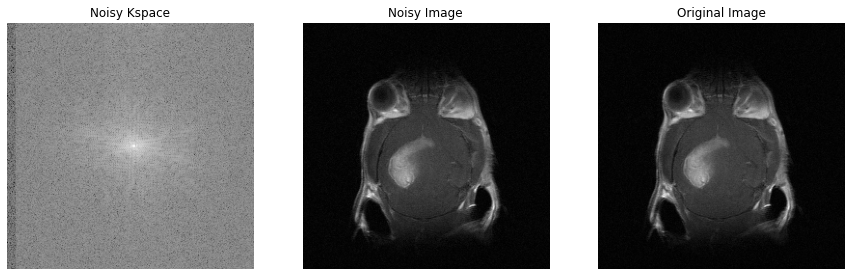

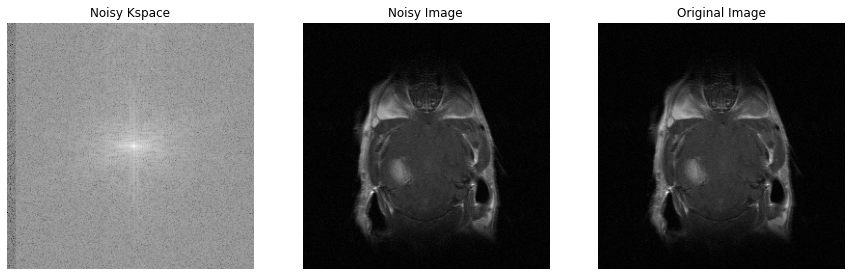

In [140]:

[noisy_im, k_space_noisy] = MRD.add_noise_artifacts(ks3d=ks)

# Plot Noisy Image 
plt.figure(figsize=(15, 15))
print('Noisy Image')
plt.subplot(131)
plt.title("Noisy Kspace")
plt.imshow(np.log(abs(k_space_noisy[0,:,:])), cmap='gray')
plt.axis('off')
plt.subplot(132)
plt.title("Noisy Image")
plt.imshow(noisy_im[0,:,:], cmap='gray')
plt.axis('off')
plt.subplot(133)
plt.title("Original Image")
plt.imshow(abs(im_file[ind,:,:]), cmap='gray')
plt.axis('off')

# Plot Noisy Image 
plt.figure(figsize=(15, 15))
print('Noisy Image')
plt.subplot(131)
plt.title("Noisy Kspace")
plt.imshow(np.log(abs(k_space_noisy[1,:,:])), cmap='gray')
plt.axis('off')
plt.subplot(132)
plt.title("Noisy Image")
plt.imshow(noisy_im[1,:,:], cmap='gray')
plt.axis('off')
plt.subplot(133)
plt.title("Original Image")
plt.imshow(abs(im_file[ind+1,:,:]), cmap='gray')
plt.axis('off')

## Apply  Motion Artifact

8.533333333333333
Motion Artifact
Motion Artifact


<ipython-input-149-44cd8baa2d3f>:9: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(k_space_motion[0,:,:])), cmap='gray')
<ipython-input-149-44cd8baa2d3f>:25: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(k_space_motion[1,:,:])), cmap='gray')


(-0.5, 255.5, 255.5, -0.5)

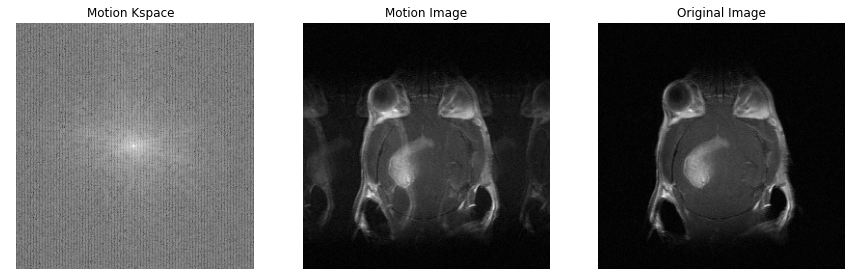

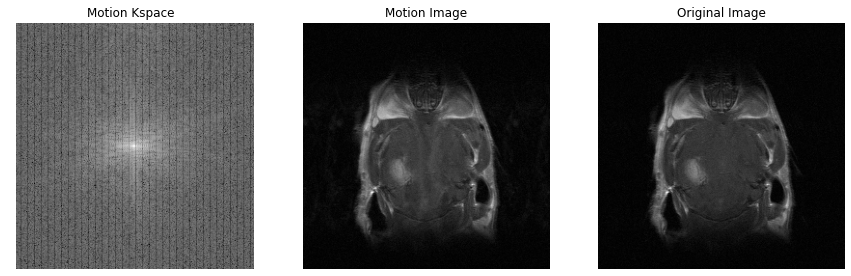

In [149]:

[motion_im, k_space_motion, test] = MRD.add_motion_artifacts(ks3d=ks)
print(test)

# Plot Motion Artifact 
plt.figure(figsize=(15, 15))
print('Motion Artifact')
plt.subplot(131)
plt.title("Motion Kspace")
plt.imshow(np.log(abs(k_space_motion[0,:,:])), cmap='gray')
plt.axis('off')
plt.subplot(132)
plt.title("Motion Image")
plt.imshow(motion_im[0,:,:], cmap='gray')
plt.axis('off')
plt.subplot(133)
plt.title("Original Image")
plt.imshow(abs(im_file[ind,:,:]), cmap='gray')
plt.axis('off')

# Plot Motion Artifact 
plt.figure(figsize=(15, 15))
print('Motion Artifact')
plt.subplot(131)
plt.title("Motion Kspace")
plt.imshow(np.log(abs(k_space_motion[1,:,:])), cmap='gray')
plt.axis('off')
plt.subplot(132)
plt.title("Motion Image")
plt.imshow(motion_im[1,:,:], cmap='gray')
plt.axis('off')
plt.subplot(133)
plt.title("Original Image")
plt.imshow(abs(im_file[ind+1,:,:]), cmap='gray')
plt.axis('off')